In [131]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from ucimlrepo import fetch_ucirepo 

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

https://archive.ics.uci.edu/dataset/2/adult

# Project Summary

Provide a clear explanation of:
  1. What this project is about
     - Clearly state the ML type (supervised/unsupervised)
  2. The goal of the project
     - E.g. why itâs important, what goal you want to achieve, or want to learn.

# Data Summary

Data Source:
1. Explain what the dataset is.
2. Identify where the data came from (using the APA format)
3. Explain how the dataset was gathered (via API, csv, etc.)

### Import Dataset

In [67]:
# Import dataset 
adult_dataset_dict = fetch_ucirepo(id=2)

# View raw dataset
df = adult_dataset_dict.data.original
df

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  income  
0      United-States   <=50K  
1      United-States   <=50K  
2      United-States   <=50K  
3      United-States   <=50K  
4               Cuba   <=50K  
...              ...     ...  
48837  United-States  <=50K.  
48838  United-States  <=50K.  
48839  United-States  <=50K.  
48840  United-States  <=50K.  
48841  United-States   >50K.  

[48842 rows x 15 columns]

### Data Description

In [38]:
# Display a table of the descriptions for each column
display(Markdown(adult_dataset_dict.variables.to_markdown()))

|    | name           | role    | type        | demographic     | description                                                                                                                                                                                                                                                                                                                                                                                                                     | units   | missing_values   |
|---:|:---------------|:--------|:------------|:----------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------|:-----------------|
|  0 | age            | Feature | Integer     | Age             | N/A                                                                                                                                                                                                                                                                                                                                                                                                                             |         | no               |
|  1 | workclass      | Feature | Categorical | Income          | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                                                                                                                                                                                                                                                                                                          |         | yes              |
|  2 | fnlwgt         | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
|  3 | education      | Feature | Categorical | Education Level | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                                                                                                                                                                                                                                                                          |         | no               |
|  4 | education-num  | Feature | Integer     | Education Level |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
|  5 | marital-status | Feature | Categorical | Other           | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                                                                                                                                                                                                                                                                                                      |         | no               |
|  6 | occupation     | Feature | Categorical | Other           | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.                                                                                                                                                                                                       |         | yes              |
|  7 | relationship   | Feature | Categorical | Other           | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                                                                                                                                                                                                                                                                                             |         | no               |
|  8 | race           | Feature | Categorical | Race            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                                                                                                                                                                                                                                                                                                    |         | no               |
|  9 | sex            | Feature | Binary      | Sex             | Female, Male.                                                                                                                                                                                                                                                                                                                                                                                                                   |         | no               |
| 10 | capital-gain   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 11 | capital-loss   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 12 | hours-per-week | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 13 | native-country | Feature | Categorical | Other           | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |         | yes              |
| 14 | income         | Target  | Binary      | Income          | >50K, <=50K.                                                                                                                                                                                                                                                                                                                                                                                                                    |         | no               |

In [66]:
# Inspect column datatypes and size of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


> The dataset contains 15 columns and 48,842 rows of data.  

> Six columns are integer datatypes, and the other 9 columns are categorical datatypes (shown as "objects" above).

### Missing Values

In [70]:
# Calculate the count of missing values
df_missing = df.isna().sum()
df_missing[df_missing > 0]

workclass         963
occupation        966
native-country    274
dtype: int64

> It appears that the `workclass`, `occupation`, and `native-country` columns all contain missing values which will need to be imputed or rows dropped during preprocessing.

In [ ]:
# Filter the dataset to only the rows that have missing values in `workclass`, `occupation`, and `native-country` columns
df_missing_subset = df[(df['workclass'].isna()) | (df['occupation'].isna()) | (df['native-country'].isna())]
df_missing_subset

age  workclass  fnlwgt     education  education-num  \
32565   18        NaN  103497  Some-college             10   
32567   29        NaN  227026       HS-grad              9   
32574   58        NaN  299831       HS-grad              9   
32580   40    Private   85019     Doctorate             16   
32583   72        NaN  132015       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

           marital-status      occupation    relationship                race  \
32565       Never-married             NaN       Own-child               White   
32567       Never-married             NaN       Unmarried               Black   
32574  Married-civ-spouse             NaN         Husband               White   
32580  Married-civ-spouse  Prof-specialty         Husband  Asian-Pac-Islander   
32583            Divorced             NaN   Not-in-family               White   
...                   ...             ...             ...                 ...   
48769       Never-married             NaN       Own-child               White   
48800  Married-civ-spouse             NaN         Husband               White   
48812  Married-civ-spouse             NaN         Husband               White   
48826  Married-civ-spouse  Prof-specialty            Wife               White   
48838             Widowed             NaN  Other-relative               Black   

          sex  capital-gain  capital-loss  hours-per-week native-country  \
32565  Female             0             0              30  United-States   
32567    Male             0             0              40  United-States   
32574    Male             0             0              35  United-States   
32580    Male             0             0              45            NaN   
32583  Female             0             0               6  United-States   
...       ...           ...           ...             ...            ...   
48769  Female             0             0              30  United-States   
48800    Male             0             0              25         Canada   
48812    Male          2936             0              20  United-States   
48826  Female             0             0              40            NaN   
48838    Male             0             0              40  United-States   

       income  
32565  <=50K.  
32567  <=50K.  
32574  <=50K.  
32580   >50K.  
32583  <=50K.  
...       ...  
48769  <=50K.  
48800  <=50K.  
48812  <=50K.  
48826   >50K.  
48838  <=50K.  

[1221 rows x 15 columns]

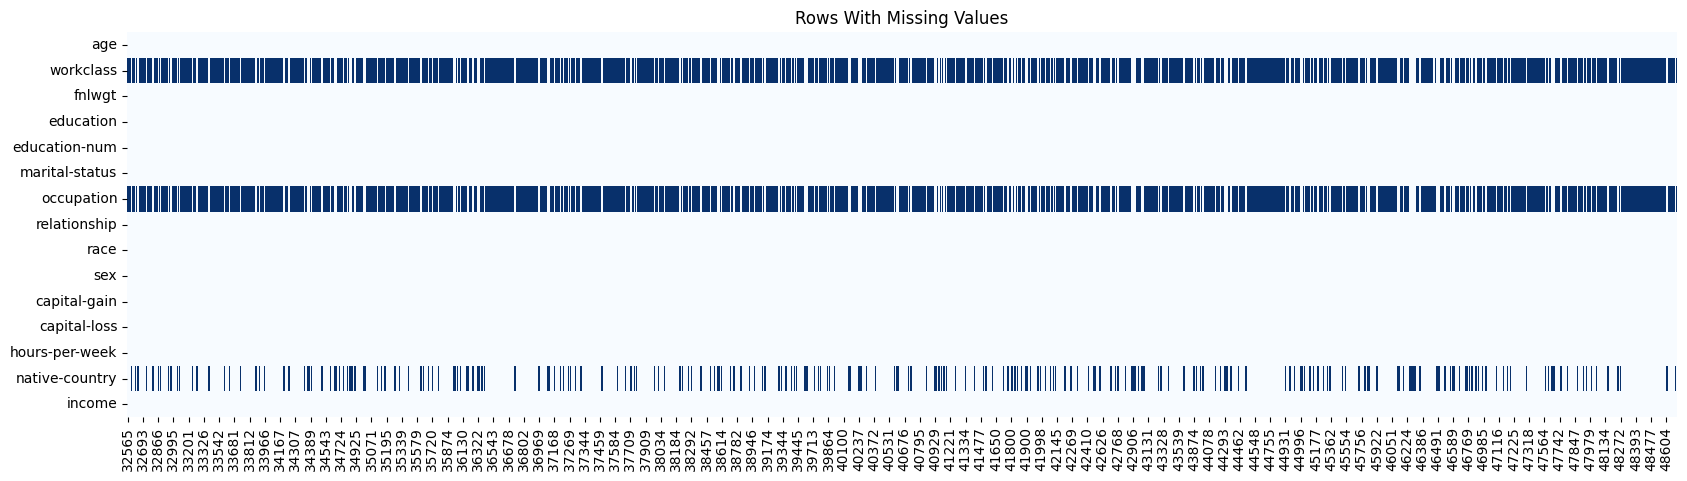

In [91]:
# Visualize the rows that have missing data
fig, ax = plt.subplots(figsize=(20,5))  
sns.heatmap(df_missing_subset.T.isna(), cmap='Blues', cbar=False)
plt.title('Rows With Missing Values')
plt.show()

> The `workclass` and `occupation` columns appear to have similar patterns of where the data is missing.

### Duplicate Values

In [ ]:
# Display first 10 rows wher duplicated values occur
df_duplicated = df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())
df_duplicated

age         workclass  fnlwgt     education  education-num  \
36461   18      Self-emp-inc  378036          12th              8   
48521   18      Self-emp-inc  378036          12th              8   
17673   19           Private   97261       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
6990    19           Private  138153  Some-college             10   
21318   19           Private  138153  Some-college             10   
15189   19           Private  146679  Some-college             10   
21490   19           Private  146679  Some-college             10   
3917    19           Private  251579  Some-college             10   
31993   19           Private  251579  Some-college             10   
5805    20           Private  107658  Some-college             10   
11631   20           Private  107658  Some-college             10   
8080    21           Private  243368     Preschool              1   
15059   21           Private  243368     Preschool              1   
4767    21           Private  250051  Some-college             10   
9171    21           Private  250051  Some-college             10   
21103   23           Private  240137       5th-6th              3   
25872   23           Private  240137       5th-6th              3   
33049   24           Private  194630     Bachelors             13   
33425   24           Private  194630     Bachelors             13   
5842    25           Private  195994       1st-4th              2   
13084   25           Private  195994       1st-4th              2   
22300   25           Private  195994       1st-4th              2   
4325    25           Private  308144     Bachelors             13   
4881    25           Private  308144     Bachelors             13   
5579    27           Private  255582       HS-grad              9   
28230   27           Private  255582       HS-grad              9   
8679    28           Private  274679       Masters             14   
26313   28           Private  274679       Masters             14   
41810   29           Private   36440     Bachelors             13   
43773   29           Private   36440     Bachelors             13   
16975   30           Private  144593       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
39582   30           Private  180317     Assoc-voc             11   
46409   30           Private  180317     Assoc-voc             11   
16846   35           Private  379959       HS-grad              9   
32404   35           Private  379959       HS-grad              9   
33880   37           Private   52870     Bachelors             13   
43750   37           Private   52870     Bachelors             13   
4940    38           Private  207202       HS-grad              9   
29157   38           Private  207202       HS-grad              9   
25624   39           Private   30916       HS-grad              9   
28846   39           Private   30916       HS-grad              9   
10367   42           Private  204235  Some-college             10   
28522   42           Private  204235  Some-college             10   
17916   44           Private  367749     Bachelors             13   
22367   44           Private  367749     Bachelors             13   
11965   46           Private  133616  Some-college             10   
30845   46           Private  133616  Some-college             10   
16297   46           Private  173243       HS-grad              9   
17040   46           Private  173243       HS-grad              9   
7920    49           Private   31267       7th-8th              4   
21875   49           Private   31267       7th-8th              4   
7053    49  Self-emp-not-inc   43479  Some-college             10   
22494   49  Self-emp-not-inc   43479  Some-college             10   
2303    90           Private   52386  Some-college             10   
5104    90           Private   52386  Some-college             10   

    

> The dataset contains 57 rows that have duplicated values. Only the first occurance will be kept and the other duplicates will be dropped during pre-processing to ensure the model is not overfit.

### Define Numeric and Categorical Columns Groups

In [ ]:
# Define lists of the numeric and categorical column names
numeric_columns = df.select_dtypes(include=['int64']).columns.to_list()
categorical_columns = [col for col in df.columns if col not in numeric_columns]

# Display numeric and categorical columns as lists
print('Numeric Columns :', numeric_columns)
print('Categorical Columns :', categorical_columns)

Numeric Columns : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


### Numeric Columns Descriptive Statistics

In [122]:
# Look at the descriptive statisitcs for the dataset's numeric columns 
df[numeric_columns].describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [182]:
numeric_boxplots_charts_list = len(numeric_columns) * [None]
for i in range(len(numeric_columns)):
    numeric_boxplots_charts_list[i] = alt.Chart(df[numeric_columns[i]]).mark_bar().encode(
    x = alt.X(f'{numeric_columns[i]}:Q', bin=True),
    y = 'count()'
)

SchemaValidationError: '[77516, 83311, 215646, 234721, 338409, 284582, 160187, 209642, 45781, 159449, 280464, 141297, 122272, 205019, 121772, 245487, 176756, 186824, 28887, 292175, 193524, 302146, 76845, 117037, 109015, 216851, 168294, 180211, 367260, 193366, 190709, 266015, 386940, 59951, 311512, 242406, 197200, 544091, 84154, 265477, 507875, 88506, 172987, 94638, 289980, 337895, 144361, 128354, 101603, 271466, 32275, 226956, 51835, 251585, 109832, 237993, 216666, 56352, 147372, 188146, 59496, 293936, 149640, 116632, 105598, 155537, 183175, 169846, 191681, 200681, 101509, 309974, 162298, 211678, 124744, 213921, 32214, 212759, 309634, 125927, 446839, 276515, 51618, 159937, 343591, 346253, 268234, 202051, 54334, 410867, 249977, 286730, 212563, 117747, 226296, 115585, 191277, 202683, 171095, 249409, 124191, 198282, 149116, 188300, 103432, 317660, 304873, 194901, 189265, 124692, 432376, 65324, 335605, 377869, 102864, 95647, 303090, 197371, 247552, 102632, 199915, 118853, 77143, 267989, 301606, 287828, 111697, 114937, 129305, 365739, 69621, 43323, 120985, 254202, 146195, 125933, 56920, 163127, 34310, 81973, 66614, 232782, 316868, 196584, 105376, 185814, 175374, 108293, 181232, 174662, 186009, 198183, 163003, 296158, 252903, 187715, 214542, 494223, 191535, 228456, 38317, 252752, 78374, 88419, 201080, 207157, 235485, 102628, 25828, 54826, 124953, 175325, 96062, 428030, 149624, 253814, 312956, 483777, 183930, 37274, 181344, 114580, 633742, 286370, 29054, 304030, 143129, 135105, 99928, 109567, 155222, 159567, 523910, 120939, 130760, 197387, 99374, 56795, 138992, 32921, 397317, 170653, 259323, 254817, 48211, 140164, 128757, 36270, 210563, 65368, 160943, 208358, 153790, 85815, 125417, 635913, 313321, 182609, 109434, 255004, 197860, 187656, 51744, 176681, 140359, 243313, 24215, 167687, 314209, 176796, 538583, 130408, 159732, 110978, 76714, 268700, 170525, 180138, 115076, 115458, 347890, 196001, 273905, 119156, 179488, 203580, 236596, 183916, 207578, 153141, 112763, 390781, 171328, 27382, 259014, 303044, 117789, 172579, 187666, 204518, 150042, 98092, 245918, 146013, 378322, 257295, 218956, 21174, 185480, 222205, 69867, 191260, 30653, 209109, 70377, 477983, 170924, 190174, 193787, 279472, 34918, 97688, 175413, 173960, 205759, 425161, 220531, 176609, 371987, 193884, 200352, 127595, 220419, 231931, 248402, 111095, 57424, 157443, 278130, 169469, 146268, 153718, 217460, 238638, 303296, 173321, 193945, 83082, 193815, 34987, 59306, 142897, 860348, 205607, 199698, 191954, 138714, 399087, 423158, 159841, 174308, 50356, 186110, 200381, 174309, 78383, 211601, 187728, 321171, 127921, 206565, 224563, 178686, 98545, 242606, 270942, 94235, 71195, 104112, 261192, 94936, 296478, 119272, 85043, 293364, 241895, 36135, 151989, 101128, 156464, 117963, 192262, 111363, 329752, 372020, 95432, 161400, 96129, 111949, 117125, 348022, 270092, 180609, 174575, 410439, 92262, 183081, 362589, 212448, 481060, 185885, 89821, 184018, 256649, 160323, 350845, 267404, 35633, 80914, 172927, 174319, 214955, 344991, 108699, 117312, 396099, 134152, 162028, 25429, 232392, 220098, 301302, 277946, 98101, 196164, 115562, 96975, 137300, 86872, 132178, 416103, 108574, 288353, 227689, 166481, 445382, 110145, 317253, 123147, 364657, 42346, 241951, 118500, 188386, 1033222, 92440, 190762, 426017, 243867, 240283, 61777, 175024, 92003, 188401, 228528, 133373, 255191, 204653, 222289, 287480, 107762, 202521, 204116, 29662, 116358, 208405, 284843, 117018, 81281, 340148, 363425, 45857, 191073, 116632, 405855, 298227, 290521, 56915, 146538, 258872, 206399, 197332, 245062, 197583, 234885, 72887, 180374, 351299, 54012, 115745, 116632, 288825, 132601, 193374, 170070, 126708, 35598, 33983, 192776, 118551, 201965, 139883, 285020, 303990, 49401, 279196, 211870, 281432, 161155, 197904, 111746, 170721, 70100, 193626, 271749, 189775, 401531, 286967, 164427, 91039, 347934, 371373, 32220, 187251, 178107, 343121, 262749, 403107, 64293, 303588, 324960, 114060, 48925, 180980, 181054, 388093, 249609, 112131, 543162, 91996, 141944, 251804, 37070, 337587, 189346, 222216, 267044, 214635, 204226, 108116, 99146, 196232, 248344, 186035, 177905, 85812, 221172, 99183, 190387, 202692, 109339, 108658, 197202, 101739, 231559, 207853, 190942, 102345, 41493, 190027, 210525, 133937, 237903, 163862, 201872, 84179, 51662, 233327, 259510, 184831, 245724, 27053, 205343, 229328, 319560, 136218, 54576, 323069, 148291, 152453, 114053, 212960, 264052, 82804, 334273, 27337, 188436, 433665, 110663, 87490, 354351, 95469, 242718, 22463, 158156, 350162, 165532, 28738, 283635, 86646, 195733, 69884, 199713, 181659, 340939, 197747, 34292, 156764, 25826, 103948, 137390, 105138, 39352, 168387, 117789, 267147, 99399, 214242, 200408, 136455, 239824, 217039, 51290, 175674, 194404, 45612, 410114, 182521, 339772, 169658, 200853, 247564, 249909, 208122, 109881, 207824, 369027, 114117, 51048, 102388, 190483, 462440, 109351, 34383, 241832, 124187, 153614, 267556, 205469, 268090, 165039, 120451, 154374, 103649, 35723, 262601, 226181, 175697, 248145, 289436, 75654, 199378, 160968, 188563, 55849, 195322, 402089, 78277, 158611, 169496, 130959, 556660, 292472, 143774, 288341, 71592, 167358, 106742, 219288, 174524, 335183, 261293, 111900, 194360, 81145, 341204, 249362, 247019, 114746, 172146, 110457, 80077, 368700, 182556, 219420, 240817, 102726, 226267, 125457, 204021, 92262, 161141, 190290, 430828, 59342, 136721, 149422, 86644, 195124, 167350, 113000, 140027, 262425, 316702, 335453, 202480, 203628, 118710, 189620, 475028, 110866, 243605, 163870, 80145, 295566, 63042, 229148, 242552, 177665, 208103, 296450, 70282, 271767, 144995, 382635, 295697, 194141, 378418, 214399, 217460, 182556, 125831, 271328, 50459, 162140, 177937, 111502, 299047, 223212, 118474, 352139, 173093, 181655, 332702, 51164, 234901, 131414, 260960, 156052, 279914, 192453, 200939, 151408, 112847, 316929, 126319, 197422, 267736, 267034, 193047, 356089, 223515, 87510, 145111, 48093, 31757, 285854, 120064, 167381, 103408, 101460, 420537, 119411, 128272, 386773, 283268, 301526, 151790, 106252, 188557, 171114, 327323, 244147, 280282, 116442, 282579, 51838, 73585, 226902, 279129, 146908, 196690, 130760, 49572, 237601, 169628, 36671, 231193, 192130, 149704, 102102, 32185, 196061, 211046, 31577, 162343, 128831, 316688, 90758, 274363, 154538, 106085, 315859, 51471, 193830, 231043, 23780, 169879, 270333, 138768, 191571, 219941, 94113, 137510, 32607, 93208, 254440, 186556, 169871, 191277, 167159, 171871, 154411, 129227, 110331, 34269, 174355, 680390, 233130, 165474, 257780, 194259, 280093, 177387, 28929, 105304, 499233, 180572, 321435, 86108, 198124, 135162, 146813, 291175, 387569, 102895, 33274, 86551, 138192, 118966, 99784, 90980, 177407, 96467, 327886, 111567, 166545, 142182, 188798, 38563, 216284, 191547, 285335, 142712, 80945, 309055, 62339, 368700, 176186, 266855, 48087, 121313, 143437, 160724, 282753, 194636, 153044, 411797, 117683, 376540, 72393, 270335, 96226, 95336, 258498, 149698, 205865, 155781, 406468, 177119, 144397, 372525, 164170, 183800, 177307, 170108, 341995, 226508, 87418, 109165, 28856, 175897, 99697, 90270, 152375, 171550, 211154, 202570, 168496, 68898, 93235, 278924, 311020, 175878, 543028, 202027, 158926, 76860, 136063, 186648, 257509, 98155, 274198, 97083, 29825, 262153, 214738, 138022, 91842, 373662, 162003, 52114, 241843, 375871, 186934, 176900, 21906, 132222, 143653, 111567, 78602, 465507, 196373, 293227, 241752, 166398, 184682, 108293, 250802, 325159, 174675, 227065, 269080, 177722, 133461, 239683, 398473, 298785, 123424, 176286, 150062, 169240, 288273, 526968, 57066, 323573, 368825, 189721, 164966, 94954, 202046, 161538, 105252, 200153, 32185, 178326, 255957, 188693, 182977, 159929, 123207, 284317, 184699, 154474, 318280, 254907, 349221, 335973, 126701, 122159, 187370, 194636, 124793, 192835, 290226, 112840, 89325, 33109, 82465, 329980, 148294, 168212, 343642, 115244, 162572, 356067, 271567, 180804, 123011, 109186, 220537, 124827, 767403, 118494, 173208, 107373, 26973, 191965, 122346, 117201, 198316, 123075, 209370, 33117, 129042, 169133, 201624, 368561, 207848, 138370, 93106, 223515, 389713, 206365, 431192, 241616, 150726, 123785, 289984, 164309, 137018, 137994, 341204, 167005, 34446, 187160, 196288, 217961, 74631, 156667, 125155, 263925, 296453, 44728, 193026, 87643, 106742, 302122, 193960, 185385, 277647, 128848, 377701, 157886, 175958, 223004, 199352, 29984, 181651, 117312, 34029, 132879, 215310, 55863, 220384, 36012, 137645, 191342, 31339, 227910, 173728, 167816, 81642, 195258, 232475, 241259, 118161, 201954, 150533, 412296, 133060, 120539, 196025, 107793, 163870, 361280, 92178, 80710, 260729, 182254, 140282, 149865, 218184, 118619, 196791, 167999, 51259, 131088, 118212, 293791, 289430, 35378, 60227, 168139, 290763, 226355, 51100, 227644, 205267, 288020, 140863, 170915, 50178, 112497, 95244, 117606, 89508, 124244, 154374, 294936, 347132, 181934, 316672, 189382, 184018, 184307, 246212, 250504, 138705, 328447, 194608, 230891, 212448, 214010, 200235, 354573, 205733, 185041, 84409, 293196, 241626, 520586, 35633, 302847, 165309, 117529, 106092, 445824, 227332, 275691, 193459, 284329, 114691, 96062, 133963, 178506, 350498, 131573, 206291, 182302, 241346, 157043, 404616, 411862, 183013, 169982, 188544, 356619, 45857, 289886, 146015, 216237, 416745, 202952, 167725, 165637, 43280, 118779, 191269, 247507, 239155, 182862, 33886, 444304, 187161, 116892, 176813, 151616, 240747, 75472, 320818, 235271, 166497, 344060, 221196, 113544, 321117, 79619, 42004, 135289, 320984, 203070, 32406, 99185, 205839, 150389, 243631, 163003, 231263, 200818, 247379, 349151, 22154, 176317, 22245, 236436, 354078, 166813, 358740, 208426, 265266, 31838, 175034, 413297, 106347, 174754, 441454, 209344, 185732, 65372, 33975, 326297, 194630, 167414, 165799, 192866, 166459, 148995, 190040, 209432, 229465, 397466, 283767, 202452, 218555, 128604, 65466, 141326, 369468, 136137, 236770, 89534, 195779, 29778, 153516, 163594, 189623, 343748, 387430, 409505, 200734, 115831, 150296, 323545, 232577, 152754, 129007, 171584, 386136, 342865, 186785, 158926, 36039, 164019, 88926, 188861, 370119, 182062, 37238, 421132, 178660, 795830, 278403, 279661, 113397, 280093, 236696, 265266, 34935, 58222, 301010, 419721, 186791, 180686, 209103, 32668, 256956, 202203, 85995, 125421, 283037, 192932, 244689, 179646, 509350, 96279, 119098, 327120, 144928, 55237, 101265, 114874, 190525, 121912, 83893, 138507, 256522, 168381, 293579, 285290, 188488, 324469, 275244, 265099, 146767, 40681, 174938, 240124, 269708, 34180, 225904, 89392, 46857, 105363, 195105, 184117, 134768, 145886, 153078, 225652, 467108, 199765, 173938, 191161, 132606, 30073, 155190, 42900, 191161, 181820, 105974, 146378, 103440, 203435, 168312, 257764, 171301, 225339, 152234, 444554, 403788, 190997, 221550, 98929, 169203, 102332, 230684, 449257, 198766, 97429, 208999, 37072, 163101, 119075, 137314, 127303, 349116, 266324, 194095, 46496, 29904, 289403, 226922, 234151, 238287, 230624, 398212, 114758, 246519, 137815, 260696, 325007, 113176, 66815, 51795, 241523, 30226, 352628, 143912, 130021, 329778, 196945, 24342, 34368, 173839, 73211, 86723, 179186, 127610, 115070, 172582, 256202, 202872, 184102, 130703, 134727, 36228, 297847, 213644, 173796, 147322, 296253, 180871, 169882, 211115, 183870, 441620, 218542, 141327, 67716, 175339, 347089, 336595, 27997, 145574, 30447, 256866, 120837, 185283, 229466, 298225, 185749, 333100, 125892, 563883, 311249, 221757, 310152, 211453, 94113, 192945, 161508, 177675, 51100, 100584, 163003, 67728, 101320, 42706, 228535, 120939, 98283, 216481, 208869, 207940, 34248, 83727, 183077, 197850, 235271, 35236, 255822, 263925, 256263, 293535, 209448, 57651, 174592, 278763, 175232, 402812, 101150, 103538, 156877, 23940, 210295, 80058, 187119, 105021, 225775, 395831, 50282, 32732, 179436, 290593, 123253, 48433, 245317, 431745, 436006, 224943, 167990, 217054, 298834, 125000, 123983, 155489, 284834, 212495, 32124, 246891, 141483, 31985, 170800, 166295, 231286, 159322, 176026, 118025, 26898, 232628, 85995, 125421, 245305, 73493, 197058, 122116, 75742, 214731, 265954, 197156, 162245, 203070, 165695, 473040, 168107, 163494, 180342, 122381, 148069, 200973, 130806, 117148, 213977, 134768, 139338, 315877, 195124, 352057, 236684, 208447, 149640, 111177, 154342, 141459, 111797, 111900, 78707, 160574, 174714, 62534, 216907, 198148, 124265, 261059, 208137, 257250, 147253, 244268, 213255, 266912, 169104, 200511, 128715, 65535, 103395, 71046, 125442, 169188, 121471, 207281, 46097, 206671, 98361, 322143, 149184, 119829, 910398, 176570, 216129, 27207, 68830, 178818, 236944, 273771, 318533, 451940, 102318, 379350, 21095, 211547, 85272, 46406, 53833, 161007, 53707, 370119, 310907, 375833, 107513, 58683, 179557, 70240, 147206, 175548, 163174, 126010, 147876, 428350, 200904, 328466, 258973, 345969, 127796, 405723, 175942, 284196, 89718, 175761, 206369, 158993, 285066, 126754, 209280, 52888, 133821, 240763, 39054, 119272, 143372, 323421, 136028, 163189, 202729, 421871, 120277, 211798, 198901, 214617, 179715, 107231, 110355, 184378, 273454, 443040, 71701, 160151, 107991, 94391, 99835, 43711, 83756, 120914, 180052, 170846, 37937, 168340, 38455, 128059, 420895, 166744, 238768, 176270, 140592, 211466, 188540, 39581, 171150, 117496, 145160, 28520, 103851, 375077, 281590, 151504, 415287, 32212, 123606, 202565, 177927, 256723, 46247, 266926, 112031, 376277, 168817, 187487, 158784, 67222, 201723, 267408, 168191, 105444, 156728, 148600, 19914, 190767, 233955, 30381, 187069, 367314, 101119, 86551, 218995, 57711, 303521, 199067, 247445, 186078, 77634, 180060, 56482, 314177, 239755, 377680, 134960, 294493, 32616, 182655, 52267, 117963, 98881, 196963, 166988, 193459, 182342, 496743, 154781, 219371, 99179, 224910, 304651, 349689, 106850, 196328, 169323, 162924, 34037, 167651, 197384, 251795, 266081, 165309, 215873, 133938, 159816, 228424, 195576, 105200, 167350, 52199, 171338, 120173, 158762, 169818, 288419, 207546, 147707, 228373, 193882, 31033, 272950, 183523, 238415, 19302, 339671, 103260, 79331, 135056, 142723, 188569, 57322, 178309, 166107, 53042, 155343, 35595, 429507, 159670, 151210, 186792, 204640, 87205, 112847, 107306, 211319, 183606, 205390, 232871, 101017, 114495, 183898, 163921, 311764, 188330, 267174, 36228, 199739, 185407, 206139, 282063, 332379, 418324, 263338, 158948, 221532, 202920, 118909, 286469, 191914, 142766, 198744, 272780, 219553, 261232, 64292, 312131, 30713, 246439, 338105, 228243, 62463, 31603, 165054, 121618, 273194, 163665, 538319, 238246, 244665, 131811, 231777, 156807, 236861, 229842, 190057, 55076, 152545, 153434, 171095, 239322, 138999, 95450, 176520, 72338, 386261, 235722, 128884, 187226, 298332, 173607, 226756, 157887, 171111, 126314, 174018, 144778, 201522, 22966, 399088, 282202, 102606, 246862, 508336, 263431, 235733, 107910, 184425, 143062, 199545, 197015, 149617, 33610, 192002, 67791, 445382, 112283, 157249, 109872, 119838, 149943, 27012, 91666, 270276, 179271, 161819, 339681, 219897, 91683, 188834, 187046, 191807, 179951, 324420, 66632, 121718, 162034, 218990, 125863, 225330, 120426, 119741, 32000, 124242, 278581, 230224, 204374, 188386, 164922, 195176, 166740, 156008, 162551, 211231, 169990, 221832, 255454, 28160, 159219, 103148, 165186, 31782, 249101, 243190, 153405, 329980, 176079, 218542, 303446, 102606, 483201, 144608, 226013, 165475, 263637, 201495, 213720, 170483, 214303, 190511, 242150, 159755, 147629, 268022, 188711, 452205, 260847, 291374, 189933, 133969, 330664, 672412, 122999, 111415, 217235, 121956, 120172, 343403, 104790, 473547, 260106, 168232, 348491, 24106, 197553, 421065, 138852, 169631, 379412, 181992, 365640, 236564, 363418, 112351, 204704, 54611, 128132, 30599, 379522, 196504, 82552, 104024, 293114, 74141, 192337, 262478, 185072, 296045, 246595, 54472, 331065, 161708, 264936, 113545, 212237, 170430, 173806, 370890, 505119, 193089, 33432, 103110, 160362, 204621, 35309, 154373, 194772, 154410, 220563, 253354, 211699, 167501, 229732, 185465, 335764, 460046, 33487, 176924, 213307, 83893, 194102, 238611, 113597, 208406, 274528, 60116, 196816, 166368, 303954, 99386, 188569, 302868, 283342, 233777, 170038, 261319, 367237, 126838, 354104, 176321, 85129, 376474, 62507, 111252, 156889, 549430, 29696, 98837, 86150, 204991, 371886, 103605, 54851, 133050, 126569, 144259, 161482, 305449, 125010, 304133, 120617, 157747, 297396, 121287, 308493, 49115, 208302, 304032, 207301, 123211, 33521, 410351, 410034, 175339, 27937, 168211, 125680, 160829, 266529, 115023, 224149, 150930, 343699, 172826, 163392, 103810, 213821, 211265, 160586, 146454, 203277, 309895, 26522, 103809, 90291, 181761, 35330, 135776, 188172, 179579, 193626, 108887, 199070, 441591, 185254, 109307, 81853, 23621, 145178, 30575, 130620, 22155, 106437, 79787, 326857, 81853, 120933, 153143, 27669, 105444, 169785, 122493, 242670, 54933, 209317, 282631, 98044, 187487, 60186, 75648, 201175, 19302, 300812, 146659, 101887, 117778, 60726, 201763, 119253, 121124, 220132, 60639, 195262, 113544, 331650, 100587, 298130, 242391, 197867, 151977, 277347, 125249, 222142, 270194, 169995, 359155, 123992, 266080, 201531, 179704, 393673, 244147, 438696, 207568, 54052, 187581, 77102, 353010, 54131, 39890, 156877, 355686, 300168, 488720, 157287, 184659, 214169, 192149, 137253, 373050, 90377, 183151, 227158, 34021, 165148, 211668, 358886, 47707, 306982, 52590, 179352, 158156, 70055, 131852, 177825, 127215, 175183, 142287, 221324, 227602, 228452, 39380, 96862, 336360, 257644, 235853, 270577, 222900, 99254, 224763, 174056, 127306, 339506, 178322, 189843, 160815, 207665, 160402, 170263, 184659, 338320, 101017, 204322, 241350, 217994, 128143, 164065, 78866, 236769, 239539, 34028, 207847, 175935, 218445, 215833, 156976, 220647, 218343, 241431, 123983, 73289, 408623, 169180, 54929, 306779, 159549, 482082, 286101, 167955, 209040, 105017, 27776, 242941, 118853, 119565, 196827, 275361, 225193, 329783, 107411, 258490, 120243, 219509, 29174, 40083, 87528, 116379, 216214, 268051, 121718, 201901, 109089, 346382, 284129, 143030, 212619, 199011, 118901, 129865, 157900, 349341, 158685, 386585, 52386, 246891, 190385, 37869, 217807, 149784, 201293, 128764, 27444, 62438, 151726, 29841, 131608, 110562, 190541, 33142, 139272, 234633, 238386, 460835, 243190, 97855, 77146, 200863, 41107, 77415, 236770, 173093, 235124, 282604, 199288, 191659, 43285, 160837, 230574, 176178, 116358, 253873, 107787, 519627, 191460, 198282, 214858, 64875, 675421, 134768, 207342, 64830, 220066, 82521, 176711, 217421, 111900, 196943, 481987, 184506, 121313, 158420, 256000, 183892, 42734, 181773, 184945, 107248, 215382, 122999, 758700, 166606, 192060, 340939, 205708, 67450, 242077, 129573, 181132, 212302, 83411, 148751, 317681, 103986, 30602, 172893, 211804, 312055, 65390, 200500, 241962, 78530, 189950, 111387, 241951, 343059, 302465, 156843, 79728, 55284, 509364, 117927, 137651, 131060, 346963, 183611, 134737, 36503, 250121, 330535, 387776, 41474, 318972, 86143, 181139, 326232, 153976, 59469, 127139, 136343, 350624, 177351, 166149, 121523, 267396, 83045, 160449, 124137, 287681, 154194, 295127, 240521, 244087, 356250, 293791, 44308, 210527, 151763, 267581, 100188, 111746, 171091, 355645, 137678, 70894, 171306, 100997, 63921, 32897, 251854, 345121, 86220, 172845, 171398, 174391, 207058, 291251, 224377, 105813, 180916, 122749, 31069, 284343, 319371, 174224, 183958, 127772, 80651, 62793, 191712, 237532, 20179, 311376, 432565, 329980, 125190, 342946, 219835, 123429, 69209, 66356, 195897, 153132, 230875, 92298, 185145, 297296, 164849, 145214, 242341, 240542, 104772, 152802, 181666, 415520, 258761, 88842, 356717, 158438, 206206, 51816, 253814, 161745, 162947, 163027, 146788, 73309, 143867, 104216, 345705, 133770, 209392, 262345, 277545, 174525, 490332, 211570, 374918, 106728, 173649, 174597, 233533, 169785, 133169, 198824, 174056, 188696, 90692, 271933, 102359, 213668, 294789, 157599, 134935, 466224, 111985, 264627, 213427, 279015, 165937, 188343, 158609, 193036, 198632, 175912, 192773, 101387, 60783, 183224, 100776, 57600, 174063, 306495, 249741, 93021, 49626, 63062, 320835, 123727, 110517, 149670, 172425, 216116, 174209, 175083, 129059, 121313, 181317, 166851, 29616, 105582, 124993, 148509, 230246, 117881, 203408, 446219, 110331, 207946, 45537, 188330, 147629, 153799, 203776, 168071, 348430, 103407, 152046, 153205, 326104, 238162, 221336, 180656, 145329, 315776, 150516, 325802, 133985, 269329, 183203, 76127, 195891, 162137, 37672, 161708, 80616, 209276, 34443, 192835, 203240, 102308, 40829, 60726, 116677, 57067, 304906, 101590, 258102, 241185, 124827, 76625, 263339, 135645, 245626, 210781, 235786, 160167, 30731, 314375, 81528, 182854, 296798, 194426, 70645, 141807, 112871, 71344, 341410, 118941, 159755, 128509, 229125, 142756, 243871, 213140, 196857, 138626, 161334, 273536, 115631, 185957, 334357, 96102, 213226, 115248, 185061, 147638, 280298, 163516, 277434, 206983, 108993, 288551, 176069, 183486, 163215, 94692, 118462, 407068, 243587, 23074, 237735, 188291, 284166, 423460, 287681, 509364, 139391, 91964, 117526, 91343, 336969, 255364, 167670, 211494, 136198, 409815, 188823, 146326, 154374, 216563, 197286, 100722, 377622, 145964, 358636, 155489, 57413, 320421, 174752, 229364, 157486, 92682, 101338, 132652, 34616, 218903, 204098, 64045, 189763, 26248, 92079, 280071, 224059, 185520, 265567, 106890, 39586, 153132, 209912, 144169, 50442, 89644, 275889, 231638, 224474, 355259, 68330, 185410, 87653, 286853, 96710, 160143, 186925, 109705, 94235, 225279, 297449, 205896, 93717, 194710, 236391, 189123, 358677, 199539, 128170, 231238, 296152, 166003, 281437, 190231, 122026, 205527, 174102, 125461, 184335, 211345, 147328, 222993, 225978, 121124, 656036, 346762, 234057, 306515, 116562, 171159, 199011, 443508, 29810, 238831, 566117, 255044, 436253, 300687, 144071, 133917, 188767, 300777, 26987, 174395, 90290, 183735, 123273, 186916, 43554, 178251, 255885, 64292, 194773, 133060, 258006, 92215, 33945, 153048, 192200, 355571, 139268, 34402, 25955, 209609, 168283, 295488, 190895, 164190, 216010, 387568, 188386, 174491, 31221, 272451, 152652, 104413, 105936, 379066, 214858, 237735, 158592, 237321, 23646, 169240, 454508, 130356, 427686, 36411, 548510, 187264, 140752, 325596, 175804, 107302, 41161, 401832, 353808, 349910, 161478, 400225, 367533, 69306, 270366, 103751, 75227, 132563, 79580, 344624, 186359, 121685, 75104, 188343, 246449, 85088, 545483, 243986, 32778, 369114, 217200, 149220, 162034, 157813, 179715, 335549, 102308, 367749, 98281, 115792, 277788, 103435, 37646, 385632, 210278, 335357, 272165, 148995, 113434, 132551, 115433, 227890, 503012, 250873, 407930, 148187, 159322, 334368, 196328, 270842, 235079, 327154, 188391, 30559, 255098, 248010, 174515, 171956, 193130, 108670, 186172, 348854, 271828, 148606, 123983, 24896, 573583, 106175, 307767, 200574, 59083, 358056, 114670, 262042, 206010, 183869, 159001, 155818, 96055, 131776, 228613, 198163, 37028, 177304, 144064, 146659, 26904, 238917, 170148, 27821, 220460, 101320, 173858, 91048, 298696, 207202, 230397, 180599, 199046, 132686, 240063, 177705, 511361, 89397, 239439, 36989, 76978, 200068, 454941, 107218, 182070, 176360, 452405, 297396, 84790, 186787, 169662, 125933, 35448, 225548, 240842, 103931, 232618, 288548, 220609, 26145, 268525, 133758, 121264, 29814, 193701, 183279, 163942, 188612, 102771, 85625, 245090, 131239, 182074, 187046, 90624, 37933, 182177, 716416, 190562, 141583, 98941, 201729, 175485, 149168, 115971, 161708, 244903, 155664, 112754, 178385, 44064, 120939, 165134, 100405, 361888, 167864, 202950, 218188, 234962, 177226, 259931, 189528, 34996, 112584, 117589, 145234, 267086, 44434, 96130, 181382, 168845, 271767, 194636, 194894, 132686, 185848, 184378, 270859, 231866, 36032, 172962, 98350, 24185, 53930, 85088, 94962, 480861, 187702, 52262, 52636, 175273, 327825, 125892, 78255, 398827, 208919, 365996, 307638, 33068, 254291, 125417, 28848, 273425, 194723, 195118, 123273, 220115, 265706, 279129, 122742, 172654, 119199, 107793, 237943, 64632, 96245, 361494, 122850, 173652, 164663, 98678, 245529, 55294, 140583, 79797, 113044, 283499, 51111, 232475, 176140, 301654, 376455, 192569, 229803, 337639, 130849, 296282, 266645, 110128, 90196, 40024, 144322, 162340, 169069, 113601, 157145, 111275, 102076, 182117, 145409, 190122, 331482, 170114, 193188, 267588, 200471, 175586, 322658, 263982, 266287, 278187, 81413, 221745, 140764, 206351, 176814, 245307, 124971, 119545, 179203, 44075, 178319, 219754, 198316, 168165, 356838, 210736, 173212, 130431, 169809, 197481, 155066, 31290, 54102, 181546, 153484, 351228, 131976, 200639, 267546, 179875, 237865, 300528, 67716, 326048, 191188, 32172, 252903, 334314, 83704, 160574, 203776, 328610, 295589, 174373, 247752, 199244, 139992, 95680, 189933, 498785, 177526, 150121, 130454, 119079, 220939, 94235, 305874, 62020, 235624, 247514, 275726, 72896, 110510, 173938, 200641, 211654, 242720, 111567, 179533, 334693, 198096, 355756, 19395, 242586, 208358, 160647, 227943, 197665, 216129, 326104, 57211, 100219, 291192, 93415, 191502, 261382, 170230, 374924, 320984, 338320, 135190, 157909, 637222, 430084, 125279, 221955, 180195, 208778, 81534, 325538, 142264, 128604, 277886, 100029, 169269, 160472, 123983, 297884, 99131, 44392, 29441, 199029, 181508, 190625, 194740, 27380, 160631, 224531, 283005, 101926, 135102, 113436, 248973, 225334, 157562, 310085, 129597, 53042, 204205, 169324, 134447, 236731, 141301, 235124, 367020, 149102, 423770, 211759, 110998, 56883, 223062, 406662, 206600, 147510, 235646, 187577, 132832, 278322, 278924, 203039, 145651, 144531, 91145, 211762, 111563, 180985, 207537, 417657, 189890, 223212, 108658, 190023, 222130, 164866, 170983, 186269, 286026, 403433, 224209, 123160, 99527, 123178, 231043, 317733, 241056, 220066, 180342, 31840, 183168, 386036, 446358, 28035, 282155, 192384, 383637, 457402, 80249, 159537, 240859, 83446, 29866, 185503, 68781, 220589, 51136, 54560, 28221, 201413, 40425, 189461, 200576, 92691, 664821, 175130, 391016, 249315, 111169, 334946, 352248, 173804, 155449, 73689, 227594, 161676, 75913, 242552, 352094, 159732, 131230, 180695, 189922, 409189, 111252, 294395, 172718, 43403, 111963, 247869, 114032, 356838, 179633, 19847, 231689, 209942, 197492, 262439, 283037, 144533, 83446, 215443, 268252, 181015, 139916, 195770, 125194, 58654, 252327, 116508, 166988, 374163, 96851, 196788, 186172, 245628, 159732, 129856, 182812, 314322, 102976, 42959, 256356, 136277, 284616, 185554, 138847, 33487, 84306, 223881, 149653, 348739, 235442, 34506, 346964, 192208, 305874, 462890, 89508, 200153, 179446, 208965, 40142, 57452, 327573, 151267, 265266, 203836, 163998, 28281, 293196, 214627, 368852, 353396, 161745, 97963, 156542, 198103, 55377, 173730, 374588, 174330, 78141, 190324, 31350, 243607, 134671, 197023, 117674, 169815, 598606, 122861, 166235, 187821, 340940, 194791, 231323, 305597, 25429, 192779, 346478, 341368, 295612, 168936, 218558, 336598, 308205, 357173, 457237, 284799, 179423, 363405, 139183, 203482, 112554, 99476, 93690, 220585, 194638, 154785, 162108, 214542, 161922, 207940, 259351, 208395, 116391, 239781, 174351, 44368, 188798, 50122, 111398, 152035, 139003, 249289, 257726, 113175, 151158, 465326, 356772, 364782, 198385, 329301, 254859, 203488, 222800, 96452, 170050, 116580, 400004, 183608, 194055, 210443, 43272, 108945, 114691, 304169, 503923, 340428, 106705, 146391, 235389, 39665, 113823, 217826, 349304, 197688, 54507, 117833, 163396, 88566, 323619, 75755, 148903, 40915, 182606, 131033, 168475, 121568, 139098, 357338, 283268, 572751, 315321, 120461, 65278, 208503, 112835, 265038, 89478, 276229, 366232, 152035, 205339, 75995, 192236, 188618, 229737, 199688, 52953, 221043, 115389, 204205, 338816, 197387, 42485, 367706, 102493, 263746, 115358, 189680, 282622, 127651, 230823, 300812, 174732, 183710, 137018, 213008, 357848, 165799, 188571, 97883, 105862, 57424, 151476, 129583, 180920, 182416, 251915, 187127, 69045, 192869, 74163, 60847, 213055, 116057, 82393, 134181, 159910, 117570, 214169, 56331, 35576, 149168, 157165, 278130, 257200, 283122, 580248, 230054, 519006, 37332, 365871, 235882, 336513, 115551, 50048, 382802, 180303, 106023, 332379, 95465, 96102, 36440, 209384, 50814, 143865, 104661, 50442, 236601, 100999, 362685, 32423, 154236, 153546, 182355, 191444, 44216, 97688, 209022, 96016, 52138, 159046, 138634, 130125, 247355, 227065, 244771, 215616, 386672, 177543, 617021, 117109, 373550, 19847, 189590, 58343, 354201, 119422, 363405, 181863, 194472, 247328, 130731, 236910, 378251, 120760, 203182, 130304, 352542, 191024, 197728, 316185, 89226, 292353, 304570, 180296, 361487, 218490, 231777, 189832, 232308, 33308, 333677, 170651, 343403, 166386, 48099, 143062, 104704, 30497, 174325, 286675, 59474, 378384, 245842, 274222, 342575, 206051, 234213, 145189, 233490, 344129, 171315, 181485, 255412, 262409, 199590, 84726, 226883, 184335, 102025, 183898, 55291, 150025, 100584, 181755, 150528, 107277, 247205, 291979, 270985, 62605, 176863, 53197, 267776, 308205, 306383, 35494, 291968, 80933, 271828, 121993, 31023, 36425, 407684, 241895, 158555, 140363, 123429, 40060, 290286, 249271, 106169, 76487, 437994, 113555, 160120, 343079, 406662, 37618, 114158, 115562, 353994, 344891, 286750, 194197, 206599, 596776, 56841, 112561, 147110, 175339, 234901, 298133, 217083, 97757, 151868, 25864, 109419, 203070, 107843, 264544, 148644, 125762, 53606, 193741, 588905, 115613, 222374, 185359, 173647, 31166, 517995, 189027, 296125, 640383, 334291, 318450, 174163, 119721, 142719, 162593, 236852, 154863, 168894, 344920, 33355, 196782, 291518, 170244, 369549, 23438, 202673, 171780, 264503, 244341, 209109, 187392, 119578, 195105, 101752, 95825, 362654, 29810, 77332, 87518, 113324, 96299, 237729, 200973, 212456, 131568, 185859, 231981, 117963, 78172, 164135, 171216, 140664, 249277, 117847, 52372, 95806, 137428, 169047, 339168, 504725, 132870, 135840, 35644, 198148, 220098, 262515, 423863, 111567, 194096, 420917, 197871, 253116, 206535, 70447, 201217, 209970, 196745, 175262, 304955, 181265, 200973, 37440, 395170, 32385, 353213, 38619, 177711, 190761, 27776, 470663, 71738, 74156, 202467, 123983, 193494, 169886, 130571, 90363, 83444, 239093, 151369, 56630, 117095, 189985, 34862, 126675, 199806, 57596, 103459, 282398, 298841, 33300, 306031, 306467, 189888, 83861, 117393, 129934, 179010, 375680, 316101, 293305, 175750, 121718, 94931, 229272, 142828, 22743, 76371, 216129, 107425, 611029, 363032, 170020, 137900, 322674, 23778, 147845, 175759, 166459, 128212, 127455, 134699, 254230, 159715, 116286, 146719, 361888, 26553, 32825, 225768, 393728, 160369, 191807, 176969, 33863, 182687, 141459, 174233, 95393, 221095, 104501, 437851, 131230, 495888, 185691, 201822, 549341, 247445, 199566, 139057, 185039, 166124, 82649, 109275, 408328, 186338, 130856, 251579, 76612, 22546, 53684, 183627, 73203, 108426, 116287, 145697, 326156, 201127, 250791, 328216, 400443, 95985, 127651, 250679, 103950, 200199, 295791, 191841, 82622, 160728, 109849, 339897, 37215, 371299, 421837, 29702, 117381, 240027, 338740, 28359, 315026, 314525, 173005, 286750, 163985, 219318, 44121, 103794, 310632, 153976, 174575, 82388, 207253, 251951, 746786, 308296, 101825, 109009, 413363, 117751, 296326, 208358, 120277, 193219, 86399, 215251, 124470, 228649, 386397, 96798, 106707, 159768, 139464, 550848, 68505, 122215, 159442, 80638, 192390, 191324, 147284, 73009, 177858, 163003, 95551, 125298, 198186, 295949, 182668, 124905, 171635, 376240, 157391, 114357, 178134, 207201, 124483, 102103, 92036, 236426, 400966, 404573, 227571, 145917, 190226, 356555, 66473, 172256, 118902, 163039, 89559, 35507, 163303, 192712, 381153, 222434, 34706, 47857, 195216, 103643, 329426, 183612, 184105, 211385, 61777, 320194, 199444, 312588, 168675, 87556, 220421, 404599, 99065, 109973, 246652, 57423, 291248, 163708, 240358, 25955, 101593, 227890, 225053, 228472, 245378, 156623, 35032, 258849, 190115, 63910, 510072, 210867, 263024, 306785, 104333, 340734, 288585, 241765, 111058, 104662, 313986, 52037, 146589, 131776, 254221, 152909, 211785, 160362, 387215, 187046, 208874, 169631, 202956, 80467, 407672, 243425, 174964, 347491, 146161, 449432, 175499, 288825, 134813, 190401, 260617, 45604, 67841, 244522, 430471, 194698, 94235, 188330, 146181, 177125, 68330, 95636, 238329, 416129, 285004, 256514, 186294, 188786, 31352, 197613, 161942, 275438, 361721, 144968, 190539, 178037, 306985, 87928, 242619, 154165, 511331, 221026, 222182, 126569, 202344, 190423, 238917, 221947, 37997, 147098, 278253, 195411, 76196, 120131, 186014, 205903, 125405, 219838, 19395, 223327, 114062, 95654, 177305, 299616, 117681, 237651, 150570, 106705, 174714, 175958, 144064, 107112, 54152, 152951, 190487, 306666, 195148, 226624, 157569, 22966, 379682, 446559, 41794, 90409, 125491, 129661, 104748, 169182, 324655, 122272, 114798, 289707, 137691, 84610, 166789, 348728, 348092, 154526, 288371, 182342, 244366, 102423, 259688, 98733, 174856, 141797, 327202, 76996, 260560, 370990, 129010, 452640, 120796, 45334, 229523, 127388, 395567, 119422, 193895, 163083, 155343, 73895, 107682, 321166, 154940, 103700, 63509, 243842, 187221, 58597, 190290, 158352, 62165, 307149, 280134, 118736, 171114, 169638, 125461, 145434, 152182, 233724, 153963, 88120, 96330, 66118, 182178, 53628, 174865, 66194, 73796, 28366, 231741, 237865, 195453, 116934, 87867, 456399, 263608, 263498, 183765, 469705, 113253, 138768, 302146, 253866, 214858, 243476, 169104, 103218, 57233, 228320, 217421, 185041, 37302, 261059, 59767, 333541, 133352, 99270, 204629, 34104, 312667, 329603, 281021, 275385, 129177, 385591, 201179, 38360, 73796, 67671, 257621, 180052, 656036, 215943, 488720, 199298, 305692, 114994, 88265, 168569, 175413, 161226, 160995, 208598, 200471, 256609, 176684, 206512, 212640, 148724, 266510, 240252, 358975, 124242, 434710, 204338, 241844, 191342, 221947, 111483, 65278, 133403, 166416, 142158, 221480, 189878, 278403, 184710, 177775, 275943, 225473, 289403, 269060, 449354, 214413, 80058, 202027, 123440, 191524, 308144, 164204, 205100, 195750, 149756, 240358, 241174, 356838, 115705, 137142, 296066, 401335, 182771, 186824, 162187, 98010, 172538, 80163, 43959, 162632, 115422, 100933, 270379, 20109, 114758, 100345, 184901, 87239, 127363, 199720, 143058, 36489, 141698, 26358, 195532, 30039, 125159, 246250, 77370, 355569, 180603, 201785, 256211, 146764, 211968, 200515, 52636, 27049, 111128, 348038, 93930, 397831, 33794, 178215, 191910, 340110, 133694, 148398, 133515, 181667, 159715, 174040, 117700, 37215, 46807, 317360, 425627, 82623, 63574, 140854, 185061, 160118, 282680, 137591, 198163, 132749, 31264, 399449, 27494, 368561, 102096, 406078, 100506, 29658, 20469, 181953, 304175, 170070, 193416, 194908, 357962, 214716, 207578, 146409, 341643, 131631, 88842, 128900, 417136, 336763, 209301, 120986, 51025, 218281, 114994, 335481, 174503, 230478, 149650, 149419, 341539, 185099, 132930, 128472, 124971, 344060, 286750, 296999, 123681, 232024, 52267, 119182, 191230, 23780, 184553, 242651, 246226, 86745, 106889, 460835, 213140, 37070, 93589, 213258, 46814, 168873, 284737, 309620, 197418, 132737, 185041, 159604, 123557, 275421, 167147, 197583, 175109, 117502, 180401, 146603, 143822, 51985, 48121, 234807, 65324, 302149, 168403, 159897, 416338, 370615, 219371, 120970, 22966, 34541, 191027, 107458, 121832, 233825, 73839, 109165, 103063, 29762, 111979, 150125, 301853, 296738, 118001, 149337, 36601, 118600, 279272, 181020, 165998, 218136, 182200, 39363, 140001, 193260, 191243, 207887, 211450, 184759, 197836, 232308, 189888, 301614, 146674, 225291, 148509, 136413, 126060, 73064, 39026, 33035, 193494, 147440, 153131, 64671, 225399, 174391, 377757, 364310, 110643, 70240, 32694, 95047, 264936, 367329, 56026, 186452, 125417, 242082, 31023, 397346, 424079, 108947, 261979, 55507, 291407, 353358, 67339, 235109, 208180, 423561, 145290, 403671, 49325, 370494, 267012, 191856, 80445, 379798, 168387, 301948, 274809, 233193, 299635, 236396, 688355, 37019, 148015, 122975, 349795, 229846, 108945, 237498, 188872, 324019, 82488, 206964, 37088, 152540, 143554, 126242, 127185, 164018, 210184, 117528, 124973, 182117, 220049, 247975, 50164, 123160, 219962, 79324, 129100, 210275, 189462, 171114, 201799, 200426, 24395, 191149, 34173, 350979, 147314, 136081, 232894, 373403, 120601, 130926, 72338, 129624, 328697, 191196, 191117, 110243, 181580, 89030, 345493, 277700, 198478, 250679, 168837, 142675, 299050, 107833, 121958, 282948, 176683, 34377, 209833, 41506, 125159, 147206, 93664, 315065, 381851, 185769, 186272, 312667, 343925, 195994, 398843, 73514, 288049, 54759, 155343, 401104, 124884, 287306, 113995, 146378, 111499, 34374, 162187, 147654, 182467, 183970, 332588, 26781, 48610, 162632, 91711, 198003, 179048, 262778, 102470, 123170, 164243, 262511, 51170, 91949, 123727, 173175, 120301, 250967, 285432, 36235, 317219, 110965, 123283, 249087, 152940, 376680, 231232, 168625, 33939, 155659, 190228, 216178, 587310, 155919, 227386, 138152, 167482, 57957, 157747, 88570, 273308, 216292, 131298, 386378, 179668, 210812, 311671, 215247, 125856, 74631, 24008, 354591, 155343, 308334, 245361, 158319, 204486, 314823, 211334, 73199, 126550, 260782, 114224, 64292, 628797, 219775, 212894, 260019, 228075, 239806, 324637, 163620, 194200, 129200, 207172, 135312, 100734, 226443, 110871, 192704, 224108, 78870, 107762, 183611, 249078, 208452, 302195, 199947, 379118, 174855, 173736, 39369, 196348, 340917, 97077, 200098, 127651, 315128, 206823, 316093, 112115, 203821, 250051, 298635, 109193, 130849, 43959, 222810, 27242, 53158, 206520, 164190, 287988, 200819, 83891, 65087, 363418, 182378, 278870, 174789, 228608, 184400, 263568, 117381, 83411, 49156, 421449, 238944, 188982, 175925, 164190, 232914, 120121, 180805, 161944, 319149, 22428, 290528, 123984, 34186, 282680, 183892, 195124, 55938, 209900, 179717, 150361, 164102, 252714, 205204, 168906, 112115, 116531, 202994, 191917, 341294, 216734, 182187, 424988, 379118, 168232, 147171, 207668, 193650, 200187, 188644, 398067, 29658, 154966, 364099, 291374, 97837, 117983, 345497, 64167, 315877, 232151, 225526, 289653, 179462, 67317, 77764, 253438, 150309, 83064, 376973, 311184, 159449, 168288, 74883, 275190, 189838, 101338, 331894, 40293, 88904, 145041, 46385, 363591, 183327, 182556, 267859, 190747, 162869, 141229, 174216, 366416, 172538, 193026, 184424, 337768, 179059, 99549, 72619, 55764, 30267, 308144, 206351, 282304, 176077, 142719, 114973, 159548, 91209, 196564, 149220, 169699, 218215, 156718, 55720, 257250, 194630, 398931, 362062, 101593, 196266, 197332, 97842, 86837, 57324, 116852, 154430, 38468, 188808, 177163, 187322, 107578, 168680, 256755, 360799, 188476, 30457, 252752, 443508, 244408, 178983, 143068, 247328, 201732, 246829, 290267, 119170, 207923, 170142, 187164, 303867, 291429, 213179, 111843, 297154, 68493, 340718, 194059, 47296, 286310, 207202, 132601, 139183, 160785, 117849, 225605, 190290, 164799, 21876, 160785, 272425, 168538, 204205, 142287, 169926, 205024, 374764, 108779, 293136, 227332, 246308, 51331, 153078, 169180, 193451, 305147, 138892, 402397, 223267, 29250, 203953, 29696, 315640, 632613, 282023, 77760, 148599, 414994, 339863, 499249, 144354, 252058, 99543, 117963, 194652, 299705, 27433, 39986, 135342, 270142, 118267, 266043, 35633, 74568, 214816, 222971, 259425, 212120, 245880, 54947, 79627, 151474, 132661, 161674, 62346, 227236, 283033, 298249, 251229, 199949, 305498, 203836, 79440, 142719, 119859, 141410, 202872, 198813, 129707, 445758, 30246, 173981, 108506, 134886, 181970, 282913, 196013, 348491, 416164, 121037, 103111, 147589, 24008, 123838, 175456, 84774, 194590, 134566, 211678, 44822, 144586, 119156, 371987, 144125, 31905, 121124, 58126, 318518, 296509, 473133, 155434, 99185, 56648, 118481, 321666, 119838, 330695, 58039, 313022, 178134, 165309, 216181, 178745, 111067, 163788, 295591, 123075, 78045, 255004, 254221, 174714, 450580, 128230, 192894, 325390, 20333, 128714, 170797, 269186, 127671, 211840, 163392, 201495, 251854, 279297, 195462, 170769, 142443, 182809, 121441, 275094, 170263, 172571, 178615, 279524, 165201, 323006, 235168, 114844, 216414, 34378, 80914, 73292, 212165, 52386, 205649, 109638, 200408, 187720, 236180, 118693, 363130, 225544, 243612, 160786, 234320, 314646, 124971, 209184, 121838, 265275, 71417, 45522, 250135, 120283, 216972, 116791, 26290, 216134, 143932, 217120, 223944, 185452, 44273, 178983, 219288, 349190, 158685, 57924, 270324, 33001, 204021, 192506, 372967, 273929, 195821, 56179, 127003, 124090, 199600, 255847, 218311, 167336, 59938, 263728, 278230, 180603, 43910, 190139, 109001, 159931, 194987, 87310, 133937, 207064, 36011, 168294, 194895, 49884, 27305, 229977, 64520, 134886, 305379, 202284, 99185, 159662, 197865, 175149, 349633, 135293, 242893, 218667, 144811, 146091, 206861, 226215, 114447, 124187, 147954, 64379, 156501, 207668, 161279, 225707, 115603, 506329, 275034, 172637, 56483, 144778, 33213, 297248, 137042, 33308, 158420, 41763, 220640, 149734, 262245, 349691, 185385, 174463, 236068, 445168, 91334, 33895, 214816, 229773, 166386, 266135, 300379, 392502, 73809, 193720, 316183, 162944, 186888, 330132, 192017, 161978, 202930, 323309, 197332, 204033, 271274, 174242, 209483, 99146, 102346, 181666, 207367, 82622, 202296, 142182, 94342, 41493, 181712, 164607, 41496, 143098, 196529, 157332, 154935, 223231, 253860, 362589, 94880, 309580, 130389, 349365, 376936, 179557, 105577, 224207, 47907, 191283, 20953, 186569, 43221, 161141, 203003, 141758, 113322, 343847, 214068, 116632, 240160, 516337, 284651, 141420, 42750, 165278, 167265, 139907, 236415, 312966, 118941, 198068, 373952, 236111, 157778, 143604, 319831, 132728, 137606, 61343, 268234, 100135, 34973, 323790, 319733, 180339, 125591, 60772, 74680, 141185, 204668, 273792, 70037, 343068, 177907, 144063, 257574, 67065, 183356, 152940, 227128, 45607, 155489, 230704, 267955, 165115, 49923, 272240, 255476, 194290, 145548, 175262, 37306, 137547, 276515, 174626, 215310, 332355, 204057, 391591, 169092, 230743, 190963, 204840, 169853, 212091, 202822, 226989, 140011, 432376, 90273, 224424, 168943, 571853, 156464, 108542, 194325, 114797, 40135, 204756, 228190, 163392, 138845, 169853, 206359, 224097, 160786, 190044, 145290, 120268, 327434, 218302, 1184622, 227796, 206343, 36851, 148550, 157079, 142470, 86750, 361631, 163229, 179594, 254773, 58065, 205428, 41183, 308064, 173924, 142547, 119704, 275364, 207392, 147215, 101562, 216413, 188986, 52849, 304710, 265657, 258298, 360814, 53260, 127315, 233777, 197530, 340940, 88432, 183810, 51744, 175614, 235237, 227266, 146499, 337064, 141003, 117791, 172846, 73514, 211075, 197816, 43221, 183780, 26781, 271550, 250157, 913447, 153078, 181091, 231491, 95423, 234663, 283602, 328669, 143741, 83508, 81954, 261375, 310045, 316211, 88564, 61299, 113364, 476573, 267107, 48123, 214635, 115585, 194141, 23233, 89991, 101709, 237455, 206492, 28729, 153475, 275517, 128002, 175485, 189664, 209808, 176992, 154669, 191271, 375482, 102953, 169182, 184005, 30751, 145477, 91964, 49249, 218956, 241306, 251572, 319842, 332401, 182388, 205939, 203914, 156294, 254211, 151504, 85548, 30800, 131230, 61850, 227800, 133454, 104094, 105422, 142182, 336643, 200577, 208703, 193895, 272428, 56701, 288592, 266439, 276868, 131435, 175127, 277444, 63296, 96337, 221955, 197923, 632593, 205970, 139730, 201901, 230224, 113464, 94461, 271379, 231738, 198183, 140764, 183479, 165767, 139364, 227491, 222254, 193494, 29261, 174368, 108196, 110622, 201680, 130277, 98130, 235521, 595000, 349148, 117583, 164583, 340091, 49092, 186884, 167265, 34104, 265116, 128378, 158416, 169878, 296728, 342458, 38771, 269300, 111483, 199114, 33863, 132874, 277024, 112160, 703067, 127264, 257200, 57206, 201319, 114079, 230979, 292472, 286732, 134444, 172403, 191357, 279288, 389254, 303867, 164113, 111499, 266084, 61580, 231348, 164748, 205337, 54566, 34419, 116442, 290740, 255582, 112517, 169397, 172664, 329005, 123253, 81865, 173314, 34572, 159028, 149184, 363134, 308709, 257295, 168479, 142501, 338345, 177675, 262617, 200997, 176683, 376072, 177675, 348430, 320451, 38151, 123382, 151029, 484475, 329792, 148903, 301614, 176319, 53197, 291407, 204527, 476391, 224964, 306225, 292023, 94041, 187563, 176101, 749105, 230020, 216070, 105010, 198203, 215419, 120460, 199316, 146919, 174744, 189564, 249957, 146574, 156417, 236110, 63363, 190107, 126569, 176756, 115161, 138892, 256864, 265083, 249948, 31141, 164190, 67544, 174789, 199753, 122246, 188166, 96586, 189590, 140590, 255702, 260782, 169926, 151322, 192869, 93604, 86958, 228723, 192644, 284080, 43269, 190040, 306108, 220148, 381645, 216361, 213722, 112271, 208277, 352628, 129620, 249550, 178749, 173542, 167670, 81578, 160662, 163322, 152189, 106176, 159191, 250263, 78410, 131379, 166929, 380357, 79190, 342164, 182616, 339473, 381153, 300816, 240988, 149224, 168216, 286487, 305597, 109766, 188798, 240170, 459465, 162506, 145441, 129573, 27444, 195258, 55272, 164526, 27802, 165289, 274657, 317175, 163237, 170408, 55950, 76625, 366066, 349368, 286824, 373263, 161978, 543922, 109089, 110151, 34110, 118506, 117789, 353881, 200471, 258517, 190367, 174704, 179413, 329530, 273818, 256522, 196001, 282660, 72630, 50295, 203240, 172618, 202168, 176839, 176140, 39952, 292465, 161285, 355320, 182460, 69345, 102058, 165804, 318259, 117606, 170718, 413297, 190457, 88278, 217296, 97231, 123429, 420282, 498325, 248533, 137354, 272910, 206054, 92141, 163199, 195860, 115717, 120029, 221762, 342164, 176356, 133239, 169101, 159442, 174461, 361280, 447579, 308995, 248448, 161141, 212465, 170871, 233865, 163052, 348690, 34845, 206861, 349230, 130840, 415354, 132191, 202466, 224421, 236804, 107658, 102771, 221403, 211574, 52645, 276310, 134613, 215479, 266529, 265807, 67716, 178951, 241126, 176544, 169180, 282461, 157069, 99357, 414991, 338316, 59612, 220426, 115912, 27032, 170720, 183162, 192360, 165694, 128553, 209423, 121510, 93793, 133602, 391329, 96359, 203894, 196193, 195994, 50879, 186849, 201127, 110998, 190466, 173935, 167140, 110230, 287658, 224954, 394820, 37618, 29306, 37314, 420749, 482732, 206215, 101364, 185369, 216856, 256019, 348144, 190293, 25932, 176729, 166961, 86373, 320513, 190290, 111891, 45796, 108496, 120539, 164526, 323155, 65389, 414871, 161607, 224953, 261382, 231818, 184018, 133060, 35032, 304212, 50442, 146091, 267431, 121240, 192572, 211028, 346122, 202203, 159297, 310158, 193246, 200089, 38353, 76280, 243665, 68872, 103596, 88055, 186203, 257910, 200227, 124975, 227669, 117210, 76144, 98667, 155818, 283760, 281907, 186183, 202153, 365683, 187538, 209432, 126950, 110028, 104660, 437281, 259643, 217961, 134746, 120539, 25803, 63596, 325493, 211239, 206686, 427965, 218550, 163385, 124993, 107410, 152373, 161226, 213799, 204461, 377798, 116375, 210164, 258752, 327435, 301199, 186221, 203924, 192236, 152035, 201454, 156580, 115851, 106753, 359292, 83003, 78817, 200967, 107164, 189674, 90614, 323790, 242552, 90935, 165667, 162604, 205424, 97411, 184857, 165226, 115784, 368476, 53063, 134566, 153471, 107164, 180303, 236321, 141868, 367655, 203518, 119558, 108276, 385452, 162003, 349028, 45114, 112797, 183639, 177121, 239755, 150361, 293091, 200089, 91836, 324960, 84616, 252930, 44000, 154843, 99307, 182567, 93206, 100109, 114927, 121287, 189916, 157747, 39232, 133861, 505980, 183374, 193216, 140752, 549349, 179008, 190554, 80924, 319054, 297094, 170562, 240738, 297544, 169905, 149637, 182526, 158315, 227232, 96483, 286970, 223529, 316261, 170214, 224361, 124919, 103654, 306352, 227858, 150533, 144478, 254547, 313243, 149981, 125461, 306967, 192976, 192133, 131608, 339388, 203240, 83827, 160440, 108502, 410913, 193818, 163582, 103789, 34572, 43408, 105787, 90693, 285575, 56482, 496025, 382764, 259284, 185385, 286836, 139145, 44246, 169611, 133403, 187327, 180032, 46561, 86065, 256014, 188403, 396758, 60485, 271276, 229525, 34574, 112432, 105312, 221396, 304872, 319733, 176012, 213750, 248384, 351187, 138179, 50223, 117477, 194360, 118108, 90730, 38307, 116391, 210496, 168475, 174386, 166744, 375114, 373469, 339667, 91711, 82049, 236242, 140319, 34080, 204816, 187124, 72310, 175127, 205707, 236586, 71792, 87584, 136878, 287983, 110607, 109015, 235071, 88653, 332243, 291547, 45093, 161337, 211222, 295117, 206541, 238415, 29810, 108023, 114324, 172281, 197290, 191177, 562558, 79531, 157881, 204816, 185695, 167482, 83748, 39232, 236827, 154410, 135308, 204042, 308239, 183884, 98948, 141642, 162623, 186934, 179512, 391192, 87054, 30008, 113466, 642830, 182117, 162432, 242184, 170850, 435022, 120707, 170800, 268575, 269354, 224232, 153072, 177368, 163293, 178530, 183523, 207267, 27037, 176711, 163215, 394727, 195488, 443546, 121023, 51838, 258888, 189385, 198146, 337766, 210525, 185602, 173804, 251243, 415847, 119793, 181705, 182360, 61885, 146520, 323790, 146268, 287031, 292217, 88126, 143046, 401623, 283122, 155057, 260254, 152292, 138594, 523095, 175262, 323706, 316470, 163815, 72208, 74784, 383518, 266668, 347519, 336088, 190350, 204052, 31362, 155981, 195161, 269583, 26994, 116539, 189933, 101283, 113598, 188793, 109996, 195681, 436770, 84253, 383493, 216867, 401051, 83196, 325596, 187322, 193949, 133373, 113324, 178818, 152810, 335997, 436493, 704108, 150084, 341204, 187336, 204209, 206066, 63509, 391121, 56026, 60981, 228255, 86745, 234327, 59948, 137814, 167692, 245090, 256963, 160033, 289430, 305053, 172370, 320510, 171355, 65027, 215190, 149385, 169324, 138938, 557082, 273287, 77209, 317153, 95469, 302859, 333651, 177596, 157240, 184779, 138358, 176285, 102180, 209507, 229741, 324546, 337195, 194068, 250647, 477106, 104329, 224566, 169841, 42563, 31368, 132755, 279129, 86143, 44172, 93076, 146653, 221366, 189404, 172304, 116666, 64112, 55718, 126675, 102112, 226505, 211527, 175069, 25249, 73411, 207185, 127139, 41809, 297449, 141483, 117227, 377401, 167063, 253759, 183096, 269654, 293076, 34104, 80057, 369781, 223811, 163053, 189461, 145166, 86310, 263224, 280362, 301031, 74966, 254493, 204241, 225024, 148222, 113868, 132633, 44780, 86373, 176753, 164707, 370733, 216851, 137951, 185279, 159724, 103233, 63509, 174353, 168109, 159724, 105010, 179112, 364913, 155664, 230568, 86492, 71305, 189933, 191978, 38948, 139127, 301568, 149044, 197344, 32244, 315406, 47170, 208785, 196338, 269243, 215115, 117767, 176101, 138283, 132320, 471452, 147653, 49179, 174921, 95997, 247245, 67072, 95329, 107882, 241825, 79443, 233059, 226980, 181087, 305597, 311671, 129879, 83375, 115824, 141657, 50276, 177216, 228057, 222848, 121111, 298885, 149909, 387430, 121972, 280167, 191355, 112115, 104094, 211032, 199307, 205175, 257750, 191260, 342730, 249983, 161508, 338376, 334308, 133471, 129177, 178811, 178537, 235535, 298155, 145114, 194096, 191779, 159732, 170230, 104719, 163083, 403552, 218009, 179313, 51961, 426001, 176493, 124068, 108510, 181528, 173754, 169699, 126849, 204470, 116367, 117363, 106297, 108933, 190143, 246677, 175360, 210259, 166304, 303051, 49308, 192262, 192349, 48063, 170214, 51048, 246562, 215175, 114967, 464536, 451996, 138852, 353012, 321822, 324506, 162256, 356689, 260199, 103605, 316211, 308691, 194404, 334427, 213226, 342824, 33105, 147638, 315643, 106257, 342768, 108960, 168071, 136935, 188774, 280344, 202496, 134768, 175686, 194748, 61307, 165001, 325658, 201844, 505980, 185336, 362795, 126829, 264600, 82743, 125178, 128487, 321758, 128220, 176814, 188069, 156423, 169905, 157289, 176972, 171424, 91811, 203924, 177484, 454614, 242108, 132972, 157947, 177482, 246891, 158834, 203834, 110442, 240676, 192939, 260696, 55363, 144949, 116878, 357954, 170038, 190290, 203279, 167761, 138845, 144844, 161930, 55743, 117721, 116385, 301867, 238913, 123983, 165510, 183513, 119281, 152629, 110171, 211440, 359259, 125796, 39609, 111567, 44064, 120066, 132633, 192702, 166813, 40444, 290504, 178505, 175370, 72931, 234542, 284021, 277974, 111275, 191776, 125527, 38294, 313022, 179668, 198660, 216116, 200922, 153372, 406603, 248344, 240629, 314310, 259785, 127111, 178272, 75134, 195985, 221955, 177675, 182828, 270889, 183096, 336951, 295589, 289980, 70720, 163352, 190776, 313986, 473748, 163003, 183061, 123584, 120910, 227554, 182677, 214955, 209768, 258120, 110015, 152652, 43206, 114639, 221172, 128538, 131615, 353824, 178417, 178644, 271665, 223732, 169003, 338816, 506858, 265628, 173495, 177413, 31670, 154451, 265535, 118941, 214617, 265097, 276087, 124692, 306784, 434102, 387641, 181824, 177907, 87329, 263130, 262882, 37546, 27433, 393945, 173927, 343403, 111128, 193882, 310864, 128354, 113364, 198559, 136913, 115488, 154227, 279667, 281030, 283945, 454989, 391349, 166704, 151835, 199085, 61487, 120251, 273230, 358373, 267891, 234880, 48358, 96452, 204751, 375868, 413373, 537222, 33975, 162327, 182691, 300829, 114508, 214627, 129684, 120041, 361138, 76893, 205424, 176839, 229148, 154537, 181901, 152004, 205188, 30840, 66634, 180220, 291052, 99651, 327723, 32291, 345122, 127384, 363296, 86551, 30070, 595000, 152328, 177824, 111483, 199555, 50018, 218490, 49020, 213321, 159187, 83033, 31848, 24961, 182117, 146576, 176690, 122651, 149650, 454508, 269068, 266530, 198542, 133144, 217961, 221661, 60735, 121124, 48588, 48087, 240138, 273010, 104196, 230035, 38918, 205011, 176079, 180052, 173005, 378723, 233624, 192591, 249860, 247564, 238912, 190227, 293287, 180807, 250217, 217418, 137510, 163047, 577521, 221533, 255675, 114079, 155781, 243762, 113062, 217028, 110723, 191858, 179423, 339588, 206815, 103743, 235683, 207321, 197495, 424012, 178469, 92886, 214008, 325732, 28572, 118376, 51799, 115488, 190621, 193568, 192878, 264663, 234731, 308373, 205644, 321851, 206399, 124563, 198211, 130795, 71269, 319280, 125933, 107236, 32732, 284763, 112668, 376483, 402778, 36177, 125489, 304791, 209205, 112821, 178100, 70261, 186634, 32958, 254746, 158746, 140854, 51506, 189564, 325538, 213975, 431426, 199763, 161563, 252024, 43945, 178487, 604506, 228157, 199191, 189775, 171080, 117310, 82049, 126094, 202516, 246392, 69328, 292803, 286989, 190483, 235849, 359766, 128016, 360096, 170154, 337286, 204322, 143833, 365613, 100135, 180096, 371827, 61270, 564135, 198759, 303462, 193106, 250201, 200426, 222654, 53366, 132222, 100828, 31264, 202027, 168906, 255454, 245524, 386040, 35424, 93655, 152629, 151159, 410240, 138970, 269722, 223678, 197184, 143486, 160625, 140516, 85341, 108293, 192507, 186932, 223580, 236861, 327886, 407618, 197060, 229180, 284317, 73514, 47907, 134782, 118831, 299505, 267161, 119177, 327886, 187730, 109015, 110015, 104146, 50442, 57640, 333664, 224858, 290641, 191118, 34402, 245378, 179136, 116788, 129699, 39606, 95150, 102479, 199191, 229636, 53833, 27997, 124487, 111363, 107630, 134287, 283004, 33616, 121124, 188189, 106255, 282830, 243904, 165017, 131584, 427781, 334291, 173224, 87507, 187560, 204497, 230545, 118161, 150499, 96554, 288551, 104003, 124963, 198388, 126204, 91709, 152109, 191954, 108097, 289991, 92115, 320277, 33610, 168276, 175127, 254973, 95336, 346975, 227282, 138153, 174132, 182237, 111252, 217775, 168863, 394503, 141657, 125441, 172230, 282944, 55377, 49352, 213887, 24046, 208122, 176118, 227994, 215389, 99434, 190964, 113700, 259840, 168827, 28984, 182211, 82393, 183639, 342448, 469907, 211920, 33658, 34178, 400630, 161251, 255685, 199256, 143716, 221666, 145409, 39615, 104440, 151382, 503675, 306233, 216475, 50748, 107190, 206874, 83141, 444089, 141896, 33487, 65372, 341346, 343403, 287480, 107287, 199067, 182771, 159737, 110643, 117583, 43479, 203003, 133963, 227794, 112137, 110457, 281565, 297906, 151506, 139455, 26987, 233312, 161092, 98361, 188928, 164922, 185673, 193598, 274111, 245482, 160932, 44368, 291374, 280927, 222993, 25240, 204052, 74054, 169042, 104509, 185394, 254146, 227856, 183041, 107682, 287598, 182186, 194636, 112305, 212661, 32709, 46366, 24106, 170850, 40666, 182975, 345122, 208311, 120045, 201299, 152940, 243580, 182128, 176458, 101562, 108699, 175878, 177675, 213887, 357619, 435835, 165799, 71469, 229745, 284916, 28419, 26950, 107231, 512103, 245090, 314153, 243988, 82551, 42706, 235795, 108001, 112497, 128206, 224634, 362999, 346693, 175759, 99199, 219987, 143445, 118710, 224185, 118972, 165360, 38950, 277256, 247151, 213722, 209955, 174395, 138626, 179973, 200207, 156587, 33016, 197496, 153588, 99736, 284166, 716066, 188519, 109080, 174421, 259351, 284403, 85319, 201766, 340475, 487486, 484298, 170617, 94055, 117779, 209770, 317443, 140237, 107411, 122493, 195124, 101978, 335453, 318329, 100321, 81145, 62865, 176262, 168103, 208174, 188815, 226092, 212668, 381583, 239439, 172493, 239876, 221881, 218184, 206889, 110668, 211028, 202984, 20296, 194690, 204984, 35021, 238574, 345360, 192381, 479765, 34091, 151773, 299080, 135339, 52156, 318647, 80145, 343646, 198692, 266635, 197672, 185846, 315110, 220754, 64292, 126060, 78012, 210562, 350181, 233421, 167170, 260801, 173370, 135520, 121308, 444743, 65225, 136982, 271962, 204046, 225823, 183009, 121038, 49092, 148709, 209205, 285865, 216129, 40955, 197189, 33001, 227399, 164050, 259087, 236262, 177929, 166929, 199963, 98776, 135056, 55363, 102343, 231263, 226913, 129573, 191001, 69345, 204556, 192626, 202812, 405177, 227890, 101352, 82572, 132686, 149210, 245661, 483596, 104663, 347166, 108540, 333305, 155408, 246372, 30290, 347321, 205852, 163215, 93449, 116927, 164526, 31573, 125159, 201105, 122745, 150570, 118941, 141388, 174714, 75755, 133144, 318865, 109638, 92969, 376028, 144161, 183778, 398904, 170846, 204277, 205152, 225395, 33975, 147032, 174826, 232769, 36984, 292264, 303973, 287988, 330144, 191948, 324601, 200289, 113307, 194087, 155213, 175127, 358461, 354929, 104501, 112929, 132832, 357691, 114605, 525878, 68358, 174571, 42703, 220589, 197558, 423250, 29254, 308924, 276247, 213841, 181677, 160061, 285295, 265266, 222115, 194954, 156926, 217414, 538443, 192399, 383493, 193235, 99452, 254134, 90446, 116613, 238188, 95909, 82319, 182274, 179625, 119793, 254989, 104830, 110373, 135416, 298225, 166740, 213668, 276624, 226789, 31023, 116666, 136986, 179580, 103277, 351141, 191161, 148709, 128382, 144361, 172538, 102476, 46028, 198452, 193895, 233421, 378747, 31251, 71540, 194772, 34568, 36480, 116528, 52152, 216690, 227065, 84013, 82051, 176185, 115414, 493034, 354923, 393712, 98941, 141483, 172479, 226145, 394612, 231085, 183810, 186159, 162282, 219021, 273206, 332355, 102729, 198096, 292933, 135924, 99146, 27409, 299507, 102631, 153486, 434292, 240172, 219426, 295791, 114032, 496382, 376483, 107218, 246207, 80564, 83089, 328301, 301614, 199739, 180060, 121040, 125550, 170772, 180551, 48189, 432154, 263200, 123207, 110798, 238481, 185528, 181311, 528616, 272950, 195532, 197583, 48612, 31533, 148138, 30069, 170182, 230885, 174102, 352606, 241153, 155433, 109414, 125461, 331556, 138575, 223514, 115418, 193026, 147206, 174592, 268620, 150886, 112362, 195507, 192983, 120544, 59083, 208277, 184678, 278736, 39464, 162343, 204046, 255647, 123011, 291362, 159187, 126414, 227626, 173783, 211075, 176756, 31095, 32372, 331651, 146325, 515025, 394474, 400535, 337505, 211860, 102684, 225657, 121966, 396790, 149949, 252187, 209934, 229300, 170769, 200618, 216984, 212760, 150309, 174655, 109621, 225124, 172695, 238479, 37754, 85018, 256466, 169188, 210945, 287031, 224361, 108464, 75826, 120277, 104439, 56870, 200819, 170562, 80933, 33088, 112763, 177651, 261943, 169785, 141481, 433491, 86615, 125550, 421223, 26999, 241998, 133861, 115323, 23778, 190836, 159179, 205479, 47713, 163237, 202202, 168837, 112271, 52537, 38353, 141698, 28856, 175652, 213008, 196501, 118798, 92463, 125165, 103980, 180362, 53903, 179735, 277390, 122177, 188161, 170108, 175262, 204441, 164395, 115630, 178815, 168223, 202560, 100295, 172256, 51664, 358893, 115963, 333910, 148948, 130561, 428350, 188808, 112847, 110748, 156653, 196491, 254413, 91262, 154785, 84231, 226327, 248406, 54317, 32732, 95918, 375675, 244172, 233555, 326342, 77271, 33397, 446358, 151810, 125461, 133906, 155106, 203637, 232766, 305319, 121023, 198997, 167140, 38772, 253759, 130067, 203828, 221558, 156464, 72333, 83671, 339482, 91928, 99203, 455995, 192515, 111483, 221129, 85413, 196125, 265638, 177727, 205822, 112607, 177595, 183315, 116279, 122493, 215419, 310101, 61885, 59107, 227214, 239450, 118847, 95226, 659273, 215395, 170600, 91044, 318639, 160398, 216824, 308945, 30840, 99309, 188576, 83064, 403865, 235786, 191893, 149184, 152909, 435604, 109282, 248178, 112683, 209103, 183639, 107233, 175387, 178255, 38223, 228873, 202182, 425092, 152587, 39089, 204304, 116103, 290640, 81973, 134890, 452924, 245193, 34339, 184756, 392160, 168337, 309513, 77219, 212888, 361888, 237879, 93099, 225193, 50814, 123681, 249351, 222311, 301762, 195298, 541737, 241065, 129513, 374262, 382146, 185291, 30447, 49893, 197387, 111957, 340458, 185670, 210945, 350661, 190543, 70261, 179048, 242094, 117634, 82531, 193374, 186420, 323605, 371064, 39927, 64292, 198660, 196975, 210165, 144137, 155657, 72953, 107548, 163258, 221324, 444822, 154398, 120672, 159650, 290754, 49654, 147352, 227943, 423024, 64322, 445940, 230824, 48882, 168195, 188644, 136077, 119793, 336513, 186991, 218948, 211435, 280169, 109997, 286789, 102460, 287160, 198097, 119111, 174461, 281678, 377725, 151053, 186539, 149478, 198452, 198863, 176711, 165310, 213008, 38251, 125761, 148645, 273435, 208613, 192565, 183885, 243631, 191754, 261278, 127014, 197919, 217460, 86551, 98051, 215917, 192982, 334132, 136986, 116812, 189123, 89648, 190027, 99248, 57600, 199224, 140363, 308812, 275421, 213321, 157747, 182314, 220589, 208640, 189346, 124071, 20469, 154227, 105044, 35910, 189203, 116493, 19700, 48718, 106113, 256263, 202498, 120074, 122922, 116903, 222596, 107302, 156400, 53373, 58916, 167159, 283806, 140426, 61778, 33310, 202560, 60828, 153486, 167536, 370990, 198867, 174924, 175856, 169628, 125159, 220690, 160035, 116878, 134737, 81648, 122177, 69614, 112115, 299422, 162882, 112854, 33417, 224559, 468706, 357028, 51158, 186303, 127749, 291386, 138054, 174533, 200835, 108658, 180985, 34803, 75867, 156819, 61272, 39827, 130007, 80324, 322614, 140869, 181902, 287908, 309630, 28225, 428584, 39222, 359131, 122272, 198400, 73091, 283338, 208946, 348416, 379046, 183887, 127961, 211129, 187649, 94754, 231826, 142764, 126822, 188069, 284395, 31267, 161444, 144483, 133655, 112074, 249727, 165754, 172822, 288433, 33331, 168071, 207277, 130620, 136244, 972354, 245297, 71151, 118352, 117210, 120068, 48343, 84451, 76437, 281704, 123011, 104729, 110134, 186067, 214702, 384795, 175931, 366324, 118717, 219835, 176486, 273435, 182661, 212304, 133963, 165152, 274724, 196707, 213002, 26620, 361481, 148581, 459189, 214689, 289364, 174907, 348099, 104965, 31600, 286282, 181705, 238912, 134737, 157403, 197429, 47343, 67083, 249957, 175942, 192982, 209547, 142675, 190333, 196396, 166740, 174533, 210867, 118486, 144067, 106964, 178136, 196554, 403550, 498216, 192755, 53738, 156192, 189802, 213149, 179171, 77634, 189830, 127190, 174147, 138107, 269733, 227734, 318822, 48885, 205424, 173858, 202450, 154779, 180551, 177522, 277328, 112584, 85384, 123971, 69019, 112847, 52900, 37937, 59380, 114770, 216481, 176469, 176831, 410034, 93662, 144236, 240917, 608184, 243361, 35166, 182655, 142717, 272944, 219233, 228686, 236818, 117865, 106538, 153891, 190909, 191002, 89073, 238342, 259532, 189282, 132481, 205659, 182323, 216256, 166419, 152246, 155659, 155198, 100931, 162945, 334346, 181597, 133969, 210217, 169711, 300104, 271521, 51255, 26669, 194580, 177974, 315640, 136913, 230961, 167062, 120131, 243368, 171876, 136866, 316820, 185459, 81761, 43716, 220939, 148657, 40808, 183473, 108496, 204838, 132686, 117906, 304386, 248113, 165215, 215463, 259719, 35829, 248795, 124692, 128054, 179731, 113543, 252153, 45891, 112263, 47791, 202980, 34918, 91251, 132996, 306215, 203570, 355918, 198841, 282964, 312197, 98779, 200246, 182771, 199908, 172104, 35295, 216858, 332187, 255109, 111332, 238431, 131552, 110239, 255830, 175648, 82998, 164320, 263498, 162381, 229651, 357348, 269657, 82880, 389755, 195136, 207685, 222925, 196388, 50341, 214134, 114032, 192053, 240231, 44402, 191503, 163530, 136823, 121912, 58624, 74056, 144259, 182028, 209040, 206046, 182494, 185057, 147473, 221722, 388811, 221912, 48189, 382272, 48347, 143046, 137940, 249571, 121318, 224531, 185019, 27886, 94741, 107801, 191256, 256866, 197148, 312271, 118657, 224338, 242488, 234970, 227915, 105717, 160962, 353881, 188950, 201328, 218678, 184255, 200968, 102264, 300584, 208946, 105021, 124751, 274057, 132879, 260960, 208415, 356934, 154410, 35378, 301210, 73621, 108140, 217198, 157332, 202956, 173495, 149811, 444219, 125120, 190429, 190303, 248164, 208534, 343721, 196373, 433788, 122086, 137314, 33068, 210688, 117833, 103474, 115880, 233933, 52781, 586657, 113080, 251905, 225964, 194096, 263831, 133136, 121634, 40767, 355789, 311914, 91189, 344060, 113823, 185800, 76107, 117618, 238008, 136480, 285200, 351040, 1226583, 195767, 187540, 79372, 226665, 213209, 211005, 96178, 328216, 110713, 225456, 159908, 118308, 180309, 39630, 273828, 172071, 218887, 664670, 209149, 84619, 447346, 37869, 99086, 143582, 326886, 181755, 249368, 326400, 504725, 88967, 170721, 148953, 342752, 220871, 29675, 183611, 115215, 152231, 41356, 225142, 121313, 134821, 311350, 102106, 427055, 117860, 285885, 212800, 194864, 31438, 148254, 113035, 106595, 144521, 172232, 123592, 191921, 237379, 208463, 68985, 22418, 163047, 153870, 124954, 197702, 166415, 116211, 33644, 33331, 73019, 169182, 20438, 109869, 316849, 208043, 153790, 153451, 96840, 192732, 209101, 146919, 192323, 217019, 198211, 222490, 106758, 561334, 203710, 203322, 123703, 312015, 209428, 230292, 114420, 120238, 100375, 42485, 130620, 134367, 147099, 36214, 119904, 105779, 165020, 187098, 142030, 241360, 121319, 151580, 162572, 35917, 35723, 194773, 62155, 192203, 174370, 161007, 270517, 163847, 193882, 160037, 189944, 115364, 163174, 188900, 214399, 156616, 204862, 55921, 172475, 153082, 195418, 276840, 97933, 119099, 83411, 198992, 337825, 192002, 189346, 231962, 164488, 200471, 228921, 184846, 233851, 499001, 125768, 255004, 157624, 146767, 118291, 313181, 87891, 226443, 81132, 216436, 213412, 179358, 369825, 199763, 239390, 173613, 37869, 302845, 85218, 48268, 173968, 70982, 166857, 256191, 162872, 152148, 139193, 791084, 137214, 183258, 154035, 115323, 213055, 155064, 33551, 169995, 168262, 104196, 114055, 274398, 27979, 244122, 196571, 101607, 122109, 255822, 195184, 245372, 169583, 224531, 186151, 118693, 297449, 125206, 393264, 108140, 264968, 318106, 156025, 149455, 359985, 165108, 115178, 149224, 352056, 174717, 173064, 147755, 135716, 44216, 37359, 178255, 70617, 154950, 356934, 271714, 247025, 107417, 116554, 917220, 430084, 202937, 62737, 508548, 275223, 381931, 246974, 105431, 146311, 159869, 204641, 66297, 227615, 107744, 360393, 263340, 141918, 294292, 128736, 511289, 302406, 101517, 161334, 189148, 103111, 51620, 31606, 34292, 107882, 39529, 135315, 107812, 229729, 111891, 340917, 202952, 333230, 114955, 159869, 57758, 207064, 193090, 151364, 88638, 304960, 102828, 210029, 154246, 142519, 104455, 192230, 292592, 330132, 51111, 258037, 188291, 349066, 191188, 133503, 146497, 240468, 175120, 416577, 253814, 159247, 102471, 213464, 211968, 32016, 512992, 135020, 109133, 142712, 76900, 112176, 262233, 122066, 194690, 306678, 217769, 308945, 46699, 377757, 220993, 102147, 113770, 139012, 148900, 329426, 181408, 101950, 32537, 209547, 202373, 151476, 174824, 138768, 143482, 200190, 168407, 148315, 270517, 53506, 105693, 189589, 164574, 185744, 33155, 215955, 233571, 211253, 191385, 137895, 159699, 295922, 175856, 216129, 407669, 214242, 285457, 124420, 246386, 142751, 283635, 322931, 76482, 431745, 141944, 193042, 67006, 240398, 182714, 172046, 185177, 102858, 84954, 115895, 184589, 282611, 218649, 157541, 145419, 122616, 204584, 117210, 69481, 148492, 106957, 29312, 120302, 111916, 182227, 219110, 200192, 427862, 33551, 164043, 116632, 175133, 289731, 256362, 282612, 73679, 237824, 357720, 155489, 138077, 183479, 103596, 172304, 313853, 294485, 637080, 385959, 116539, 129263, 141253, 35626, 94937, 220269, 169544, 214604, 81540, 24013, 124940, 313729, 192237, 168524, 113324, 215477, 199903, 431861, 105938, 274679, 177499, 206125, 221740, 202652, 348960, 171876, 157932, 201344, 354739, 40067, 326862, 189762, 149049, 226246, 29020, 38251, 196385, 217054, 104973, 238959, 34218, 292962, 235924, 98656, 102610, 296466, 323069, 184756, 233993, 130724, 181855, 127543, 187164, 113912, 216479, 135480, 204160, 114650, 240172, 184831, 124590, 120429, 202033, 156874, 177727, 334409, 311255, 214227, 115849, 671292, 31460, 141824, 310152, 179953, 137952, 103323, 174426, 192779, 169955, 48087, 132601, 253060, 108435, 210452, 134181, 45487, 183522, 199303, 83064, 134997, 44419, 442612, 158092, 374833, 112650, 183390, 207418, 335453, 243660, 54243, 50385, 187581, 37380, 247025, 29231, 101094, 176716, 118429, 221532, 120572, 124680, 153160, 114678, 142856, 29702, 277700, 67433, 121124, 394447, 79649, 203763, 229029, 494638, 162816, 109117, 32732, 217692, 34590, 276864, 168625, 91037, 171484, 200453, 36990, 198211, 30475, 70995, 245790, 273324, 182687, 247807, 163113, 180522, 203353, 87469, 216563, 87372, 173584, 80282, 319854, 408229, 431307, 134088, 246396, 159255, 106014, 186934, 120130, 203849, 207940, 302406, 144594, 171050, 459007, 372181, 172034, 156566, 338320, 353696, 342907, 169717, 103762, 47570, 119432, 144165, 180647, 312232, 150488, 200876, 188199, 118793, 204325, 256671, 231515, 100669, 88913, 363219, 291547, 308945, 100316, 296453, 298834, 188694, 29240, 186934, 154908, 22201, 216999, 186916, 116677, 95763, 266710, 117849, 242460, 202729, 181652, 174760, 56121, 390369, 149726, 51262, 190350, 205288, 154835, 89028, 194630, 212207, 204788, 158688, 97723, 193026, 257250, 355978, 200574, 376929, 123219, 82778, 115882, 103021, 297767, 259479, 167787, 40021, 245275, 37402, 103608, 137192, 137618, 96509, 196174, 172612, 141186, 228190, 190290, 307404, 152436, 182541, 282153, 41281, 162003, 190759, 208122, 173832, 129173, 287548, 216116, 146706, 285200, 314375, 203943, 274746, 517000, 66173, 182823, 159479, 135568, 333676, 201699, 96020, 176138, 47496, 187158, 249727, 237624, 175254, 42924, 205950, 111985, 167476, 221172, 188711, 199448, 313038, 148431, 112432, 57914, 145166, 247119, 196278, 366531, 216481, 188027, 66686, 74775, 325537, 250499, 192869, 121352, 70985, 123116, 339163, 124771, 167531, 77053, 199266, 190728, 99212, 421446, 215944, 72310, 57512, 89413, 28151, 46786, 226943, 182402, 305352, 189253, 296485, 204375, 249585, 148995, 168071, 194995, 211049, 196630, 50397, 177905, 204374, 60001, 223046, 44921, 154571, 67136, 188675, 390817, 145964, 30424, 548361, 189148, 266707, 311569, 187653, 235379, 188615, 322691, 184698, 144361, 130057, 117963, 123876, 248445, 207172, 119904, 134768, 269168, 132026, 60722, 648223, 298695, 219835, 313729, 140644, 203488, 132341, 161683, 312771, 258102, 24127, 254367, 185426, 152629, 141058, 233130, 406641, 119422, 255486, 161532, 75759, 163332, 103802, 34832, 37933, 165107, 126011, 56651, 522881, 191777, 132686, 201112, 174283, 208591, 126399, 142073, 395567, 180455, 235853, 160731, 31935, 35166, 161092, 223019, 179673, 248895, 200323, 230020, 134890, 162096, 103824, 61431, 197319, 183618, 268598, 263729, 39493, 185360, 132661, 266400, 433669, 216473, 217404, 227778, 96262, 247566, 139616, 73585, 37869, 165814, 108913, 34975, 157078, 232672, 294295, 130454, 461678, 252284, 256737, 96480, 234263, 109952, 262570, 65716, 201732, 174788, 278924, 101593, 193863, 342768, 242606, 176727, 99179, 354104, 61956, 137917, 224658, 51100, 224361, 362912, 218782, 103389, 308944, 140092, 202210, 416059, 281030, 169758, 193666, 139907, 119422, 149324, 259307, 74160, 134797, 41103, 193026, 303986, 126569, 166461, 61387, 254746, 28678, 180976, 282642, 136413, 131463, 177240, 218490, 260543, 80680, 20728, 117628, 91939, 175931, 309566, 123703, 369678, 29928, 167868, 235894, 189888, 111545, 175972, 254270, 185057, 157593, 101345, 176751, 97723, 127601, 227597, 143995, 250051, 284078, 207668, 163787, 119170, 188612, 114605, 317761, 164197, 329266, 207383, 123598, 259931, 134737, 106900, 87054, 82622, 181659, 321205, 231348, 276096, 290560, 307315, 99156, 237928, 153501, 149700, 189680, 374524, 127805, 150217, 295649, 197182, 241998, 156410, 473836, 198431, 113936, 318915, 175406, 193172, 320294, 400285, 283731, 227154, 298659, 212120, 320510, 175800, 170169, 344157, 199441, 225456, 61178, 175262, 152568, 182108, 273771, 208291, 224358, 55176, 152711, 68684, 185452, 175232, 173851, 162327, 51424, 123416, 262656, 233194, 290660, 151105, 179117, 33608, 317434, 126569, 745768, 69927, 302603, 46788, 289886, 179135, 175873, 57426, 312206, 344858, 177035, 88055, 111095, 192251, 29807, 211596, 268276, 181070, 20676, 115803, 124827, 95336, 257942, 72593, 147340, 185325, 357943, 215395, 30682, 29591, 215392, 110554, 133584, 210438, 256916, 73541, 109952, 197975, 401723, 179524, 296282, 145844, 191965, 96792, 185041, 233779, 347834, 215373, 169426, 202856, 50276, 187454, 126098, 250639, 195366, 186845, 119156, 162343, 108435, 394927, 172281, 370767, 352005, 165681, 258819, 130793, 118909, 202466, 161558, 188246, 160120, 144594, 123429, 340110, 523067, 113513, 186809, 320421, 295589, 370548, 120572, 110977, 55860, 158800, 131568, 173613, 216867, 104089, 208106, 340269, 236246, 213408, 84232, 302945, 28197, 262749, 198265, 170871, 177761, 175689, 205100, 77759, 77905, 193575, 116520, 85154, 180532, 508891, 211345, 170877, 97318, 184105, 150941, 303942, 273929, 197077, 162825, 159869, 158343, 406920, 227986, 137527, 180150, 239539, 281792, 224799, 292639, 22313, 194636, 156089, 193720, 218667, 358837, 174685, 168854, 133696, 350680, 115215, 152958, 217200, 235124, 144949, 135470, 281209, 155489, 290306, 182042, 210008, 234938, 315423, 30244, 30008, 201328, 96468, 486332, 46162, 98350, 175958, 119309, 175935, 204527, 57827, 418176, 262744, 177287, 255004, 183735, 318644, 132125, 206051, 99185, 225750, 245777, 169092, 211035, 285432, 154779, 37237, 417419, 33975, 42485, 170017, 152683, 41721, 66634, 257216, 167882, 179428, 57512, 301614, 193820, 222247, 189092, 217509, 308691, 169672, 120914, 370156, 398220, 208277, 337456, 172666, 32280, 194901, 57329, 173730, 153312, 274797, 359249, 152744, 188041, 97723, 354529, 249727, 189590, 298871, 205296, 303637, 242861, 37599, 199381, 56328, 256211, 163685, 266084, 161111, 199031, 166634, 204085, 369527, 464945, 174684, 166295, 220511, 246936, 104509, 266337, 252168, 92093, 88055, 129591, 142719, 264924, 128796, 115336, 190333, 179444, 218676, 148194, 184833, 280639, 217769, 180553, 56009, 255334, 328216, 349154, 24763, 41834, 113466, 130856, 268797, 202117, 280146, 70377, 236696, 222572, 110702, 96129, 200492, 193820, 454508, 220789, 101345, 140559, 64885, 402361, 143582, 185385, 112706, 130364, 147428, 205895, 273569, 153160, 167918, 195661, 146243, 105428, 149943, 246197, 192563, 244115, 98587, 145886, 244315, 192779, 209464, 25141, 405793, 53498, 476653, 162312, 277022, 109762, 123031, 119890, 409230, 223308, 129150, 119199, 46221, 351161, 174533, 324386, 126568, 275703, 219611, 200471, 155261, 74040, 226296, 211968, 126446, 262885, 188069, 113546, 227070, 136997, 119006, 212407, 197810, 35309, 141802, 184513, 124187, 201743, 156736, 47261, 150693, 233734, 35969, 159550, 190823, 213378, 257500, 488706, 239405, 105189, 109735, 172942, 209899, 87745, 187881, 234125, 272944, 129232, 100345, 195835, 251854, 103474, 22042, 343721, 232368, 174478, 282023, 274690, 251675, 647882, 128367, 37380, 173730, 353824, 225890, 147147, 233780, 394927, 188682, 115209, 277192, 314182, 220776, 189269, 35429, 154374, 161460, 251487, 177531, 53942, 113481, 361324, 330087, 276221, 121055, 118696, 289741, 238401, 262038, 26911, 161155, 252519, 43712, 167826, 188900, 120057, 134113, 165822, 99161, 74581, 304643, 121821, 154863, 365430, 183111, 50178, 186845, 159908, 162189, 128509, 143032, 382368, 210013, 293928, 208503, 191841, 355978, 202738, 144322, 155141, 160120, 190450, 212900, 115677, 252250, 212041, 198145, 113658, 32426, 98791, 203828, 186634, 125147, 247455, 97215, 330826, 200802, 156266, 72257, 363087, 25955, 334633, 109162, 569761, 209900, 272986, 52267, 82946, 104651, 58441, 269733, 128453, 179468, 183081, 102938, 157289, 359828, 155659, 585203, 173601, 214541, 163352, 153976, 247676, 155372, 329733, 162576, 176520, 226885, 120781, 375827, 205504, 198813, 254291, 159908, 40000, 102874, 117381, 180239, 539563, 261561, 81057, 160120, 41979, 275110, 265661, 193246, 236543, 29510, 105804, 194604, 1038553, 209320, 193231, 307468, 255941, 107845, 567788, 91857, 732569, 86613, 35961, 114754, 235124, 218490, 329426, 181015, 264740, 381153, 189759, 230467, 218542, 298507, 111189, 168997, 168894, 149809, 344073, 416165, 41490, 40269, 243256, 250536, 105586, 51499, 189878, 179481, 299765, 155664, 54608, 174702, 285020, 201145, 125796, 249072, 99156, 94754, 111128, 157887, 74194, 168191, 28334, 84278, 721161, 188069, 145178, 52967, 177578, 185384, 66008, 329059, 348802, 34233, 509629, 27956, 83286, 309098, 188950, 224217, 222899, 123306, 279337, 347166, 251396, 143034, 57635, 162651, 28334, 84570, 181091, 117496, 216160, 204447, 374969, 35015, 179869, 137733, 193125, 103649, 54260, 197932, 249720, 223613, 259865, 301694, 276934, 395512, 168071, 45317, 311177, 190636, 221336, 120691, 107389, 293440, 145409, 213902, 100099, 191856, 233891, 96073, 474136, 355856, 144685, 139212, 143931, 160703, 191291, 68729, 119986, 227545, 32776, 228881, 84648, 101996, 68954, 285060, 209569, 331126, 279872, 150560, 185647, 128871, 386331, 117814, 220609, 117022, 176751, 76371, 80410, 127202, 121471, 219086, 271571, 241583, 374253, 214993, 199995, 450924, 120359, 93125, 187513, 243569, 295510, 29732, 211743, 251396, 477697, 151584, 193882, 117542, 242460, 411395, 191025, 154571, 208657, 29599, 423711, 122000, 148581, 222978, 149118, 218407, 112200, 85604, 111232, 99199, 199995, 122850, 90557, 271935, 361497, 399020, 345277, 55233, 200515, 188119, 176683, 309178, 40021, 49923, 36635, 325706, 124407, 301568, 339956, 176335, 198452, 213945, 171807, 362826, 344329, 137678, 175424, 73296, 137613, 354405, 130057, 362883, 49017, 149943, 99185, 294708, 228238, 156819, 332727, 289944, 116103, 24153, 273425, 231183, 313930, 114483, 162108, 168807, 143828, 242769, 111558, 69770, 291981, 102460, 151584, 287320, 115677, 239632, 409172, 186849, 118861, 142689, 170924, 274451, 153489, 186489, 192409, 337599, 195545, 61892, 175697, 80303, 419658, 319163, 126743, 301568, 120461, 268145, 257337, 213354, 303431, 124963, 158218, 553473, 46155, 138714, 231781, 496414, 19410, 28471, 185821, 272667, 194031, 144995, 162494, 171968, 232569, 161819, 123343, 105449, 181717, 102359, 72887, 154571, 255191, 174789, 110402, 208513, 121904, 34335, 59380, 135285, 126675, 217363, 91836, 184813, 178142, 102359, 281832, 96226, 195124, 56322, 97449, 339773, 210926, 199499, 190729, 191385, 193479, 225165, 346766, 152307, 79990, 170649, 197207, 229732, 204402, 181065, 179579, 237729, 164574, 179574, 191782, 146660, 115945, 210875, 137898, 216965, 201554, 57970, 208378, 61343, 283872, 225603, 401333, 278228, 145377, 120238, 187215, 144063, 238721, 164920, 152493, 92968, 136836, 216453, 349148, 309620, 347803, 85995, 167428, 164569, 308279, 56322, 203015, 211654, 120126, 239043, 179761, 312017, 257485, 49243, 229716, 341672, 32311, 275236, 400356, 184596, 186909, 152420, 261929, 235442, 161691, 173945, 355918, 198660, 122649, 421967, 259377, 74305, 34340, 182752, 48393, 34248, 186677, 167851, 146460, 209650, 132986, 94429, 252406, 174592, 151322, 37237, 101192, 152900, 94081, 329408, 106028, 164866, 167793, 138692, 173968, 228320, 96585, 156580, 210673, 137753, 29865, 196044, 308995, 159008, 362491, 94395, 320047, 98535, 183170, 331511, 195686, 178244, 127833, 269722, 136819, 205604, 132078, 234880, 196816, 237943, 140852, 105614, 83492, 225772, 242713, 355865, 173316, 35662, 297246, 108945, 112158, 57298, 115323, 164582, 295067, 177265, 336543, 52870, 316820, 200153, 453067, 27166, 299598, 122048, 345277, 113147, 34007, 255014, 152667, 231053, 103651, 124137, 198183, 183627, 466458, 114396, 186376, 290964, 282095, 244974, 114691, 107160, 142573, 203833, 47791, 133729, 135339, 135803, 128591, 133853, 137363, 243569, 119156, 391114, 252506, 117503, 117833, 294183, 394927, 259323, 207988, 96635, 192283, 214881, 167474, 110713, 201204, 197666, 162002, 263561, 224799, 89942, 238685, 38795, 90414, 190805, 23780, 285263, 177331, 347530, 230039, 210547, 204752, 104001, 253116, 169037, 202027, 170099, 212847, 307392, 233428, 355728, 177995, 283613, 184598, 185647, 192894, 284706, 179579, 131679, 132973, 154713, 121718, 255279, 202559, 123095, 153326, 75695, 206609, 234780, 178778, 171355, 95680, 196673, 73670, 139960, 397280, 60374, 421561, 245196, 27620, 187570, 102884, 228399, 340234, 176293, 108435, 161187, 278391, 157941, 182866, 370888, 206512, 357954, 189346, 234652, 113436, 204145, 157305, 104045, 280422, 173754, 211154, 321435, 177083, 178829, 287658, 209894, 334744, 306967, 52187, 101978, 483530, 77357, 149770, 328606, 172652, 188293, 116608, 348960, 329530, 93476, 195744, 125833, 191117, 311020, 210464, 135289, 156266, 154210, 160625, 331481, 249249, 261725, 239612, 226696, 190330, 193755, 192740, 201924, 77146, 126414, 43652, 227244, 160731, 287878, 166758, 183811, 254818, 220517, 295046, 190568, 211915, 295621, 204567, 204235, 186982, 133586, 165930, 164898, 278155, 115705, 150553, 185127, 201595, 165815, 102420, 344172, 222450, 212245, 190625, 203488, 304260, 243665, 189238, 77373, 410351, 36385, 110150, 198316, 127772, 199058, 285730, 334133, 97030, 67090, 397963, 182533, 560804, 365050, 110200, 150025, 299828, 109282, 103435, 34747, 137522, 286789, 211032, 192916, 219318, 112873, 36069, 73434, 200576, 172962, 44006, 234474, 212826, 234901, 200700, 41258, 249644, 230165, 351731, 114765, 349884, 204247, 143392, 37913, 150683, 207611, 319666, 155961, 117833, 447079, 142404, 155752, 252292, 111450, 528616, 228786, 80572, 180271, 237819, 157612, 379062, 191910, 326064, 312353, 213307, 209057, 340148, 154171, 94064, 119098, 388496, 181363, 210031, 206951, 485496, 210259, 118551, 180911, 242517, 298113, 277783, 155862, 171924, 243900, 231160, 356882, 49020, 105460, 157749, 131568, 332355, 204501, 305767, 129761, 130126, 102828, 160984, 255282, 346341, 285897, 356689, 192386, 394860, 113129, 55929, 177018, 161141, 309463, 165468, 49218, 119129, 162130, 129573, 306850, 135296, 187322, 55674, 148298, 34845, 200733, 191858, 425528, 44780, 125856, 100508, 148294, 39324, 147397, 24728, 177616, 163826, 199947, 386949, 116133, 196307, 177181, 324854, 188505, 502316, 26892, 102058, 167728, 233681, 26756, 101890, 192337, 340982, 102308, 84747, 197752, 185336, 289984, 125417, 278480, 146412, 193042, 53956, 175491, 33186, 144154, 194901, 335777, 139268, 33887, 283613, 141245, 298130, 186096, 187656, 102308, 124639, 388112, 109952, 164529, 247750, 103588, 248919, 178551, 136137, 55377, 177728, 243580, 188535, 63910, 219535, 180609, 59313, 170428, 102615, 193132, 124137, 136629, 148995, 203076, 63424, 241895, 266973, 188048, 366929, 214129, 250818, 240979, 98283, 104746, 103710, 159580, 117409, 140001, 31650, 80771, 66278, 107801, 206609, 282461, 188246, 279763, 467799, 137674, 158284, 204219, 210498, 63526, 216924, 372559, 199114, 168539, 189911, 61958, 68898, 204450, 311350, 113750, 359591, 132879, 301199, 267540, 185407, 191277, 78980, 241463, 216999, 120508, 122612, 94057, 197558, 351869, 121761, 184556, 268281, 235646, 186909, 35783, 188861, 363591, 469921, 51150, 174325, 347530, 72351, 185129, 188571, 255252, 291951, 223046, 37937, 295127, 183801, 116218, 143069, 235951, 112840, 146454, 43705, 122283, 376647, 101299, 96798, 194654, 206889, 226902, 150755, 200679, 183678, 33138, 57071, 35303, 188576, 169496, 58124, 356344, 444134, 340117, 219619, 334585, 331046, 443179, 239529, 100345, 205653, 112383, 21626, 135568, 190532, 266598, 116608, 353263, 157617, 21698, 77143, 342852, 176602, 146343, 146645, 221966, 215546, 173020, 247734, 252202, 497300, 426431, 162410, 143516, 190350, 194504, 110884, 187652, 81400, 97831, 180920, 189186, 144172, 607848, 207301, 293073, 210452, 41400, 164170, 112906, 126268, 208311, 28291, 121998, 31621, 108386, 134727, 208391, 112271, 173350, 243190, 185436, 290409, 80058, 370045, 36936, 231180, 119793, 102178, 135039, 317780, 232840, 33975, 256997, 298301, 310380, 182100, 501172, 143939, 85088, 282313, 230054, 236338, 321943, 218782, 191385, 185497, 126129, 199268, 255693, 203488, 203233, 203836, 187847, 116358, 198660, 89636, 120629, 150226, 137898, 146574, 88725, 142022, 284898, 212448, 203039, 227489, 105289, 223745, 242994, 196385, 116202, 140045, 133503, 226585, 85041, 162442, 279980, 216563, 231964, 263855, 124915, 178312, 215862, 39236, 349910, 75839, 176711, 266525, 34307, 331776, 111469, 198965, 288185, 198050, 242580, 173128, 87905, 173704, 93225, 323269, 158046, 133503, 172296, 201105, 176486, 182750, 82497, 208872, 145269, 19214, 149347, 53850, 158294, 152073, 189623, 341368, 201603, 270572, 285295, 126779, 202874, 373499, 244773, 96862, 162632, 159755, 37088, 335421, 188535, 349365, 33002, 330715, 146857, 275522, 43646, 154548, 47907, 238397, 195949, 354351, 349169, 158662, 23438, 107302, 174196, 226871, 124971, 214061, 441700, 104892, 234386, 188278, 244395, 30916, 219565, 377486, 137232, 233369, 71067, 195176, 98639, 183778, 123011, 164938, 147471, 206046, 81497, 189225, 141264, 97939, 160829, 483822, 148738, 289982, 58702, 146706, 420973, 124959, 121471, 198237, 280758, 191544, 261023, 231043, 340917, 167140, 370795, 209609, 209454, 78530, 88922, 86972, 165468, 134367, 199058, 183612, 191982, 514033, 172364, 190105, 119422, 236592, 43952, 194636, 235853, 150528, 213722, 41432, 285775, 470663, 114520, 113466, 224559, 186385, 167094, 216508, 384236, 181265, 190997, 98287, 103456, 184723, 165622, 101597, 146378, 152163, 106812, 148211, 187581, 135296, 144515, 210736, 210165, 224584, 80771, 164733, 119411, 177596, 396116, 185251, 173590, 196307, 293091, 175232, 51047, 334618, 152795, 205601, 129177, 121548, 244566, 75073, 179008, 170800, 373344, 127961, 99392, 392812, 262478, 32825, 167380, 203204, 105138, 145714, 182276, 275385, 292472, 73514, 199600, 111499, 202560, 99309, 124987, 287986, 119411, 198668, 117583, 234664, 114357, 176949, 189710, 205309, 195576, 216825, 329174, 197036, 181291, 206512, 38309, 312766, 139671, 38621, 124827, 77820, 56904, 190115, 106682, 42596, 143058, 102615, 139703, 240124, 132565, 323798, 96359, 165201, 165630, 264526, 102359, 37359, 232618, 115497, 157747, 41099, 472604, 348618, 135606, 248445, 112093, 197552, 303822, 288566, 487411, 43348, 239409, 337606, 32528, 118447, 234690, 141003, 216042, 190482, 381965, 186943, 142707, 53447, 127772, 344414, 194138, 558183, 150154, 306114, 177121, 368797, 175715, 416829, 350001, 339952, 114967, 164190, 166039, 250135, 234960, 103628, 430005, 106517, 162236, 92430, 40641, 169388, 410034, 237525, 150057, 148549, 75742, 177675, 193249, 266072, 80165, 339324, 111238, 284086, 206051, 426263, 102583, 277647, 124808, 193061, 121411, 89202, 232900, 319280, 165209, 193494, 195066, 99146, 92028, 174419, 57916, 383384, 198223, 109813, 174298, 45687, 263614, 96128, 220262, 35340, 280483, 254211, 351324, 58602, 64922, 185616, 185832, 254767, 32312, 109421, 183205, 156897, 145886, 29819, 244566, 253801, 181313, 150566, 237713, 112137, 187969, 224108, 174754, 219705, 167062, 190325, 108859, 344351, 153127, 180881, 183066, 339002, 185480, 172047, 94600, 302604, 248094, 36467, 53181, 181032, 248990, 40512, 117381, 173125, 316663, 154966, 198259, 167939, 131275, 236523, 272950, 174503, 116800, 110713, 202044, 300528, 54985, 133126, 74593, 302424, 344492, 349148, 222221, 234699, 243178, 189728, 318593, 108681, 187376, 75409, 172581, 266150, 271092, 135643, 46466, 130652, 114459, 109832, 195554, 244589, 271901, 139978, 180446, 178724, 341643, 289653, 118725, 187891, 116338, 102771, 89652, 439608, 330144, 251905, 218955, 188972, 25825, 202046, 116104, 194891, 125550, 116468, 285131, 409201, 379819, 97167, 244803, 115851, 118058, 258589, 158810, 92431, 165695, 97281, 244147, 253741, 170482, 241001, 165001, 297117, 340260, 96480, 185177, 172907, 308874, 54098, 288608, 254148, 111128, 171116, 96062, 276776, 152878, 149211, 58343, 127601, 357781, 137367, 110978, 34503, 84119, 223515, 372525, 116365, 111268, 225599, 83511, 199596, 301867, 191983, 105803, 456236, 116255, 235109, 91716, 121102, 235781, 136986, 33658, 53878, 200928, 173736, 214385, 102509, 173047, 241297, 329054, 274158, 241153, 200117, 229516, 250091, 247075, 315524, 126945, 29874, 115579, 29580, 56483, 89852, 420779, 255474, 241444, 85995, 116986, 217962, 20507, 184099, 117816, 263899, 45869, 186539, 326310, 84564, 247294, 72793, 261375, 77905, 66838, 194682, 180211, 79272, 101198, 80574, 198663, 160340, 205860, 69579, 379242, 113323, 312477, 259505, 171335, 541282, 155970, 99682, 117789, 296158, 78859, 188070, 189811, 518030, 360593, 145504, 459248, 288419, 126094, 209483, 32239, 210355, 84547, 260579, 105585, 132320, 129172, 222374, 201498, 251675, 114157, 148121, 84053, 96480, 179423, 123329, 134130, 188644, 226388, 209205, 209808, 56236, 28648, 34996, 281422, 214716, 314177, 112310, 203783, 205499, 145441, 155701, 186934, 209433, 80933, 102607, 254809, 102942, 175057, 68781, 108594, 98283, 56269, 152503, 206951, 82393, 167396, 123397, 147653, 118652, 114401, 186272, 182689, 231016, 60949, 129513, 84306, 117507, 88050, 305498, 295308, 114459, 176017, 248445, 214542, 384508, 403489, 143953, 254904, 98995, 237078, 193995, 205829, 205852, 37072, 275338, 122353, 100009, 37030, 135056, 135162, 280618, 226717, 173938, 291355, 160155, 29762, 82473, 172071, 166210, 330263, 247043, 155238, 130557, 56986, 220692, 121650, 174603, 341846, 99339, 34437, 141058, 192323, 117674, 28572, 120277, 164309, 102771, 147951, 188409, 173888, 247006, 82889, 259363, 159165, 112062, 299050, 186452, 548580, 234057, 241350, 108196, 278322, 157443, 37618, 238582, 28887, 77820, 110946, 230420, 206521, 156877, 283227, 141957, 58337, 161027, 31670, 205844, 46144, 168055, 98350, 182668, 208613, 334522, 187686, 365916, 190719, 218184, 222162, 148524, 267085, 307555, 229180, 279041, 312017, 54782, 70697, 263970, 188774, 302770, 183639, 178551, 175343, 190078, 117627, 108419, 183701, 208406, 148884, 87285, 199058, 173628, 370837, 179484, 342769, 65145, 150533, 272182, 403467, 252168, 80430, 189623, 115806, 28357, 226084, 150817, 190911, 120126, 255559, 142370, 173679, 35854, 82161, 129845, 226505, 151584, 136419, 66460, 379940, 102936, 205309, 156890, 208711, 137547, 220168, 37672, 196643, 355686, 197484, 115023, 234824, 361497, 351871, 324231, 123490, 188245, 50349, 47176, 290661, 221172, 188950, 356882, 150533, 167149, 301835, 313729, 130957, 197732, 250541, 218785, 232512, 194630, 38721, 201519, 279337, 27187, 87560, 100820, 208431, 143822, 163205, 171924, 137616, 156516, 119101, 117556, 147863, 24504, 157624, 181721, 55363, 92865, 258633, 221532, 183224, 381153, 300871, 33710, 158333, 288103, 108907, 358533, 126613, 164190, 199816, 98228, 129060, 22245, 226918, 398652, 268840, 103710, 91384, 174767, 126675, 82285, 177727, 345236, 347692, 156000, 228806, 184428, 102938, 161063, 253752, 274800, 129804, 65547, 107658, 161097, 118376, 131224, 120985, 215392, 63685, 131826, 211440, 31023, 145439, 255161, 411950, 275818, 318082, 287988, 138342, 115932, 60358, 140117, 158040, 321990, 232784, 349368, 325573, 140176, 128478, 318264, 147989, 155659, 288433, 329205, 171373, 228860, 196116, 47771, 201680, 337378, 246449, 227714, 177285, 71701, 30219, 280167, 27408, 167031, 173682, 278557, 113688, 252986, 33669, 100776, 177457, 312767, 43354, 375422, 263568, 74335, 302097, 248010, 87369, 405577, 167065, 102476, 526528, 175878, 213894, 150262, 75363, 272671, 411007, 222434, 180246, 171236, 367037, 304651, 97017, 146879, 320818, 84735, 184428, 326886, 169624, 212102, 175837, 177487, 286750, 171424, 194981, 199362, 204226, 72506, 61040, 194630, 391867, 94080, 289405, 170130, 158118, 447739, 39824, 312500, 223342, 293385, 106377, 66118, 274883, 123773, 70655, 177426, 200374, 159269, 235894, 97723, 167309, 98106, 22201, 108993, 265954, 100960, 170092, 326156, 216932, 36956, 214014, 99872, 151459, 161662, 367200, 86648, 168539, 140741, 197651, 123053, 330571, 204235, 346766, 257250, 163396, 135839, 36251, 149102, 222395, 29152, 79303, 272338, 200497, 148392, 164243, 129298, 174981, 328610, 77774, 134069, 209214, 153805, 168827, 373432, 57600, 302847, 227594, 44777, 133963, 279615, 276133, 136314, 204410, 223215, 184625, 265917, 158647, 22055, 176716, 270721, 100321, 79050, 42703, 116952, 331643, 207937, 223486, 340332, 184813, 32185, 197886, 248374, 382499, 108320, 161386, 110172, 144032, 224426, 230408, 20795, 174714, 398626, 149531, 34113, 323790, 331381, 160647, 339142, 164857, 267859, 167725, 586657, 105907, 200677, 193882, 138026, 122385, 49020, 283715, 286406, 166416, 156334, 45607, 112362, 200419, 341638, 34161, 127151, 321959, 35211, 214935, 132130, 222247, 165799, 257874, 357173, 305739, 172047, 110677, 405684, 82388, 289230, 101812, 336509, 383402, 328216, 280362, 212064, 173704, 433375, 106551, 22418, 54816, 358199, 190044, 97698, 53366, 236136, 326232, 581071, 220589, 161463, 95255, 223267, 236769, 229498, 177083, 287681, 49797, 174051, 194901, 252250, 191277, 174907, 167140, 236543, 214242, 216864, 245211, 437727, 200418, 167334, 146834, 78424, 182675, 38079, 115178, 195949, 167415, 223214, 22245, 81853, 147921, 29261, 257758, 136546, 205493, 71650, 150217, 258648, 114798, 186188, 175255, 249935, 120277, 193165, 185027, 221418, 56063, 153927, 163110, 175696, 143189, 114969, 32778, 150683, 78104, 335005, 311551, 201520, 124111, 166386, 117471, 361307, 142038, 276552, 50402, 174090, 277760, 24243, 151089, 165278, 182752, 173002, 261232, 164607, 129573, 36186, 325744, 329793, 133616, 83401, 239880, 201737, 192182, 143540, 28334, 245873, 199095, 104461, 183923, 129707, 575442, 184682, 69251, 225507, 167515, 407068, 170019, 125892, 35824, 67083, 107801, 95577, 118536, 198078, 78261, 234108, 241998, 92717, 257683, 40388, 55424, 169600, 319271, 75050, 182896, 188274, 211497, 113806, 172246, 219962, 186815, 132749, 209801, 178517, 169364, 164707, 144084, 133692, 184169, 145290, 24824, 178319, 235829, 196280, 54202, 220237, 59146, 64148, 196621, 195668, 263000, 554986, 108211, 217654, 139671, 102771, 213019, 228493, 22907, 24364, 41432, 235259, 343476, 326886, 248313, 30290, 188540, 237943, 198870, 233980, 171090, 353039, 213140, 188136, 130057, 345339, 182074, 176557, 71630, 159849, 183425, 125933, 180123, 592930, 183802, 77005, 80914, 165667, 123991, 181307, 124137, 137363, 291979, 91251, 148153, 131463, 127651, 239018, 276087, 386877, 210464, 632834, 245465, 198087, 27408, 242713, 314727, 269733, 177287, 167711, 112181, 339002, 24721, 37092, 216563, 204447, 151153, 187089, 423052, 169180, 104981, 120074, 269323, 141549, 214858, 173524, 365049, 60355, 86808, 174171, 504951, 294064, 120131, 199058, 152328, 88564, 95113, 247558, 178421, 484861, 225291, 205735, 58898, 355468, 184362, 347513, 138768, 29810, 126501, 60783, 179772, 281911, 70447, 449576, 327964, 496538, 153066, 77651, 119493, 256240, 177374, 37848, 129336, 183511, 120131, 190508, 363130, 240356, 133166, 32916, 117477, 34748, 459463, 95989, 118088, 150570, 505438, 179731, 122109, 163942, 106670, 123403, 119986, 66622, 40060, 260578, 96076, 70604, 230329, 49715, 116531, 214542, 335005, 258633, 203240, 104457, 99131, 125796, 479482, 167790, 133758, 106843, 117959, 174921, 134152, 99364, 155905, 467108, 304622, 198692, 178050, 162687, 113151, 158924, 141795, 33404, 178771, 168553, 110648, 151053, 142871, 343161, 183523, 222216, 121874, 467108, 34393, 42003, 180418, 199590, 144949, 155594, 162576, 232475, 269474, 140644, 39640, 346014, 159726, 290856, 217886, 199915, 106546, 220640, 88913, 288486, 227411, 99935, 201112, 123778, 204596, 190290, 196674, 108435, 186359, 137076, 262819, 171655, 183319, 127306, 68678, 140108, 263444, 265554, 410216, 20534, 188917, 98695, 411950, 237819, 187424, 198316, 139703, 152596, 194726, 82601, 229843, 122276, 188386, 92298, 390657, 89041, 314897, 166343, 88781, 41762, 849857, 307496, 324372, 99270, 160731, 148306, 259019, 224894, 258470, 197919, 213719, 226535, 146042, 180339, 99970, 300687, 219906, 122234, 158641, 239539, 102308, 186934, 234447, 125933, 142760, 309056, 48859, 110594, 426562, 169037, 123075, 195744, 81896, 172047, 253814, 66473, 56248, 271521, 265295, 174308, 196342, 223594, 149787, 124686, 50163, 175789, 218215, 166371, 169469, 145081, 214521, 287233, 201310, 197836, 158294, 127366, 203697, 168730, 165232, 175942, 356689, 132912, 187226, 254765, 202565, 103925, 112164, 70623, 102729, 558944, 256967, 144583, 102412, 159788, 55743, 148171, 271354, 98524, 272913, 324445, 155469, 102945, 291904, 186601, 172401, 193285, 176244, 117779, 34616, 169182, 180758, 141637, 169023, 101266, 164190, 142282, 103984, 187601, 36218, 106334, 249392, 110355, 117944, 163836, 145592, 108495, 212041, 182451, 124020, 199116, 144114, 107438, 405362, 175856, 262241, 420054, 86681, 187161, 691903, 219483, 199058, 192010, 419691, 356089, 684015, 36882, 203180, 183811, 103966, 304602, 57233, 289207, 224019, 267966, 214800, 241528, 197365, 296724, 136226, 40623, 264874, 112847, 236090, 89028, 210673, 60193, 216137, 139743, 32276, 423605, 298871, 318255, 347867, 279636, 405386, 297188, 182342, 229148, 189620, 413557, 246025, 390997, 102058, 247298, 140108, 216941, 81654, 177526, 64631, 110028, 203761, 163870, 117299, 50648, 166517, 173800, 181762, 340880, 114758, 138847, 215014, 183778, 273629, 113870, 213955, 114982, 205338, 57924, 225063, 202027, 281356, 30824, 98809, 38223, 172232, 140544, 221366, 180799, 111499, 155930, 201122, 101709, 140121, 172709, 120131, 117444, 256764, 176185, 223811, 201603, 138765, 133974, 137953, 103403, 461678, 70884, 466498, 148644, 190739, 299507, 211424, 106721, 192017, 530099, 119153, 202450, 50341, 140001, 220517, 52921, 31964, 148207, 151627, 402539, 188278, 96219, 340534, 160339, 120135, 303817, 181091, 200515, 160893, 183096, 241367, 342084, 193855, 80410, 554317, 85109, 108569, 120959, 222011, 238530, 48404, 88055, 238381, 243923, 305597, 141841, 129764, 150993, 147140, 30219, 167967, 133278, 172510, 192251, 210844, 263015, 155118, 232918, 143542, 45607, 29828, 104118, 191446, 27484, 205987, 143385, 200508, 186995, 54159, 113481, 235271, 349365, 283637, 70282, 166051, 193720, 124836, 236379, 122026, 114537, 191834, 420054, 160045, 303187, 190088, 126977, 63004, 391121, 211450, 156413, 116797, 204447, 66935, 344278, 108574, 244605, 363677, 219762, 269318, 77884, 70100, 213643, 69640, 170012, 329924, 193285, 261241, 108183, 296618, 257796, 155320, 151888, 143118, 66278, 92444, 229272, 207202, 154176, 180899, 205337, 180779, 343021, 176814, 88638, 248059, 409604, 185053, 332884, 212864, 66473, 285169, 175431, 152641, 339346, 287306, 70604, 88926, 91275, 244554, 232586, 127678, 162184, 408229, 139734, 197286, 229983, 252803, 110890, 160724, 89625, 266037, 126730, 96854, 186788, 28996, 347166, 110311, 310850, 220694, 149405, 131699, 49996, 187112, 180859, 185647, 316606, 274657, 193583, 338836, 216814, 106935, 223433, 174789, 135603, 344719, 372484, 181820, 235371, 216711, 299399, 202508, 172025, 246891, 450920, 53598, 103757, 76017, 80158, 90881, 427952, 230955, 177916, 342642, 253642, 219086, 162593, 87561, 142411, 154422, 169104, 193047, 151141, 267912, 137126, 152453, 357059, 202011, 98283, 176965, 187919, 274916, 105813, 193524, 152734, 263641, 102076, 155594, 33331, 156773, 115439, 181652, 120268, 196308, 40690, 228583, 695136, 209236, 214838, 188436, 177625, 124591, 230856, 221532, 232577, 168216, 214702, 237620, 54887, 164526, 224506, 183870, 208330, 168370, 320376, 192384, 167350, 103538, 58522, 191342, 193820, 258490, 56520, 102476, 311357, 166497, 160724, 338270, 282394, 383269, 119386, 196975, 334221, 27385, 133846, 361888, 230429, 328776, 243829, 306646, 138179, 280069, 305759, 164876, 138597, 111483, 144778, 171015, 112494, 408473, 27802, 236318, 121836, 315971, 698418, 329530, 194456, 282579, 26401, 364958, 83998, 94364, 174189, 101967, 146908, 126675, 31606, 132327, 112459, 48894, 181943, 247685, 195808, 172052, 50178, 351711, 190305, 464103, 36348, 120238, 354095, 308901, 208826, 369677, 98524, 239723, 231232, 236396, 119156, 320451, 38397, 189183, 199281, 286342, 152810, 176981, 117549, 254797, 133336, 182826, 136224, 134475, 272778, 279183, 110243, 202071, 197642, 125591, 197462, 238831, 182177, 240504, 125892, 154430, 207685, 222020, 243240, 158734, 257691, 144483, 209826, 30244, 133050, 138332, 201398, 526968, 79036, 240323, 270544, 199551, 231052, 203072, 126771, 31848, 328981, 159670, 450695, 182028, 349620, 161066, 213611, 548303, 150861, 335625, 133766, 200511, 50103, 148266, 177211, 132686, 21626, 52900, 150084, 248886, 118259, 145493, 219546, 399155, 227310, 333270, 231495, 133935, 55237, 183034, 245487, 185480, 114251, 181814, 340917, 241998, 125324, 34744, 131608, 226916, 124137, 96282, 337050, 229335, 199495, 111675, 139209, 32372, 203784, 164190, 64875, 41806, 208725, 79019, 136951, 203554, 252947, 170861, 199590, 529216, 195576, 182177, 183678, 209320, 206862, 168941, 201263, 75333, 299494, 163212, 139290, 400416, 223763, 77927, 175804, 91525, 279968, 77698, 198686, 190340, 113491, 202878, 108431, 194490, 48093, 136824, 143280, 150062, 298510, 177147, 115025, 350440, 83850, 62669, 229773, 196234, 163595, 157249, 80174, 49069, 122952, 123856, 216181, 180062, 188535, 106143, 170421, 283087, 341051, 34378, 380674, 304469, 99146, 205109, 99156, 97842, 100875, 200576, 355053, 118376, 117760, 117567, 189632, 170108, 27243, 192663, 526164, 146579, 60288, 241951, 213140, 218124, 279802, 153078, 167919, 250832, 193158, 172032, 39484, 84298, 269015, 262196, 125892, 134890, 261119, 119409, 118793, 184207, 191027, 207782, 209146, 79445, 187724, 66777, 158002, 305834, 122265, 211798, 123011, 36302, 176867, 169204, 38232, 277657, 32271, 116825, 226198, 28145, 140477, 165050, 202937, 316298, 203070, 103995, 176137, 103948, 39581, 506436, 226975, 154493, 137223, 102323, 257765, 42924, 167599, 368925, 100881, 52738, 98418, 381153, 103700, 298635, 127895, 212760, 281384, 181200, 257364, 283281, 214502, 69333, 190060, 95864, 144872, 275778, 27332, 24395, 330695, 171615, 116372, 38599, 202184, 315303, 103456, 163480, 317425, 216941, 116541, 186396, 273194, 385540, 201631, 439919, 182117, 334113, 184837, 228372, 211123, 38819, 162391, 302836, 89040, 264210, 87157, 398918, 123612, 155818, 243660, 134195, 238638, 159929, 198668, 215504, 158002, 35305, 195994, 321824, 180449, 201764, 250038, 226535, 136121, 47199, 215895, 24647, 734193, 321086, 192589, 326283, 207284, 109089, 274528, 142646, 180859, 188610, 169604, 260560, 188245, 103315, 52465, 737315, 195143, 219420, 198170, 183168, 196545, 168412, 174386, 544686, 95661, 468713, 169112, 74024, 110622, 33331, 181557, 142624, 192251, 146091, 174575, 200949, 201560, 149386, 168672, 38352, 180272, 275421, 173051, 167474, 267138, 135138, 218357, 107236, 138416, 154863, 194004, 339123, 548361, 101812, 127111, 171807, 40666, 340682, 175052, 321629, 154405, 108402, 346275, 42476, 161708, 70447, 189759, 137354, 250724, 149368, 154641, 38309, 202733, 56150, 260254, 108083, 71344, 174215, 114366, 158962, 179498, 31935, 149909, 58740, 216552, 255348, 176050, 125101, 197286, 337469, 159737, 316211, 127610, 556652, 265576, 347653, 62374, 170230, 203051, 115880, 167735, 181413, 185554, 350387, 225102, 105582, 350247, 150025, 107737, 334741, 115562, 131584, 95855, 391016, 51089, 188044, 117898, 70240, 187693, 341672, 208043, 289982, 76344, 200973, 111377, 136684, 176716, 166894, 243872, 155621, 102597, 60331, 75024, 174474, 145441, 83434, 691830, 189203, 115784, 280167, 407338, 52978, 169329, 315065, 167835, 63105, 520775, 47902, 145434, 56392, 162312, 204074, 99246, 102085, 168794, 332379, 233419, 57233, 192337, 442429, 369114, 261334, 160303, 50474, 321577, 29591, 334744, 269474, 287306, 33619, 149347, 96249, 370502, 188246, 167558, 292185, 101593, 70164, 269722, 175502, 233165, 177351, 212114, 288959, 231619, 146919, 388811, 243560, 98360, 369538, 31740, 223660, 333611, 108247, 76129, 91711, 166855, 182062, 252752, 43953, 84224, 100675, 155509, 29814, 241805, 214838, 240810, 154076, 175552, 170287, 145995, 433669, 233626, 607799, 88500, 127809, 243743, 177211, 231180, 253856, 177075, 152855, 191137, 255559, 169815, 221215, 270059, 31588, 345403, 194897, 388741, 355856, 122109, 75673, 141058, 47902, 221343, 255675, 203505, 125106, 139890, 76878, 28035, 43953, 163237, 55890, 255934, 168654, 39986, 208451, 206681, 117779, 129150, 177273, 226443, 146326, 187901, 97153, 188694, 187493, 212468, 84726, 137907, 34361, 254114, 170174, 190895, 317443, 375603, 203076, 53893, 171748, 167770, 204584, 660870, 105686, 70282, 148607, 255849, 255921, 113326, 440456, 105493, 259757, 89491, 171818, 51151, 188957, 97933, 195447, 46907, 383365, 203408, 148182, 211497, 48063, 211804, 185407, 225927, 314525, 208577, 222884, 209538, 177114, 173754, 121370, 67125, 67240, 198346, 141003, 60668, 104256, 131002, 155151, 177720, 39615, 203871, 25045, 112264, 169100, 155659, 291665, 224215, 270502, 125487, 51385, 112763, 108926, 366957, 109766, 226106, 92792, 186950, 230478, 231638, 120461, 33673, 191385, 229946, 160131, 190895, 126021, 27815, 203542, 144592, 223004, 183257, 172714, 131611, 253060, 471990, 138966, 385412, 184101, 103344, 135786, 227359, 86912, 83033, 172581, 274111, 187795, 483822, 220543, 152953, 239755, 177905, 200136, 111625, 336513, 162915, 116662, 24763, 225580, 169104, 212894, 93997, 189924, 274424, 188246, 284211, 198259, 368517, 168768, 122220, 136204, 175641, 173324, 31195, 88876, 176069, 215297, 198425, 180957, 206129, 65950, 197618, 185357, 134890, 193043, 153633, 115890, 394447, 343957, 247986, 238959, 159048, 423222, 89735, 31778, 157327, 233511, 327112, 236543, 194475, 303510, 171242, 39388, 197218, 151991, 374524, 267352, 364563, 186035, 47541, 151107, 500509, 138107, 225515, 153291, 169885, 112780, 175778, 55213, 38950, 65991, 174330, 35224, 175622, 164678, 87263, 163671, 181317, 177945, 47168, 190023, 168782, 175290, 145463, 159755, 113364, 487742, 304710, 185846, 212894, 315460, 135643, 220977, 117444, 202683, 164866, 191814, 227160, 158077, 191103, 193701, 143046, 206297, 188563, 35102, 203055, 309932, 243432, 177107, 113929, 291509, 222011, 186824, 192768, 234962, 83253, 248990, 346159, 272656, 60552, 33798, 112158, 200992, 98155, 79586, 143062, 101146, 284450, 159021, 353270, 162312, 231961, 181943, 163595, 130856, 208875, 58744, 116641, 69333, 320811, 197886, 253914, 89154, 372317, 296090, 192614, 403489, 169652, 217467, 162104, 175912, 179533, 149624, 289147, 347720, 406978, 193199, 163998, 173115, 333701, 48121, 186256, 104525, 104097, 212806, 203353, 130126, 270043, 218435, 154120, 193537, 84535, 150999, 157673, 217424, 358886, 186191, 212660, 31740, 498785, 35945, 162566, 118861, 206609, 423064, 191957, 223934, 129246, 195486, 114580, 119215, 240554, 199067, 144084, 358682, 59612, 391585, 101345, 117618, 231238, 143046, 326857, 203642, 88579, 240517, 156649, 143392, 365465, 264710, 223830, 154374, 242521, 124569, 209230, 162228, 60267, 76901, 137876, 347910, 138917, 532379, 31532, 30973, 117295, 295282, 190786, 246207, 130780, 186212, 175526, 207025, 82622, 199688, 318886, 256005, 217715, 205803, 240491, 154120, 69251, 333505, 168521, 193568, 426895, 131826, 79646, 167031, 73199, 114056, 110417, 33266, 154410, 154537, 27780, 142914, 190987, 314422, 273771, 175083, 63665, 193416, 74275, 122609, 225456, 116892, 196971, 105312, 108699, 171615, 388023, 181553, 170850, 187479, 277720, 493862, 220754, 209768, 93225, 341709, 236242, 121889, 318190, 111306, 198614, 193231, 104614, 172368, 60331, 154568, 192939, 138184, 238567, 208068, 181810, 283918, 107276, 37783, 263552, 255439, 344275, 70568, 127827, 185203, 123436, 136322, 187052, 177769, 68268, 424855, 81853, 153549, 271393, 198148, 469602, 163290, 295949, 125279, 182866, 111563, 34173, 183627, 197757, 98941, 205474, 206659, 191394, 244661, 47396, 270721, 32694, 171256, 169982, 217210, 218329, 386643, 125933, 155767, 432555, 54929, 162136, 256504, 162098, 103110, 227610, 176696, 220019, 242984, 187847, 132636, 108887, 195897, 112181, 391926, 195505, 43819, 145389, 186824, 101833, 82283, 99602, 213276, 424468, 176123, 38797, 101859, 87158, 205066, 56929, 25322, 87950, 150154, 142076, 112139, 149217, 189974, 109199, 190290, 189404, 428271, 134192, 168211, 277314, 316120, 107276, 112453, 346909, 105017, 317360, 189017, 138179, 299813, 265083, 185846, 184655, 200295, 117319, 63000, 106942, 52795, 51264, 410919, 105592, 183151, 209912, 275845, 241851, 89299, 106648, 58426, 121912, 170730, 257555, 51499, 195000, 108741, 184964, 156815, 49325, 121718, 172076, 327901, 215990, 210866, 322873, 265698, 26990, 177896, 189107, 306830, 39110, 155475, 135803, 117849, 339321, 318822, 174794, 204277, 182460, 193920, 91468, 106760, 375680, 222615, 190968, 76767, 203098, 162187, 242729, 253784, 206051, 181553, 80986, 200783, 42596, 464502, 205724, 446140, 32287, 56774, 308118, 176279, 103277, 225780, 154728, 149943, 22245, 93056, 270522, 123218, 123959, 103642, 157747, 154083, 23037, 226891, 50028, 138251, 369825, 44364, 230704, 42044, 56340, 156015, 163434, 85251, 187411, 155124, 396633, 182313, 52596, 260111, 143570, 160634, 29909, 94215, 151990, 188081, 218445, 235775, 98605, 188398, 140365, 202950, 218215, 197816, 147002, 138497, 57711, 169925, 72310, 170800, 215095, 480717, 34632, 140664, 177858, 160369, 129102, 278522, 124953, 63184, 165815, 248584, 226871, 267717, 60367, 134120, 95639, 132053, 138768, 203910, 109952, 155781, 49398, 159303, 248339, 190539, 183620, 25468, 201495, 52221, 96460, 325353, 176027, 266135, 194252, 164835, 363192, 31360, 63503, 157614, 160647, 363395, 338376, 87523, 280714, 119565, 171482, 49249, 331552, 174426, 184105, 37933, 291529, 376416, 263612, 227471, 191103, 35644, 227298, 187508, 184378, 190333, 155372, 259882, 217077, 103596, 188236, 353010, 70655, 64874, 219240, 104849, 173590, 412316, 195835, 170579, 230545, 162297, 169549, 117528, 273876, 529104, 456110, 180868, 170301, 55717, 166181, 52242, 224629, 197997, 46144, 180871, 212311, 232874, 175999, 177121, 299358, 326624, 129836, 225515, 145664, 151764, 183523, 257869, 73025, 165532, 140035, 325159, 161926, 163665, 106938, 97453, 242464, 155233, 248653, 59313, 141297, 227325, 123653, 176317, 77146, 169124, 179413, 180137, 179319, 45766, 152810, 214052, 201141, 43599, 292536, 82161, 180656, 181370, 148623, 84399, 143331, 48779, 175495, 83542, 214619, 160035, 39603, 181589, 261511, 29522, 36340, 320984, 403625, 122346, 105794, 152883, 123037, 339682, 182074, 248588, 187584, 46706, 190290, 247294, 117779, 121602, 451744, 107793, 339772, 185582, 260614, 53220, 213844, 213226, 58582, 193116, 201410, 190525, 138285, 111939, 109277, 331539, 396745, 126675, 349022, 98145, 234901, 100681, 265097, 237379, 44793, 270942, 193622, 187749, 160178, 680390, 96245, 34803, 170091, 231813, 23789, 438711, 169804, 376506, 28791, 162814, 58108, 102226, 209131, 157117, 172865, 29798, 229424, 80680, 238959, 189462, 139347, 188108, 111128, 81540, 257562, 59496, 29974, 102597, 41419, 118565, 312897, 166290, 160261, 116834, 203076, 201197, 273803, 156797, 283896, 149368, 156926, 163911, 165881, 86872, 167523, 154950, 171231, 244933, 256908, 33442, 126142, 268222, 167106, 50065, 252529, 199665, 343579, 190817, 151089, 186820, 210731, 123816, 77071, 115085, 170525, 209949, 34297, 180985, 33365, 197752, 180551, 77975, 159297, 94342, 34180, 367251, 172407, 303462, 220269, 45093, 101709, 219591, 76625, 342599, 125846, 238257, 206253, 172571, 95165, 141181, 267843, 181382, 207782, 103161, 132320, 201138, 239058, 239755, 176262, 264738, 182218, 318982, 216666, 274200, 150095, 192978, 68021, 28568, 115057, 139568, 138497, 182460, 253310, 130856, 389765, 52781, 146178, 231053, 145964, 483450, 198316, 160614, 325171, 172898, 186473, 286967, 111939, 325089, 143582, 308027, 105060, 39643, 186191, 267763, 124293, 36271, 143459, 186376, 52822, 104509, 184456, 192302, 156822, 214413, 108574, 223934, 200559, 137722, 261677, 136331, 329993, 91819, 201122, 315423, 103277, 236805, 74883, 115443, 150528, 43701, 419053, 183594, 390348, 36989, 247895, 191446, 33521, 46087, 129188, 356824, 158746, 153323, 130391, 173613, 362883, 182757, 50397, 101709, 202570, 145649, 136343, 142166, 242001, 127089, 124071, 190368, 19793, 67661, 62278, 295010, 203897, 265314, 159603, 134331, 123011, 274964, 66309, 73471, 26671, 357118, 184655, 55492, 175266, 188008, 87284, 330087, 56975, 150025, 189203, 330874, 136824, 201179, 324654, 366207, 103860, 106700, 163557, 286261, 123083, 125197, 278073, 133963, 71467, 76487, 215245, 127185, 179720, 88909, 341995, 173938, 344275, 150463, 209544, 201723, 343476, 77392, 171156, 357118, 167749, 352882, 51201, 365986, 400416, 31533, 106900, 192337, 118712, 301654, 145162, 88126, 165017, 238342, 857532, 134378, 260797, 138765, 256674, 247444, 454063, 180539, 397346, 107160, 262024, 131230, 274451, 365986, 204515, 99316, 206681, 268726, 275395, 383322, 126822, 168355, 162667, 373403, 274562, 249362, 111567, 216508, 145784, 209317, 259505, 345360, 198096, 33126, 206354, 1484705, 26410, 220901, 44671, 38620, 89040, 370160, 208946, 131230, 60358, 350853, 209782, 351952, 142081, 164775, 47858, 404085, 218678, 184655, 321760, 185399, 409200, 40077, 31740, 233722, 192039, 222618, 213646, 194141, 80282, 166350, 60641, 124827, 105438, 85244, 120535, 269604, 247711, 380922, 281221, 269687, 181758, 136787, 107882, 172579, 29933, 38905, 168826, 424034, 117509, 196971, 69525, 374116, 283913, 147258, 139903, 112959, 264148, 256211, 142519, 281852, 380543, 204402, 192203, 199005, 61838, 210095, 187352, 32451, 140569, 87556, 79443, 212622, 32650, 125461, 219867, 206609, 101299, 29437, 87164, 146103, 169324, 138370, 29523, 383745, 247075, 200967, 175985, 189404, 267661, 182926, 243858, 43587, 31339, 204682, 73145, 218184, 223237, 93319, 212300, 187356, 220832, 211361, 134195, 218249, 70720, 342384, 237317, 359759, 181758, 267101, 222221, 55139, 220237, 101073, 69884, 201127, 164733, 129447, 32837, 200117, 219183, 188842, 272669, 336188, 191288, 176185, 197728, 144778, 133373, 197399, 86010, 228873, 187415, 112945, 98361, 129172, 316205, 226629, 180886, 69333, 213620, 197397, 223648, 179915, 339905, 112956, 421837, 187999, 77313, 231948, 37109, 79387, 133963, 177937, 173488, 183355, 147989, 289944, 62278, 110457, 295763, 100063, 194962, 227597, 117606, 44774, 177648, 172571, 203482, 153931, 84774, 157127, 170786, 281030, 203761, 167405, 188436, 388849, 176998, 200316, 160300, 236684, 247794, 267325, 279490, 280618, 248406, 226494, 220460, 108317, 147256, 110371, 114060, 31161, 105862, 402089, 425447, 137300, 326691, 275093, 112497, 174491, 114835, 137898, 153151, 134886, 193815, 237833, 101593, 164924, 174201, 36169, 144071, 180859, 221915, 26892, 351084, 97306, 185027, 182539, 215395, 186434, 217921, 346668, 412952, 167009, 316000, 216256, 341835, 169841, 200681, 456956, 276075, 96657, 374313, 110998, 53285, 104613, 303317, 298070, 318822, 375078, 232799, 210851, 213745, 204447, 318934, 237386, 182629, 144778, 117166, 237630, 171550, 165302, 42186, 284952, 96099, 198759, 227886, 391874, 184370, 135839, 194698, 342175, 67218, 205152, 434467, 110150, 123382, 404573, 99462, 170310, 199883, 70034, 393357, 249043, 72630, 223133, 345969, 195520, 257942, 269300, 137354, 232997, 77266, 164190, 153536, 26832, 188096, 369522, 110998, 205152, 163890, 358631, 185354, 336061, 47011, 149949, 59496, 32950, 109912, 199555, 91299, 99359, 242559, 286391, 132870, 22428, 239150, 170563, 173542, 286026, 72887, 163229, 165726, 70055, 184655, 139906, 198211, 146540, 132304, 190916, 237272, 755858, 127315, 304302, 184942, 267989, 188377, 221059, 340787, 140782, 169071, 151094, 122922, 151141, 136651, 177285, 128016, 200318, 250354, 191069, 27856, 523484, 257175, 174864, 196029, 200471, 353195, 222868, 221791, 197114, 160220, 274917, 348460, 112683, 345831, 105370, 345006, 195329, 108765, 138022, 175029, 189574, 141409, 186035, 165235, 105043, 230684, 345705, 248584, 436861, 200153, 398625, 114043, 169544, 343849, 162572, 291578, 136162, 376133, 302612, 240166, 193152, 248094, 119281, 300404, 82847, 161153, 287008, 654141, 252646, 171924, 219742, 153788, 60639, 96062, 165614, 159888, 110586, 143062, 413557, 137658, 398931, 311764, 98725, 140854, 97304, 352768, 27184, 237229, 142494, 210313, 194538, 26698, 211032, 107909, 136077, 184737, 214689, 147558, 93793, 247025, 284403, 221977, 339956, 161097, 223696, 234500, 97005, 242615, 174938, 160120, 193775, 59583, 157913, 308205, 158506, 201769, 330470, 184078, 123384, 330132, 274720, 129673, 205584, 327127, 225892, 224886, 27763, 73684, 107452, 23871, 309272, 469864, 286230, 186308, 113062, 86150, 262038, 279231, 188903, 183786, 339358, 287737, 99203, 297449, 113481, 204042, 43387, 99233, 313729, 99679, 169745, 19914, 113543, 224241, 137367, 263908, 280798, 203849, 62546, 197344, 93225, 187560, 61743, 186648, 173321, 246820, 424034, 291755, 104945, 85423, 214235, 278632, 27415, 143392, 277408, 336793, 184112, 74660, 395026, 171215, 121362, 409200, 268965, 136262, 141323, 108083, 82210, 400943, 308489, 187053, 75826, 413345, 356567, 223811, 159313, 250170, 135617, 187346, 108103, 255476, 68577, 155961, 264102, 167777, 225399, 199998, 199856, 189765, 193042, 222810, 162595, 208826, 120190, 27242, 348099, 185041, 309196, 254285, 336226, 240698, 411797, 178843, 136177, 243409, 258049, 164748, 24185, 167476, 106900, 53497, 335704, 211022, 163003, 77146, 67433, 458549, 190469, 195411, 216889, 336007, 167350, 241857, 125892, 272209, 175221, 180195, 38090, 310085, 118686, 112963, 120131, 43937, 210438, 176724, 113364, 73986, 197932, 193285, 223342, 49749, 211553, 201865, 322143, 158702, 275625, 206599, 89813, 156848, 162494, 205407, 375313, 930948, 127895, 248754, 188096, 216811, 113870, 343052, 280966, 42044, 309513, 163604, 224198, 338283, 242375, 81286, 243368, 217803, 323020, 34278, 184579, 210781, 142673, 131714, 74784, 181372, 62507, 155664, 174924, 113440, 147227, 207022, 123011, 184678, 182437, 98639, 174201, 123780, 374116, 212005, 123965, 242619, 138502, 113635, 664366, 218311, 278557, 314773, 194861, 400616, 208117, 184498, 117674, 162621, 368739, 196994, 420629, 245491, 276456, 169133, 99307, 120131, 456236, 107123, 125461, 36924, 167065, 53642, 154668, 102238, 54595, 152951, 257042, 74243, 149049, 117186, 178322, 286911, 203635, 177271, 149427, 101656, 274363, 241025, 338836, 210534, 95725, 178013, 167410, 158162, 241935, 406955, 341762, 239303, 38848, 54744, 332194, 154950, 196342, 201292, 339767, 250066, 318886, 124076, 242122, 34019, 230754, 213842, 196386, 62165, 134737, 515629, 119199, 90222, 28443, 159442, 315804, 135840, 81232, 118001, 207875, 164898, 170066, 111994, 166636, 61737, 241885, 234190, 230899, 114158, 222442, 157612, 199903, 292627, 156687, 369522, 226297, 356017, 189257, 157541, 69251, 272944, 113667, 222011, 191196, 169104, 146679, 226985, 153066, 159303, 200109, 109445, 99491, 172571, 143582, 207113, 192712, 154297, 238913, 110402, 207213, 606111, 34112, 119156, 249787, 153516, 260754, 155621, 33983, 306601, 270075, 109430, 187115, 463667, 52262, 144064, 147821, 232719, 268620, 81132, 323069, 242984, 172684, 103932, 431637, 188942, 170354, 28518, 193380, 175942, 53956, 120773, 96219, 104164, 190429, 243030, 228660, 368757, 220563, 233571, 187847, 84298, 254303, 109611, 189183, 206951, 282882, 377061, 209906, 176059, 279015, 347292, 277314, 29887, 341439, 209460, 114263, 230899, 271767, 20956, 39986, 45784, 126991, 234648, 207676, 413345, 122033, 169611, 90363, 372636, 340917, 34273, 161027, 99844, 207685, 74680, 334273, 36069, 100563, 174308, 109413, 212600, 271710, 230816, 103277, 318947, 187167, 204742, 282062, 283510, 280093, 202729, 205950, 392286, 119207, 195554, 173005, 192862, 164712, 195808, 199444, 126346, 177675, 50341, 237943, 126945, 92061, 109938, 267252, 174704, 124771, 200603, 165827, 301199, 215790, 87556, 111467, 82646, 162282, 239074, 214925, 194247, 211531, 223267, 201635, 188738, 133055, 61761, 103344, 109814, 225294, 97277, 146711, 286452, 20308, 224203, 225978, 237720, 156743, 509364, 144351, 375515, 103529, 199472, 348152, 221166, 341762, 634226, 159449, 110238, 458558, 340217, 155106, 90523, 122756, 293828, 299291, 483261, 122038, 160647, 106541, 126945, 188505, 377850, 193586, 315417, 57233, 195253, 172991, 223215, 95799, 213385, 202467, 145574, 147548, 105216, 77760, 167990, 167005, 108435, 56645, 304973, 42596, 220641, 101452, 188888, 168790, 98361, 401762, 160187, 203715, 144351, 420749, 106151, 362482, 38151, 42706, 126199, 165510, 216068, 215624, 239708, 199378, 230420, 395022, 338620, 210142, 446358, 352614, 293528, 55395, 128538, 428405, 126838, 136836, 105838, 139903, 106103, 186824, 350387, 142912, 321403, 114937, 286689, 147258, 451996, 149833, 211968, 287908, 166549, 25216, 286452, 162034, 186932, 82938, 122048, 118710, 243226, 268514, 365289, 165365, 219266, 283757, 206553, 113364, 328949, 83930, 325355, 131852, 119506, 100818, 162302, 182211, 194205, 141040, 346033, 177125, 241174, 130532, 168496, 362787, 244771, 48123, 173858, 207201, 37933, 33323, 175943, 306178, 229110, 113511, 333677, 236021, 371089, 115023, 133586, 91137, 105598, 352812, 204829, 247733, 370585, 103257, 178915, 54260, 55395, 233511, 318331, 195985, 38876, 81413, 172618, 174717, 224984, 423297, 88856, 169104, 39207, 340018, 30796, 155403, 238092, 225605, 289148, 339863, 178778, 568490, 129345, 447882, 314165, 382859, 82504, 149700, 209844, 62546, 228686, 326587, 202091, 310774, 450246, 84375, 142444, 82246, 192766, 53109, 121836, 298130, 135645, 265275, 410114, 232719, 167716, 107627, 129674, 114053, 202560, 219902, 192654, 238966, 112942, 153484, 161874, 260106, 240374, 251612, 223696, 176134, 186959, 456236, 98948, 166662, 448626, 167482, 189792, 399052, 104196, 152752, 268545, 148532, 281784, 225724, 200192, 170850, 224858, 159908, 115488, 1268339, 195755, 186272, 181388, 177181, 91488, 230961, 309955, 63042, 29814, 116230, 167678, 191088, 63814, 285865, 160776, 299831, 162741, 204990, 171315, 296462, 103860, 159816, 96586, 202720, 202822, 379883, 123464, 294121, 179981, 234387, 154537, 125856, 156015, 116632, 124963, 115215, 254905, 195532, 190067, 181828, 203674, 322585, 246262, 211129, 139268, 188540, 251167, 94809, 265038, 182566, 220109, 208470, 28683, 233571, 24562, 36364, 168569, 167098, 271579, 191355, 31659, 83411, 40856, 115605, 132326, 220213, 172511, 156745, 218916, 306114, 196675, 73411, 184659, 75890, 320451, 172498, 131588, 124520, 93806, 173192, 198554, 26502, 225267, 150042, 211319, 208358, 58115, 219267, 129573, 27834, 415037, 191529, 132806, 137059, 102308, 164309, 40955, 141085, 258124, 467579, 145139, 231141, 146674, 242207, 102541, 135416, 267284, 130812, 183765, 188823, 200593, 124094, 50411, 101689, 73091, 107801, 176969, 342709, 368561, 26915, 157974, 109832, 116358, 195881, 183000, 302347, 151463, 217200, 31740, 35520, 369843, 199227, 144711, 382802, 254781, 70657, 50791, 222162, 94606, 104196, 455995, 166210, 198986, 292465, 99388, 698363, 154940, 401998, 162825, 271795, 134671, 87583, 248619, 130200, 178922, 51985, 125933, 104280, 617860, 122112, 181758, 223671, 140117, 107458, 215948, 306440, 615893, 201186, 37210, 196084, 166181, 291096, 232841, 131982, 408788, 42924, 181091, 200246, 282023, 128990, 106838, 144750, 108140, 103323, 268022, 197114, 191628, 176118, 42401, 322385, 123011, 210945, 130620, 248990, 132705, 94892, 141858, 81232, 114561, 191776, 128354, 37088, 414812, 156799, 33983, 194995, 73431, 155664, 182386, 281074, 248346, 167482, 171088, 211763, 122166, 370119, 138940, 174575, 101132, 292307, 248776, 314007, 213226, 76845, 148320, 54261, 223352, 211013, 209833, 356272, 143538, 242960, 263871, 151105, 207685, 46537, 84324, 224716, 186269, 143731, 236391, 54560, 266325, 42900, 183710, 278254, 119992, 284329, 368727, 353696, 31387, 110931, 169532, 285522, 198774, 123291, 146110, 29814, 195595, 92649, 290688, 427382, 234854, 276568, 250038, 150861, 87205, 343579, 94401, 120238, 205440, 198996, 294253, 256628, 223131, 207301, 270460, 125457, 212856, 197389, 73338, 68037, 185027, 107123, 109482, 174543, 208407, 211584, 108540, 202416, 160155, 176178, 265148, 220631, 303692, 135845, 199915, 150533, 85482, 24473, 272944, 82077, 194895, 314153, 176253, 113959, 167581, 79586, 166662, 72896, 345730, 302473, 42346, 243921, 131620, 158924, 32921, 252897, 155657, 155106, 82775, 26248, 88991, 125155, 218039, 53524, 259352, 296453, 278915, 565313, 274103, 271118, 207107, 138597, 180985, 159939, 110920, 34862, 163205, 110003, 229051, 144898, 211596, 48458, 201393, 136450, 193586, 91189, 227832, 271936, 61343, 157778, 201680, 228320, 33404, 103205, 279029, 213092, 126104, 119124, 31924, 253799, 266138, 185001, 34102, 115214, 289484, 287908, 158284, 60668, 222978, 244605, 150601, 199143, 131681, 346406, 391122, 280344, 188809, 277488, 181561, 158545, 313573, 591711, 268183, 392286, 233312, 520231, 186831, 141085, 198019, 198660, 409230, 376025, 80167, 99357, 82847, 22201, 275223, 117595, 207668, 179981, 192583, 66304, 200671, 32365, 28497, 222978, 160261, 120724, 91733, 146929, 205706, 181666, 279452, 207568, 22494, 210026, 190889, 109869, 285263, 192588, 232945, 31339, 305147, 188914, 141165, 136218, 371382, 199177, 221366, 403671, 193871, 306183, 159938, 124194, 69847, 169323, 172327, 118889, 166220, 186420, 192779, 105616, 141113, 160275, 164507, 207578, 314592, 254630, 159522, 112130, 192835, 206280, 308861, 93206, 206066, 309895, 216129, 287420, 163595, 170092, 287031, 59474, 99151, 206888, 177119, 173736, 182163, 311080, 389857, 297152, 130534, 137301, 316235, 32922, 118303, 188241, 236731, 209397, 290640, 221915, 175246, 159724, 160369, 461337, 187311, 29312, 197365, 301747, 135439, 340917, 155057, 200749, 323627, 154921, 131425, 184242, 149769, 124924, 253003, 250976, 104196, 250182, 188331, 187322, 130714, 40955, 107125, 145714, 133937, 293485, 203260, 143368, 51789, 211049, 81794, 139193, 150999, 332657, 240043, 186188, 223400, 102442, 236599, 283237, 150106, 102076, 374764, 32528, 50053, 212864, 30673, 248248, 419554, 177216, 118158, 116391, 194312, 111895, 193290, 287988, 147653, 117674, 187458, 410351, 207578, 55621, 271243, 188798, 168656, 460408, 241885, 133061, 194097, 219137, 31621, 207685, 57052, 109854, 369678, 53611, 344916, 198813, 180733, 188073, 159077, 174829, 142791, 43221, 188736, 222654, 251836, 112388, 209641, 313945, 134974, 152742, 153291, 353432, 96635, 202560, 150057, 114844, 132847, 41356, 93705, 309350, 123084, 174662, 177295, 211880, 454915, 232475, 244605, 150876, 257337, 329144, 116960, 267663, 47871, 295922, 175625, 129586, 190179, 168071, 202027, 202662, 101436, 119234, 360743, 93272, 145574, 101722, 135785, 218415, 127709, 448337, 310320, 251521, 255503, 116608, 71009, 174975, 108023, 204018, 366563, 121846, 278139, 114691, 536725, 94432, 286002, 101684, 352834, 99146, 231413, 158846, 190786, 306513, 152148, 309580, 130832, 194897, 130078, 39986, 379198, 189762, 178147, 332379, 175759, 262062, 275446, 278522, 54683, 136107, 205894, 210736, 166634, 185283, 180553, 199058, 145005, 184655, 358554, 307423, 472070, 115562, 32446, 33121, 183345, 119793, 97883, 31732, 206250, 103323, 135436, 376455, 160703, 131699, 243842, 349910, 170262, 184306, 224202, 151540, 231197, 279968, 162651, 130126, 160120, 161662, 201664, 137142, 122206, 183169, 126513, 185053, 408427, 198581, 199198, 184306, 172740, 205153, 164964, 162606, 179627, 103408, 36440, 57512, 187981, 393768, 108726, 180551, 176240, 70720, 35890, 283676, 105540, 408717, 57916, 177974, 177304, 115839, 205256, 117802, 211355, 173243, 343200, 401690, 196123, 168981, 213866, 55176, 153976, 119176, 169117, 156550, 109609, 26698, 236497, 306309, 242773, 124680, 43909, 112820, 148300, 133449, 263670, 276494, 190115, 317479, 151248, 130532, 160062, 299635, 171225, 33304, 95634, 243878, 181721, 201435, 334032, 220019, 71772, 27661, 191411, 123945, 37778, 171216, 93955, 163809, 346754, 188436, 72443, 186350, 214238, 394860, 262642, 125550, 192504, 131310, 249322, 172755, 209993, 166961, 315291, 284703, 166565, 173854, 189219, 210781, 171328, 199832, 251292, 122246, 190767, 278736, 124963, 167476, 246104, 171615, 264095, 177114, 146154, 198196, 79712, 154785, 182423, 347292, 118584, 219835, 148769, 197418, 253190, 192273, 129573, 173807, 217893, 102938, 407495, 50053, 233382, 270968, 272166, 199915, 305781, 107682, 188507, 28311, 197069, 177839, 77665, 127728, 172175, 106742, 192838, 79531, 337766, 33234, 34088, 176904, 172148, 199058, 48093, 143664, 168337, 195212, 230329, 376072, 430175, 240628, 158294, 28735, 167482, 113203, 103948, 310525, 105138, 153489, 254949, 118149, 267965, 50646, 147700, 446771, 168262, 117058, 140957, 186126, 268234, 485117, 31350, 210830, 196420, 172165, 186565, 119359, 109684, 169589, 125421, 500002, 224141, 113290, 123992, 58098, 37672, 198145, 35406, 199419, 145441, 238438, 212954, 56582, 176931, 188571, 312500, 278404, 114225, 184016, 183009, 205759, 462294, 102085, 83311, 248694, 190747, 162988, 156890, 310380, 172186, 311497, 443508, 152156, 155890, 312528, 282744, 205145, 119918, 401451, 173427, 189027, 35551, 42706, 106910, 53245, 221672, 71898, 222107, 277588, 178983, 391744, 418020, 39236, 86808, 147640, 184756, 191256, 105943, 101272, 175023, 357612, 82777, 218521, 179534, 33339, 148549, 198069, 236586, 167261, 160942, 107584, 251854, 163140, 302579, 64632, 83141, 326048, 83471, 170070, 207875, 119722, 335665, 212522, 42069, 131777, 236396, 159911, 133833, 226947, 174201, 49707, 201988, 162347, 182833, 383603, 70466, 184846, 176756, 112512, 137296, 37821, 295108, 408717, 255635, 177783, 179400, 240283, 410034, 180667, 196332, 159187, 225065, 178147, 272669, 347491, 146399, 75167, 133373, 84737, 96483, 368005, 36032, 174215, 228772, 242912, 86701, 166549, 121622, 201613, 29874, 168138, 162404, 162160, 139116, 192381, 370585, 151038, 36311, 271933, 182401, 234743, 182140, 215591, 96459, 205562, 188081, 121245, 127273, 114345, 341227, 166893, 65730, 145231, 102510, 285335, 177087, 240504, 218490, 384651, 189551, 194791, 194630, 177647, 51620, 251421, 180477, 391736, 170091, 175360, 276153, 105788, 248476, 168443, 120201, 114678, 167440, 265266, 212235, 44671, 87282, 112754, 322238, 65382, 115176, 162236, 409902, 204062, 283305, 435638, 114733, 162343, 195981, 79531, 395078, 159641, 159567, 133917, 196894, 132879, 190290, 102828, 128493, 290677, 283757, 169104, 171409, 319165, 203182, 211968, 215384, 166666, 156566, 140564, 322208, 420277, 123430, 151584, 348960, 168232, 201699, 511517, 118001, 193961, 32732, 223548, 389932, 102345, 107584, 34321, 39478, 276221, 385242, 235646, 123306, 38573, 216889, 386705, 249585, 47276, 162758, 146497, 190765, 186314, 213615, 162322, 115932, 392694, 143517, 123429, 254285, 238311, 281647, 75167, 252862, 199240, 145762, 142443, 99361, 105138, 183171, 151866, 297261, 148998, 143046, 183850, 248841, 198452, 161092, 112497, 155963, 147560, 376393, 151790, 438139, 163911, 214896, 102821, 90021, 77085, 158555, 28160, 462255, 144949, 116207, 187308, 189890, 185267, 63434, 1366120, 495061, 134886, 129707, 181337, 74784, 44392, 406641, 89041, 139770, 180212, 338212, 178472, 384236, 168470, 80485, 181705, 216867, 214541, 383239, 70034, 266287, 128485, 89015, 106740, 167527, 19302, 210150, 179824, 420351, 215443, 116044, 215306, 108069, 260046, 31053, 362302, 87205, 191703, 242968, 185575, 177858, 73585, 301802, 108467, 431245, 157217, 204935, 277112, 59145, 159773, 118793, 152457, 187901, 266529, 256179, 113756, 83444, 30529, 146325, 198825, 71489, 111218, 221626, 203482, 352196, 355918, 168262, 182615, 211482, 386370, 85077, 180010, 142210, 415706, 237731, 343506, 116163, 206560, 153451, 301862, 33429, 169583, 146497, 383384, 240809, 203763, 218785, 381741, 244602, 175696, 101027, 99270, 224393, 192381, 131686, 84390, 277533, 72880, 149646, 209057, 108909, 74949, 235639, 137421, 122412, 434894, 379959, 95885, 225330, 32627, 65171, 193380, 184823, 81259, 301369, 190968, 196610, 330715, 77698, 139770, 109053, 312653, 193260, 331831, 54202, 163948, 36228, 160167, 178356, 104196, 288353, 187693, 114988, 117392, 121124, 195638, 245053, 216734, 197827, 49156, 126133, 304463, 214288, 274969, 189072, 128047, 210338, 122442, 167081, 251421, 219519, 33355, 441210, 178356, 231196, 40925, 270587, 219266, 114967, 344492, 369387, 101771, 137428, 121012, 139290, 199193, 286689, 123727, 208640, 120130, 241431, 120450, 152240, 200960, 314310, 44566, 21792, 182074, 221850, 240628, 318641, 140863, 129150, 143003, 198664, 244945, 138514, 92008, 207415, 188626, 257250, 133696, 195919, 119266, 140474, 69739, 293176, 217961, 163725, 419394, 220836, 334291, 298601, 200360, 203482, 99126, 109190, 34848, 29732, 87867, 123515, 175935, 229456, 184105, 99554, 190227, 29020, 306459, 193995, 105059, 71751, 176683, 342709, 53838, 209482, 214242, 34458, 100375, 149949, 189762, 79874, 104576, 355700, 213625, 204984, 144593, 217169, 184883, 136419, 57758, 30908, 217971, 160703, 142675, 248833, 171242, 376979, 175935, 277530, 104501, 94041, 593246, 121074, 192596, 142457, 136028, 216145, 157894, 164593, 252993, 145711, 358199, 219591, 205005, 221936, 120914, 155761, 195914, 236687, 318036, 53306, 174645, 321817, 206948, 402975, 289930, 367049, 143486, 27187, 187717, 378104, 113870, 252518, 326334, 279914, 320451, 207853, 237294, 112181, 259705, 117789, 449432, 89083, 59612, 129980, 108233, 342709, 126675, 141118, 273701, 173243, 161092, 209691, 89508, 399522, 136939, 264436, 199572, 28291, 215990, 179594, 139391, 187370, 473133, 205246, 182308, 51662, 289468, 201954, 26781, 100960, 203761, 213811, 124672, 219300, 270436, 212619, 193586, 84136, 264834, 98995, 278254, 167987, 72887, 176467, 85902, 223433, 108435, 172496, 241998, 245948, 187513, 440138, 218215, 158948, 94413, 183598, 192664, 392812, 155818, 195000, 308205, 104879, 152307, 145964, 97419, 12285, 263150, 189885, 151888, 254167, 331482, 177189, 186886, 33221, 188171, 209770, 164488, 180869, 190350, 137192, 204057, 198774, 134906, 174515, 259363, 201742, 209609, 185127, 462838, 176967, 284129, 37546, 116666, 120724, 314240, 423222, 201127, 202239, 209629, 165922, 133520, 99888, 176410, 103214, 122612, 226735, 151089, 244312, 209317, 99096, 374116, 205249, 326083, 183523, 350783, 140849, 175943, 125933, 225124, 272090, 40666, 35245, 167482, 204662, 291147, 179869, 205100, 352139, 111268, 247111, 271446, 132412, 74712, 94662, 33126, 133584, 103759, 64448, 374367, 179666, 99219, 180211, 219276, 150011, 231231, 182217, 277342, 140001, 99651, 223319, 235307, 206343, 156003, 529223, 202871, 58337, 298643, 191188, 96287, 104443, 323054, 95917, 238305, 49296, 50953, 124507, 239523, 309124, 240172, 105010, 135056, 178478, 23871, 362309, 257781, 175669, 297906, 230684, 123011, 170866, 182543, 236470, 33725, 188941, 206878, 173806, 190709, 149102, 25265, 100669, 114158, 228057, 54012, 219967, 239865, 119421, 220187, 33068, 277783, 175515, 271795, 70055, 352806, 266189, 102945, 173851, 144092, 198681, 351810, 180142, 175360, 224498, 154641, 152540, 217663, 138575, 32477, 101104, 44677, 456618, 227282, 27624, 281403, 39181, 377140, 299810, 181916, 237044, 123053, 269512, 44767, 67218, 176992, 43712, 379919, 104509, 212370, 179666, 233882, 197387, 220656, 181091, 135028, 185057, 106498, 203003, 223789, 184026, 335427, 65866, 372692, 45607, 303176, 138190, 212895, 31359, 147989, 145290, 262684, 132601, 30759, 319889, 29431, 111483, 184756, 651396, 187560, 84848, 36243, 88913, 73190, 132529, 214542, 217006, 169785, 75573, 239171, 53566, 117109, 398019, 114008, 204653, 254935, 84755, 198145, 174020, 451951, 172175, 209472, 336707, 431861, 156728, 290321, 206577, 149324, 49593, 98975, 181659, 174789, 102308, 184801, 176014, 256861, 239397, 233777, 236520, 70754, 245378, 176729, 154120, 88913, 517036, 436361, 231037, 209831, 143833, 167381, 215468, 200700, 191777, 195437, 149396, 104746, 108147, 238859, 23157, 497788, 141558, 117963, 232356, 157941, 103642, 169727, 274731, 161572, 48779, 141511, 314153, 168334, 267252, 312055, 207937, 232653, 246841, 154087, 199011, 205100, 177907, 50400, 97064, 65038, 292472, 225211, 320192, 119421, 83580, 133696, 141584, 529216, 390817, 85733, 155976, 221172, 270842, 82622, 371064, 54744, 22641, 218957, 441637, 143699, 183096, 97176, 122493, 311376, 78928, 123582, 174215, 183902, 247880, 256636, 152875, 22422, 178215, 194360, 247187, 63921, 224889, 178564, 47619, 92775, 50837, 235894, 244974, 526734, 243484, 201664, 234640, 268022, 223267, 99199, 137076, 115411, 313146, 29980, 543042, 271807, 97934, 191196, 264627, 183801, 209227, 216208, 377095, 317535, 247880, 152246, 428299, 161708, 167859, 85194, 119471, 117683, 139347, 427744, 122116, 227931, 226497, 83783, 197113, 204742, 331527, 213179, 188260, 298161, 143774, 139296, 152389, 309974, 37085, 270059, 130045, 188038, 168203, 171807, 186696, 177531, 115464, 501144, 180079, 205894, 218490, 203924, 91857, 229700, 158704, 190911, 139176, 119684, 124930, 168693, 250038, 353927, 216390, 230248, 117728, 115851, 193335, 203894, 100109, 157639, 235320, 127686, 28572, 91534, 184687, 267945, 131899, 192614, 186808, 44116, 46442, 78022, 417668, 223763, 223851, 115634, 114459, 197093, 357145, 59231, 292303, 122288, 52322, 105830, 107125, 281860, 283320, 26598, 220783, 121694, 208302, 172664, 54611, 631947, 394484, 239120, 37683, 193012, 143098, 84888, 188503, 337778, 94432, 168906, 116143, 128272, 301383, 174995, 289909, 154641, 209034, 203488, 141118, 169589, 137645, 489085, 36302, 253420, 269300, 282609, 346978, 182395, 205051, 128736, 236110, 312271, 126978, 204692, 195956, 202682, 231912, 24982, 278938, 36489, 154874, 74581, 311446, 162164, 239708, 162856, 85109, 169042, 436798, 345363, 49837, 296516, 180283, 95639, 33155, 329059, 24694, 443855, 294691, 301867, 226875, 362835, 180339, 207489, 336643, 143653, 101475, 263871, 77820, 95465, 257910, 244372, 126738, 97082, 133164, 104617, 105339, 258735, 182926, 166193, 206125, 346594, 108301, 73498, 129150, 181280, 146908, 183765, 164488, 307468, 93884, 279833, 137658, 101562, 136331, 259846, 98719, 168682, 198953, 29115, 173673, 67958, 98980, 94174, 122442, 154675, 116632, 238685, 139391, 169031, 237452, 216968, 216479, 126822, 51461, 54953, 222654, 37676, 159319, 125321, 209609, 224947, 438427, 384276, 196805, 242097, 184306, 161954, 258561, 95280, 212783, 205004, 387844, 83880, 161155, 265698, 146477, 97261, 437890, 133736, 169983, 126675, 175754, 121768, 180052, 124454, 190115, 222584, 22245, 114160, 228960, 132572, 103020, 187802, 50649, 137698, 30575, 202220, 50178, 207791, 540712, 321770, 202053, 143699, 115066, 223751, 354075, 32732, 390867, 101697, 279721, 223400, 206357, 76417, 184682, 78170, 201410, 189013, 119913, 549174, 214706, 33811, 234220, 237720, 185942, 286983, 140027, 115258, 155408, 117963, 158737, 199471, 287701, 137707, 108116, 366900, 187355, 33105, 268639, 358975, 199227, 248249, 460437, 187294, 115932, 181762, 27049, 806552, 150755, 69867, 160786, 219546, 24872, 110371, 376474, 304602, 143699, 238917, 200618, 183043, 209752, 175653, 196707, 98725, 180150, 151227, 118847, 282538, 89534, 291011, 166187, 188669, 178948, 188738, 160808, 93605, 318331, 109921, 87605, 89477, 48301, 220748, 387068, 250743, 78258, 31387, 289190, 604537, 328466, 403187, 219546, 220531, 204648, 201908, 109912, 365683, 175674, 203488, 106406, 172756, 125167, 249339, 94652, 195394, 130302, 66686, 336042, 193586, 325461, 313852, 30509, 32639, 234953, 120629, 350379, 176967, 36423, 123397, 130813, 35236, 33350, 177380, 216129, 335104, 199741, 165881, 387777, 149943, 188834, 290661, 155603, 114838, 168553, 103064, 123833, 55621, 189834, 217926, 341672, 163003, 194352, 54878, 393248, 279315, 392812, 34998, 51016, 132717, 186078, 196123, 304906, 41521, 346847, 107233, 150125, 400535, 409622, 136448, 202950, 197012, 237691, 170277, 160784, 33798, 197838, 223212, 125762, 283969, 374163, 118567, 147655, 82797, 142573, 235167, 53245, 28035, 247082, 123397, 133327, 102270, 45817, 240988, 386378, 350651, 76142, 73773, 281504, 293358, 146906, 331474, 213719, 101795, 228265, 130206, 324254, 223019, 189666, 139086, 359327, 75065, 139843, 34310, 346014, 163278, 31460, 33725, 63552, 300623, 177072, 37331, 167725, 131180, 275859, 275181, 398988, 222654, 111129, 137795, 242150, 237873, 367749, 206600, 247043, 187702, 41718, 151835, 118938, 224870, 178341, 61343, 36989, 226296, 186624, 172582, 227392, 187563, 137499, 239397, 327164, 140798, 187450, 194580, 372682, 235442, 128065, 91545, 154604, 192150, 216522, 156040, 206861, 97632, 189530, 381789, 368797, 41183, 191062, 132963, 153551, 66473, 240323, 242095, 128016, 29526, 342953, 215476, 231919, 52537, 27920, 153052, 199303, 233369, 345789, 238913, 195607, 245173, 138441, 67467, 102569, 213341, 37202, 140219, 298860, 51362, 199947, 32552, 183845, 181091, 135643, 96249, 181220, 133025, 124865, 45599, 194293, 102180, 121130, 138768, 98989, 126327, 113364, 326199, 376789, 137063, 279145, 178815, 245369, 49593, 238648, 166181, 249043, 156403, 128529, 186934, 148489, 387770, 115511, 201410, 220585, 282066, 280966, 291586, 142227, 104025, 148254, 170562, 222490, 57674, 233624, 42734, 233107, 143110, 195844, 115896, 303851, 172475, 30008, 147921, 172716, 155057, 152569, 132728, 195136, 377322, 293941, 182123, 32528, 140206, 378221, 211601, 119411, 240013, 95552, 183710, 189382, 380633, 53407, 150480, 175674, 375313, 278391, 212888, 487085, 174461, 133201, 77253, 141511, 181608, 127610, 154571, 33842, 150080, 30916, 151294, 48829, 193769, 277455, 225780, 436341, 255386, 174938, 174789, 245628, 228752, 354148, 192900, 190391, 353263, 113198, 207578, 93206, 163998, 111961, 219122, 111445, 309778, 223020, 303155, 41035, 159191, 244408, 473748, 71823, 83066, 150154, 190786, 178033, 159909, 190885, 243786, 124020, 159016, 183800, 193434, 245029, 98746, 140664, 344920, 169980, 155397, 245317, 74182, 280570, 30664, 109952, 192793, 243442, 106297, 328060, 48702, 111283, 484024, 208470, 172032, 29927, 98012, 108468, 207301, 168403, 66935, 42044, 184806, 1455435, 445382, 278576, 84979, 659504, 136986, 278107, 96219, 131091, 205410, 416745, 180667, 72119, 108945, 195949, 101345, 439263, 213095, 59932, 172815, 40915, 139012, 121781, 130667, 147110, 237811, 128640, 111476, 289716, 141944, 323773, 176663, 155233, 143327, 177212, 123088, 47085, 102106, 235894, 172046, 197207, 152452, 172928, 214896, 116338, 276664, 59924, 194141, 95128, 292504, 45796, 119359, 104280, 172291, 180988, 110748, 556688, 22494, 267859, 256821, 117346, 62374, 314659, 114761, 93225, 165315, 124771, 27408, 198841, 271792, 64289, 183390, 240771, 234919, 88231, 154422, 119098, 151580, 118793, 30499, 166545, 271710, 308498, 172695, 29962, 200332, 291702, 67234, 168038, 137814, 126233, 79036, 327474, 145160, 37092, 129387, 33304, 359001, 143162, 133515, 168901, 750972, 142924, 228075, 91189, 290609, 31102, 216921, 120046, 324629, 81132, 160279, 229732, 144723, 148431, 160398, 129460, 252752, 58222, 424884, 114459, 46400, 223934, 84119, 159123, 195532, 191299, 198316, 162301, 143152, 92609, 247819, 229223, 142719, 86111, 35633, 164749, 607848, 173630, 311184, 49737, 183616, 129426, 454915, 55568, 29874, 393715, 143953, 90363, 53727, 130021, 173630, 410351, 399386, 157932, 133061, 46400, 107895, 63021, 186144, 27959, 179569, 101299, 113129, 316470, 89884, 32121, 315303, 254500, 419895, 159549, 160786, 258474, 370119, 50837, 137506, 548256, 175642, 183594, 341353, 247981, 193565, 39606, 127149, 233371, 182752, 269060, 179949, 32950, 160445, 223999, 81487, 314539, 337721, 100793, 255407, 92775, 33308, 493363, 159589, 107218, 123586, 158352, 76317, 176753, 122346, 463194, 162228, 115005, 183285, 169605, 450695, 124692, 63918, 102569, 289309, 101825, 206833, 77873, 145333, 194548, 206351, 198200, 140001, 287988, 143604, 146161, 196529, 192413, 139889, 104917, 161478, 35644, 116751, 238867, 265706, 179668, 57951, 176711, 368675, 216149, 173851, 90705, 216342, 140752, 116508, 224361, 180303, 196736, 110327, 185607, 244856, 198068, 97136, 164658, 235693, 197038, 97419, 208872, 205528, 146042, 222641, 376936, 138077, 155913, 36006, 214678, 369538, 166565, 257043, 181130, 254834, 38876, 187073, 156996, 313749, 331651, 243368, 32921, 117167, 401930, 114691, 99385, 210308, 252327, 90582, 190194, 264188, 243776, 67065, 204209, 226668, 174215, 315143, 118681, 208109, 116901, 405644, 293550, 328581, 217962, 158827, 65475, 159709, 140474, 144778, 83242, 143385, 167544, 122175, 378747, 230475, 120781, 206232, 298400, 163671, 140583, 137253, 246974, 182470, 107617, 116358, 250819, 196508, 367533, 188709, 271160, 173674, 257790, 322391, 209691, 104232, 86786, 88233, 240888, 169719, 129240, 160968, 236861, 109282, 215047, 115932, 55360, 224658, 376302, 183597, 115289, 258883, 69132, 207301, 179671, 140456, 327397, 200235, 108435, 195978, 329144, 250674, 176897, 132716, 174201, 167617, 254949, 319582, 248990, 144396, 200469, 55636, 185624, 125442, 160943, 243841, 34616, 235847, 174789, 280111, 236055, 237865, 194612, 173851, 372483, 422149, 174201, 272618, 74660, 201481, 175232, 336440, 46645, 31141, 281425, 31510, 310255, 82393, 190514, 165513, 178931, 226696, 195813, 165815, 123983, 235371, 147258, 222289, 171564, 255949, 186272, 282872, 111676, 199501, 151443, 145935, 230387, 127592, 210828, 297186, 116554, 144593, 147719, 89011, 38158, 178686, 172826, 155752, 100099, 231688, 147215, 50122, 86837, 113364, 289390, 77884, 390157, 89587, 234328, 365430, 410439, 129525, 166527, 109912, 210906, 405284, 138269, 25429, 231672, 258550, 268147, 54411, 37289, 157951, 225165, 238049, 197252, 216636, 183575, 19752, 103925, 31577, 61298, 190541, 366089, 389857, 192644, 216129, 51944, 67482, 108775, 279243, 278391, 349898, 219441, 173255, 29623, 217460, 163604, 163110, 238685, 251854, 213308, 193773, 114011, 52144, 347934, 293399, 118630, 127306, 366180, 188950, 189382, 24515, 283116, 182217, 552354, 163021, 61885, 182898, 183092, 30289, 77572, 118330, 469056, 145574, 302041, 32552, 185413, 26543, 163870, 240063, 208748, 84119, 84130, 261062, 336010, 389270, 138293, 240389, 190297, 170070, 149457, 81534, 378322, 196912, 116143, 80933, 190660, 120155, 167159, 58343, 161240, 126402, 148709, 318280, 80058, 274689, 157367, 217460, 33727, 166961, 146117, 160216, 124449, 50163, 235271, 121124, 144218, 94334, 169982, 35295, 133969, 35429, 205580, 177794, 167474, 35211, 117244, 194850, 144911, 197240, 101338, 148522, 97261, 166606, 229414, 209213, 291968, 127858, 302406, 29054, 336007, 349230, 101481, 46704, 233639, 31725, 54850, 293512, 375655, 105817, 203408, 162302, 163455, 100135, 41517, 102182, 414683, 194352, 194096, 153602, 215495, 164607, 34878, 126569, 315728, 22422, 178222, 56841, 300275, 197288, 157786, 110684, 140729, 90127, 37997, 61308, 171199, 128432, 195023, 122473, 171888, 183784, 219262, 71379, 234519, 96824, 242597, 127388, 204536, 143804, 80680, 301227, 201930, 176616, 353219, 126076, 156493, 435503, 561489, 100345, 36275, 110794, 143766, 76313, 121308, 216672, 89942, 103406, 158291, 455361, 225263, 225307, 286115, 187830, 142506, 148576, 185325, 27939, 383603, 140790, 226629, 228516, 119762, 299197, 149297, 202558, 175232, 157473, 409842, 105787, 144056, 45363, 205838, 115326, 186890, 304386, 24529, 183557, 342730, 182191, 67841, 351381, 293691, 220821, 190027, 343944, 110457, 72333, 193494, 334999, 274363, 113806, 52536, 187720, 104996, 214555, 52963, 190511, 75821, 123291, 226497, 282979, 166549, 187746, 157145, 227551, 115306, 169249, 221966, 224566, 28119, 323810, 210498, 174995, 161141, 210534, 112650, 318891, 375655, 228465, 102130, 183213, 177305, 34037, 116613, 175540, 150768, 176634, 209993, 206002, 201259, 202286, 96062, 578377, 509500, 324021, 107737, 129865, 103586, 187513, 172891, 207449, 209103, 408813, 209292, 144361, 209538, 244402, 889965, 298444, 163237, 311795, 155972, 291783, 153535, 249771, 462180, 308540, 34701, 106252, 138944, 140713, 216931, 162312, 253062, 359249, 231413, 197054, 130931, 30565, 105138, 178383, 241998, 196403, 232421, 130369, 336329, 337867, 104614, 223548, 506329, 64479, 284095, 221336, 428499, 208302, 412156, 182177, 129972, 186420, 203488, 128796, 55395, 314770, 135044, 319248, 236415, 151584, 133983, 81220, 151087, 322171, 190628, 106982, 227856, 213477, 266083, 257068, 37591, 150533, 211184, 136610, 244054, 240698, 172906, 238959, 163085, 172022, 218062, 201799, 150717, 94391, 153064, 156771, 216639, 82161, 159159, 310014, 133014, 36214, 399022, 179758, 48947, 201865, 319122, 155151, 24106, 257863, 28967, 379393, 152752, 154874, 154210, 335716, 94744, 133861, 240137, 80004, 109702, 39610, 90046, 193855, 206889, 86298, 149650, 323139, 237993, 36058, 163393, 93535, 112952, 182541, 73392, 507086, 195868, 276851, 39901, 33124, 419732, 171095, 199278, 235205, 168232, 145964, 72338, 153870, 323798, 198830, 267040, 167187, 230684, 659558, 181661, 186144, 178517, 131417, 57233, 379798, 122175, 107302, 127651, 102884, 241753, 173611, 232666, 352207, 241998, 279129, 177057, 155659, 251603, 19914, 115023, 101709, 313702, 250068, 227359, 196827, 118550, 285004, 280169, 144608, 76860, 167280, 334783, 141580, 226443, 366065, 225724, 132204, 258276, 197711, 30619, 335015, 61272, 106544, 144169, 40295, 266091, 143030, 192397, 114351, 63466, 132304, 128162, 125938, 170174, 203451, 109917, 114937, 231196, 238474, 314149, 31728, 360131, 141308, 83411, 119835, 296537, 193047, 39630, 213975, 259803, 55465, 181307, 211301, 200450, 176731, 140985, 125784, 152176, 111423, 130126, 30111, 214989, 272800, 195881, 170924, 131473, 149466, 190418, 167889, 177989, 186035, 195805, 54800, 100605, 253190, 203301, 175696, 278304, 93193, 158688, 327612, 210844, 147340, 130436, 206600, 284680, 127738, 213412, 287927, 249332, 290403, 54772, 56651, 178470, 62865, 107196, 86860, 130684, 164682, 198316, 261816, 280309, 97176, 95835, 323016, 280670, 136306, 65171, 25864, 149531, 33887, 172822, 106748, 131826, 216691, 133328, 164737, 99064, 59460, 208725, 138513, 121055, 149784, 114495, 133278, 212276, 440129, 98012, 145284, 177147, 141537, 48093, 314819, 123572, 170800, 332401, 193038, 351161, 106910, 163726, 609935, 314627, 115945, 272248, 167878, 176972, 31095, 130834, 207415, 264457, 340588, 42435, 107411, 290640, 106179, 247679, 171598, 234460, 196674, 182540, 172694, 29571, 130438, 213421, 189956, 133144, 24050, 276967, 184857, 145160, 192251, 190650, 255927, 99086, 216811, 110563, 120471, 183066, 298786, 297884, 253612, 207438, 148522, 139660, 165474, 120277, 67929, 229418, 41356, 185127, 109133, 148315, 145692, 210424, 198526, 521400, 100882, 124818, 190836, 71367, 303032, 98989, 390781, 54782, 202683, 213081, 89718, 225106, 253262, 78181, 158206, 337720, 391257, 134756, 183404, 192793, 203943, 89400, 237868, 139187, 126701, 172175, 164210, 608184, 198797, 425804, 117618, 119164, 92036, 77146, 191803, 54932, 251694, 268145, 104842, 227332, 212512, 133436, 309055, 59202, 32709, 73559, 117963, 169121, 308889, 144940, 102041, 335998, 29557, 210313, 190784, 107597, 97168, 155930, 181033, 344572, 170165, 178835, 118230, 149640, 30271, 154165, 341797, 145246, 280093, 373469, 199172, 177199, 258932, 139960, 258037, 116677, 59496, 34218, 200246, 316246, 239161, 173411, 259226, 195516, 200598, 160369, 415913, 147253, 199674, 198493, 377121, 400635, 513660, 175069, 82552, 78388, 171705, 315640, 266860, 192829, 237317, 110426, 327606, 34845, 58582, 155659, 210029, 381618, 298449, 226789, 210736, 111163, 76860, 92112, 136787, 29810, 360884, 266022, 142874, 72338, 177305, 165106, 424478, 189721, 34180, 183279, 35309, 259109, 148690, 125019, 172538, 410615, 322547, 300760, 232782, 174645, 164693, 206861, 195602, 422960, 116360, 278530, 188291, 163948, 64544, 101468, 107882, 182691, 203776, 201268, 29762, 186346, 196690, 99604, 194772, 95446, 257126, 194733, 98361, 124924, 111971, 130714, 208358, 147627, 149507, 164870, 236861, 220314, 329980, 318537, 183284, 334368, 109227, 118551, 163057, 253101, 20098, 196227, 175374, 234037, 341762, 174714, 222835, 251786, 164219, 251120, 236993, 105896, 211527, 317809, 185287, 31014, 151985, 89389, 406051, 171986, 167848, 213019, 211424, 168981, 122348, 139753, 176178, 145220, 188612, 445728, 318002, 235722, 367984, 212705, 411273, 103986, 203761, 266792, 116800, 99199, 162327, 100479, 32587, 321990, 108914, 61343, 81154, 162945, 225504, 191712, 176063, 198587, 34965, 467108, 263899, 204984, 217568, 48343, 193130, 253354, 258026, 211360, 191367, 148995, 123901, 117496, 32356, 206506, 218729, 52498, 136767, 219540, 114059, 247337, 310969, 171546, 217455, 410489, 146391, 165484, 184271, 231347, 95469, 244025, 46537, 205730, 383745, 328199, 84553, 221072, 123983, 191024, 167868, 225879, 247232, 143791, 177271, 129786, 31339, 236267, 130620, 208180, 292058, 142712, 119665, 116825, 201177, 118337, 173800, 289257, 190912, 140581, 174102, 316509, 20101, 187279, 259496, 181466, 178202, 188976, 203027, 142022, 119033, 216181, 178341, 244408, 198953, 173110, 66326, 181091, 135500, 133929, 86483, 167787, 208577, 216697, 118457, 298635, 212780, 159187, 237995, 160724, 183800, 185936, 161198, 113635, 214542, 172991, 203761, 161141, 180117, 317396, 237868, 323069, 181091, 309122, 105936, 40024, 192443, 184216, 256211, 205422, 22211, 196308, 389713, 82566, 199058, 160440, 76034, 188503, 92845, 29083, 234474, 107308, 111891, 145419, 193425, 188278, 303485, 67187, 114508, 204172, 162973, 192695, 89172, 163320, 128230, 246440, 50567, 117476, 315834, 214881, 195516, 218653, 87205, 164647, 129151, 319697, 193374, 167864, 197932, 102904, 216907, 331395, 171424, 35406, 238964, 213002, 27882, 340543, 70240, 87169, 253759, 194431, 137843, 170649, 182460, 26929, 399022, 50171, 218490, 164423, 124436, 60981, 70868, 150601, 228500, 76767, 218178, 615367, 150324, 51264, 197642, 229895, 167415, 166934, 305597, 301591, 229646, 51461, 206600, 176836, 204447, 33304, 174051, 38918, 170017, 98466, 188864, 137815, 43475, 557236, 32779, 161765, 207668, 171215, 52590, 183751, 149507, 98092, 123714, 190385, 334273, 343440, 208302, 280164, 174714, 184655, 140459, 108815, 152652, 269499, 33373, 243674, 225432, 215839, 195520, 70092, 189888, 64307, 94235, 62333, 260997, 146268, 147258, 207948, 180607, 104996, 562336, 334366, 142757, 220656, 96483, 51744, 114967, 393965, 41838, 143046, 209174, 183248, 102942, 427474, 338632, 89559, 32533, 255969, 112376, 346053, 147653, 44915, 111450, 171429, 190964, 109005, 404453, 280169, 163204, 192256, 181755, 183105, 335168, 86643, 180262, 127865, 146042, 102110, 152237, 202745, 199303, 266467, 345259, 204935, 244830, 190457, 180138, 166585, 29962, 191129, 378707, 116358, 240629, 233320, 302708, 29375, 137314, 140886, 226968, 151793, 56460, 72887, 261646, 178615, 295589, 377836, 56510, 337696, 183765, 107846, 22641, 204590, 114801, 190591, 220066, 228480, 128378, 157595, 152171, 339755, 240841, 94345, 289116, 176647, 79627, 210781, 161981, 493443, 86459, 312242, 185408, 101077, 147200, 166327, 178644, 126675, 158420, 83046, 46609, 170320, 37232, 141877, 81654, 177705, 124792, 129497, 114413, 189511, 111625, 246431, 147654, 443546, 281751, 263128, 292692, 96798, 430554, 317078, 108557, 207400, 187089, 398986, 238980, 407495, 183800, 226989, 287190, 111363, 260938, 183594, 49194, 117618, 172496, 389713, 174413, 189843, 198546, 82497, 193090, 172220, 208451, 234277, 163729, 434097, 192053, 178628, 96827, 154667, 160246, 166036, 186813, 162312, 183893, 270228, 111829, 175669, 104097, 117618, 202450, 109570, 101096, 236391, 136975, 167523, 240979, 248612, 151023, 236436, 153167, 61735, 243165, 388885, 84979, 87209, 168539, 179013, 196643, 68898, 156464, 35884, 182714, 344425, 177277, 70767, 520078, 321770, 158416, 312667, 208656, 31481, 259531, 186239, 162954, 249315, 308237, 103064, 185847, 168521, 198170, 353628, 273285, 272069, 22328, 309212, 148888, 324637, 55139, 212206, 119004, 252079, 315868, 392325, 174283, 126832, 126071, 265706, 282964, 328518, 283499, 286675, 136472, 132879, 314798, 143943, 134367, 366796, 195573, 33616, 164190, 380281, 190763, 209535, 156003, 55699, 183151, 198790, 272359, 236481, 143266, 192386, 99543, 169435, 34572, 119272, 211601, 154785, 213041, 229939, 175331, 226443, 46561, 161311, 98215, 118363, 181242, 356238, 39380, 315287, 269723, 34098, 50880, 356934, 276309, 175925, 164607, 224462, 92863, 179565, 31137, 199495, 175262, 220585, 231793, 191342, 186420, 328242, 279340, 174478, 151771, 145636, 120326, 246439, 144133, 145522, 312055, 235847, 187748, 396482, 261688, 39477, 143058, 216867, 230592, 40338, 115457, 374983, 285419, 385901, 187581, 299036, 68729, 333990, 117767, 184378, 232591, 143851, 89622, 202498, 268861, 343242, 460408, 205246, 230329, 197871, 201375, 194290, 191814, 95168, 137876, 386136, 108390, 152529, 214891, 133654, 147548, 73051, 60166, 454934, 338355, 185621, 101500, 36397, 276540, 293968, 35523, 186993, 232132, 176917, 105936, 105821, 34506, 178074, 116961, 191930, 130807, 94100, 144822, 102191, 90934, 296892, 173243, 258768, 189759, 69249, 133061, 175202, 27051, 60414, 317360, 258298, 174040, 177566, 162238, 87556, 144322, 190015, 183173, 151322, 47392, 107125, 265295, 189219, 147989, 185732, 153516, 191910, 216145, 202872, 39630, 114292, 206721, 358585, 377283, 76043, 172949, 110171, 223861, 163455, 183892, 47022, 145401, 387074, 105363, 195467, 170217, 156807, 255193, 273640, 191177, 184787, 239409, 404547, 23740, 382153, 164488, 228424, 168539, 189530, 89419, 224512, 314645, 85787, 279881, 194287, 141040, 222294, 410980, 38795, 182979, 223277, 67065, 160647, 45796, 110597, 166961, 318975, 305657, 120857, 158712, 304530, 327533, 233954, 26880, 70754, 184665, 245372, 252668, 86551, 241998, 106900, 204235, 127772, 117217, 215389, 198050, 173476, 217349, 377018, 99894, 170786, 250585, 198769, 306513, 178623, 109307, 106982, 396878, 344278, 203653, 227890, 107812, 185143, 143068, 114758, 266337, 321787, 21306, 271935, 148952, 196626, 108082, 199439, 304076, 81436, 352971, 375134, 206521, 330466, 208302, 135285, 171615, 149698, 71351, 84737, 375134, 207103, 199314, 289741, 240837, 283499, 97778, 21698, 232618, 175820, 63996, 182985, 380127, 111483, 31008, 96346, 317528, 223020, 173998, 115076, 133969, 173858, 193241, 50644, 178841, 177017, 253267, 202027, 321865, 321709, 166371, 210574, 92968, 474617, 264390, 144949, 90803, 126701, 178417, 197176, 182227, 117606, 349502, 81487, 169583, 485117, 35603, 175390, 184986, 174395, 187711, 189878, 224073, 159726, 65545, 456618, 202397, 206681, 222020, 137304, 141645, 218085, 52596, 197997, 191444, 40767, 172577, 241998, 215908, 212120, 109133, 224424, 214985, 147098, 149833, 253770, 252466, 132717, 138944, 280570, 144380, 660461, 177211, 197424, 31717, 296849, 193720, 106698, 214469, 185798, 333108, 35210, 140845, 335376, 170455, 298215, 93834, 404416, 206916, 143175, 409189, 285750, 235556, 170382, 195437, 191130, 231160, 47310, 214635, 65160, 423222, 263307, 272896, 232854, 442035, 127875, 283724, 403911, 228649, 177027, 249935, 533147, 137862, 249543, 230979, 137126, 147339, 256647, 111696, 150084, 285457, 303867, 113597, 151626, 26145, 176189, 497253, 41090, 282461, 225541, 203488, 296613, 99373, 109705, 144947, 617898, 38310, 248993, 149131, 69311, 143766, 213477, 275691, 59367, 35551, 236784, 193755, 315291, 290504, 256240, 199591, 178709, 449354, 187937, 157131, 188772, 157617, 96099, 122322, 409189, 175925, 236878, 216647, 300681, 327769, 194723, 31251, 212506, 23037, 29054, 92733, 184678, 32528, 125954, 73715, 209212, 287037, 64667, 366662, 113337, 387468, 384248, 332703, 198873, 317809, 160910, 182629, 267652, 410186, 365411, 205337, 100999, 197462, 199143, 191978, 50178, 72442, 248512, 178140, 354024, 143589, 219902, 419722, 154374, 132601, 29430, 30731, 210825, 251091, 219034, 35723, 358886, 248708, 77937, 30063, 253799, 41553, 59146, 343609, 216010, 164526, 150958, 244495, 199336, 151369, 118701, 219611, 184568, 246891, 243436, 68318, 56331, 190591, 140359, 23510, 122540, 212562, 112497, 147729, 296066, 148138, 50351, 306496, 210029, 163894, 113936, 316820, 53367, 95256, 127728, 66686, 207627, 199768, 186805, 154297, 103064, 93235, 440607, 212894, 167990, 378460, 151089, 153583, 114639, 344480, 188300, 105938, 217826, 379525, 177331, 127918, 27067, 250038, 36270, 308608, 213574, 235109, 374905, 118876, 223716, 166027, 275943, 198654, 109080, 104333, 195876, 390879, 197748, 442045, 44216, 114537, 253370, 274830, 321763, 213226, 167787, 352712, 316027, 213412, 202483, 146244, 450544, 81243, 195258, 57929, 953588, 99064, 194788, 155293, 204082, 216283, 355856, 297380, 425622, 145628, 115549, 245482, 142444, 134026, 177366, 38245, 215944, 115784, 170165, 355320, 116163, 405644, 223433, 41624, 151089, 285747, 108542, 212318, 173090, 26781, 31782, 189241, 164229, 240467, 263614, 74500, 263502, 47707, 231638, 389479, 111128, 152307, 280134, 609789, 184466, 216411, 324173, 300681, 598995, 140711, 262241, 308136, 148590, 195635, 228406, 136398, 305466, 175070, 34007, 121195, 216853, 81280, 212936, 213055, 220430, 73514, 307371, 380614, 119992, 192002, 327518, 220323, 421633, 154210, 35034, 378239, 270218, 254933, 61751, 137876, 336007, 222539, 233856, 198616, 202027, 203182, 221317, 186934, 351402, 179580, 26803, 344624, 59969, 162930, 192654, 117681, 179285, 217161, 116517, 170336, 256529, 227886, 141706, 361888, 185407, 176101, 216730, 155755, 609789, 136017, 58880, 285787, 173243, 160916, 227397, 111066, 189924, 31740, 120837, 172304, 166253, 86492, 206667, 153546, 189041, 115932, 151626, 37302, 109001, 195488, 216116, 118497, 101233, 349703, 226883, 214635, 169672, 71458, 142621, 125279, 197303, 148995, 69251, 160123, 137310, 323229, 138626, 102359, 151888, 404661, 99146, 185325, 230268, 38819, 380614, 319637, 149040, 320984, 117201, 81965, 182302, 53434, 216214, 24127, 115066, 120277, 134286, 26716, 174533, 175958, 218948, 117746, 206199, 89922, 69867, 109020, 158847, 130302, 156728, 424719, 217647, 33087, 241895, 38455, 81054, 163215, 156728, 127930, 227310, 96844, 245199, 46385, 186385, 252714, 154897, 320744, 138852, 102092, 32533, 278151, 338290, 34378, 91959, 265881, 276009, 193898, 139364, 306473, 37232, 56424, 165235, 153326, 106976, 109015, 154100, 183739, 367695, 156015, 185132, 188274, 50512, 147719, 414525, 289148, 176069, 199713, 297884, 204829, 155433, 32950, 233511, 210781, 190762, 83315, 343872, 185385, 302142, 80324, 357933, 211293, 199265, 202872, 195075, 317378, 187802, 97212, 47902, 76767, 172297, 274475, 105244, 165695, 253801, 305597, 352448, 242768, 201080, 159032, 149568, 229553, 155775, 120074, 257588, 177907, 309311, 138975, 187778, 35865, 234373, 151141, 144688, 248094, 248094, 213821, 55849, 121712, 164552, 223127, 190514, 203797, 378460, 105908, 232356, 210526, 193530, 22966, 43535, 72486, 229997, 183013, 113364, 197380, 298635, 213385, 108464, 31007, 35917, 99385, 48358, 241885, 24344, 149686, 154432, 331875, 259585, 104748, 144949, 199512, 302438, 129155, 115784, 96509, 226733, 244945, 243768, 351161, 186934, 89813, 129432, 184702, 275291, 258298, 139743, 102476, 103840, 274579, 156842, 101020, 68729, 141326, 168723, 347166, 213722, 196797, 207246, 199934, 272185, 190650, 147097, 266281, 96779, 117162, 188352, 359131, 198824, 68393, 115613, 45363, 121590, 292379, 482732, 198663, 230329, 29887, 194259, 126368, 108446, 220696, 32008, 191777, 185846, 127016, 102308, 157894, 345405, 94156, 145409, 190968, 212803, 168660, 234481, 131461, 408773, 126117, 155489, 296749, 185832, 43235, 213152, 334267, 253101, 64631, 193882, 71800, 170092, 198223, 359796, 110556, 196858, 112860, 224784, 271544, 142171, 221172, 256916, 157332, 192894, 240183, 204338, 122166, 397877, 115066, 170174, 171015, 91262, 127678, 263338, 129508, 192107, 93930, 207537, 138542, 116207, 198244, 90614, 211160, 194630, 161478, 144071, 167005, 342121, 71676, 124692, 147236, 145175, 259323, 154978, 163946, 127768, 98588, 192894, 194848, 34446, 177265, 142977, 241350, 154882, 60562, 142566, 176162, 186303, 237671, 184416, 68624, 229504, 340591, 262208, 236008, 214284, 169496, 205940, 195179, 469697, 140242, 214415, 452283, 244172, 231972, 412296, 30497, 189216, 268292, 69306, 111224, 309348, 174995, 210781, 286750, 321274, 192936, 72743, 187861, 179579, 663394, 302422, 154373, 37353, 109609, 184402, 224640, 405526, 36385, 147884, 164231, 383306, 417668, 161007, 99823, 37379, 148645, 180477, 123147, 111415, 107327, 146565, 267556, 284871, 194690, 145983, 163998, 128478, 250647, 226949, 157901, 33863, 40444, 54373, 52753, 104423, 305714, 167440, 291529, 243380, 38619, 230684, 132601, 193285, 279156, 339372, 101265, 117789, 312667, 255503, 221955, 139190, 185556, 84278, 114580, 185405, 199539, 346480, 349431, 219619, 127491, 253899, 155232, 182437, 530454, 101430, 358668, 90668, 126141, 238355, 194031, 117833, 249686, 219591, 221757, 80625, 185407, 163110, 24504, 159187, 100462, 192936, 145011, 181196, 37778, 60288, 84231, 52028, 318763, 168138, 113530, 321896, 145791, 131425, 145214, 142166, 494784, 172479, 184655, 26669, 191479, 86625, 111795, 242564, 364657, 436107, 272476, 47310, 283796, 161092, 265230, 61885, 150471, 183041, 176673, 235891, 163287, 164040, 324561, 99127, 334999, 543477, 65876, 105866, 214858, 154076, 280307, 97723, 233499, 259612, 236977, 347814, 197495, 227594, 165441, 337488, 167552, 396722, 146538, 51973, 144778, 169672, 240137, 103179, 172050, 178976, 176185, 158200, 172571, 226735, 148015, 199529, 35001, 67586, 88126, 226296, 452452, 378546, 186087, 27856, 234859, 71733, 207473, 179291, 253190, 92968, 209286, 122889, 112358, 176341, 247276, 276087, 257557, 177937, 106395, 167138, 213887, 185647, 143360, 176862, 97614, 224680, 196763, 306183, 343061, 193047, 348521, 195835, 106273, 222756, 110610, 191982, 247286, 219042, 224566, 204751, 113398, 170428, 258579, 162424, 263005, 26502, 369131, 114859, 405309, 323627, 106698, 51506, 117251, 106705, 217296, 34788, 143368, 86600, 117017, 104756, 55720, 481096, 281668, 186145, 96524, 187397, 181153, 375170, 360743, 420054, 137681, 28419, 101214, 213019, 207540, 145333, 107306, 195327, 196126, 175465, 197905, 118119, 172571, 25051, 210714, 183083, 99185, 283921, 396467, 158680, 202091, 285127, 218630, 99309, 165505, 122272, 147707, 44257, 194995, 345969, 31842, 143582, 161438, 317019, 158451, 225883, 176319, 258883, 26966, 202812, 35411, 190885, 182162, 352640, 213945, 135102, 102583, 225612, 241802, 347434, 305259, 140830, 291568, 203067, 155106, 252752, 404601, 100226, 63503, 95929, 187618, 92178, 220362, 209900, 272376, 173854, 278924, 324568, 124963, 211299, 192791, 182862, 46868, 31365, 148171, 142647, 116230, 108907, 495982, 334026, 268571, 213813, 241667, 160920, 107265, 41609, 129460, 109912, 167424, 270079, 325923, 194905, 183486, 153066, 56248, 105252, 168195, 167735, 146310, 256504, 121425, 146440, 155259, 98829, 239321, 134768, 556902, 47907, 114357, 189462, 90646, 232914, 192201, 27776, 137476, 100734, 111746, 184833, 414721, 151780, 203628, 137363, 172307, 273403, 37931, 97030, 54608, 108542, 253814, 421412, 207140, 138153, 46987, 183173, 229531, 320744, 257405, 432052, 397280, 38001, 101618, 332727, 115215, 178449, 185267, 410439, 85572, 83517, 194726, 322674, 34540, 211073, 194901, 117059, 78875, 51461, 266119, 92374, 175262, 208249, 196385, 110622, 146980, 112974, 175943, 163265, 210932, 145290, 198992, 174887, 36651, 190072, 49087, 126622, 174189, 118605, 377622, 157272, 78530, 190391, 162678, 103980, 293726, 98350, 207668, 41013, 188186, 320071, 306908, 167652, 173580, 273612, 195555, 186446, 418405, 41793, 183965, 354784, 198096, 732102, 97847, 196678, 320014, 298215, 295127, 368140, 187411, 121070, 212163, 108198, 294431, 202560, 266070, 346122, 308686, 236096, 187711, 238959, 93557, 329980, 125010, 90915, 289731, 33114, 206052, 191385, 268804, 191429, 199753, 92486, 171088, 112820, 32855, 142964, 89146, 147015, 291968, 29235, 238216, 323726, 141663, 218471, 118551, 35092, 139703, 206190, 178353, 169133, 103179, 354464, 124651, 60426, 98726, 133861, 180303, 221324, 325658, 210562, 152249, 178649, 48997, 243409, 162442, 203078, 155983, 182677, 170276, 105381, 256240, 210275, 150980, 141584, 113571, 154089, 50197, 132572, 238185, 112754, 357029, 213389, 287647, 150061, 143266, 68006, 287079, 223212, 173929, 182211, 62539, 157612, 305472, 548256, 40295, 112403, 31137, 116138, 127833, 201743, 240027, 129882, 355890, 107658, 136841, 146679, 35724, 42251, 113838, 282398, 33331, 41031, 155489, 53042, 174789, 203067, 177408, 216626, 93034, 188003, 65535, 366757, 414545, 295919, 34378, 58359, 476334, 255424, 175856, 124692, 118551, 292019, 288566, 137733, 39432, 138537, 709445, 194809, 89041, 299090, 159561, 236328, 269045, 196627, 323798, 463072, 199655, 98756, 161075, 192485, 201579, 117606, 177487, 237731, 60313, 270059, 169958, 240686, 124793, 113948, 241021, 147655, 38876, 117299, 114813, 136310, 153132, 197552, 69748, 175738, 78649, 188774, 155659, 215891, 144928, 33688, 262446, 191295, 279173, 153031, 202239, 469454, 164156, 196482, 176185, 287315, 117210, 41610, 160703, 80511, 219155, 106347, 68899, 163985, 270887, 205726, 218899, 186183, 248749, 197558, 176514, 116820, 128730, 215503, 226129, 175856, 281138, 98061, 260560, 289909, 59590, 236769, 423616, 291407, 100029, 204494, 201680, 154308, 150324, 331609, 100829, 203169, 122075, 178778, 276345, 233511, 289448, 173350, 130589, 94318, 297531, 129762, 182614, 120067, 182370, 60949, 190511, 188195, 89534, 125831, 183358, 75024, 251120, 108946, 93223, 147393, 45801, 225385, 23892, 179668, 404998, 68882, 194065, 357540, 185336, 152503, 167794, 96552, 169527, 254285, 32509, 125492, 186035, 168794, 191856, 215503, 187560, 252752, 210991, 190748, 117767, 301070, 204645, 186183, 131808, 156292, 124589, 262819, 95500, 241306, 238680, 42293, 168071, 337629, 168001, 97759, 107096, 76860, 70076, 312017, 174138, 125892, 210474, 157332, 30771, 319768, 209101, 324609, 268234, 178109, 25955, 123484, 129762, 108506, 241607, 214385, 183000, 290763, 171924, 97189, 195096, 329088, 58371, 256371, 35824, 173271, 391349, 86153, 295855, 327902, 285102, 178353, 28119, 197522, 108542, 179781, 126974, 180060, 38948, 271572, 177305, 238367, 172232, 153805, 26543, 109067, 213716, 149809, 185670, 233851, 192052, 193524, 213385, 38238, 104438, 202344, 43434, 102147, 231826, 247378, 78765, 184078, 102942, 258430, 244554, 252565, 262778, 162572, 65706, 102569, 350498, 159542, 142383, 229236, 56559, 27049, 36376, 194360, 246965, 191277, 268525, 456604, 223464, 341797, 174461, 392167, 210064, 233182, 177550, 143312, 326334, 179088, 207637, 37289, 36069, 53245, 399904, 199346, 343019, 232742, 390472, 290124, 242912, 70240, 286405, 153841, 137367, 313255, 100734, 248584, 60001, 335065, 219262, 186830, 226385, 609789, 307767, 217460, 104052, 160893, 68358, 243636, 71269, 71898, 212048, 115040, 111994, 210794, 88126, 570821, 146196, 169482, 63577, 208946, 26598, 189203, 183892, 194590, 188616, 116707, 99199, 183620, 110476, 157043, 150726, 214695, 172694, 344804, 319422, 327902, 438176, 197656, 219838, 35561, 156848, 190257, 156464, 65624, 201699, 349910, 187097, 264314, 282678, 188923, 114797, 245215, 36270, 107138, 77820, 39477, 58305, 359759, 249147, 44797, 164488, 48413, 261276, 36592, 280923, 29617, 208802, 189240, 37932, 181705, 147548, 306784, 260953, 190406, 230229, 46987, 301108, 263081, 37741, 115834, 150076, 148254, 183611, 258768, 287658, 95946, 31267, 302149, 250135, 176073, 23580, 163665, 43953, 144860, 61474, 141570, 225660, 336891, 210164, 171080, 143342, 281627, 409922, 224472, 157262, 144949, 303860, 104293, 195481, 193995, 105216, 147206, 173585, 187870, 248919, 280410, 170861, 409230, 340171, 41017, 416356, 261504, 205555, 245317, 153685, 169758, 99374, 139452, 227832, 213024, 24008, 33487, 187934, 421561, 109969, 116830, 117166, 106951, 89625, 194537, 144002, 202214, 109762, 292570, 105252, 94552, 46401, 151150, 197689, 180477, 181761, 381153, 165474, 190174, 295991, 198262, 190385, 411560, 262116, 178922, 192963, 209538, 103277, 216086, 636017, 155781, 136873, 122066, 346406, 117915, 19914, 255364, 703107, 62374, 96245, 348796, 136873, 388252, 47783, 194167, 544792, 434463, 317219, 221603, 233711, 111567, 79830, 192259, 239663, 34987, 409189, 135525, 152159, 141363, 214816, 42907, 161815, 127314, 395368, 184176, 112660, 183709, 434114, 165315, 190997, 335533, 176146, 272063, 169564, 188856, 69847, 198759, 175431, 228357, 284120, 109133, 167336, 42209, 282951, 303155, 261899, 168030, 71417, 239130, 200560, 157541, 255004, 230136, 124963, 39615, 47678, 281315, 176123, 165350, 235862, 142579, 38294, 111483, 189850, 145874, 139012, 211654, 173090, 104834, 195124, 32146, 282674, 190403, 247025, 198258, 172748, 287988, 122307, 175017, 170183, 150812, 241185, 174864, 30529, 301637, 423222, 214781, 242912, 191529, 117363, 333158, 193260, 278378, 111394, 102476, 26451, 209137, 210945, 115023, 53833, 150057, 128086, 28473, 155509, 165315, 171889, 185057, 277034, 166606, 97453, 136094, 61855, 182771, 418961, 106961, 81846, 105936, 36425, 595088, 149018, 229613, 33521, 70539, 105728, 193215, 137363, 104892, 149427, 176634, 183279, 225775, 202091, 123151, 168187, 33521, 243678, 164898, 262280, 290614, 199265, 207668, 30687, 27939, 438996, 152915, 186030, 297759, 171242, 206088, 182792, 167725, 160674, 194710, 255027, 204641, 177787, 54932, 91506, 198634, 227146, 135647, 55508, 174912, 175925, 157486, 329144, 81761, 102318, 266463, 107314, 114158, 124052, 144301, 176683, 234663, 178948, 607848, 202937, 83413, 212798, 192258, 112497, 97521, 160972, 322931, 403519, 330174, 278155, 39054, 170287, 336643, 264166, 433705, 27044, 165599, 159759, 385092, 188808, 167476, 194096, 182460, 102323, 232139, 341741, 206008, 344415, 372130, 27766, 140764, 161259, 22201, 187046, 137591, 274276, 341757, 218542, 190020, 221436, 52187, 158776, 51543, 146329, 397467, 105592, 78171, 55377, 258932, 38606, 219841, 156926, 160362, 192161, 208570, 182771, 151089, 163002, 155657, 217530, 244406, 152182, 55717, 201454, 144371, 277034, 462832, 200681, 119565, 192017, 84808, 100154, 169383, 43887, 54260, 159876, 160474, 476334, 52386, 83671, 172960, 191957, 40955, 98080, 175643, 197184, 187295, 40822, 228729, 240496, 51961, 174887, 95855, 362259, 30916, 153148, 167915, 45156, 98776, 209801, 183800, 54595, 79637, 126566, 233796, 191800, 527162, 139466, 64520, 97741, 160173, 350995, 182836, 143267, 346341, 172175, 153035, 200127, 204470, 353012, 194342, 57898, 164707, 269028, 83922, 160647, 125437, 246011, 216937, 66356, 154981, 197311, 301743, 401118, 98776, 32528, 177119, 193524, 192258, 145917, 214838, 176011, 147239, 159179, 155963, 360457, 114674, 95708, 100734, 188972, 162667, 28497, 180758, 346635, 46645, 203258, 134480, 85548, 195994, 148316, 227466, 68552, 252257, 30126, 304353, 171968, 205839, 218640, 150568, 382738, 138940, 258306, 190107, 152373, 141875, 79586, 157289, 184498, 109684, 199832, 23545, 175710, 52028, 315977, 202322, 251825, 202115, 216824, 145656, 137076, 152621, 27242, 358242, 184117, 300290, 149991, 189759, 339482, 100933, 354558, 162613, 285052, 175044, 45508, 173351, 173611, 182543, 143062, 137951, 293063, 377754, 152373, 193477, 277323, 69182, 219599, 129371, 470875, 201734, 58447, 91689, 166546, 293324, 219262, 403391, 367749, 128487, 111363, 240869, 163278, 416415, 280030, 251243, 167159, 161857, 160035, 190205, 161290, 112403, 238726, 164530, 456572, 177675, 246739, 102953, 224238, 155489, 156802, 168212, 331395, 261497, 365511, 187999, 190350, 166759, 168262, 122011, 165953, 375980, 406463, 231472, 78913, 69107, 182387, 169002, 229967, 422836, 230922, 195892, 163346, 82566, 86505, 178780, 173945, 176810, 23813, 210736, 343789, 113838, 121055, 52171, 566049, 67433, 39014, 51939, 100669, 155659, 112847, 32185, 138370, 172281, 180505, 168262, 85126, 113838, 197457, 197905, 316589, 336367, 143123, 209955, 210013, 224541, 275653, 88061, 195897, 43206, 202950, 154093, 112115, 355954, 379418, 286372, 48087, 387270, 270043, 65738, 159888, 278039, 265434, 52052, 208882, 229393, 53513, 225193, 166809, 175674, 368947, 194901, 203173, 267431, 111836, 198613, 149102, 121111, 130397, 212847, 184198, 121287, 120408, 164678, 388812, 294919, 101684, 36209, 123983, 340001, 203828, 183789, 305619, 174181, 131869, 43479, 203126, 118792, 272913, 222011, 301007, 197731, 173736, 182590, 93211, 24763, 219021, 137229, 281030, 234108, 46868, 162667, 173291, 305160, 212954, 112284, 164198, 152958, 145389, 119570, 272343, 187720, 145409, 208726, 203488, 330416, 25803, 171150, 82576, 329425, 185452, 201179, 182268, 95763, 125892, 121407, 373367, 165982, 165484, 156890, 156763, 244172, 219814, 171841, 168524, 205643, 174904, 102559, 60267, 388725, 215712, 171722, 193051, 305446, 146949, 322144, 75742, 380687, 95149, 68469, 27653, 410439, 37821, 228570, 141453, 88215, 48641, 185385, 341471, 163322, 99357, 602513, 287192, 215047, 97863, 308118, 137192, 275369, 99971, 103713, 253770, 162205, 31267, 198146, 178207, 317175, 221791, 187124, 280519, 207568, 192684, 103260, 191227, 382242, 106900, 48520, 55527, 246820, 33884, 29762, 168109, 207449, 189098, 194259, 194630, 179681, 136996, 143604, 243373, 261799, 143281, 185556, 111499, 280433, 37314, 103408, 270151, 96748, 164775, 190319, 213115, 156926, 112967, 35373, 220342, 163167, 404951, 122032, 143582, 108140, 251508, 197054, 36960, 165930, 178960, 214503, 110458, 202125, 284329, 192924, 340917, 340614, 196678, 266489, 61474, 99127, 215955, 215395, 183898, 97176, 145160, 357949, 177120, 288229, 509060, 47932, 103925, 183829, 138852, 188186, 34616, 220819, 281540, 47396, 141350, 331433, 346532, 241367, 216256, 153031, 116138, 193166, 275094, 81548, 167979, 67759, 200190, 403112, 214891, 142675, 88500, 145308, 204377, 260696, 231181, 260052, 178665, 226267, 111232, 87928, 212748, 110677, 139268, 306779, 318331, 143385, 288273, 167725, 94081, 194723, 163985, 189759, 195922, 54159, 166863, 104501, 210626, 448026, 170916, 283602, 189749, 90934, 253121, 181776, 162397, 70708, 103406, 224658, 213451, 139671, 36201, 237713, 173497, 375606, 203488, 107231, 216811, 288679, 105516, 282972, 117372, 112497, 186032, 192384, 43348, 181822, 216070, 112062, 218551, 404616, 169460, 240081, 147655, 90277, 60751, 194636, 154641, 491000, 399088, 186909, 105491, 34987, 167835, 288983, 266070, 110380, 31873, 294400, 184308, 175769, 182273, 106541, 138192, 196791, 223019, 109273, 95490, 149131, 219155, 82783, 214858, 170230, 209344, 90406, 299813, 188064, 246117, 132749, 201099, 97490, 221252, 116991, 161691, 107793, 194514, 278502, 343742, 204074, 31965, 143604, 174308, 162551, 372525, 75167, 176296, 93518, 126797, 25124, 112137, 58798, 21472, 90969, 149734, 52849, 106347, 199735, 488541, 403911, 172991, 210945, 157446, 109390, 134886, 144579, 203488, 202871, 175412, 336906, 177596, 79448, 191731, 233014, 133937, 219211, 94529, 247547, 29361, 166851, 197069, 153588, 151369, 174112, 520033, 194828, 216908, 126613, 26254, 54042, 67804, 53481, 412379, 220187, 256141, 268222, 99131, 115498, 317847, 98389, 173704, 211177, 115443, 65078, 24896, 184710, 410450, 83893, 113309, 160625, 340043, 48976, 243875, 554206, 361888, 205359, 167281, 35663, 357437, 390856, 331615, 202415, 180032, 77247, 101795, 272019, 198068, 199326, 178841, 136951, 109240, 128876, 103358, 354408, 206051, 155659, 143299, 252210, 129240, 398918, 240612, 429346, 123718, 455379, 376416, 234663, 282142, 208049, 68539, 126501, 186452, 127184, 165267, 124733, 149726, 41374, 329759, 212433, 185099, 126754, 122497, 118056, 200892, 200790, 84119, 197918, 150533, 443742, 104423, 169133, 185551, 174486, 50468, 196943, 120691, 198815, 22186, 188069, 233149, 138358, 338013, 332666, 166339, 392886, 141838, 520759, 37345, 387779, 201531, 123598, 380614, 83859, 24790, 266820, 85440, 421837, 404062, 224566, 294991, 189610, 219141, 20956, 70995, 215232, 178295, 56201, 98076, 351810, 144351, 137613, 54257, 230373, 98389, 184135, 140121, 24504, 129528, 415578, 97142, 201328, 256620, 96854, 141858, 20795, 95519, 112791, 291407, 239659, 183151, 97634, 143807, 186934, 170065, 108328, 83696, 204596, 32604, 193453, 148995, 85041, 140851, 196280, 38973, 39182, 198841, 694812, 247444, 294270, 195820, 329426, 174871, 116103, 206903, 217577, 337693, 204501, 169186, 109421, 267893, 200479, 221317, 132925, 283531, 170769, 186410, 307786, 380560, 147258, 212894, 124356, 98791, 216473, 135339, 107303, 152744, 100079, 117779, 197613, 411068, 192984, 66356, 137184, 231105, 146586, 32406, 578701, 206777, 133495, 34722, 133299, 24967, 171968, 412156, 51290, 198265, 293565, 226288, 110445, 160634, 174242, 390316, 298860, 171584, 232664, 63676, 170376, 175964, 422013, 105813, 306707, 177543, 320277, 129495, 257042, 275995, 86318, 280440, 371556, 408229, 149337, 209297, 355802, 165949, 112507, 462869, 413648, 29235, 149823, 39530, 197387, 255406, 43764, 168322, 278322, 115813, 184456, 289636, 101684, 133425, 349405, 124076, 165968, 185099, 268281, 154949, 176711, 165064, 213750, 77132, 109667, 162164, 219591, 327462, 236943, 89226, 124751, 144122, 98769, 170066, 162439, 22900, 102130, 215743, 381583, 198277, 243178, 177305, 167149, 270872, 382368, 277144, 145651, 171351, 265099, 105617, 217689, 81136, 73883, 339482, 326232, 106316, 198728, 126501, 233802, 204501, 208249, 188693, 93272, 159299, 303588, 35136, 139576, 252355, 83812, 89718, 222810, 456618, 296158, 162140, 36601, 195337, 282721, 206049, 223392, 27821, 131827, 549413, 69491, 193755, 598802, 259762, 266255, 32954, 291808, 190728, 59184, 196456, 147989, 195784, 202214, 225165, 54825, 188905, 132636, 228320, 415500, 254247, 255635, 96080, 78181, 339547, 126500, 511289, 159574, 224105, 128105, 89508, 370242, 67257, 62952, 111058, 29235, 101119, 140516, 159888, 45643, 166371, 160910, 257064, 181307, 83253, 128700, 243010, 37778, 132320, 234755, 142616, 148509, 240738, 32276, 163921, 464103, 271346, 327825, 267085, 266945, 234663, 189123, 104996, 101265, 184975, 246965, 227065, 301867, 185948, 134854, 281030, 126701, 95949, 88528, 24723, 171411, 184581, 100067, 182863, 462294, 85434, 158092, 104844, 304570, 89806, 106183, 89347, 157236, 261259, 286166, 122272, 248739, 224238, 138157, 148460, 236627, 191364, 353524, 391040, 134997, 392487, 216724, 174395, 383058, 96073, 103435, 96718, 178948, 173987, 34419, 224849, 249857, 340458, 427422, 440417, 175643, 297485, 232954, 326330, 109419, 127768, 252986, 380544, 306108, 232855, 130126, 194231, 197038, 168223, 26109, 285671, 153583, 103948, 439919, 40319, 159028, 98675, 90758, 75435, 219189, 203463, 187635, 154641, 27153, 150324, 83704, 176262, 179423, 168038, 108765, 146477, 188220, 292855, 114870, 77723, 284166, 133902, 191318, 67794, 357679, 117872, 55929, 165065, 34307, 246038, 147258, 329144, 52953, 216181, 391171, 223242, 103925, 38240, 148444, 110257, 101345, 268098, 369084, 288825, 162688, 48751, 184099, 307496, 176986, 267955, 283969, 204516, 167771, 345073, 380219, 306156, 37203, 185097, 144808, 187203, 125089, 289458, 144798, 172152, 207513, 164574, 199949, 213024, 213140, 83374, 192939, 424494, 215243, 30682, 306639, 218678, 219130, 180624, 200190, 194472, 205767, 249870, 211242, 149912, 85389, 806316, 329980, 236612, 249214, 257126, 204397, 291979, 138667, 42298, 375452, 94413, 166626, 326566, 165503, 102597, 113234, 177277, 198103, 260490, 237478, 36885, 166242, 158603, 274228, 185145, 28367, 28612, 191429, 459548, 65481, 186130, 350759, 359678, 220595, 29599, 299153, 75256, 143583, 207505, 308550, 145717, 334366, 76198, 155489, 197322, 194259, 346189, 98361, 178556, 162943, 19302, 67662, 126675, 278228, 169152, 204052, 215392, 83348, 196816, 541343, 55921, 251701, 119848, 160572, 25837, 236592, 199326, 341610, 175958, 198965, 193537, 438839, 298227, 271466, 335570, 206891, 162551, 145637, 101290, 229376, 439592, 161141, 304570, 103277, 407672, 73928, 240150, 230417, 260093, 96020, 104421, 152307, 93415, 282664, 269733, 202871, 169683, 271603, 340917, 329874, 43770, 120781, 138069, 33309, 76432, 277635, 123088, 57698, 181820, 98985, 98350, 125120, 243409, 58972, 62857, 283174, 107373, 201155, 187505, 61778, 223648, 149652, 170324, 165937, 114060, 58913, 378916, 241885, 224421, 213771, 315565, 153005, 98211, 198606, 260333, 219510, 266624, 136862, 215620, 187067, 325921, 268127, 142535, 177083, 77009, 306405, 303918, 262819, 49087, 53833, 1033222, 81145, 215479, 113464, 109530, 217864, 117721, 199484, 248851, 116968, 366618, 240143, 424468, 320280, 120238, 194186, 247053, 180599, 190330, 199450, 199539, 94366, 29231, 33126, 102085, 212064, 166774, 95303, 379768, 247383, 229465, 135436, 180052, 214387, 149337, 208326, 34374, 58683, 403037, 32365, 155489, 289886, 54684, 101549, 51579, 40151, 244721, 228372, 236873, 250249, 93202, 176723, 175526, 91842, 71768, 181220, 204516, 89172, 143547, 310889, 150324, 216472, 212838, 168283, 187702, 60661, 115284, 98350, 195372, 81578, 111567, 244572, 230919, 282604, 320196, 201466, 254211, 599629, 219632, 161631, 202373, 169549, 127185, 184277, 119751, 294701, 26842, 114537, 126386, 163787, 98211, 175509, 159854, 120920, 187551, 27305, 216711, 218596, 280292, 200496, 78090, 118693, 203488, 172091, 113364, 139889, 301638, 110279, 242859, 132986, 254439, 187462, 264961, 148065, 200949, 47247, 571017, 416577, 296991, 45961, 302711, 50356, 199336, 341178, 70240, 229394, 390368, 82098, 170411, 109532, 142682, 127651, 236472, 176047, 111499, 425199, 229009, 232713, 141742, 234807, 738812, 204816, 342494, 226311, 143062, 125155, 329925, 208994, 212864, 214242, 191175, 118693, 253593, 206051, 497280, 240562, 140985, 191921, 204049, 331651, 142158, 249046, 213019, 199599, 186191, 28008, 82488, 117073, 325786, 37546, 204226, 133299, 29702, 307812, 174545, 233472, 184147, 198188, 447066, 200246, 166585, 335570, 53569, 167065, 113364, 219266, 200042, 205975, 234083, 65325, 194740, 99065, 212793, 112941, 187322, 283676, 173682, 168470, 186454, 141807, 245628, 264864, 262841, 37438, 170800, 152150, 211873, 159580, 477209, 70985, 241998, 249541, 135339, 44675, 247992, 221626, 48087, 114045, 69251, 192670, 268392, 170994, 431513, 37332, 35865, 183891, 150309, 93318, 171814, 183735, 353541, 152351, 271352, 345705, 223751, 164570, 281363, 110747, 34458, 254293, 270147, 195491, 255454, 126125, 618191, 163110, 145409, 235379, 55465, 181220, 26672, 98361, 219883, 376683, 33865, 168794, 94245, 34572, 348751, 65382, 116707, 178054, 140001, 166889, 117789, 238917, 242923, 330799, 209460, 75313, 339100, 184779, 139000, 361742, 260782, 203435, 100579, 356067, 87250, 264663, 255817, 243631, 544268, 98061, 95691, 145868, 65038, 227734, 176831, 211678, 157240, 145441, 66624, 76487, 557853, 262352, 118253, 146625, 174201, 66695, 121130, 385847, 83439, 114158, 381789, 82041, 115618, 106110, 267521, 90692, 57101, 236913, 388625, 261207, 245487, 262153, 225516, 68729, 126954, 85074, 383306, 128143, 185041, 99373, 157942, 241928, 348739, 95654, 367306, 270421, 221592, 156951, 39239, 72744, 367292, 408498, 361493, 157403, 231263, 244147, 220944, 314007, 200862, 33374, 345489, 83601, 162302, 112847, 147344, 183657, 130760, 163948, 316797, 332243, 195844, 387250, 188303, 40956, 178953, 398988, 535978, 296982, 231991, 295799, 201569, 193568, 97128, 203393, 138370, 120277, 91949, 228372, 132191, 274683, 196307, 195835, 185399, 103684, 140559, 110188, 668319, 112358, 151810, 48120, 144844, 205839, 113760, 138358, 216657, 278576, 174373, 220019, 311949, 303867, 154210, 131310, 202560, 358783, 423024, 206671, 245310, 31983, 124956, 118358, 491421, 151580, 248990, 157425, 221650, 88055, 216608, 682947, 228124, 217194, 171540, 210827, 410351, 163747, 108892, 180096, 153890, 117480, 163333, 306710, 150553, 123959, 24961, 327120, 33798, 81929, 298489, 101697, 144064, 195835, 184723, 265086, 235909, 42645, 279878, 104892, 137063, 58972, 126675, 286435, 191389, 183241, 91547, 52781, 210959, 365516, 112271, 269455, 164379, 109621, 104858, 99270, 193524, 149040, 313946, 162358, 200700, 116489, 118310, 352465, 107433, 296538, 195897, 216283, 345780, 216685, 210945, 184321, 322691, 192712, 178272, 321333, 120277, 294029, 112819, 152636, 301611, 134808, 64216, 214284, 469572, 282722, 231439, 120277, 364685, 18827, 169129, 202051, 353244, 574271, 29276, 104501, 394176, 85625, 340723, 149342, 73715, 143083, 290660, 98738, 149912, 309033, 96129, 216096, 171091, 79303, 182380, 36271, 118197, 269652, 193815, 141957, 222637, 118230, 174040, 105748, 82628, 205100, 107916, 130620, 361817, 235646, 53277, 456460, 293091, 210935, 199763, 223447, 233533, 95647, 199763, 74539, 84610, 96930, 115602, 237341, 143800, 163921, 68273, 113163, 478829, 345705, 385077, 192286, 236391, 106679, 308242, 46094, 194940, 341643, 210474, 76313, 115858, 55191, 364862, 334787, 205733, 120163, 333677, 208591, 341204, 115422, 111319, 816750, 167835, 92262, 91964, 107682, 135388, 597843, 389942, 442274, 595461, 284329, 127894, 196899, 212534, 71209, 237943, 190759, 100313, 344624, 194024, 87497, 236907, 169639, 105803, 149507, 294387, 161708, 282389, 64940, 195727, 37931, 170720, 152958, 312372, 39581, 206862, 216934, 143062, 242391, 165030, 199251, 353012, 174491, 333305, 203138, 220220, 305850, 273402, 201344, 218676, 141807, 222434, 266860, 34113, 159549, 195248, 109413, 195343, 185291, 140012, 114366, 169631, 163870, 312232, 229737, 306563, 161637, 106014, 25265, 71860, 94113, 208003, 113550, 83046, 277488, 205830, 273575, 245147, 274720, 163047, 47902, 128798, 154205, 176683, 104737, 349340, 218249, 281540, 112847, 126613, 145419, 34572, 104045, 57665, 359001, 105273, 201122, 160035, 167886, 32059, 200453, 403072, 37210, 199416, 413227, 188675, 226902, 195189, 116608, 99131, 553405, 186117, 67053, 347960, 325374, 130413, 111949, 278557, 194905, 195453, 282549, 316119, 252939, 506329, 316043, 319733, 99199, 204600, 173307, 34446, 237293, 175642, 203735, 171589, 197967, 413297, 240841, 152189, 85874, 176814, 133336, 362623, 37170, 30912, 35448, 173248, 49626, 102723, 166343, 168322, 131117, 210474, 110138, 107452, 160594, 186784, 334666, 191380, 104272, 19491, 128715, 128063, 37023, 68748, 140576, 327435, 202729, 277471, 189670, 204908, 171841, 78247, 68895, 56658, 259216, 270278, 238806, 111128, 119429, 73037, 84409, 274451, 246439, 124242, 123393, 159732, 161415, 157568, 168030, 349910, 130329, 56964, 370509, 106306, 56480, 115932, 154580, 404421, 194901, 164790, 94242, 365020, 160512, 170331, 101266, 100252, 217718, 170154, 105281, 361838, 283917, 39530, 212185, 90752, 202450, 168138, 159755, 191765, 210802, 340880, 113211, 134509, 147280, 145441, 398001, 31588, 189975, 231495, 121135, 186916, 213140, 176893, 115244, 313243, 169995, 198459, 66824, 52240, 35305, 186451, 160724, 210464, 207685, 233717, 222205, 167613, 148773, 68268, 174533, 273230, 187502, 209320, 56841, 254627, 42703, 374137, 196385, 192930, 99527, 185437, 247162, 131534, 184693, 704108, 220262, 95654, 89346, 94392, 334113, 32763, 136651, 240236, 53271, 31493, 195891, 209103, 211424, 84657, 151408, 106819, 132917, 146834, 164332, 30656, 113501, 165316, 233955, 126613, 361280, 123044, 165472, 99452, 84977, 240458, 230858, 123218, 191118, 115289, 373895, 152617, 72619, 41865, 190228, 193090, 138692, 153183, 181896, 268183, 213668, 99369, 104196, 176839, 99502, 183410, 25690, 201986, 188961, 114971, 121468, 191540, 146398, 193553, 121127, 389856, 290504, 137065, 212685, 71475, 111450, 225860, 129853, 99925, 227800, 111130, 100764, 275095, 147500, 150079, 140863, 199198, 193372, 196771, 231826, 196456, 34037, 174964, 91608, 403468, 112900, 242670, 187830, 368115, 343242, 113390, 200733, 236769, 22494, 129379, 239098, 167501, 77146, 82797, 134886, 218558, 207568, 196899, 200960, 188069, 232337, 98656, 194260, 481987, 234976, 349116, 175390, 187720, 214637, 185127, 98752, 218382, 153486, 174102, 137142, 241013, 267798, 152880, 263561, 113324, 39764, 172186, 460408, 185129, 61270, 124685, 76968, 310396, 37933, 38772, 172496, 306164, 33795, 47686, 193132, 400004, 101283, 192384, 113838, 278322, 199713, 236021, 138938, 126946, 44791, 31964, 352156, 205860, 113106, 89182, 250782, 193855, 132716, 218637, 177955, 198660, 207937, 168740, 199625, 213902, 208379, 113120, 57827, 515712, 54190, 134793, 396270, 231620, 174655, 97823, 344480, 176732, 143932, 551962, 298577, 257942, 253062, 193748, 368561, 192964, 217304, 120029, 62124, 94885, 192565, 220912, 184120, 140782, 170785, 90705, 108293, 168283, 339372, 193672, 143865, 209317, 204461, 137088, 149102, 182855, 572751, 83451, 98116, 119225, 134888, 745817, 88368, 122066, 363219, 84402, 34626, 150042, 48014, 177398, 373698, 422933, 131088, 178255, 129311, 473171, 236985, 226379, 277700, 207568, 85708, 98765, 192283, 271012, 189265, 321880, 177465, 127647, 119033, 289748, 209317, 284531, 251120, 113870, 170114, 121124, 328199, 206307, 236021, 170603, 74275, 112271, 118306, 126754, 267205, 205359, 398662, 202498, 105650, 191204, 56582, 51579, 152030, 227310, 55854, 28996, 160634, 222450, 180419, 116084, 202521, 186014, 88368, 190044, 35330, 84848, 176280, 145271, 108320, 106377, 258730, 58305, 341672, 176648, 32616, 481175, 187454, 25837, 385077, 68985, 181572, 23698, 268127, 162298, 144608, 250630, 150441, 189251, 260082, 139126, 50132, 167691, 77820, 156513, 248059, 283092, 175883, 232308, 269991, 305446, 120781, 78707, 351802, 196529, 175769, 153021, 331902, 279461, 145704, 205499, 293926, 69132, 113099, 206947, 159782, 410543, 34446, 209101, 95902, 214323, 236323, 201127, 142886, 77313, 212125, 187098, 196857, 155314, 203289, 117059, 178587, 82393, 145258, 185145, 72896, 134886, 223212, 174752, 230563, 353824, 117363, 285367, 139391, 198170, 38948, 188515, 177810, 188432, 178506, 129298, 165315, 117236, 172214, 63434, 140854, 133043, 113176, 259301, 196643, 364365, 269318, 108454, 171637, 183589, 107801, 179877, 168981, 120590, 310773, 197050, 159726, 210797, 55291, 141221, 276718, 336163, 112840, 165918, 165745, 259299, 197731, 197702, 162238, 213260, 53833, 89419, 119704, 433170, 182714, 172538, 220115, 158956, 25631, 476558, 35576, 203463, 317647, 170411, 174182, 220055, 231482, 335979, 279173, 89559, 161950, 131068, 219632, 175507, 182062, 287476, 206253, 189203, 21698, 328051, 356689, 121865, 420986, 218558, 288992, 189740, 188909, 213081, 157131, 98010, 207677, 361870, 266091, 106627, 167793, 206682, 243165, 201928, 128346, 197288, 169184, 245521, 129591, 47415, 188563, 184710, 63734, 111256, 111483, 266639, 93853, 184207, 238002, 30237, 196545, 144844, 280500, 135601, 409189, 23686, 229756, 95530, 73199, 196745, 79481, 116934, 100950, 56651, 186954, 264874, 183092, 273399, 142443, 177526, 31267, 321666, 331861, 283515, 54608, 162238, 175931, 236804, 168782, 227065, 285335, 259705, 24384, 322013, 49797, 52566, 266275, 285408, 177858, 183804, 107231, 173679, 163965, 173585, 172009, 44363, 246392, 167033, 143822, 37869, 447488, 239346, 245975, 34632, 121362, 24008, 165492, 326048, 250821, 154641, 198202, 170504, 191342, 238969, 344128, 148694, 180187, 168894, 203263, 89564, 97562, 336540, 139647, 160192, 320386, 32126, 275445, 54953, 103580, 245565, 39223, 117357, 207385, 355287, 141218, 207677, 102114, 60269, 278632, 355551, 246891, 124486, 202106, 191417, 184543, 122206, 229015, 130067, 306495, 232855, 171328, 144182, 102858, 199495, 209438, 74895, 184378, 446512, 113688, 333305, 118535, 76142, 38795, 208478, 203313, 247483, 198686, 56118, 359808, 231554, 34848, 199934, 196243, 66360, 189487, 194848, 167309, 192878, 70209, 123011, 135339, 497486, 178478, 149909, 103323, 239404, 165082, 389725, 374580, 187983, 259300, 277695, 230248, 196342, 160968, 115438, 231043, 129597, 387108, 105936, 107242, 125000, 229456, 230113, 106698, 133454, 295520, 151551, 100313, 320294, 162381, 183898, 32016, 117028, 280278, 342906, 181598, 224059, 148549, 97355, 154571, 140988, 148409, 150755, 87006, 112158, 121488, 283635, 69758, 199900, 88019, 31935, 323055, 189498, 89041, 112507, 236940, 278514, 433330, 258379, 162028, 197997, 98350, 165848, 178615, 228939, 210498, 154891, 165937, 138768, 160120, 382368, 123011, 119033, 496856, 194049, 299223, 174788, 176101, 38948, 271933, 122041, 115932, 265105, 100828, 121319, 308028, 213214, 348618, 275632, 239161, 215495, 214063, 122493, 211699, 175622, 153522, 258339, 119793, 133503, 162840, 67671, 188888, 140644, 126154, 245659, 129624, 104068, 337908, 161141, 162228, 116391, 314310, 394534, 308136, 194698, 67793, 302422, 289147, 229826, 154235, 246739, 188041, 187440, 105266, 249208, 203492, 71076, 146477, 201699, 205949, 90245, 177647, 126494, 257735, 1161363, 257343, 221452, 260669, 192344, 80479, 108808, 175674, 272950, 160786, 122206, 121168, 209547, 244473, 176296, 91666, 191025, 63704, 31659, 191230, 56340, 221157, 143910, 435836, 61499, 209182, 107218, 55500, 357962, 200355, 320451, 184542, 206927, 54310, 208165, 146908, 318416, 207540, 69911, 305304, 295289, 275110, 339773, 399246, 51264, 49020, 178100, 215943, 176178, 180884, 130466, 328525, 142712, 176321, 145041, 95423, 215096, 177599, 123920, 201490, 46990, 388672, 149210, 134787, 185407, 86143, 41721, 195744, 96062, 215150, 270728, 75012, 206139, 50700, 224258, 240441, 406811, 34452, 361341, 78247, 106900, 165108, 406641, 171467, 341187, 119177, 104896, 342752, 76641, 47541, 233461, 303954, 163015, 75763, 43003, 328239, 130856, 190072, 170148, 104501, 213140, 175509, 173611, 148995, 64520, 139822, 258700, 34796, 124963, 65743, 161087, 424591, 203836, 110199, 316059, 255667, 193689, 60722, 187847, 233275, 215404, 201865, 118889, 368739, 123833, 171344, 153976, 374883, 167658, 348504, 258509, 108890, 188236, 355571, 425049, 142555, 29320, 207841, 187329, 270973, 197332, 175166, 160187, 197918, 192290, 241895, 164515, 147206, 306868, 169837, 124648, 185057, 240049, 164441, 179314, 319854, 148955, 32950, 206699, 385646, 31438, 168598, 97306, 106910, 29582, 220284, 110226, 240914, 115496, 105817, 330836, 36327, 33423, 75673, 185744, 186035, 196456, 111450, 115289, 74879, 117312, 272902, 220230, 90934, 234286, 364548, 283676, 195602, 70761, 142717, 124242, 53481, 287797, 188274, 171968, 74795, 218490, 94937, 109511, 269527, 201689, 120672, 130779, 441542, 114801, 180284, 27444, 180382, 143266, 139268, 126208, 186191, 197163, 193524, 181388, 124963, 188925, 149230, 388725, 113543, 187636, 267763, 143849, 97277, 199303, 124852, 50053, 97005, 175444, 337898, 124076, 277420, 280278, 241185, 202188, 198422, 82242, 178429, 185866, 212847, 219661, 321856, 313873, 144064, 139586, 419691, 212759, 195562, 205706, 131310, 54440, 200734, 81859, 159589, 300915, 185057, 42044, 166416, 212737, 236069, 216414, 27432, 145419, 147202, 29261, 359543, 227644, 90021, 188154, 110142, 186415, 175720, 172865, 35969, 433330, 160261, 189528, 113324, 118500, 89681, 199925, 102308, 444607, 176998, 94559, 366198, 180686, 108019, 153542, 210364, 185394, 222703, 183945, 161964, 375574, 312427, 53373, 166330, 124665, 146719, 306593, 156687, 153489, 231377, 127089, 329355, 178319, 304246, 174640, 148294, 298037, 98155, 102766, 78529, 136309, 275357, 33117, 199546, 184128, 337039, 126511, 325792, 91901, 119474, 153238, 321851, 108557, 67217, 195508, 102193, 20323, 122206, 200652, 173590, 184121, 53123, 175990, 316101, 34080, 219718, 126954, 99185, 40052, 120074, 77336, 60981, 77884, 65408, 173279, 318351, 157686, 277434, 184620, 34443, 268553, 41356, 459342, 148549, 254293, 104501, 238367, 180439, 100029, 215990, 111567, 319163, 160155, 378045, 177083, 119891, 127779, 299353, 63861, 112403, 83610, 452808, 176871, 100651, 266134, 196307, 87891, 182314, 136819, 181666, 179671, 27494, 338320, 199688, 96635, 165064, 109856, 82393, 209538, 209891, 56026, 210844, 117158, 193144, 137578, 234108, 155767, 110820, 403276, 147269, 123092, 165673, 182131, 204415, 92531, 157028, 228649, 147253, 160784, 163189, 146343, 225811, 202699, 374108, 93930, 412248, 427474, 160158, 159603, 101017, 163862, 212588, 321943, 317702, 287480, 135607, 168514, 88642, 227104, 157289, 213321, 294907, 251411, 183594, 189565, 217802, 388156, 447555, 204098, 193882, 89870, 49595, 228873, 108185, 176027, 405374, 39606, 178353, 160662, 196328, 20534, 156815, 360252, 245056, 422718, 118081, 262978, 187577, 259323, 160920, 194247, 134367, 123335, 332249, 358124, 208019, 318452, 207779, 238376, 673764, 239705, 133974, 138285, 152140, 287920, 289572, 78765, 99076, 224886, 206532, 129529, 202473, 162312, 72844, 206947, 64112, 20057, 222884, 132683, 177773, 144071, 148429, 168601, 78291, 243929, 215039, 185673, 121142, 173858, 87247, 334991, 93476, 174283, 128676, 205844, 62535, 240612, 176992, 254127, 138744, 128460, 56582, 153751, 284343, 312692, 111520, 304955, 288598, 117387, 230484, 319280, 186416, 147372, 145933, 110164, 225454, 220342, 144002, 225365, 187983, 89991, 225913, 229737, 145574, 274363, 365390, 266467, 183384, 112797, 76008, 156780, 186909, 25497, 102771, 248841, 30916, 123270, 210165, 222596, 188067, 119592, 250314, 205934, 186172, 98418, 329980, 147653, 195946, 168221, 151801, 177154, 73883, 175714, 43535, 104509, 118230, 152046, 52327, 218886, 84119, 189674, 222993, 47429, 144995, 187969, 288398, 114591, 167737, 248834, 165686, 40200, 117158, 216657, 124242, 239119, 190072, 378114, 236990, 101761, 37745, 424494, 130438, 100605, 220776, 154950, 192283, 210765, 147476, 193241, 109053, 265618, 172855, 68848, 229051, 106039, 112835, 205396, 283400, 195739, 36480, 303291, 293900, 165922, 65738, 175070, 339814, 150132, 377374, 166153, 110171, 94477, 194243, 106347, 214865, 185619, 96445, 102632, 209034, 153486, 144371, 186213, 188236, 418405, 125796, 183304, 329587, 182570, 446654, 254304, 131258, 103632, 241895, 244945, 20795, 347322, 103995, 53206, 387839, 57108, 177791, 33794, 249935, 241121, 98586, 181920, 434467, 113364, 249706, 95455, 209867, 79586, 289669, 347166, 53835, 14878, 266126, 146659, 125280, 173535, 77665, 280525, 479621, 194630, 247600, 258406, 107746, 47407, 229987, 312338, 225394, 373718, 120131, 472789, 27886, 138352, 123011, 306567, 187749, 260594, 236879, 186808, 373213, 187629, 106648, 305781, 256362, 239947, 349041, 105252, 182715, 166210, 113200, 142075, 454843, 142219, 112512, 212894, 265201, 251905, 170627, 354037, 259089, 21856, 207946, 77009, 36539, 176811, 456062, 277746, 288132, 344415, 206964, 198091, 150264, 588484, 113364, 270551, 31478, 190525, 153066, 150393, 99911, 343447, 169482, 32855, 194501, 177705, 123983, 138975, 235431, 83043, 130206, 210053, 249392, 87418, 190387, 176240, 211013, 105862, 185195, 173495, 78634, 147284, 82572, 154641, 39236, 64785, 179337, 173047, 264012, 227836, 321327, 108100, 146398, 324120, 367329, 301582, 222789, 170108, 82297, 180162, 348172, 809585, 67728, 163057, 102069, 149700, 109273, 393354, 226947, 86805, 493689, 299324, 353012, 174419, 209472, 295127, 182273, 228200, 263836, 178948, 43945, 253296, 240137, 24712, 342635, 115387, 182998, 133248, 246891, 30035, 175232, 140516, 64980, 155781, 192065, 227890, 162249, 165949, 445382, 211948, 163678, 89413, 289700, 163826, 185385, 169031, 54611, 130620, 328663, 169646, 186815, 103925, 150393, 82777, 178449, 51672, 380162, 212114, 100800, 162572, 179951, 190759, 236012, 164023, 172046, 182926, 151001, 362835, 97883, 91911, 278130, 146310, 379412, 37987, 256909, 482927, 44434, 255474, 303674, 195488, 114362, 341504, 197080, 102945, 503454, 87561, 270693, 252813, 574271, 184016, 235071, 158242, 299810, 277695, 23324, 316582, 176657, 93770, 124569, 117313, 53812, 170456, 115971, 31432, 112383, 283092, 27207, 46712, 19520, 98630, 159897, 136629, 407759, 221884, 148475, 274964, 160107, 167265, 148226, 153869, 208881, 256953, 100147, 166461, 171327, 297335, 133166, 169589, 273734, 158301, 257117, 196725, 137444, 286960, 201435, 216931, 212665, 462820, 198841, 219886, 163003, 112262, 213105, 302072, 338105, 58213, 125684, 215419, 413760, 205339, 236570, 247552, 184007, 341187, 220187, 198258, 175821, 92288, 261418, 203319, 166083, 109001, 106765, 197387, 284834, 87535, 175587, 242700, 161478, 51498, 220124, 188503, 113324, 208872, 34180, 292023, 141118, 348592, 185203, 165278, 116933, 237608, 84787, 217892, 325971, 206878, 127772, 208577, 344152, 40681, 95108, 280603, 188436, 134220, 177989, 164190, 90897, 33126, 270886, 216129, 189368, 141418, 306225, 330664, 191765, 289353, 53147, 122353, 188767, 239576, 155141, 64520, 478994, 155654, 124052, 245053, 183585, 323639, 186791, 284303, 186666, 200153, 180931, 183173, 120131, 263300, 226443, 404868, 208506, 46746, 246183, 165309, 122749, 38822, 167963, 273241, 120238, 167990, 225507, 125000, 174120, 230959, 132125, 68461, 227178, 165798, 129573, 224377, 179481, 434268, 173716, 244803, 114230, 188661, 216093, 124963, 85341, 193490, 80058, 139907, 54342, 188767, 117222, 171831, 187119, 97277, 219760, 63299, 171482, 344742, 210869, 38312, 119939, 83953, 101383, 204374, 176831, 60688, 251305, 200947, 46704, 119721, 58930, 247750, 67725, 200775, 183542, 25139, 123325, 269786, 51089, 136985, 129350, 35595, 61299, 192321, 257644, 70884, 159726, 174395, 175534, 173050, 32519, 322999, 148874, 43738, 195385, 149809, 51985, 105384, 137591, 324791, 184303, 314347, 274010, 321031, 313929, 394669, 152951, 247115, 175958, 109039, 141326, 74334, 47462, 182344, 295912, 311495, 236746, 187643, 282923, 501671, 29591, 301556, 187240, 219483, 594187, 200474, 152795, 230789, 311231, 114691, 194591, 114691, 42017, 383384, 29444, 53727, 277022, 113324, 342709, 179203, 251474, 93730, 37894, 272918, 151411, 210648, 347491, 255885, 356838, 216164, 288781, 439779, 161638, 190525, 276249, 147265, 245090, 219682, 392100, 358682, 262244, 171228, 218445, 182609, 509462, 213258, 118401, 45814, 329733, 29957, 215854, 327766, 405765, 80680, 177792, 273514, 202373, 332785, 149640, 40151, 183686, 32801, 195282, 134026, 96678, 174533, 180807, 186324, 257250, 212800, 55360, 195253, 45156, 435469, 231287, 168854, 185057, 91670, 165517, 73161, 178792, 32897, 250967, 41901, 379779, 217838, 137527, 198965, 70645, 220644, 175081, 180299, 548664, 278114, 394927, 127482, 236938, 232991, 34378, 81513, 106780, 178596, 329026, 26490, 338033, 169303, 21154, 209449, 389143, 101260, 198270, 45781, 134566, 283806, 286869, 422813, 103277, 201871, 167728, 211517, 118212, 259846, 98926, 207352, 206609, 104509, 170350, 183884, 110964, 154410, 257659, 274679, 252662, 356689, 205218, 241306, 139127, 175625, 206459, 176123, 111483, 106118, 77845, 162094, 216469, 381965, 145284, 242482, 160192, 280699, 175942, 156950, 215572, 173593, 193374, 334039, 337664, 113504, 177072, 174503, 214807, 222596, 100345, 409230, 112497, 115922, 375049, 243560, 182971, 127215, 276241, 175109, 498079, 344394, 99872, 245302, 43313, 188467, 351278, 182246, 79870, 353824, 387116, 34248, 198741, 32950, 381153, 100067, 208785, 61559, 176452, 128700, 328518, 201196, 378546, 212210, 178660, 235826, 22641, 316027, 431515, 149770, 165916, 107411, 217961, 350387, 325372, 156718, 216472, 106972, 131934, 365908, 359193, 261012, 272944, 113654, 218955, 115963, 80638, 147258, 214635, 200318, 138270, 388594, 103435, 133201, 175183, 99870, 107479, 113440, 85690, 45713, 376230, 145576, 67808, 113936, 158291, 193898, 191982, 72953, 271160, 33087, 106153, 29444, 105021, 239045, 94413, 20534, 350254, 194746, 269042, 447488, 267706, 198216, 227931, 252646, 223342, 181776, 132601, 205410, 185912, 292570, 76460, 295163, 27255, 69847, 104993, 322980, 390608, 317539, 195678, 466502, 220754, 202878, 343476, 93227, 38622, 173730, 178623, 300783, 224644, 191502, 61885, 213887, 331395, 145098, 123075, 216804, 188291, 33610, 234901, 349148, 168443, 211860, 193961, 52532, 75804, 176185, 306779, 265192, 139347, 107682, 34173, 128378, 195638, 59287, 162442, 350603, 344743, 112077, 176795, 137815, 309620, 336880, 206600, 193051, 229062, 62793, 264939, 370552, 163678, 89667, 558490, 124680, 208843, 95078, 169679, 101320, 168906, 212582, 170617, 170529, 99897, 104892, 175224, 149704, 214542, 167319, 43716, 191935, 158642, 338611, 136419, 72321, 189956, 403782, 456661, 279041, 65716, 189809, 223637, 199343, 139344, 119098, 195025, 186720, 328923, 159472, 138662, 286342, 181705, 193882, 216497, 124919, 109463, 256274, 326379, 174995, 243142, 155118, 189607, 39478, 206951, 127647, 234298, 182302, 166597, 33363, 167537, 179378, 297551, 198362, 240504, 169662, 164940, 210488, 154835, 333296, 192793, 49436, 136331, 509048, 318610, 104521, 247695, 219546, 169699, 131302, 171852, 340091, 204641, 213431, 377018, 184543, 188236, 233022, 177420, 21101, 52486, 183273, 36177, 124956, 102350, 165930, 297574, 120277, 87569, 278220, 155972, 162852, 64860, 226013, 322674, 202242, 175262, 201682, 166330, 147612, 213154, 33798, 199198, 90915, 337778, 187203, 261497, 361817, 226546, 100168, 272625, 254516, 207375, 39092, 48271, 152102, 234665, 127651, 180060, 32477, 137658, 228287, 159442, 33310, 270546, 290290, 287037, 128516, 185195, 49657, 98005, 283635, 98360, 202872, 118365, 184285, 345831, 99679, 253354, 190650, 287737, 204389, 294870, 159442, 161662, 52738, 252024, 189702, 407913, 166527, 34918, 142712, 201686, 179759, 94954, 350498, 201743, 119344, 149726, 419146, 174789, 171234, 206325, 202682, 121055, 160187, 84366, 139391, 124094, 30759, 137875, 139049, 238384, 340755, 224947, 111994, 125491, 310525, 71592, 99185, 249935, 206775, 230704, 242361, 134746, 198613, 174040, 165953, 273604, 192409, 102476, 234504, 468713, 84560, 148995, 34816, 211184, 33304, 179985, 219815, 134766, 106548, 89787, 164857, 257124, 227446, 125461, 189749, 176321, 284250, 101885, 134130, 260938, 238184, 148626, 48102, 234213, 113323, 34246, 175070, 279680, 188328, 96609, 84257, 275632, 385540, 196342, 97176, 197714, 147099, 186346, 73434, 275074, 209214, 210525, 372020, 176684, 210474, 293690, 149775, 323009, 126950, 172538, 115411, 101709, 265356, 192565, 348771, 148959, 126569, 105936, 188076, 184400, 124242, 200819, 100480, 129513, 297796, 195488, 153486, 126845, 206974, 412149, 653574, 70562, 197514, 309284, 334679, 105116, 151484, 78765, 98427, 230767, 117606, 68642, 341638, 65920, 188246, 198727, 160728, 706026, 348148, 77884, 160758, 201112, 107850, 230246, 203034, 373935, 341695, 119793, 178002, 233130, 192982, 33155, 187346, 78529, 101626, 117567, 110791, 207120, 43206, 120238, 189219, 190895, 83517, 35557, 59313, 202033, 55658, 118186, 279901, 110954, 90159, 122489, 43348, 34278, 37778, 160623, 342458, 64322, 373914, 205884, 208266, 222450, 348420, 136081, 197284, 204773, 206066, 61885, 299908, 46028, 239865, 154587, 244473, 32334, 319588, 226735, 226443, 359259, 36851, 393480, 33109, 188246, 231569, 353010, 102628, 262285, 160300, 156953, 136823, 160724, 86459, 238628, 339954, 222005, 99893, 214117, 298661, 179488, 48343, 100270, 227065, 126701, 209131, 400132, 278155, 139012, 178431, 511068, 199039, 190525, 115700, 167832, 218164, 171926, 242080, 223257, 386773, 105478, 140644, 205970, 216583, 162432, 83671, 205100, 195750, 220562, 312232, 386337, 86185, 105586, 103345, 150553, 26009, 149388, 151626, 169583, 174486, 160951, 213383, 103078, 109526, 142835, 43475, 190916, 175987, 214385, 192652, 207685, 143857, 163392, 310774, 427965, 279608, 312881, 175083, 132057, 32878, 360527, 99478, 113035, 99199, 452640, 236858, 201865, 268661, 475324, 117295, 65704, 192835, 76720, 180686, 133876, 123727, 129956, 96268, 317320, 86872, 100863, 164332, 122584, 34377, 162030, 199170, 470203, 266803, 188009, 513416, 98211, 196107, 108273, 213290, 96660, 412316, 120068, 101722, 120268, 144429, 271122, 255621, 90934, 162745, 128460, 30813, 164585, 148003, 215647, 300975, 421561, 149909, 240857, 138940, 66755, 103323, 117222, 29145, 184659, 20795, 311376, 122660, 137578, 193689, 144556, 228696, 184183, 243178, 236330, 190682, 233786, 102202, 95299, 240504, 169973, 144937, 211751, 84587, 150874, 187332, 188615, 119704, 275190, 417941, 196348, 221955, 173938, 123429, 143732, 203126, 174693, 357540, 29859, 314092, 280088, 257380, 165306, 109001, 266439, 153356, 32950, 182163, 188246, 297335, 108366, 328301, 182158, 169426, 330571, 535978, 29393, 258883, 369166, 257855, 164197, 109517, 112137, 160035, 50567, 140011, 271328, 183083, 159869, 102542, 297742, 176917, 165235, 52647, 48542, 279232, 259929, 221780, 253408, 298841, 321313, 64875, 275232, 134854, 67339, 192355, 208528, 160120, 250238, 25031, 255847, 26892, 111979, 408537, 231037, 30030, 292120, 138253, 190777, 41591, 186733, 78567, 140590, 230912, 176185, 182227, 205704, 24342, 138192, 334676, 177526, 152696, 114765, 265509, 180758, 127921, 177906, 182898, 422249, 222450, 190027, 281647, 117963, 319121, 225504, 104334, 48214, 145714, 38240, 27385, 204254, 411587, 221172, 54190, 93997, 24139, 112497, 138907, 186325, 199452, 126677, 107814, 93618, 353352, 143058, 239663, 167615, 442274, 149210, 174533, 50093, 270056, 131991, 126336, 341117, 108505, 106566, 74791, 24266, 267967, 181284, 102533, 69757, 210094, 389147, 210648, 94809, 298717, 236879, 170148, 166497, 247156, 204052, 122246, 180339, 155574, 114912, 193882, 112269, 171928, 95435, 179638, 125892, 721712, 197369, 353795, 334679, 235853, 353281, 203061, 62932, 118551, 99184, 189674, 226883, 109564, 66872, 268292, 139290, 206541, 203139, 294398, 386864, 369909, 89922, 176008, 241506, 174426, 167497, 292673, 134808, 95763, 83622, 222490, 29115, 66638, 53926, 43739, 104359, 124604, 114797, 67320, 53147, 13769, 202872, 149528, 132879, 112362, 156229, 131650, 154568, 132300, 124747, 276559, 106014, 135134, 86648, 107231, 113838, 25319, 190561, 150031, 48343, 211116, 226311, 283743, 64102, 234663, 247880, 615367, 163090, 192225, 370183, 242482, 169953, 144182, 125933, 203777, 210991, 472580, 200289, 289669, 110622, 139616, 39212, 51961, 117849, 50748, 170214, 151790, 168211, 117651, 157131, 225970, 177951, 134130, 191581, 199172, 262552, 66434, 77661, 230856, 192835, 181014, 200445, 37918, 111020, 244665, 312477, 243493, 152023, 104193, 170850, 137088, 340557, 298225, 114150, 194668, 188246, 330901, 80165, 83444, 85572, 116632, 139989, 135803, 75785, 248612, 28572, 31143, 216924, 549174, 111296, 208881, 243666, 327164, 131288, 257416, 215288, 58582, 199378, 114185, 137421, 216481, 196504, 357870, 256335, 168191, 215596, 184682, 171914, 288229, 144064, 54849, 141583, 180985, 148709, 174626, 184801, 89054, 147284, 169973, 222993, 41099, 33117, 162551, 122066, 42938, 389843, 138940, 141877, 172722, 118523, 227886, 80743, 199688, 225823, 176486, 175777, 295010, 437825, 270194, 242089, 117555, 146499, 222405, 216595, 157991, 373553, 194827, 60331, 96483, 211154, 247750, 204235, 197113, 178341, 293297, 35330, 202056, 61898, 1097453, 176992, 295289, 298215, 209934, 164938, 423222, 124259, 232871, 73199, 27661, 461715, 89413, 31826, 279679, 221172, 222020, 181265, 261056, 204792, 384508, 288568, 182714, 471452, 264052, 146659, 203027, 218309, 133625, 45937, 389850, 201617, 114733, 97778, 149507, 82622, 48014, 162678, 213842, 221447, 426836, 206609, 50276, 180497, 220585, 202752, 75993, 170544, 115439, 24384, 209067, 65225, 27466, 179869, 442131, 243283, 316627, 208862, 38645, 141272, 29324, 348588, 124747, 477867, 218361, 156809, 267945, 35724, 187188, 155983, 414994, 103474, 211128, 203445, 38312, 178241, 260761, 36924, 292590, 461929, 189664, 190577, 344200, 337494, 52634, 194901, 170091, 189399, 205072, 310290, 134048, 91959, 153942, 234096, 185330, 163772, 83800, 139391, 478380, 186845, 262802, 152157, 114483, 118023, 220101, 219424, 186117, 479611, 80312, 108386, 125926, 177102, 190762, 180632, 88019, 135339, 100662, 183557, 160035, 306790, 269246, 308334, 215190, 419146, 176839, 184456, 309348, 56795, 201861, 179509, 291755, 243941, 117169, 100903, 159322, 262872, 187052, 277583, 169071, 96190, 61603, 43711, 197883, 99434, 177639, 201723, 222248, 86143, 228620, 346034, 87510, 37932, 185063, 125493, 159755, 108837, 110669, 220115, 45427, 154669, 261278, 71864, 173495, 254293, 111883, 146429, 472807, 285294, 184665, 205852, 83879, 178564, 168796, 269444, 47353, 29254, 155343, 234271, 257849, 228230, 227615, 406826, 27539, 97261, 232022, 168539, 515797, 351381, 161018, 26721, 164123, 98418, 29814, 254613, 207677, 217030, 171199, 198270, 131310, 79923, 475322, 134286, 73746, 125525, 155676, 304949, 150516, 249096, 164127, 304779, 157043, 396538, 510072, 200017, 60641, 89326, 200471, 82815, 117210, 202206, 123429, 353512, 26683, 204641, 225053, 98776, 263932, 108247, 369648, 339324, 145574, 317313, 162919, 186314, 254202, 108140, 287317, 81534, 35945, 204928, 208809, 133625, 71683, 570562, 36876, 253006, 50096, 336880, 135840, 168048, 187969, 117363, 256526, 304416, 248011, 229826, 159796, 165346, 25386, 491000, 247731, 180532, 189462, 419134, 170166, 173495, 423024, 72119, 19302, 257621, 118212, 259840, 115289, 159662, 379798, 227945, 36999, 131982, 124052, 273084, 170104, 96249, 140915, 230657, 195576, 117767, 112763, 79827, 103925, 161744, 106679, 196514, 61985, 157605, 137367, 110862, 74883, 98642, 144778, 177787, 103651, 162108, 217602, 473133, 113301, 80896, 168387, 38950, 107801, 191277, 205359, 240226, 203357, 153064, 202959, 105150, 238474, 1085515, 82560, 55965, 161087, 261278, 182187, 138917, 200198, 205359, 250201, 67153, 244523, 236599, 108713, 177147, 129246, 222381, 145111, 62258, 108293, 167284, 97789, 111415, 374524, 287244, 341395, 278039, 98360, 317032, 294395, 240900, 32896, 97411, 72355, 342448, 187702, 303388, 112291, 208668, 28375, 207277, 88675, 47857, 372500, 190968, 37997, 257328, 127610, 139324, 164423, 104501, 56121, 296212, 157640, 222504, 261023, 146567, 116910, 132601, 185537, 500720, 182108, 231491, 239415, 179262, 121004, 252392, 163578, 143266, 285902, 113094, 278637, 174540, 188729, 72143, 328216, 165815, 317702, 215323, 192939, 156352, 155066, 152621, 298891, 193298, 150309, 384308, 305647, 182378, 23494, 421633, 57723, 307837, 103540, 136224, 231573, 242804, 163671, 287701, 187560, 222504, 41356, 59335, 84756, 407425, 162424, 175456, 52603, 250630, 233974, 376302, 195638, 225775, 388384, 219021, 168654, 180609, 114746, 178037, 160045, 268524, 174844, 82488, 221167, 48014, 217226, 177902, 39386, 37394, 115426, 114158, 119101, 360527, 225544, 108438, 230315, 158002, 179468, 99894, 270889, 42279, 167380, 274913, 35910, 68001, 27162, 286146, 95462, 50103, 511668, 189679, 115064, 215443, 174789, 91999, 100931, 119069, 277488, 265662, 114591, 227594, 129707, 175032, 133569, 308654, 156084, 380127, 210781, 189759, 258675, 223367, 204817, 409230, 308077, 159049, 353142, 143030, 304857, 30912, 125000, 181363, 338620, 115989, 111128, 201273, 137354, 133420, 192208, 220001, 352612, 169426, 319016, 119751, 202220, 99220, 111275, 261241, 261725, 182013, 40666, 216461, 320376, 282951, 166697, 290856, 455361, 82783, 56536, 109959, 177927, 192337, 236272, 33610, 209483, 247006, 311913, 204756, 300681, 24264, 266070, 226978, 362165, 341672, 179488, 243872, 259583, 159822, 219863, 206947, 245572, 38488, 182504, 193815, 521665, 46442, 60267, 264357, 191814, 107882, 174575, 143331, 126132, 198619, 211287, 238192, 257780, 183355, 148429, 71221, 236769, 32146, 347491, 180714, 188877, 306747, 478457, 248990, 46281, 148015, 278115, 190525, 176673, 202366, 238415, 37939, 35649, 383493, 204900, 20809, 148207, 200153, 169496, 22978, 366898, 324947, 321577, 241360, 207564, 220860, 336571, 56402, 180280, 81282, 86332, 27051, 287647, 183735, 100800, 155094, 102693, 151053, 548361, 173858, 347153, 319146, 197719, 197114, 109418, 182062, 184543, 175558, 122026, 340543, 101950, 179508, 225317, 53304, 282602, 184016, 250165, 196467, 220783, 178780, 65868, 35459, 98986, 282092, 140764, 33124, 90042, 102986, 214387, 180667, 278329, 184440, 140462, 202565, 181063, 287268, 215955, 82552, 41745, 73587, 263925, 196119, 284741, 293936, 340428, 175891, 276973, 161599, 144064, 236391, 224943, 151294, 68982, 241885, 189461, 36012, 85355, 157595, 197286, 362747, 395297, 144949, 163665, 141490, 147889, 232808, 70668, 33315, 63526, 591711, 200318, 97723, 109231, 102889, 167106, 182898, 197918, 67386, 126592, 49469, 119929, 158199, 341102, 101524, 202872, 195201, 128272, 263094, 357596, 102628, 171114, 216414, 127753, 282698, 139364, 312785, 92864, 175428, 104223, 144784, 178934, 211253, 133122, 103540, 172700, 282484, 323055, 291494, 214702, 116055, 226696, 216827, 153132, 307440, 278122, 122195, 156890, 36877, 131178, 62396, 73054, 96844, 324922, 130684, 178983, 81038, 151967, 278107, 183146, 183638, 247892, 221480, 118551, 518530, 193787, 157466, 141511, 158712, 252253, 200450, 343789, 277647, 291566, 151382, 221167, 196178, 302422, 37379, 82540, 182926, 159911, 212781, 207213, 200192, 180096, 192812, 105908, 373366, 234190, 260868, 109097, 171393, 209146, 289046, 172281, 73023, 122626, 113635, 257269, 191806, 35723, 30759, 105327, 376058, 219307, 208067, 78631, 210308, 190661, 594187, 228476, 126613, 30267, 216811, 115763, 199368, 159755, 188335, 417668, 141807, 296317, 164898, 452406, 42696, 262994, 167298, 103529, 97883, 269417, 199539, 39460, 62176, 239130, 151089, 331611, 203463, 151518, 39844, 299635, 123393, 209538, 238802, 499197, 200220, 114059, 434430, 185385, 225156, 377931, 133359, 226891, 201988, 287008, 151910, 231714, 178510, 178866, 110643, 148261, 217902, 77207, 377017, 184759, 80333, 265086, 102058, 333843, 296478, 116662, 353298, 142424, 200808, 119052, 168981, 151780, 237065, 509866, 249385, 109462, 250034, 249720, 258761, 64048, 153534, 193815, 255582, 204527, 159938, 229341, 128143, 175479, 301814, 238917, 205581, 340341, 147860, 121023, 259496, 190228, 180599, 116358, 180446, 264244, 197988, 206599, 313146, 99212, 340599, 62932, 44861, 53893, 152810, 128401, 336951, 95445, 54611, 315984, 210313, 181020, 120781, 256979, 47298, 125461, 209955, 182246, 76860, 91949, 136986, 183445, 130741, 191878, 233923, 48121, 304302, 284703, 401198, 243357, 32276, 110538, 257310, 411950, 392668, 52498, 223433, 87076, 224854, 193379, 98436, 116632, 210381, 90688, 229744, 59732, 192900, 90046, 272960, 152071, 301583, 171964, 315984, 241962, 131591, 207938, 53197, 121023, 287229, 163911, 191834, 204734, 220978, 365739, 50103, 283293, 194534, 263338, 504871, 348592, 173944, 226135, 172375, 127728, 347025, 191335, 247779, 262664, 95855, 74501, 245317, 29059, 200316, 198341, 100453, 343190, 235683, 83237, 88470, 198801, 168107, 196193, 205418, 695411, 139268, 192771, 122390, 184965, 180837, 159548, 110554, 103474, 178249, 138768, 321824, 244803, 206063, 167651, 163689, 45546, 420986, 68015, 175594, 148673, 206322, 272338, 105886, 312498, 177675, 152810, 319122, 212304, 208321, 240841, 208978, 442359, 198197, 261059, 72791, 275395, 195767, 462966, 265434, 31269, 246291, 128378, 231180, 206297, 337050, 193075, 169652, 35945, 141453, 252231, 128016, 150057, 258276, 188465, 161007, 403468, 181677, 120243, 157025, 306908, 28061, 95540, 135001, 293398, 185106, 245790, 134004, 205036, 244495, 159179, 405155, 177437, 402361, 184553, 302626, 99138, 112731, 192923, 761006, 125784, 182344, 117012, 30673, 484669, 314052, 38537, 165412, 198341, 116635, 185452, 118686, 76939, 160646, 126754, 211049, 311931, 283602, 155021, 100569, 380462, 221943, 114544, 248584, 227468, 66173, 107624, 70387, 423616, 98637, 216013, 210926, 255711, 77581, 152461, 203263, 261519, 91189, 195433, 272471, 311524, 151386, 187625, 108933, 135388, 169383, 191129, 467611, 373185, 130060, 199934, 116165, 42881, 174666, 169759, 181547, 95704, 237432, 226267, 159979, 203488, 403671, 192323, 167832, 145166, 155657, 116789, 39234, 124111, 172828, 143372, 265807, 218184, 154087, 440647, 193952, 125932, 284652, 214635, 173316, 65390, 45054, 185042, 117381, 258666, 179668, 127277, 192022, 99551, 208899, 287658, 196125, 275051, 23892, 376455, 267989, 30269, 204235, 209057, 349347, 154033, 124680, 132805, 99233, 224849, 101110, 184839, 302847, 181322, 192213, 37250, 140854, 158286, 269095, 279960, 176239, 115360, 337666, 255276, 145212, 185099, 142756, 156300, 186266, 219137, 110970, 203067, 148844, 154941, 124111, 157303, 113838, 165737, 140849, 200363, 180247, 82578, 227146, 348886, 90907, 142766, 246439, 184784, 195262, 167967, 145636, 170099, 228253, 205570, 506830, 412435, 163331, 222756, 318918, 105188, 199884, 96483, 192203, 203392, 99646, 167440, 210095, 219591, 30270, 226020, 314165, 330715, 35448, 172970, 189502, 61518, 574005, 281356, 138975, 176969, 132393, 194924, 478205, 128224, 30118, 290688, 85566, 121874, 29036, 348152, 73715, 151382, 236359, 19899, 138760, 354962, 181363, 393360, 210736, 110013, 193304, 118551, 201991, 157446, 283217, 247794, 43712, 35649, 342719, 71467, 271837, 400061, 62972, 174907, 176452, 268358, 176904, 176683, 98077, 266461, 312477, 604045, 131568, 97688, 373628, 367984, 193459, 250733, 199725, 156877, 122076, 216402, 42402, 315974, 63437, 160786, 85374, 465974, 78529, 98037, 178390, 210940, 64506, 128378, 234460, 176760, 59460, 234428, 215047, 140426, 191777, 148995, 229773, 174461, 250647, 119904, 151402, 184556, 263561, 177945, 306889, 54377, 144351, 95566, 181675, 172129, 350759, 105592, 200061, 200689, 386726, 135567, 282753, 137367, 153976, 96062, 152933, 97870, 254291, 101432, 125776, 165479, 172307, 176729, 174276, 48102, 79531, 306460, 55284, 172063, 141028, 37274, 31389, 415913, 295591, 202903, 159770, 268832, 126003, 225193, 297735, 225892, 605502, 174150, 165466, 189728, 360491, 115040, 262688, 158437, 41108, 149875, 131916, 60668, 153132, 155256, 244770, 312108, 102828, 93225, 231002, 256992, 118721, 151989, 109112, 589809, 172538, 318982, 204629, 99894, 369463, 79324, 61178, 204226, 183110, 96321, 167031, 108997, 176796, 134737, 49795, 131588, 307643, 351350, 260761, 156310, 207789, 252842, 294936, 196269, 46402, 267161, 160456, 123983, 123053, 426467, 269323, 42857, 183915, 211391, 193130, 86745, 226525, 270339, 343742, 150975, 207301, 135924, 184277, 142233, 120902, 158412, 126161, 149347, 322674, 55390, 200904, 166056, 116666, 168324, 121772, 126889, 401690, 117605, 410446, 38472, 335704, 70261, 47577, 117767, 179641, 343553, 328466, 265097, 414791, 48055, 341672, 266764, 233571, 126592, 70754, 138852, 175856, 193494, 104334, 197332, 205844, 206459, 202822, 174695, 183342, 105614, 329603, 77373, 207473, 149161, 311974, 175127, 111625, 48895, 27049, 108907, 94988, 218343, 227626, 272856, 30916, 276229, 289106, 39100, 192776, 147280, 187770, 213296, 107410, 170272, 86808, 149210, 123411, 306779, 487347, 283945, 375698, 271753, 251854, 264052, 28451, 282604, 185908, 198186, 242521, 337940, 212064, 129263, 144761, 109912, 113324, 187795, 173724, 185129, 73134, 236040, 74194, 102130, 140915, 107575, 34364, 258037, 391585, 233130, 101345, 32897, 248612, 212465, 198587, 405913, 588003, 46807, 210498, 206951, 237466, 279636, 29320, 271262, 29361, 76773, 109004, 226902, 176552, 182303, 296253, 218215, 165695, 51271, 96100, 82393, 248978, 254367, 200235, 94429, 87282, 119793, 85815, 197764, 306982, 80896, 197886, 355728, 121124, 193720, 347292, 34506, 326370, 269221, 63509, 148254, 190511, 268022, 20057, 206862, 189498, 166320, 289886, 86337, 54190, 147069, 282023, 379485, 129338, 99829, 182254, 109428, 351161, 210750, 132716, 242984, 101509, 509629, 119957, 69727, 204590, 50862, 182907, 206487, 168015, 149396, 184964, 398988, 128777, 252413, 181372, 216851, 106935, 363875, 287277, 172342, 308498, 122127, 106437, 306289, 201699, 282062, 235108, 339482, 181820, 99335, 367533, 64960, 269095, 58683, 89508, 100999, 34125, 115057, 139126, 104632, 178866, 139850, 61435, 309230, 45613, 272615, 54318, 165519, 48495, 143123, 431426, 256474, 191451, 99146, 235986, 429897, 189897, 145155, 192257, 194960, 357814, 137629, 156526, 189238, 202989, 25684, 192939, 138692, 222249, 201318, 190650, 56004, 182313, 138962, 277248, 125031, 216414, 171176, 356133, 185397, 308285, 56651, 154863, 44706, 222548, 248754, 104981, 315065, 188325, 221661, 81973, 169122, 216734, 98101, 292511, 122971, 124953, 123011, 76417, 351576, 33794, 79923, 117983, 186110, 187589, 319685, 64101, 162923, 288519, 33798, 195734, 214120, 113515, 261230, 98515, 187715, 214238, 123964, 68991, 292110, 198320, 709798, 372838, 160402, 98475, 97136, 136985, 187356, 107231, 305874, 290922, 248254, 160808, 247321, 247651, 214702, 75577, 561334, 224886, 401134, 258170, 141181, 292370, 300871, 136721, 140399, 109133, 186534, 226891, 241885, 97165, 212918, 211585, 178309, 481987, 215211, 194901, 340885, 190290, 188569, 162282, 287315, 304212, 200878, 256864, 46401, 37778, 191722, 103643, 143766, 204425, 156257, 113185, 112262, 28031, 320102, 334273, 356015, 278900, 142528, 343014, 201017, 81030, 34007, 29662, 347446, 90668, 190403, 109015, 234807, 157131, 94081, 135566, 103164, 570002, 215797, 289405, 239461, 101510, 443546, 141029, 207202, 137192, 222989, 36325, 73394, 249046, 100653, 1125613, 101352, 340476, 192711, 273362, 100451, 85399, 168191, 153475, 196773, 180138, 48347, 175071, 129476, 181772, 284317, 237305, 111321, 278476, 39060, 205262, 198000, 397962, 178370, 121253, 56072, 176756, 60374, 165681, 287037, 55568, 155509, 201178, 37250, 314149, 264593, 159589, 454915, 285131, 150057, 55390, 314894, 184948, 124483, 97986, 210562, 233280, 164300, 227489, 263773, 96459, 116608, 180007, 305466, 238917, 129784, 367390, 235691, 166425, 160369, 206298, 183523, 217342, 141858, 213296, 201682, 178312, 269723, 200593, 32616, 259510, 271828, 78104, 113703, 187802, 440706, 191834, 149184, 315998, 159589, 60313, 32855, 142326, 201965, 172333, 206541, 177828, 303440, 89991, 186009, 170988, 180239, 213654, 32316, 150371, 387871, 314649, 240255, 206339, 230168, 171424, 148581, 89705, 248406, 72594, 137537, 225065, 217274, 69151, 81107, 205852, 201117, 397307, 115422, 114994, 39815, 151584, 164938, 179896, 253841, 177955, 113323, 320305, 229287, 100790, 331419, 171419, 202226, 308087, 220124, 31703, 153908, 180599, 252046, 160062, 148443, 91733, 176634, 74949, 165484, 44738, 130040, 234537, 179016, 335421, 312678, 313786, 198751, 131519, 285060, 189765, 130905, 146325, 102821, 137876, 388998, 82910, 309122, 532845, 195833, 98882, 133515, 55215, 176357, 185836, 54152, 212437, 224566, 200040, 41526, 89598, 323811, 30824, 181096, 217953, 222635, 121942, 346871, 184889, 101709, 125010, 53135, 498328, 604380, 174327, 357283, 280728, 185039, 251240, 143046, 210541, 172364, 138611, 176227, 139647, 174461, 123345, 164427, 205235, 192779, 163434, 264055, 336215, 78307, 233059, 91433, 157525, 86065, 22831, 180181, 212617, 125905, 336793, 314649, 283969, 35595, 410240, 178120, 294400, 65353, 189719, 23438, 178037, 109815, 197860, 271933, 141663, 199609, 92215, 93449, 235393, 151864, 189277, 204577, 344572, 265356, 166880, 188650, 213249, 112627, 125120, 60409, 243190, 583755, 68089, 306646, 186573, 279580, 437909, 420691, 94193, 154076, 145879, 208946, 231826, 178587, 213208, 139770, 153869, 88676, 151089, 138621, 30457, 213349, 192776, 192884, 103024, 510072, 178615, 249956, 177705, 121124, 25837, 557349, 89735, 222548, 47314, 316359, 200089, 271795, 31801, 196508, 189933, 501172, 361497, 150175, 155106, 62272, 189916, 324011, 105803, 53588, 107998, 340567, 167777, 228860, 40666, 277488, 195897, 242984, 236497, 312634, 59829, 24292, 180407, 121238, 281982, 348739, 194189, 329130, 205939, 62165, 224361, 34722, 175972, 359428, 138504, 268952, 257978, 118799, 78356, 609789, 123157, 84197, 162312, 138441, 239753, 262158, 133373, 57916, 142897, 161016, 227491, 306790, 33831, 188972, 313546, 220585, 476599, 163665, 306646, 206470, 169583, 127085, 152044, 111387, 102318, 213692, 163665, 30529, 290226, 182136, 73266, 60412, 187891, 194304, 160910, 148300, 165743, 123174, 184018, 188069, 138852, 78529, 164441, 199419, 181342, 173382, 184924, 215384, 424094, 212120, 185764, 133969, 32616, 149210, 161210, 285621, 282069, 97508, 356823, 171133, 231638, 191342, 226497, 373606, 39150, 288840, 293703, 79586, 82098, 245372, 78261, 355996, 218490, 110908, 34218, 248895, 363707, 272411, 128033, 177287, 197344, 285858, 193868, 232082, 27408, 247043, 162404, 236341, 179285, 30433, 102771, 221172, 108116, 375499, 178688, 276709, 238087, 84790, 37482, 178686, 153926, 110748, 116613, 108687, 365739, 195284, 125933, 140854, 193237, 46870, 351324, 189265, 236564, 557644, 374454, 160654, 122775, 214413, 329425, 178312, 241951, 130143, 114580, 130126, 399387, 163814, 69586, 237903, 219897, 243165, 173806, 65308, 408531, 235786, 314963, 81206, 293196, 95329, 45474, 372728, 116394, 34180, 327589, 706180, 32550, 173858, 230095, 139012, 174711, 171150, 77689, 193898, 195000, 303121, 188540, 158656, 204196, 183802, 148995, 190903, 173780, 251239, 112761, 425785, 197731, 119156, 133819, 185556, 109277, 36020, 45857, 184882, 342834, 234743, 106179, 177895, 257876, 86067, 66634, 138441, 279802, 407138, 31732, 204172, 100593, 162623, 80933, 47425, 107812, 104443, 117496, 209691, 314525, 190772, 199298, 187370, 216129, 219293, 136363, 233799, 207611, 178344, 187652, 188545, 58124, 321733, 206253, 152140, 76281, 606752, 29933, 114158, 227203, 65624, 34146, 34378, 141490, 199227, 224954, 231357, 113530, 22245, 36383, 320305, 201657, 48935, 101455, 243960, 90915, 315287, 106255, 215895, 170979, 210525, 195488, 152246, 187794, 110396, 89391, 254817, 41777, 234841, 79586, 115331, 63564, 132053, 370502, 59083, 69413, 32981, 176683, 144116, 209213, 150657, 124793, 22211, 270565, 38251, 162945, 195638, 118806, 44006, 119679, 333953, 172111, 32372, 117525, 123681, 317360, 119832, 135056, 135162, 194004, 177633, 212864, 30509, 118712, 199018, 151799, 181280, 232024, 226267, 240467, 154374, 231473, 158813, 346478, 215990, 177154, 238188, 156800, 130620, 175339, 37937, 166634, 221167, 179641, 213195, 157747, 227840, 169104, 186916, 37646, 157028, 188774, 146272, 182656, 200471, 358465, 78602, 213416, 345911, 119522, 126320, 235271, 141745, 359461, 109351, 148113, 75478, 100375, 28455, 231413, 119421, 206998, 183810, 187053, 155781, 193895, 48520, 170125, 107584, 196742, 244214, 127921, 42617, 191389, 187983, 215110, 230292, 90159, 175398, 53366, 46155, 61708, 112650, 173682, 160981, 72257, 182332, 48788, 417668, 107458, 147551, 33729, 101977, 374716, 214378, 111243, 252947, 118500, 195612, 174575, 190391, 166715, 142725, 73471, 241745, 316141, 248595, 90189, 205195, 148940, 298035, 154728, 166809, 97136, 347623, 117917, 266860, 71864, 158451, 229826, 121788, 151365, 360884, 36480, 116666, 214143, 45316, 311974, 48495, 115945, 170846, 142922, 181301, 286675, 233168, 177304, 336984, 379412, 180778, 141876, 228306, 329993, 247469, 673764, 155775, 81223, 236021, 103371, 199480, 152657, 460214, 91039, 197372, 267198, 111883, 66917, 292583, 391679, 475324, 218164, 101534, 65706, 156606, 200967, 164493, 547886, 232145, 96421, 554206, 234143, 380544, 103886, 54709, 276548, 176046, 114605, 323713, 261382, 223548, 355978, 107218, 31717, 328947, 148431, 121602, 244087, 83425, 157308, 57898, 175304, 102663, 99175, 208358, 361561, 215115, 207066, 160910, 64879, 430035, 74163, 98389, 386019, 112795, 332465, 38611, 368797, 24106, 108683, 241998, 312446, 69333, 172538, 275884, 43479, 199864, 235197, 170376, 325179, 351195, 141841, 207817, 137974, 161325, 293623, 37783, 308027, 149218, 374450, 61885, 291196, 45366, 203027, 223752, 132680, 155574, 193565, 123598, 456236, 163229, 419740, 118853, 31449, 204163, 177629, 186370, 188307, 55481, 119471, 167347, 184378, 348960, 69640, 297457, 279593, 211968, 194561, 140414, 24763, 462832, 48972, 35032, 228583, 392668, 108140, 112497, 142581, 147982, 440129, 200734, 31807, 166153, 212954, 52291, 303588, 96176, 184632, 137618, 160029, 178780, 39756, 35309, 117253, 303212, 214542, 342019, 126668, 401508, 25005, 85708, 115677, 144259, 197583, 142766, 132626, 185621, 29887, 117381, 211482, 90653, 209535, 187873, 174732, 297847, 110213, 162601, 108438, 132222, 174394, 322789, 72436, 60726, 190273, 393376, 140571, 584790, 197666, 245090, 192569, 158291, 113915, 287658, 192455, 317040, 218689, 116626, 48458, 241469, 167990, 261929, 425804, 33394, 72812, 89040, 164518, 182740, 361875, 197130, 340335, 293984, 261584, 170302, 481987, 88449, 261897, 250552, 88513, 168293, 283921, 407043, 63745, 49893, 241962, 338416, 212888, 310320, 359972, 64643, 125000, 286675, 165532, 349986, 213140, 219155, 183612, 391114, 219632, 320124, 799281, 657397, 373432, 168660, 191149, 356824, 191782, 29859, 204226, 246862, 496526, 426431, 84154, 45937, 130021, 63021, 367306, 65624, 144928, 117747, 266681, 152035, 190023, 233130, 149637, 224277, 121559, 230951, 345285, 28367, 320744, 243773, 151474, 135465, 210781, 359001, 119471, 226396, 283122, 326400, 169186, 158752, 208406, 96741, 255191, 177733, 137815, 187203, 168515, 122672, 195199, 179813, 178623, 41890, 373050, 80430, 198613, 330571, 209205, 132243, 237670, 193586, 197353, 74538, 89718, 93169, 292915, 328570, 312157, 193459, 236804, 126223, 172281, 153894, 331395, 92472, 318647, 332931, 76212, 301168, 440969, 154950, 218343, 239577, 247936, 203525, 182342, 25649, 243569, 187870, 289116, 487330, 34019, 250541, 318987, 140558, 303455, 76855, 308764, 339905, 227856, 156430, 98265, 116640, 187167, 184078, 108140, 150533, 313702, 39803, 252752, 111700, 361842, 231438, 178469, 116620, 112212, 109101, 72998, 147265, 314645, 444554, 129629, 106761, 189924, 311194, 89737, 49298, 190333, 251923, 298445, 180284, 154342, 68658, 203783, 250037, 158688, 214781, 404023, 109015, 194630, 239375, 35576, 363630, 182926, 117222, 110643, 170217, 193285, 161075, 322691, 229431, 106282, 105694, 199883, 100800, 256278, 156464, 129525, 285013, 248911, 369386, 219902, 375482, 169124, 183000, 28053, 242984, 132055, 212894, 223975, 357788, 406811, 154422, 140644, 355477, 151773, 341548, 512771, 141580, 48988, 201022, 82777, 152676, 115815, 168009, 213152, 89690, 126868, 95128, 185567, 301408, 216256, 182541, 172855, 68684, 364832, 264300, 349910, 276218, 251196, 196898, 58343, 101061, 415051, 174043, 129460, 110946, 313873, 81132, 255386, 191497, 128617, 368949, 263600, 257277, 339442, 289442, 162667, 466325, 142169, 252079, 119628, 175804, 70720, 201513, 257609, 124692, 268525, 250630, 180277, 191342, 250967, 153254, 362600, 171933, 211408, 48193, 22463, 440969, 164922, 134524, 176689, 220993, 512828, 422275, 65291, 197080, 181657, 190257, 238068, 337046, 187248, 250037, 285750, 260617, 216999, 531055, 121265, 184466, 297676, 114228, 121144, 26842, 113054, 256636, 152246, 108140, 203353, 207207, 115420, 80058, 48520, 411652, 154405, 104917, 261422, 48915, 172037, 144833, 275116, 72886, 103575, 200783, 152810, 44694, 48703, 91905, 168906, 147215, 153546, 35595, 225507, 345504, 137205, 327779, 213416, 362883, 131309, 188331, 194740, 43711, 187033, 233923, 84278, 437666, 186386, 129767, 180284, 108320, 75214, 284758, 188330, 333651, 115305, 172962, 198096, 163265, 128608, 107460, 251841, 403671, 159378, 170070, 192323, 135796, 232985, 34532, 371316, 236994, 208366, 102640, 111377, 472166, 86551, 70943, 294919, 408383, 255454, 193260, 191935, 125461, 97005, 183319, 167049, 185216, 161838, 165848, 138816, 99761, 112139, 129020, 365465, 259873, 89622, 201556, 176286, 192894, 172232, 163204, 265737, 215304, 185952, 216845, 35683, 371305, 102359, 200089, 207120, 295334, 234537, 142922, 181641, 185325, 167336, 379778, 176117, 100228, 150296, 25005, 134120, 251710, 653574, 175441, 333119, 89154, 198727, 87284, 180686, 227070, 189824, 348986, 96185, 112693, 417605, 140300, 340408, 187539, 237051, 175622, 389725, 182812, 245372, 93886, 502837, 212232, 300104, 156933, 286734, 143482, 226357, 104892, 223194, 272090, 204816, 230039, 242619, 131982, 87310, 134566, 163862, 239409, 203717, 172274, 65278, 135289, 246974, 180060, 118023, 102308, 45564, 137646, 237646, 189843, 118261, 288437, 106347, 316471, 50058, 182089, 186865, 158206, 229744, 141545, 50929, 132529, 260696, 231180, 223277, 279538, 46044, 168071, 79691, 114204, 124111, 104521, 128516, 112564, 32186, 239663, 269284, 175537, 444304, 27415, 174343, 148143, 209213, 165097, 51574, 167651, 29075, 396895, 71075, 129573, 183765, 164991, 154891, 200117, 176389, 342567, 178841, 191149, 29702, 157893, 31993, 210736, 39615, 200511, 47818, 183155, 374905, 128876, 202872, 153414, 24790, 316769, 126569, 128538, 234640, 65372, 343377, 30731, 412379, 112320, 181929, 100135, 128061, 402306, 98389, 179565, 64922, 102610, 115513, 150548, 133219, 67001, 162347, 138557, 170456, 66006, 176077, 218322, 181691, 168232, 161690, 242736, 67317, 265807, 99357, 170070, 231166, 62339, 118520, 155659, 157331, 341762, 164190, 83064, 304283, 436798, 29302, 104660, 79036, 165622, 177287, 199847, 22966, 59068, 77336, 96524, 143868, 121424, 176279, 177905, 205100, 353881, 177937, 122244, 125892, 155472, 355728, 245274, 240330, 182944, 264498, 110426, 166971, 347653, 33975, 215219, 190772, 331527, 162494, 85918, 91367, 182342, 129640, 133536, 148738, 102583, 111387, 241752, 334593, 101950, 212856, 183973, 142061, 158615, 29145, 40135, 224640, 146651, 167737, 60331, 187167, 157131, 255237, 192325, 163342, 129775, 206008, 397317, 745768, 141550, 35576, 376383, 200825, 362787, 116789, 160300, 362654, 107801, 170939, 224234, 478346, 211162, 147638, 104647, 67365, 230959, 176335, 268482, 288731, 231082, 333530, 214288, 118023, 187088, 174073, 133833, 229772, 210082, 119287, 111772, 122999, 44767, 200574, 236596, 33124, 308764, 103524, 99483, 230951, 99355, 857532, 81116, 154410, 198943, 311696, 252897, 39539, 122066, 110977, 199590, 202721, 197565, 206827, 190895, 158751, 243631, 219277, 45381, 167482, 225014, 405083, 186061, 24153, 126569, 137658, 315476, 248186, 206903, 191380, 191910, 145119, 130840, 33126, 334105, 354104, 111985, 321187, 138142, 296999, 155106, 174491, 173266, 25610, 187563, 196344, 205047, 715938, 224520, 229656, 97883, 131298, 197875, 172766, 175796, 51973, 28186, 291979, 180752, 234657, 39411, 334273, 192779, 105312, 171676, 182714, 231866, 102102, 50248, 195519, 34310, 314913, 747719, 188280, 110978, 79682, 294671, 340899, 192259, 190228, 118947, 55861, 238433, 166744, 144586, 134367, 133616, 203039, 217460, 106733, 212027, 126569, 289960, 174102, 181716, 172822, 293091, 107443, 95283, 65278, 220943, 257940, 134945, 105582, 169324, 98989, 113838, 143436, 143604, 226311, 94610, 26716, 160261, 117310, 154342, 89202, 174704, 153486, 360097, 230356, 163870, 199753, 333505, 149281, 138514, 66504, 206487, 170020, 217605, 145711, 169155, 34127, 110142, 222646, 182643, 303565, 140092, 178811, 267399, 192387, 127610, 258862, 225231, 174926, 238187, 191444, 198822, 251323, 168187, 370881, 198183, 210610, 269182, 141727, 185848, 46746, 120475, 135845, 310255, 379885, 31428, 211013, 175029, 119539, 247025, 252327, 375313, 107165, 108470, 150057, 189468, 198393, 181031, 569930, 27411, 147397, 242922, 154949, 423217, 195385, 100009, 191628, 340880, 207173, 48010, 229051, 193366, 57781, 121136, 433989, 136687, 154117, 294009, 239038, 244064, 128348, 66278, 162643, 179659, 205218, 154033, 158528, 366219, 301862, 228406, 120131, 127943, 301514, 156980, 124685, 305673, 31391, 33658, 211391, 402998, 78855, 320451, 49278, 248876, 242586, 359696, 296085, 233130, 189511, 124420, 67072, 194908, 94991, 194561, 75726, 60722, 59944, 220840, 104235, 142714, 110490, 154076, 130557, 107108, 207172, 304595, 475322, 107620, 301911, 267866, 269786, 167474, 115023, 86590, 187087, 184307, 225859, 57889, 157932, 187830, 251180, 317083, 190895, 328606, 403860, 215479, 157639, 152129, 239284, 234302, 218724, 106330, 35032, 234641, 170730, 218322, 47929, 142411, 219122, 132887, 44464, 180928, 199426, 139703, 202642, 160049, 239755, 152369, 42900, 117017, 175017, 342642, 143730, 191098, 208106, 167737, 315971, 142717, 190227, 79864, 34067, 222882, 44464, 256062, 251073, 149949, 165235, 243190, 160662, 175942, 212793, 153312, 173296, 120131, 117444, 226196, 202872, 176716, 82540, 41643, 197292, 76491, 101094, 119944, 141626, 122575, 194740, 263200, 140644, 202115, 27142, 318046, 276369, 67187, 133582, 216672, 45796, 31778, 190044, 144351, 172145, 193130, 140478, 122390, 116830, 117683, 106491, 39803, 363053, 54472, 200471, 54317, 113443, 159623, 161235, 247978, 305846, 214014, 226525, 247819, 194940, 289991, 585361, 91145, 231604, 273269, 202683, 159179, 28952, 214925, 163708, 200235, 109209, 166153, 268213, 69056, 237141, 277541, 289039, 134737, 56613, 36699, 333530, 185366, 154017, 215504, 222539, 191565, 111939, 53903, 146659, 194200, 78529, 194829, 330174, 230767, 137250, 254478, 300908, 187830, 201138, 44503, 381357, 311124, 96330, 228238, 56964, 127772, 386397, 404998, 34545, 157886, 101299, 134447, 191822, 70919, 266343, 87239, 236487, 224147, 197200, 124265, 79980, 128814, 208862, 51262, 98116, 82393, 57534, 218962, 204752, 243631, 170299, 60331, 269318, 132819, 119665, 150057, 128567, 230874, 148526, 160192, 74660, 142494, 122042, 37088, 61778, 176356, 123302, 89760, 165304, 104945, 192973, 97863, 73585, 29145, 175232, 325374, 107231, 129345, 228395, 452402, 338260, 165138, 109055, 193122, 425497, 191858, 297155, 181282, 111700, 35065, 298539, 95435, 162160, 176037, 314007, 197683, 242521, 290321, 44064, 174163, 374790, 231562, 376150, 99987, 120126, 33717, 132879, 304570, 100292, 117473, 239833, 155233, 130369, 347166, 502752, 255575, 277946, 214541, 143123, 69132, 34973, 236992, 492263, 180019, 47086, 222853, 344176, 223212, 110981, 162688, 181307, 148903, 306440, 210311, 127117, 54732, 271521, 216908, 543922, 766115, 52728, 284166, 122206, 95989, 334039, 225456, 112847, 171840, 180695, 121012, 126569, 227791, 290290, 251521, 41938, 27678, 133756, 215990, 461337, 344855, 214542, 258170, 242147, 235700, 278130, 261241, 85995, 340885, 152889, 195023, 109600, 249463, 158177, 47818, 391468, 199995, 231043, 281768, 267790, 217379, 421561, 50953, 138504, 177064, 103064, 184493, 104089, 149204, 405284, 137296, 87771, 125499, 59083, 138332, 198914, 238162, 123677, 325538, 251063, 51471, 175681, 165599, 149640, 143526, 211160, 342989, 173631, 141876, 137604, 129232, 271550, 456922, 232242, 352188, 114967, 201981, 159247, 125905, 186824, 121012, 110844, 143003, 59732, 178489, 252127, 109633, 160811, 365110, 113080, 206074, 173062, 117273, 153805, 293802, 153132, 166809, 34122, 231725, 63210, 108293, 116878, 110622, 180318, 112318, 252079, 27153, 73312, 145409, 167882, 236696, 28791, 118551, 187292, 189922, 584259, 173992, 253759, 111243, 147850, 171015, 118023, 361497, 137290, 401886, 201882, 30793, 139161, 210736, 167781, 103986, 144592, 493034, 184078, 191814, 329852, 223660, 177087, 143766, 234271, 314822, 195584, 207938, 126850, 279485, 267717, 175935, 163665, 200468, 91501, 182771, 56392, 20511, 538822, 332008, 220789, 114760, 90338, 181576, 198841, 53197, 542265, 193026, 25505, 375657, 201599, 181820, 334224, 54318, 141388, 57101, 168515, 163665, 207513, 293291, 70088, 199346, 143949, 207201, 430283, 293809, 378009, 226608, 314182, 170544, 94196, 193047, 112607, 146949, 309513, 191389, 213902, 46514, 75855, 38707, 188568, 215014, 184477, 204235, 39054, 272531, 358701, 217750, 200374, 498349, 170458, 57233, 188432, 33300, 225779, 46677, 227968, 85355, 207120, 229223, 224640, 139012, 130749, 204516, 105479, 197093, 431245, 155150, 216035, 388247, 208908, 259301, 69333, 167893, 386877, 146551, 238360, 187748, 50748, 50136, 111483, 298871, 147340, 132704, 327786, 243636, 194417, 236696, 337130, 273051, 186191, 268451, 154600, 405309, 99185, 191765, 253583, 297054, 204397, 288771, 173987, 33662, 91658, 226902, 232586, 291755, 207032, 161478, 109833, 229394, 69285, 491862, 311534, 420895, 226374, 101345, 48779, 152676, 164877, 97521, 88564, 188246, 189185, 163069, 251905, 112403, 36882, 195891, 194905, 133503, 31621, 413373, 196029, 107302, 151267, 256861, 82777, 147430, 60726, 165754, 448337, 185079, 418702, 41504, 387335, 261720, 133963, 357750, 179488, 60135, 308746, 278720, 477505, 164711, 208277, 39943, 104542, 286634, 142712, 336404, 117983, 108796, 59469, 171968, 119254, 278617, 72338, 343231, 63910, 190350, 176162, 37720, 421467, 138441, 146767, 369678, 160445, 211695, 102346, 128796, 111129, 44566, 118497, 334291, 237920, 136331, 187397, 119793, 24982, 231714, 229272, 68219, 268831, 149640, 261725, 161387, 260167, 200928, 155594, 79539, 469454, 331482, 225193, 370727, 82393, 37170, 58484, 156464, 344621, 174752, 174202, 261203, 316000, 216871, 246933, 112115, 264651, 99185, 176186, 100219, 46691, 297735, 132222, 189656, 224934, 149218, 158508, 261203, 309504, 324637, 267426, 229016, 46401, 114288, 203849, 193882, 311269, 156117, 169917, 222615, 106900, 78036, 380560, 167106, 289436, 749636, 154120, 105119, 181081, 182237, 102130, 266324, 170562, 240543, 187046, 389254, 179955, 197997, 343789, 191088, 141649, 433906, 207982, 175925, 85767, 281030, 313986, 396595, 189203, 163108, 141590, 137421, 67728, 345522, 330087, 204322, 50295, 147258, 194260, 437727, 34100, 186611, 280960, 33117, 169628, 124942, 143368, 255621, 154227, 171438, 191524, 377017, 192806, 259120, 234195, 147596, 147251, 176157, 176162, 384150, 107665, 82635, 165827, 287306, 78786, 33310, 349368, 117674, 310889, 187167, 379919, 34862, 201723, 161463, 186410, 62020, 42044, 170230, 341358, 199426, 89172, 148955, 140673, 71788, 326033, 129305, 171067, 143582, 171461, 257980, 182866, 69333, 668362, 132879, 181219, 166018, 120518, 183532, 49298, 157332, 213726, 31143, 256173, 184872, 202652, 101602, 60940, 292590, 141420, 159389, 254534, 89508, 238980, 178946, 204752, 290213, 102615, 291965, 175339, 90547, 449101, 101722, 981628, 147989, 204470, 311409, 190027, 218015, 77634, 42984, 413297, 218835, 341051, 252419, 347935, 237848, 174826, 170086, 470368, 75235, 35854, 746432, 258498, 176063, 26865, 104724, 346321, 402462, 153078, 176063, 451059, 229533, 106437, 294313, 67903, 133669, 251730, 72896, 155664, 206520, 72338, 34640, 236543, 43702, 335248, 198197, 281768, 160594, 231826, 188171, 125000, 166509, 402367, 204123, 220786, 254146, 152461, 223669, 120270, 304602, 24108, 32546, 93885, 210765, 191276, 71438, 330571, 138634, 112264, 205865, 224640, 180758, 499935, 107762, 214787, 211032, 208353, 157273, 75891, 177675, 182370, 200525, 174242, 95566, 30290, 240951, 183810, 94342, 148577, 103634, 83542, 76131, 262402, 198286, 145441, 273558, 117496, 128876, 199698, 65390, 128645, 53481, 92215, 78859, 187502, 242080, 41837, 291374, 148995, 159008, 271013, 199046, 164280, 116960, 100054, 183824, 313925, 379883, 92593, 189777, 198330, 127451, 31577, 90230, 301024, 175732, 218889, 117605, 154571, 228057, 173998, 90752, 51008, 113398, 74977, 101593, 228346, 180418, 44489, 277488, 103064, 226872, 330416, 186495, 205712, 217743, 52565, 239954, 349986, 117585, 122094, 26857, 192321, 88095, 144067, 124187, 123681, 145638, 130513, 197038, 189092, 198841, 317969, 103121, 111589, 267952, 63899, 473625, 187901, 24090, 102729, 91666, 215873, 152109, 175586, 232614, 229465, 147110, 161240, 358124, 222529, 338320, 62026, 263886, 310774, 98155, 259307, 358753, 29762, 202729, 28790, 53209, 169020, 127195, 211731, 126614, 259463, 228411, 117827, 57216, 250821, 88564, 172822, 251579, 118399, 178383, 170866, 268954, 89951, 203894, 237065, 108435, 93213, 231230, 386175, 128392, 223515, 208630, 97969, 174295, 60229, 66095, 130057, 179743, 192022, 45288, 178764, 99476, 41973, 162228, 211968, 211226, 33397, 120839, 36327, 139703, 107827, 140219, 203761, 114719, 344394, 195516, 31627, 174032, 226875, 566537, 36162, 31478, 294991, 108495, 161532, 332249, 268147, 317847, 52028, 184045, 206609, 152968, 213015, 313835, 66385, 205940, 260938, 60567, 335067, 331126, 156612, 188436, 227468, 183580, 50990, 384246, 375313, 176410, 93639, 30289, 124950, 126675, 145964, 345712, 97474, 180342, 167087, 192825, 318749, 147638, 293971, 229566, 242464, 111067, 155697, 106554, 23776, 43909, 105808, 169995, 141388, 241431, 78374, 158948, 115498, 272411, 30529, 263374, 190228, 126060, 391192, 214069, 170871, 118993, 245880, 174794, 153408, 330301, 385278, 38434, 111679, 168956, 86143, 99835, 263561, 118536, 209691, 123374, 137225, 119359, 134153, 121124, 147655, 165138, 312017, 272950, 259323, 281739, 119156, 165881, 136075, 187465, 328561, 350440, 109133, 109814, 86643, 154521, 45912, 175070, 338033, 158963, 121441, 242391, 119964, 193344, 45554, 249716, 58985, 456367, 117381, 240922, 226443, 364342, 101593, 267471, 186849, 174603, 115040, 142766, 59660, 49595, 127491, 155933, 122272, 143771, 91384, 135874, 207066, 172493, 189956, 106967, 200153, 149943, 151736, 67852, 54229, 154120, 157217, 381645, 160785, 133584, 170230, 250206, 128363, 163434, 195690, 138991, 118419, 185407, 283079, 119655, 153416, 204868, 220362, 203078, 104361, 274096, 455553, 112283, 64506, 24395, 182581, 100669, 178025, 113913, 55191, 223206, 162551, 693066, 96867, 256362, 539864, 241153, 284395, 180039, 178416, 175710, 164775, 176897, 265097, 193090, 186009, 175262, 109928, 162834, 177896, 181372, 70645, 128272, 106723, 122348, 177905, 254547, 102308, 33105, 215441, 197919, 206139, 117849, 323044, 90415, 294913, 127573, 180190, 231013, 356015, 198069, 99141, 188246, 116508, 38434, 128477, 91839, 409922, 185041, 103925, 34037, 251659, 57145, 182108, 213296, 28765, 37792, 232036, 33678, 159908, 176761, 260954, 180342, 324791, 183801, 204235, 249720, 127084, 201495, 447346, 206008, 286020, 99891, 169544, 313749, 89182, 258102, 255466, 38795, 311907, 171924, 164488, 297991, 478315, 34832, 67804, 34568, 47151, 120617, 318046, 363963, 92811, 33678, 66118, 160474, 159960, 242987, 232719, 103153, 162187, 207391, 176673, 356882, 427686, 191196, 377798, 43712, 205939, 161691, 346034, 144460, 153663, 262617, 173851, 126540, 117963, 219737, 328466, 138852, 195532, 188246, 138162, 110714, 123075, 330466, 254304, 435842, 118657, 278188, 233777, 328466, 176580, 156608, 172415, 194951, 318921, 189462, 192813, 199136, 156805, 93318, 121966, 347336, 205950, 212143, 187821, 250807, 291755, 36077, 119793, 184655, 162256, 204405, 133355, 89559, 115066, 139514, 200316, 166502, 226422, 251305, 190482, 122215, 248356, 214594, 220460, 174043, 137547, 111959, 40641, 205940, 265077, 395736, 306225, 180299, 214896, 273792, 224474, 271431, 150171, 381789, 170984, 108256, 23789, 176321, 260425, 248059, 56248, 199763, 200047, 191712, 156033, 173736, 135458, 185660, 222005, 161510, 186303, 143533, 288154, 325372, 379959, 168387, 234640, 232475, 205152, 112115, 183854, 164386, 149620, 199590, 83742, 65080, 191335, 227778, 48280, 66304, 45834, 298995, 161950, 98776, 102268, 180771, 203992, 206878, 110622, 203334, 50483, 274502, 208068, 168098, 213307, 175128, 40955, 60890, 102686, 190273, 176185, 304504, 390657, 41381, 101432, 190682, 158993, 117798, 137554, 71556, 257416, 195617, 236318, 42251, 257933, 109133, 261943, 139057, 237943, 98611, 128092, 284317, 185041, 223214, 173664, 269665, 121521, 199713, 193689, 181974, 485710, 185647, 30673, 160467, 186819, 67234, 30673, 114648, 182117, 222966, 201495, 301229, 157747, 155382, 268083, 113987, 216984, 177669, 164190, 355645, 134152, 63079, 217597, 381895, 403910, 179010, 436163, 321709, 153918, 403788, 60567, 138145, 79649, 312088, 208630, 182401, 32916, 302372, 155093, 192965, 107302, 514716, 270436, 42972, 142657, 47358, 176175, 131459, 110417, 364548, 177398, 273243, 147707, 77266, 191648, 120478, 211349, 203715, 292592, 125976, 320084, 33811, 204461, 337992, 179137, 325033, 160216, 345898, 139180, 287372, 252208, 202822, 129912, 119199, 199655, 111499, 198216, 260761, 99359, 255835, 27242, 34066, 84661, 116138, 321865, 310152, 257302, 154374, 151910, 201490, 287927, 226802, 89814, 336951, 160323, 103497, 198693, 227026, 104626, 369667, 104996, 184454, 212465, 82091, 299831, 279724, 346189, 444554, 128354, 60548, 85019, 107914, 238588, 132015, 220931, 205947, 432824, 236427, 134446, 99516, 109282, 106444, 186651, 188274, 258120, 43311, 191846, 403681, 248446, 269430, 257509, 136384, 120277, 465326, 103634, 138371, 242832, 290208, 186272, 201062, 131916, 54440, 280215, 214399, 54164, 219446, 110677, 145985, 382078, 170721, 269705, 101135, 118429, 31208, 281384, 171807, 109912, 445382, 105460, 170338, 102606, 323887, 175622, 229636, 388946, 269034, 165361, 75012, 174379, 312477, 72055, 67001, 213734, 83141, 223881, 113752, 170482, 244689, 160631, 228724, 38434, 292946, 77443, 176410, 98984, 198751, 479296, 235218, 164877, 272087, 169699, 189762, 202191, 212261, 301568, 155233, 75826, 201520, 154236, 289227, 217439, 179020, 149624, 337266, 30796, 103541, 206721, 96773, 200967, 180019, 179866, 198770, 219256, 248730, 110732, 181020, 183791, 42972, 134813, 115438, 239296, 428420, 247846, 334105, 100793, 244478, 142921, 182863, 171128, 145402, 306309, 83822, 262118, 155972, 214503, 159303, 174995, 26669, 177727, 124771, 456736, 216604, 221561, 114564, 315476, 67874, 126110, 102264, 537222, 113732, 93225, 43064, 136921, 388885, 142249, 56841, 156493, 159021, 190910, 41879, 137249, 236157, 189759, 239877, 21175, 67229, 236391, 325596, 83411, 154227, 248010, 198613, 321529, 168524, 203079, 284652, 201368, 59840, 52753, 513100, 199266, 196385, 163205, 411047, 48574, 209440, 56964, 299197, 240628, 355313, 132267, 174861, 142443, 26716, 185588, 175029, 34848, 411273, 143437, 357145, 236861, 53355, 29106, 213274, 22463, 180497, 37306, 137814, 447488, 220915, 42251, 162312, 77698, 282951, 311259, 65479, 277256, 312088, 169719, 270276, 172744, 96869, 237943, 119751, 236861, 201092, 147215, 152373, 227968, 362617, 103435, 281412, 105239, 230165, 177493, 104443, 110342, 143385, 107189, 212944, 138634, 99970, 203717, 313956, 177937, 193868, 250939, 57629, 281768, 260782, 243769, 109937, 134890, 100293, 132179, 116372, 255412, 195789, 342400, 65481, 169085, 177221, 65325, 118944, 149337, 237868, 106183, 226388, 220754, 204021, 347391, 413930, 174201, 145917, 241797, 265168, 171234, 178452, 157857, 512864, 296462, 171615, 214071, 172421, 195488, 316841, 236267, 236543, 318483, 163756, 238186, 329980, 169269, 34744, 98114, 109667, 263690, 147430, 224238, 212894, 136708, 38573, 197200, 182796, 184527, 145231, 43354, 318865, 355712, 98776, 257557, 102258, 170287, 243409, 55608, 248057, 95530, 54038, 161245, 388725, 71807, 228216, 303121, 78020, 249254, 87218, 304299, 196234, 197875, 48063, 253596, 39257, 56150, 179415, 252445, 275918, 106562, 198654, 107318, 181896, 106014, 319993, 197997, 173542, 207564, 224462, 123361, 90409, 165001, 149573, 249456, 149898, 292985, 50223, 400074, 197399, 209547, 52433, 355978, 48214, 190873, 278390, 203217, 279175, 194590, 198813, 187294, 302903, 154835, 73402, 100345, 126320, 142226, 112076, 225339, 211208, 200808, 220618, 210493, 369734, 27898, 138193, 224234, 188741, 183772, 155041, 79586, 355781, 156158, 116358, 59287, 138868, 185885, 40299, 500068, 51494, 179481, 365907, 284343, 204862, 272476, 175130, 118941, 164339, 213291, 55457, 280292, 446894, 67083, 159219, 168539, 88145, 150309, 122999, 302195, 210982, 177140, 113838, 97165, 104301, 192028, 115931, 147280, 185433, 599057, 50626, 71467, 183977, 26586, 196858, 160594, 65278, 102258, 196947, 233150, 42857, 118059, 169262, 95108, 161092, 345253, 111275, 178878, 157237, 155664, 322658, 208503, 223326, 20308, 124751, 113364, 196900, 168170, 205338, 98806, 226452, 479179, 471990, 44728, 33117, 264876, 47235, 293628, 193122, 149347, 129172, 151255, 98886, 238673, 137991, 85942, 85783, 174789, 457162, 176026, 88594, 311101, 273989, 370242, 194630, 313817, 195843, 203160, 175856, 75435, 291676, 192869, 124464, 98776, 107960, 312286, 48520, 224541, 237713, 309990, 37019, 48976, 170183, 142988, 163205, 455379, 104423, 104936, 542610, 208117, 105141, 156120, 38455, 213339, 177989, 107732, 312403, 176992, 84294, 143062, 139671, 116814, 37778, 240900, 202652, 52187, 349751, 238384, 209844, 333301, 214974, 113453, 162238, 98779, 165001, 78528, 353881, 251396, 178100, 416165, 177536, 203717, 107231, 106448, 196816, 191342, 170194, 113587, 72425, 217480, 120914, 33945, 199753, 144284, 53833, 151158, 125577, 242323, 195181, 145748, 341672, 116369, 113446, 121285, 25124, 182274, 103548, 38434, 317313, 177543, 139834, 118478, 147951, 201734, 198196, 141876, 325179, 143774, 152328, 479600, 180599, 448026, 300333, 184105, 202084, 29515, 247328, 188246, 105788, 352640, 132576, 128829, 93140, 155965, 335902, 158522, 174806, 32207, 43607, 168224, 180318, 311376, 101562, 267859, 86143, 217304, 410034, 293073, 39493, 247425, 128338, 189344, 366154, 163051, 437200, 323798, 182570, 200318, 48520, 130007, 166248, 203554, 192715, 291333, 39140, 266439, 126840, 166419, 287129, 206827, 173888, 253250, 337239, 113445, 201127, 403107, 179078, 126402, 223892, 191318, 394708, 119474, 419984, 164730, 190678, 197897, 286675, 191986, 90525, 56150, 248327, 90860, 104858, 228686, 196707, 29430, 54038, 281025, 258832, 131220, 190454, 315971, 265097, 185057, 169557, 333636, 181652, 34307, 198813, 240030, 226089, 190941, 160261, 208458, 112761, 67716, 121076, 182556, 231348, 55395, 344073, 318912, 237546, 346341, 305090, 198478, 321435, 259716, 191547, 171482, 225927, 256504, 168526, 44489, 159449, 387540, 314819, 34722, 125831, 239805, 264663, 294121, 83912, 241626, 137815, 153891, 83774, 199067, 57233, 211517, 132879, 72776, 54318, 143582, 174564, 179579, 187618, 186819, 60087, 28987, 187355, 218555, 94214, 204729, 281668, 236696, 179747, 187322, 116975, 205950, 190968, 160458, 190911, 85382, 129793, 270181, 243723, 168113, 652784, 315984, 311311, 111336, 100252, 186990, 241633, 252616, 46366, 266138, 32732, 361978, 77661, 60087, 197550, 170701, 159822, 211494, 340899, 224752, 102568, 220690, 303170, 143331, 192162, 201635, 55263, 133728, 347025, 110998, 122347, 127875, 167534, 152560, 265144, 302679, 290763, 86837, 147118, 103575, 169469, 189334, 139571, 111545, 72776, 307973, 211666, 143766, 112812, 43290, 111385, 145744, 126754, 54260, 34895, 166740, 143062, 191957, 109456, 198183, 157449, 53874, 191754, 320071, 164574, 185870, 165745, 40323, 199378, 289889, 152200, 198231, 28865, 26915, 108926, 204034, 243368, 191088, 194515, 28984, 125892, 37932, 249751, 191948, 97306, 176178, 142764, 148431, 148380, 314890, 177493, 327435, 275967, 176520, 186463, 50380, 323987, 192445, 142851, 42750, 199011, 98644, 173963, 284763, 108775, 233312, 197826, 123007, 264012, 214247, 200121, 138069, 33551, 89083, 369438, 93997, 169699, 115429, 96652, 103759, 54422, 107215, 194630, 102142, 134638, 46920, 207973, 208946, 252431, 251730, 301251, 137632, 197274, 106043, 195636, 237956, 31532, 276157, 207668, 142921, 217039, 259169, 409173, 73161, 241431, 151764, 131726, 334291, 67243, 370261, 573446, 189775, 312206, 86939, 221757, 213140, 308673, 149069, 69345, 112158, 386299, 61838, 290286, 143069, 145714, 285570, 399705, 186224, 172918, 198270, 307767, 208630, 169002, 186369, 99203, 197836, 140136, 402230, 167159, 116409, 105161, 263908, 189565, 224059, 27457, 240988, 41017, 214498, 186361, 165799, 266983, 165416, 226497, 99516, 177287, 27385, 147452, 144334, 217926, 153312, 126822, 51415, 171886, 216319, 279337, 115085, 453233, 400943, 226883, 138050, 204585, 220558, 198841, 67244, 75785, 85423, 134724, 109567, 132053, 157413, 238567, 153133, 186256, 260265, 131819, 141584, 245121, 22502, 23778, 380922, 173651, 191137, 217006, 22211, 57711, 123190, 110028, 174102, 183249, 240183, 49665, 210438, 53373, 295706, 273457, 165949, 142152, 189203, 179089, 53956, 77816, 74593, 196158, 28544, 662460, 152328, 120277, 180278, 426589, 111558, 243203, 195686, 226696, 118058, 172237, 114074, 171589, 184271, 218724, 134190, 181964, 385330, 242406, 107584, 127892, 160261, 285200, 153254, 294672, 145924, 280005, 66893, 47039, 36186, 159383, 192010, 216479, 274680, 211345, 203561, 170815, 200565, 89655, 234195, 98466, 191437, 77792, 134181, 195690, 94869, 267464, 257006, 81010, 54260, 171995, 245665, 35855, 189838, 629900, 84119, 47343, 103614, 303092, 124520, 220857, 247481, 283281, 25610, 13769, 283969, 185522, 173309, 144005, 205949, 158948, 240357, 243929, 201700, 208402, 120599, 231826, 499971, 227972, 299680, 231822, 185459, 90582, 184615, 173858, 132326, 315037, 175122, 239577, 96975, 61885, 185870, 142282, 334744, 201600, 34378, 180271, 123833, 213304, 296538, 391937, 175339, 60726, 191103, 32174, 176219, 294434, 310885, 171133, 162951, 223934, 23940, 88073, 57371, 73684, 107164, 120126, 54611, 131117, 101676, 403965, 177083, 173987, 352080, 102400, 378426, 210857, 165775, 295896, 238944, 149640, 106175, 191320, 134771, 295538, 120277, 82393, 146121, 162544, 216178, 248694, 219140, 360401, 319962, 115284, 29702, 107085, 204361, 218312, 182332, 127876, 316702, 292549, 203178, 180099, 154541, 95465, 171839, 115562, 42478, 117054, 124137, 107503, 70261, 367037, 258339, 269509, 301302, 369367, 224582, 343591, 53540, 153536, 91262, 238574, 247558, 188278, 194995, 168782, 287229, 202153, 230586, 115358, 78283, 168854, 222011, 157749, 203814, 74660, 292603, 172364, 305619, 157990, 120243, 296991, 174845, 180475, 152652, 172941, 450770, 166003, 204935, 60949, 181132, 408988, 169515, 250087, 208613, 225172, 125905, 165007, 165346, 37655, 172047, 178530, 347491, 208049, 111019, 163826, 117023, 281982, 150025, 176215, 166062, 28568, 53833, 219967, 309017, 353083, 257992, 283174, 185413, 207513, 56213, 100961, 51700, 199224, 70055, 183683, 45868, 94706, 322183, 226976, 262678, 135056, 148380, 270710, 166220, 229803, 172652, 204796, 186634, 106672, 135339, 287547, 197583, 159737, 252217, 202466, 123031, 226296, 232036, 233779, 152328, 481987, 107563, 184806, 188850, 127573, 72443, 142080, 143353, 172433, 67874, 415578, 370498, 140513, 193882, 289909, 284078, 83953, 167380, 112761, 420040, 42900, 32086, 291181, 71009, 200764, 133336, 166193, 240229, 334032, 184901, 132912, 217290, 184655, 242739, 279344, 166691, 154374, 31740, 129396, 195015, 187431, 259087, 62428, 77572, 245402, 201117, 36779, 177028, 106306, 101582, 158357, 377850, 207443, 130959, 112497, 190545, 114292, 75171, 312939, 52870, 174947, 106069, 298696, 392812, 117932, 135527, 135158, 54260, 28171, 150324, 109494, 204209, 328167, 157617, 180955, 478373, 245090, 209900, 228649, 190297, 44780, 32372, 137184, 366425, 160307, 170480, 224393, 173212, 86646, 108683, 70021, 192939, 144086, 97614, 260198, 486194, 112225, 164200, 52401, 195821, 108140, 187981, 108126, 168212, 198613, 52098, 509364, 128614, 238384, 317434, 158688, 267412, 391074, 135692, 78529, 117700, 83413, 210875, 108023, 103435, 632733, 266019, 41210, 125892, 135339, 272372, 291300, 157473, 329948, 264722, 132853, 216586, 504725, 150083, 188789, 101427, 103277, 191013, 220667, 188800, 24361, 82910, 105586, 240294, 21755, 73522, 222450, 35595, 239061, 122473, 190290, 193375, 148576, 72896, 180299, 221550, 183011, 370209, 298449, 300812, 173938, 282172, 87300, 64520, 119567, 117310, 28738, 99695, 366089, 234397, 132686, 196963, 46492, 274245, 360032, 144778, 142245, 178074, 218171, 130242, 98980, 284629, 114591, 134639, 134890, 199545, 227282, 308241, 214781, 173630, 348059, 208785, 151809, 71592, 132704, 250583, 114765, 194924, 73471, 250423, 145441, 86681, 188643, 68326, 382859, 211968, 132368, 196123, 178066, 105936, 306639, 26502, 204698, 118057, 199266, 248145, 239284, 188738, 209101, 197816, 60726, 211678, 304957, 278552, 79303, 64632, 560313, 174597, 139946, 277695, 138471, 320615, 164954, 263728, 103980, 159442, 113838, 28171, 227253, 211129, 120003, 245182, 188767, 227890, 131650, 258725, 127678, 110747, 409246, 128829, 170031, 150917, 197372, 43479, 166549, 119684, 651702, 199829, 86745, 644278, 31137, 104525, 91278, 111361, 291692, 228881, 152731, 178310, 116360, 535852, 30828, 39518, 445758, 222504, 357619, 121389, 228847, 118598, 49893, 452353, 285000, 263300, 132675, 175232, 257421, 196227, 34965, 475775, 196857, 159917, 212803, 118902, 166827, 180060, 47218, 73541, 150688, 207824, 198282, 206359, 125659, 129193, 167457, 455469, 206891, 269323, 187715, 71376, 268707, 215620, 158438, 209629, 121076, 97933, 177423, 185520, 38321, 213307, 328581, 177368, 148903, 385520, 193716, 238899, 209993, 136060, 192944, 29927, 200593, 311376, 206814, 278391, 364657, 120781, 175080, 522241, 161240, 162282, 199419, 171114, 208855, 381030, 219337, 180010, 189382, 121712, 192257, 68620, 352188, 398874, 191930, 269168, 123536, 173651, 149337, 146674, 173483, 223669, 182177, 109414, 150917, 39128, 103540, 110212, 222450, 113760, 253717, 306908, 263871, 55294, 174063, 258735, 275867, 154235, 210448, 337908, 205333, 187447, 153589, 149988, 398959, 194096, 44041, 208946, 202117, 303129, 215419, 175069, 20469, 254680, 46385, 178463, 229296, 179352, 177368, 156015, 308945, 119575, 332689, 150817, 50941, 59664, 56613, 162372, 77927, 157278, 170214, 76493, 130431, 23037, 176321, 105449, 157217, 382532, 250918, 139268, 200352, 267915, 376474, 153047, 154236, 261881, 427744, 100580, 238179, 272471, 259058, 112656, 197286, 26145, 314440, 57691, 301251, 243410, 119008, 169435, 200327, 31501, 223327, 191130, 191561, 245724, 194134, 140764, 189941, 149368, 237546, 211051, 307468, 27847, 39263, 183610, 235847, 32627, 42026, 72808, 377113, 176389, 71075, 110327, 392167, 130808, 351757, 345420, 220984, 236834, 153489, 330850, 337195, 214816, 92863, 226894, 40666, 142043, 105239, 112763, 219220, 168223, 175639, 167482, 178417, 33604, 62082, 149902, 74784, 54260, 119986, 165218, 192853, 56299, 394690, 208406, 165827, 249559, 151382, 161141, 57092, 116927, 133876, 229259, 338162, 38948, 169276, 364803, 302677, 235485, 91189, 149596, 89211, 241854, 213351, 74631, 128696, 141069, 347248, 176947, 274200, 94036, 188431, 176802, 258973, 235646, 175883, 154430, 258126, 337575, 308241, 162165, 298623, 270935, 338833, 341631, 233786, 366876, 183279, 29606, 137300, 184070, 188610, 41356, 145409, 287413, 100011, 119673, 140782, 193246, 420526, 34574, 400061, 107009, 33551, 121640, 179524, 473206, 54422, 202416, 158685, 76534, 218948, 175120, 100154, 160510, 223214, 79488, 136986, 202339, 205737, 80145, 303579, 235108, 201363, 244172, 99349, 338242, 29702, 146352, 215182, 133456, 79586, 181822, 123809, 35429, 151584, 303725, 194404, 224229, 236396, 40255, 214881, 332465, 165218, 34506, 79190, 79001, 137876, 40103, 145964, 268282, 272587, 220993, 88676, 185386, 177420, 203353, 100734, 181119, 172232, 243678, 170174, 102202, 249720, 167835, 266780, 173740, 40024, 193260, 175752, 202662, 167350, 412379, 121568, 56651, 238567, 144949, 234633, 147397, 247547, 266645, 154897, 112507, 110884, 151588, 217210, 185357, 139701, 50707, 370119, 252842, 106707, 149486, 427541, 22154, 144949, 228686, 113010, 361278, 109509, 172155, 204304, 233362, 141609, 179479, 193565, 314539, 208908, 375526, 291494, 117747, 331569, 146786, 147098, 137076, 223811, 172354, 154410, 277203, 97295, 95680, 328981, 75435, 116288, 136105, 134042, 253003, 193106, 117528, 194537, 195820, 265671, 90636, 166107, 106207, 187135, 231793, 228326, 125933, 211032, 125796, 29526, 158993, 116379, 201343, 402718, 98360, 285580, 119851, 325509, 204745, 152874, 139715, 141584, 156848, 40151, 50648, 122920, 91571, 227220, 344519, 133061, 219054, 194276, 168211, 220054, 405601, 240979, 202606, 220896, 24274, 263444, 99064, 203967, 94186, 110931, 66934, 196385, 47012, 216013, 98921, 320294, 247102, 155632, 120753, 213921, 94235, 84141, 237943, 225895, 126569, 172307, 111520, 283079, 109969, 146159, 247319, 200764, 123868, 137063, 112137, 188069, 102828, 187221, 343982, 146949, 150011, 107812, 207392, 140851, 216842, 112115, 185279, 194980, 189530, 38158, 246219, 143822, 300851, 184874, 83827, 112847, 581128, 202652, 171888, 45427, 185848, 282553, 153614, 65353, 244172, 148995, 274228, 156383, 47403, 226593, 94041, 271710, 231797, 188403, 444725, 242605, 244605, 335276, 284616, 162151, 60358, 151693, 369907, 171636, 118901, 28419, 608881, 112564, 171472, 236804, 212252, 119907, 352797, 97281, 154351, 117606, 222089, 199668, 194869, 283268, 170278, 90787, 110749, 173864, 278442, 162705, 326352, 105854, 116608, 182655, 213834, 42881, 240414, 37688, 189922, 323309, 341638, 114758, 288557, 191817, 222851, 93605, 263984, 190916, 384787, 43921, 183739, 490871, 173473, 24504, 113080, 197093, 56924, 207723, 327902, 197860, 95647, 98227, 430151, 73069, 101345, 196123, 24008, 67433, 224466, 292120, 198362, 231507, 216178, 91447, 232820, 53956, 155913, 104827, 197222, 255406, 278076, 231348, 196286, 76417, 190964, 239486, 101709, 120914, 60722, 257405, 32209, 431245, 95082, 220986, 87771, 199233, 133515, 117310, 163027, 169711, 91317, 106159, 177063, 175059, 129573, 169611, 247506, 37085, 202033, 179864, 88020, 243190, 102270, 81286, 205690, 37314, 29213, 451019, 125892, 259412, 207540, 110167, 430336, 210610, 86483, 138507, 345157, 161342, 159109, 54608, 433602, 350103, 166193, 56236, 156926, 26698, 75993, 312271, 70282, 259109, 192360, 373432, 176998, 32950, 48520, 237525, 202746, 179255, 337825, 191517, 239130, 233366, 137492, 66893, 266646, 238246, 215616, 148316, 172402, 195918, 33016, 267281, 43608, 57827, 110145, 162884, 145166, 193720, 310639, 196360, 370675, 398931, 104329, 103575, 222800, 176239, 321274, 192713, 407714, 247547, 123219, 165950, 182509, 27408, 110592, 175409, 172822, 265361, 106491, 179557, 187919, 196707, 216129, 100480, 69905, 297767, 214627, 251908, 304695, 48121, 125228, 408012, 161642, 181212, 76482, 295073, 69596, 262461, 112680, 342642, 211968, 153536, 188923, 391114, 45599, 119929, 130442, 192602, 328881, 165034, 93174, 205903, 197496, 226941, 199193, 187870, 364899, 437994, 166827, 207819, 37939, 77146, 29075, 167868, 150132, 365881, 105044, 145636, 161547, 77218, 241126, 155981, 45741, 256356, 105803, 29702, 107882, 77572, 209768, 89360, 227540, 292570, 409189, 194901, 219796, 117166, 228320, 236391, 193451, 223367, 33001, 173858, 240441, 160264, 230403, 154536, 247024, 410199, 191878, 54269, 205997, 47343, 403489, 232149, 339547, 186819, 89991, 112139, 244571, 220696, 135102, 209417, 199689, 240172, 94492, 188564, 264527, 189922, 182044, 271173, 203034, 100734, 169269, 24244, 132222, 199118, 223212, 284859, 112854, 92968, 181553, 266668, 29144, 389856, 111589, 232938, 103540, 249814, 30776, 184779, 93449, 178107, 198956, 130143, 171807, 436431, 162205, 97470, 158603, 348430, 109385, 188998, 210591, 37170, 169583, 180624, 186311, 106471, 37302, 91608, 263896, 335376, 186531, 42706, 180115, 191196, 209109, 199224, 42488, 63574, 227943, 297551, 343579, 230246, 110199, 178691, 165855, 27565, 220115, 113751, 128793, 97472, 153064, 190488, 326283, 61287, 214288, 198856, 914061, 186648, 350759, 197988, 188571, 112776, 100345, 291783, 156387, 295166, 132849, 300497, 338089, 104257, 112247, 73070, 49298, 289390, 219546, 194490, 358655, 286026, 401473, 197967, 216647, 355536, 193130, 67725, 209629, 143964, 249072, 285742, 130221, 201815, 67243, 202263, 122048, 231866, 211440, 25955, 274499, 305474, 222702, 120460, 31657, 327079, 234633, 203776, 242138, 276937, 117528, 171351, 138471, 329341, 62539, 265579, 218215, 116369, 403107, 103389, 624006, 344094, 147377, 90579, 91972, 275236, 340432, 158592, 278303, 300681, 160192, 148429, 210474, 510072, 328906, 247196, 178839, 178764, 218490, 44047, 125268, 76845, 484475, 114357, 219619, 33016, 319205, 389182, 262118, 141340, 189703, 307589, 116531, 142621, 327573, 24896, 69251, 91716, 93717, 111499, 193537, 307267, 249196, 201700, 188644, 255004, 100145, 183274, 44671, 354351, 346189, 304864, 505365, 268520, 210295, 103339, 145437, 56071, 233729, 265932, 154347, 277507, 172898, 182655, 175431, 181460, 149771, 45363, 180010, 103886, 233198, 124974, 29059, 136331, 106900, 314464, 152810, 76728, 55854, 36801, 243631, 155654, 173987, 115725, 154556, 234976, 122913, 187411, 193285, 96219, 117767, 81534, 202125, 225660, 203279, 151960, 368561, 202046, 197286, 285570, 380899, 325217, 111058, 162312, 136986, 97654, 229116, 159549, 195760, 277788, 120201, 236601, 94809, 219757, 160728, 308945, 185859, 163748, 48358, 77792, 114753, 234259, 152617, 204567, 145209, 240698, 195181, 299536, 238802, 150519, 237903, 257940, 383670, 179666, 259727, 277772, 67198, 22419, 99373, 147629, 145714, 49358, 214956, 66172, 136749, 258231, 43937, 114639, 104090, 137510, 123586, 293628, 239409, 593246, 30269, 48456, 153894, 182117, 231148, 184176, 29702, 276759, 179731, 234570, 143485, 143062, 146516, 180395, 108256, 211392, 271243, 197822, 167678, 30101, 232220, 212588, 306156, 70985, 185459, 91141, 347653, 189759, 272792, 95708, 111712, 132767, 162245, 152148, 186565, 193385, 185778, 162370, 340763, 148949, 147393, 187203, 147206, 228182, 177426, 161288, 133530, 117849, 132670, 98360, 226500, 35644, 49325, 142738, 207841, 269355, 190290, 209034, 174571, 198583, 128055, 319271, 91857, 376416, 323829, 209646, 90872, 287454, 208946, 130805, 247090, 249150, 187138, 166497, 155433, 164593, 211168, 162688, 185072, 154153, 166258, 190650, 165792, 313170, 188279, 209301, 194820, 171393, 268282, 219519, 369131, 195571, 114686, 356861, 156848, 147766, 134768, 156882, 131404, 233727, 216867, 168556, 60459, 212894, 41865, 175413, 149902, 180497, 107302, 93283, 264351, 136819, 295010, 291904, 225442, 170108, 193859, 326701, 196373, 258730, 190293, 170263, 300275, 255254, 166461, 96219, 186845, 99697, 143069, 117674, 261504, 29660, 202560, 178713, 100734, 112009, 144056, 70209, 143816, 164732, 714597, 187703, 418901, 169188, 70554, 31801, 195000, 215392, 97723, 121012, 218956, 171003, 154782, 132372, 151404, 816750, 92943, 104489, 218456, 301614, 307134, 106347, 127961, 206297, 171156, 104729, 85109, 199143, 110371, 250782, 281574, 147889, 298753, 248841, 274948, 41763, 176683, 385251, 145964, 33460, 121586, 112008, 163053, 34446, 147201, 491214, 102729, 70282, 216214, 212206, 235567, 356410, 223558, 160473, 150999, 230961, 169114, 301070, 163687, 180419, 114828, 208606, 165977, 110408, 266047, 176124, 144063, 446724, 357118, 102388, 191515, 94413, 32627, 218249, 308798, 199005, 108432, 149218, 552529, 222596, 168961, 206951, 386236, 196388, 162675, 187847, 186934, 27663, 180271, 215503, 110862, 197905, 355124, 109621, 194995, 137136, 67229, 197033, 187746, 98211, 54298, 49275, 237386, 67243, 168191, 132327, 175109, 224638, 128487, 179747, 195416, 176949, 114691, 122540, 93461, 54098, 333838, 174789, 227515, 391585, 83315, 213310, 127303, 255476, 320451, 454717, 374474, 78401, 168887, 254711, 196678, 217201, 160398, 288829, 185706, 201615, 157092, 130561, 202450, 303942, 339346, 234838, 38389, 147548, 116626, 110110, 230478, 398220, 187346, 175827, 211494, 105745, 237428, 200766, 24896, 107164, 202083, 53768, 159577, 209674, 309348, 206046, 227531, 135339, 155503, 176835, 163067, 212607, 162381, 195890, 49358, 136077, 119297, 48947, 32825, 82847, 119684, 264143, 30690, 113631, 366889, 393962, 165484, 90737, 379798, 190911, 72887, 192309, 98361, 121253, 270859, 223705, 125892, 202683, 99131, 197577, 43627, 175185, 377405, 47541, 218729, 197430, 259010, 121124, 334593, 374764, 192845, 144524, 136402, 255847, 177955, 151835, 65098, 328119, 125147, 62834, 230095, 348059, 425622, 336320, 225809, 216073, 267912, 108706, 575172, 311489, 189123, 95998, 177487, 213002, 272723, 84231, 475322, 120268, 60331, 172618, 173273, 52921, 210364, 87310, 332489, 100333, 216867, 177974, 292110, 219137, 159589, 186815, 22149, 228724, 187392, 105930, 182907, 322025, 263886, 362775, 96062, 191665, 159322, 163867, 136204, 160431, 163324, 161309, 208881, 183127, 192225, 222081, 183627, 187921, 25497, 353824, 250804, 385583, 84788, 127704, 99208, 347993, 175958, 278553, 186009, 55104, 179411, 68452, 202027, 113401, 186934, 190020, 198493, 256448, 622192, 133728, 181824, 286422, 378585, 121012, 164864, 74706, 185582, 132633, 230438, 175540, 115304, 340269, 171889, 94873, 144194, 141131, 192735, 238186, 305609, 312845, 33884, 264874, 268832, 99651, 257597, 195904, 266497, 287972, 200569, 117292, 223075, 175339, 333197, 53707, 39212, 228500, 234663, 88073, 420040, 126517, 238002, 21412, 147804, 222445, 126675, 301080, 382532, 232356, 167350, 375703, 252708, 186824, 176101, 175121, 355850, 180931, 30219, 350387, 194247, 137653, 131762, 283587, 218164, 287581, 281725, 50120, 156667, 566066, 121352, 260977, 90860, 218302, 170142, 171889, 193172, 164134, 204283, 81169, 92143, 181099, 102791, 364548, 153516, 189528, 154171, 90752, 278763, 253581, 59660, 170988, 160984, 493732, 325802, 196344, 316589, 365739, 309990, 241852, 184105, 134680, 274545, 207853, 284061, 186446, 255575, 302661, 148509, 211239, 50468, 316820, 145964, 185084, 183111, 63042, 339738, 273049, 239256, 110102, 165764, 152744, 212303, 118544, 269548, 319303, 216001, 205816, 427437, 198259, 54314, 195744, 294547, 77521, 288158, 125010, 80945, 33016, 388725, 347136, 158294, 362787, 39388, 322691, 31659, 176940, 189027, 98719, 172238, 170456, 129009, 247580, 204516, 192652, 336543, 143938, 272591, 312372, 172270, 342414, 123886, 398130, 142989, 331539, 225156, 311863, 170682, 96178, 37932, 198126, 344275, 112497, 178487, 55395, 131239, 104772, 427320, 73296, 216853, 259757, 200734, 87515, 161245, 262024, 287681, 303601, 365410, 394356, 263150, 86618, 120277, 90393, 79078, 197344, 120998, 37522, 96321, 217302, 137109, 227823, 22149, 176900, 154368, 183445, 193537, 313873, 34186, 271807, 46449, 128065, 176486, 191072, 34452, 123253, 113461, 116267, 30433, 198512, 131826, 129764, 49398, 292285, 91726, 178282, 227458, 183470, 275446, 328013, 382688, 122988, 175537, 256278, 161153, 48189, 186531, 96866, 117555, 98549, 101782, 234753, 59469, 614113, 203505, 128365, 36990, 303240, 217043, 176079, 266047, 285890, 70261, 214236, 143385, 150507, 292264, 110861, 225064, 154120, 34465, 89598, 183668, 189382, 165103, 44216, 150471, 32627, 153109, 352451, 176716, 171850, 260496, 154410, 23500, 178312, 62593, 123291, 313817, 229270, 212027, 259532, 213258, 316337, 179123, 191765, 188877, 55395, 161051, 241844, 232142, 311534, 128986, 67019, 208826, 256813, 160919, 107584, 159472, 408318, 194956, 21764, 277347, 104455, 117584, 131288, 99014, 141003, 344014, 175600, 240504, 174436, 194869, 164901, 72886, 130126, 196514, 103651, 261419, 206339, 445365, 227466, 96854, 163595, 181096, 95984, 472517, 60751, 107302, 106501, 32732, 174789, 301628, 27436, 93977, 139127, 258231, 136309, 266433, 140363, 179715, 204816, 35520, 101320, 210857, 60949, 139095, 233493, 176249, 187746, 49593, 240160, 76286, 65225, 225330, 101562, 27539, 227311, 51260, 256609, 123939, 203182, 111128, 112451, 177461, 332155, 178983, 199392, 311015, 126038, 402124, 198660, 228457, 223267, 249046, 127948, 154785, 248404, 137978, 144778, 133250, 402771, 97075, 116234, 262818, 138342, 123374, 202373, 180522, 140647, 136898, 140927, 114055, 114222, 51089, 37353, 379672, 130727, 172046, 228764, 376393, 185283, 195789, 243115, 147558, 62865, 275197, 124015, 282951, 105253, 119164, 263081, 96062, 44942, 127879, 109633, 109404, 126677, 101113, 117523, 183523, 311231, 459556, 95551, 126675, 200246, 108435, 141332, 117310, 182380, 226878, 123807, 109539, 38455, 294209, 130215, 285294, 168221, 288907, 391349, 170276, 117963, 68015, 285208, 181091, 53956, 198223, 83601, 201579, 137367, 227325, 129814, 193050, 204557, 165743, 48935, 177906, 93985, 148351, 172646, 145409, 548568, 117849, 320425, 158734, 168416, 33487, 205072, 210525, 32948, 196689, 87032, 325159, 52131, 266439, 61850, 163015, 225135, 109001, 45796, 214987, 311974, 77404, 153132, 64631, 151364, 87487, 200479, 30740, 153484, 214385, 565769, 92162, 210945, 63105, 185602, 329980, 111712, 48317, 84661, 121622, 37514, 174993, 159472, 195635, 108282, 55946, 123306, 284250, 113443, 309178, 69236, 182926, 126675, 187693, 41100, 261839, 97197, 260645, 116878, 227690, 199411, 194813, 177087, 242434, 399123, 216999, 47270, 122215, 37898, 61343, 32533, 296897, 201101, 155293, 101593, 104908, 139023, 429832, 352542, 29559, 205711, 160706, 101626, 245226, 118286, 187703, 289707, 68330, 118786, 203785, 32732, 204567, 131808, 33272, 117477, 240191, 93287, 127651, 222477, 345734, 111567, 108293, 424988, 94529, 163322, 181132, 140092, 131913, 175945, 247053, 226203, 205865, 200109, 175029, 55465, 36989, 255685, 180765, 180607, 48063, 159491, 167789, 124971, 61710, 127895, 390348, 205337, 260954, 331237, 177526, 113882, 29144, 124685, 88440, 265074, 306985, 181494, 138403, 216473, 143123, 132717, 389792, 359001, 260052, 63633, 234192, 237523, 183778, 205916, 131633, 33121, 32899, 152171, 127441, 23074, 91585, 83451, 219122, 176500, 246862, 38468, 35633, 194608, 269723, 165054, 127537, 326931, 307133, 371576, 160400, 426350, 121789, 218183, 91189, 232190, 233033, 74263, 205950, 213383, 345577, 322144, 158825, 51286, 82488, 40909, 114939, 221534, 149455, 353524, 328734, 112906, 155038, 100125, 177048, 72338, 254547, 186213, 270557, 41411, 116445, 247540, 358753, 156897, 360879, 256051, 179877, 266583, 187711, 206707, 80655, 409464, 235997, 59948, 323833, 290290, 291746, 189173, 392668, 132529, 68080, 194717, 307767, 90051, 267799, 81535, 334267, 55912, 172706, 240467, 186006, 65738, 192878, 413870, 176341, 28367, 117210, 231286, 188465, 253456, 140592, 171335, 73928, 161415, 395297, 385357, 160599, 222450, 38603, 178946, 106471, 341643, 97952, 111567, 201764, 153549, 264016, 194636, 184271, 49296, 96099, 304699, 267181, 154076, 98209, 92003, 103759, 269681, 789600, 152165, 260560, 214781, 207188, 246258, 101563, 69955, 124111, 237091, 318644, 138917, 97405, 196674, 405281, 186256, 120277, 161035, 176244, 32454, 346478, 196158, 208470, 215616, 275357, 304871, 99185, 115085, 82050, 123681, 193152, 309466, 100883, 32528, 245199, 72375, 117963, 160440, 113570, 191830, 232328, 92028, 138342, 197810, 102142, 104223, 132835, 109195, 203463, 33114, 187450, 104213, 257849, 50490, 85508, 60449, 131310, 158177, 115922, 403471, 176131, 149531, 262243, 64658, 127914, 182211, 48520, 403118, 119344, 334456, 263110, 279015, 195878, 217652, 44807, 129777, 195568, 227466, 228457, 247053, 188669, 40666, 190514, 404661, 39986, 175133, 101375, 256680, 136878, 106151, 242221, 101387, 196828, 195075, 333910, 103540, 36876, 158651, 196943, 184583, 244817, 386726, 373593, 206199, 93283, 103628, 391936, 168740, 150568, 201178, 75813, 398988, 158363, 81961, 170017, 348092, 54861, 74991, 106552, 27539, 268913, 199888, 288216, 378036, 127314, 115963, 332928, 178510, 53147, 115880, 375502, 155659, 122240, 112305, 35136, 215423, 116358, 171461, 131584, 29520, 246463, 32616, 144144, 222789, 227594, 375606, 180532, 54342, 208798, 377401, 110861, 144594, 129345, 424340, 187702, 293917, 160143, 345450, 180881, 102690, 265371, 167333, 447144, 280077, 143920, 190507, 59469, 74501, 215458, 281685, 78273, 105475, 174260, 149102, 188331, 864960, 154526, 60783, 186269, 398019, 237503, 93762, 59916, 203264, 299119, 114072, 167875, 130525, 71283, 85440, 136077, 222434, 138111, 225746, 240358, 139863, 278632, 71046, 312985, 276309, 199116, 52870, 79324, 188882, 72338, 234108, 113936, 182521, 124198, 228960, 176360, 178649, 338740, 205659, 258883, 196638, 95246, 216672, 61956, 157216, 150250, 112838, 158688, 227864, 173858, 30012, 50163, 143822, 497414, 235109, 339196, 181028, 59460, 97212, 103642, 70447, 321456, 126613, 149508, 332154, 471876, 140669, 107164, 225707, 56588, 183125, 177368, 218653, 191137, 181585, 142566, 220821, 280966, 153155, 195446, 77884, 99373, 118729, 108414, 198366, 238384, 214695, 120420, 186934, 100368, 723746, 427422, 54271, 189680, 230796, 195843, 109912, 42069, 335950, 163174, 81145, 312052, 209934, 269221, 322691, 99849, 213004, 182313, 201505, 227119, 202395, 170583, 21838, 68898, 226702, 168079, 173628, 164529, 301514, 194580, 165611, 96480, 224700, 141962, 377815, 271379, 421837, 77953, 345122, 172855, 87131, 328906, 21626, 143909, 178835, 94809, 172768, 204742, 144949, 195562, 56482, 36314, 329980, 103344, 169708, 249949, 186934, 692831, 154078, 91733, 325373, 160369, 196126, 120053, 204337, 128016, 199301, 49027, 192022, 147099, 334744, 207621, 194458, 184245, 242704, 278130, 251073, 153209, 360879, 115066, 409172, 223637, 161141, 535869, 49921, 335067, 209460, 355236, 240374, 221428, 356250, 356347, 245356, 247088, 200381, 300333, 109594, 221480, 433624, 179681, 136208, 159715, 164683, 152307, 256908, 227943, 33673, 116991, 96076, 201314, 153021, 334422, 160192, 51216, 323212, 179030, 129345, 31023, 164616, 121093, 300373, 95708, 235779, 114158, 192226, 166416, 211215, 157617, 96170, 224045, 350550, 114719, 124111, 250224, 232060, 195258, 285775, 146687, 76128, 241607, 273675, 210867, 144752, 185820, 252518, 123833, 291569, 638116, 269045, 102852, 195447, 173944, 276728, 173534, 198368, 27620, 192235, 467936, 264136, 184009, 165001, 123484, 123384, 235307, 238384, 171351, 162424, 333838, 100303, 58447, 317185, 103323, 221694, 214091, 171062, 278200, 187592, 188382, 65584, 117789, 402089, 69730, 34218, 54566, 698039, 76571, 133201, 146786, 96154, 143880, 132397, 45613, 136226, 334291, 183017, 207917, 136431, 80303, 210509, 48915, 91316, 205670, 25319, 264129, 40165, 79529, 164519, 184178, 427812, 172618, 472861, 114157, 104164, 180680, 300915, 308171, 320833, 167710, 228577, 221464, 213307, 165815, 248919, 116934, 285365, 134960, 449101, 46019, 161027, 19513, 258121, 242782, 193365, 182402, 254767, 112115, 117299, 214781, 197474, 234791, 126584, 28865, 163729, 218407, 95428, 146103, 150312, 76206, 340543, 125461, 218015, 178160, 169905, 226629, 180313, 236276, 124901, 214275, 371886, 282779, 218415, 105431, 373231, 59792, 75742, 186731, 310197, 73413, 175232, 338948, 95647, 677398, 263300, 218325, 156261, 165817, 304605, 245361, 230685, 184502, 116736, 178952, 156266, 163519, 296090, 119742, 269763, 287833, 190093, 148003, 131414, 172571, 184440, 216479, 293475, 109982, 205033, 56658, 159008, 37302, 107417, 236379, 57637, 276214, 113749, 100837, 239058, 286419, 50934, 283969, 152839, 32290, 204373, 126528, 245408, 127610, 132919, 58547, 251091, 149950, 464621, 170230, 100294, 234108, 33046, 84428, 107662, 220874, 88564, 144778, 179861, 166671, 97180, 194091, 308498, 321865, 181814, 374423, 213668, 213236, 115439, 124111, 176185, 211231, 259715, 248600, 153997, 67779, 236861, 367334, 213391, 301124, 184117, 233923, 348592, 111817, 170983, 121407, 210275, 116358, 189123, 48087, 179488, 370990, 169760, 34493, 185584, 324311, 96299, 147322, 135289, 128586, 185590, 107458, 151874, 413846, 203836, 110028, 57640, 67874, 169112, 154410, 63234, 121036, 408328, 269254, 115438, 332249, 160261, 167316, 291586, 184046, 178025, 104280, 302604, 225243, 327120, 43878, 40915, 83444, 351416, 117310, 324231, 161802, 184804, 547931, 46395, 182313, 169069, 203182, 142924, 180656, 187485, 157778, 149337, 97054, 377017, 106900, 378723, 209955, 312766, 70857, 238917, 53497, 283174, 190497, 104447, 73023, 177896, 349951, 80179, 308955, 126896, 116385, 172425, 106615, 261929, 163870, 242080, 30796, 207578, 140001, 217942, 301010, 222007, 72630, 204377, 189614, 100345, 163687, 174215, 37646, 84154, 116493, 259972, 185338, 99212, 54780, 393673, 66687, 133986, 248694, 212888, 304955, 172232, 32446, 182701, 164920, 274424, 176904, 217530, 318450, 210945, 181838, 91931, 123681, 181628, 305145, 174533, 94342, 215624, 112485, 27484, 186454, 187746, 358628, 295939, 127198, 81497, 143078, 177806, 210926, 195144, 252563, 170785, 111232, 59584, 148254, 19302, 285224, 172256, 128260, 156163, 155914, 58471, 282389, 117915, 163628, 287436, 139736, 136643, 180572, 148805, 497039, 226956, 157184, 315470, 252079, 138022, 48520, 346605, 139770, 209899, 55844, 215789, 126913, 101950, 451742, 173754, 350131, 185820, 176837, 271282, 420081, 142282, 266855, 148143, 21189, 110013, 350400, 275507, 169948, 298161, 120131, 113129, 201680, 158609, 22313, 261012, 104501, 50178, 65624, 236481, 213041, 105127, 127441, 210541, 163512, 170376, 132465, 253827, 186383, 111985, 152909, 279340, 154571, 270889, 241731, 256649, 176711, 359155, 103651, 138872, 180195, 175979, 53612, 28357, 460322, 182954, 242871, 30636, 274657, 179807, 230215, 260549, 408208, 143837, 203784, 190020, 666014, 50753, 197515, 209476, 192995, 39640, 203488, 125791, 167424, 169590, 174533, 474568, 414910, 95997, 191797, 143732, 65624, 352614, 301251, 98524, 112512, 170861, 244668, 148890, 149898, 240629, 19522, 152839, 105788, 314823, 287681, 313445, 289148, 166193, 206857, 150683, 155759, 211459, 191103, 88856, 193882, 222792, 190137, 174308, 172787, 146391, 179708, 314375, 120277, 244906, 251890, 220993, 309131, 263200, 92469, 32406, 235070, 196571, 258819, 33945, 452640, 112772, 34845, 119051, 197767, 181578, 329654, 47534, 341294, 336042, 56019, 86505, 274106, 52765, 136848, 298227, 215493, 197583, 265190, 96921, 202420, 252616, 102976, 70439, 184290, 72887, 237498, 228043, 144056, 187711, 282489, 359155, 87169, 251091, 130126, 163265, 250040, 218764, 176773, 98941, 217467, 97176, 230503, 227321, 199698, 347491, 103925, 124569, 80680, 119197, 147055, 316470, 260082, 228960, 256496, 133351, 151835, 224793, 101480, 138719, 129121, 401069, 188758, 191598, 330715, 284317, 393673, 206609, 88545, 224632, 227529, 210148, 224174, 193787, 244953, 223749, 37650, 358382, 155275, 180574, 101853, 34161, 83311, 217125, 166368, 44793, 123147, 184529, 224566, 195994, 186376, 38749, 78375, 148867, 207066, 339423, 172186, 138564, 208259, 203376, 243165, 213008, 159323, 197050, 166855, 163072, 191807, 48634, 287737, 162623, 104993, 256211, 298605, 115803, 183342, 115971, 254547, 211940, 136819, 186000, 289982, 137344, 174413, 186993, 176388, 49469, 83800, 194809, 194397, 181363, 227243, 176136, 102541, 166088, 95634, 66304, 64292, 41610, 198028, 228652, 165815, 238255, 65740, 279543, 114765, 279580, 73257, 80621, 193602, 141445, 224512, 98642, 182288, 765214, 224785, 285177, 241880, 201495, 165215, 99146, 92795, 54022, 175268, 123983, 269323, 32798, 101077, 157332, 390746, 200318, 36425, 221172, 337995, 64421, 199915, 207658, 124810, 253060, 76878, 38455, 41294, 205195, 162236, 445480, 761800, 188300, 138088, 132304, 126173, 259873, 122215, 190015, 313132, 103323, 44789, 192932, 264025, 30269, 283092, 125236, 187308, 150519, 32587, 244803, 316793, 106068, 191878, 159008, 181983, 113293, 224711, 460356, 184474, 289890, 183148, 178109, 351760, 176967, 67444, 48343, 1047822, 200448, 34364, 95725, 124802, 196673, 196943, 43819, 173020, 102690, 199018, 201954, 168854, 53702, 154043, 64112, 294420, 325159, 267706, 70240, 213307, 192845, 273010, 177775, 393122, 345577, 72257, 113129, 292380, 121040, 142097, 34998, 41021, 152889, 436651, 256504, 215479, 100285, 373099, 99357, 67243, 231263, 243942, 194102, 141748, 211013, 102652, 201127, 172667, 175958, 73928, 212944, 544319, 348960, 280519, 155172, 106856, 397346, 253814, 201490, 176806, 107038, 122194, 180928, 143746, 183523, 179262, 190759, 200400, 166320, 205954, 251786, 166371, 135046, 170423, 393673, 115438, 173944, 292803, 149756, 192251, 163687, 200421, 368014, 141483, 191480, 202466, 28765, 141584, 143123, 122194, 110171, 342510, 42279, 201122, 254025, 410114, 320422, 67153, 224406, 211678, 257017, 106232, 41115, 161245, 37618, 321787, 123011, 66278, 181054, 129786, 245402, 192711, 240124, 370675, 34066, 53553, 319758, 43556, 97952, 244522, 188108, 187022, 173422, 103575, 116830, 219504, 102102, 129661, 189346, 113211, 256866, 186408, 50411, 118941, 171868, 99065, 238917, 220740, 192660, 56962, 156780, 122048, 172511, 186790, 196280, 61885, 143822, 315640, 617917, 35448, 124483, 230904, 164461, 450695, 352156, 166634, 151107, 219751, 85604, 231482, 138152, 309196, 91666, 89734, 79661, 197150, 41281, 53448, 255543, 367209, 226500, 292710, 235732, 301614, 261714, 35751, 266316, 189941, 143535, 234537, 181435, 94210, 344060, 301359, 184527, 333070, 149574, 34037, 123502, 267661, 109920, 134120, 192254, 94809, 183789, 86643, 190290, 228140, 198349, 113597, 280567, 298967, 134615, 89852, 289442, 159109, 105495, 155093, 312923, 202435, 49154, 184456, 95329, 173938, 373216, 204226, 222745, 106728, 61287, 146011, 166744, 54651, 42894, 131230, 271312, 163776, 230126, 37718, 245975, 115439, 97554, 109762, 138342, 429696, 309955, 275154, 52849, 191165, 277471, 171754, 117936, 249956, 170502, 202951, 396722, 93557, 103805, 92141, 171924, 173804, 139571, 142076, 126514, 68729, 37783, 183580, 106637, 411604, 214635, 201663, 153064, 212465, 93604, 141221, 289653, 219835, 187119, 406518, 372793, 229029, 145105, 171181, 80927, 191357, 153542, 27802, 275792, 162876, 197600, 134247, 179597, 148003, 185177, 133069, 177154, 29324, 54911, 219611, 200294, 177063, 140001, 237433, 99185, 52291, 247328, 388594, 130730, 115458, 113866, 284710, 168381, 167063, 33794, 263574, 95552, 245724, 152731, 366876, 203488, 30529, 201159, 182158, 443377, 101618, 132576, 123429, 147098, 30424, 68898, 158864, 180103, 317625, 80933, 107373, 220148, 63503, 210350, 194589, 200453, 101575, 201232, 168553, 166606, 104756, 106014, 100882, 108836, 271493, 204629, 153078, 148316, 293485, 257105, 248160, 104704, 209057, 243233, 204314, 108969, 103397, 198452, 216572, 311920, 363298, 146906, 339814, 169408, 308296, 59380, 195634, 180656, 144793, 56820, 41414, 160731, 175778, 230238, 372130, 167501, 141029, 135525, 522881, 162009, 365745, 68393, 203576, 138513, 188686, 39551, 127366, 183747, 136331, 81794, 222596, 108943, 189092, 152109, 195565, 255927, 100734, 266433, 158672, 102268, 228399, 298510, 126225, 228456, 437161, 183608, 174395, 221366, 421010, 245333, 352277, 29874, 77322, 260560, 217848, 283731, 190759, 109567, 209826, 232801, 154374, 126738, 202156, 195447, 113301, 189203, 223019, 195878, 163150, 139278, 196494, 303704, 304082, 106943, 220993, 83984, 340605, 379710, 145933, 208068, 172718, 53285, 139793, 365350, 144064, 182676, 108574, 163845, 344804, 252818, 114231, 111895, 128814, 168941, 212578, 251120, 192773, 180667, 186172, 309590, 34178, 103759, 137900, 223911, 55720, 123535, 479296, 263125, 174817, 134890, 183887, 55360, 113211, 224203, 132112, 113635, 52262, 202300, 307761, 324655, 23336, 206199, 365430, 42740, 160594, 202069, 142875, 60414, 340885, 194096, 222506, 55191, 88572, 216757, 57534, 96321, 201908, 237868, 285570, 187625, 376755, 137078, 175943, 211208, 105821, 205694, 148485, 142264, 125892, 250226, 300679, 112626, 153883, 103648, 162487, 331650, 171338, 178319, 217460, 182653, 152837, 459189, 87858, 125279, 169542, 363418, 198282, 104620, 176137, 168347, 191814, 150533, 115677, 182590, 239648, 139031, 141340, 170645, 241506, 163921, 104958, 144284, 181139, 209962, 87218, 182189, 196337, 238605, 106501, 172169, 242922, 257555, 192302, 115487, 70160, 410351, 236421, 196662, 203004, 200819, 222866, 204160, 141707, 123157, 219863, 29841, 35723, 163948, 255117, 100032, 33087, 324469, 337001, 151747, 85057, 257910, 94331, 250261, 97359, 121294, 211020, 165295, 116057, 469005, 197886, 379917, 30912, 206889, 87490, 241851, 155899, 253135, 120408, 77884, 162887, 154843, 115511, 121492, 103596, 457070, 73461, 153078, 194788, 203181, 230279, 89041, 92717, 257033, 145166, 20308, 203784, 38353, 133373, 167978, 166302, 333304, 265706, 111916, 213700, 276559, 36989, 181566, 202920, 24529, 137320, 106791, 160510, 112584, 233779, 276005, 192251, 308689, 274528, 23856, 175220, 233150, 153169, 298449, 188949, 157911, 243330, 271343, 45564, 262043, 103323, 96480, 154117, 151856, 132053, 199118, 119272, 209792, 185084, 230931, 162282, 185366, 93557, 160428, 159650, 137678, 56841, 33124, 219117, 208045, 128578, 351731, 201694, 205152, 30713, 190107, 244480, 347112, 106297, 128516, 55950, 324505, 130760, 174413, 20877, 144238, 193047, 300099, 369902, 42166, 171924, 201984, 306420, 46746, 185325, 201697, 181372, 112077, 370057, 72591, 105803, 198478, 119017, 138872, 97213, 36556, 200904, 186256, 115815, 308770, 187792, 233571, 131913, 31558, 255004, 315287, 182545, 750972, 505365, 177475, 203761, 36104, 179708, 77392, 86709, 173992, 119665, 188391, 326005, 203203, 64102, 169188, 385793, 390537, 115677, 230248, 59056, 108038, 282461, 184659, 182470, 458609, 104476, 200802, 170608, 197322, 118358, 520231, 198017, 131045, 272166, 110083, 335569, 167159, 170326, 319052, 174662, 110732, 409815, 79874, 116641, 87209, 152172, 142222, 120521, 247752, 34161, 589155, 149784, 402522, 228346, 415755, 289653, 165018, 322866, 244813, 538193, 256367, 95864, 291167, 126569, 128016, 323584, 115431, 246156, 346081, 156383, 151267, 249039, 157454, 143540, 120733, 344381, 149787, 268525, 396099, 221442, 115198, 102359, 298885, 93213, 130760, 236834, 31709, 192053, 95918, 132879, 64940, 106910, 210474, 393965, 117789, 134498, 212068, 169544, 32995, 261241, 145784, 252646, 161944, 249644, 195081, 428251, 198145, 348059, 43587, 318612, 235661, 129528, 200427, 188243, 306633, 85019, 356286, 102771, 34739, 201959, 126743, 85341, 275943, 82823, 183388, 116489, 215789, 365871, 199275, 34111, 314567, 102576, 103524, 114222, 246933, 107812, 109162, 112798, 30612, 105994, 113090, 26252, 49469, 172169, 151029, 134242, 87282, 84250, 76107, 36085, 220333, 105363, 198668, 157473, 126568, 220896, 236048, 34218, 155915, 139684, 23778, 236804, 454321, 229148, 119986, 455399, 301694, 155142, 259652, 156642, 94208, 117719, 100817, 144990, 198841, 223881, 264017, 26842, 477345, 267412, 190610, 281237, 254593, 159187, 200450, 140854, 242517, 294671, 68358, 107096, 244419, 195636, 368586, 215808, 165822, 193379, 120121, 311603, 323798, 253890, 105252, 220696, 194097, 181291, 258594, 138976, 81145, 250853, 365739, 257863, 203697, 87205, 195161, 470486, 93557, 107991, 63081, 73988, 136080, 49115, 314649, 166224, 118484, 291529, 252392, 86912, 193537, 83231, 325461, 36011, 274869, 178322, 67666, 153005, 138269, 265204, 437318, 208109, 91103, 388225, 42162, 417227, 180220, 187560, 127573, 68898, 78662, 158776, 164575, 328301, 213897, 230684, 381679, 360884, 256992, 112115, 113577, 189382, 201080, 344415, 201232, 332194, 216864, 290922, 223548, 109419, 135296, 100270, 99497, 223665, 341762, 236483, 311570, 588739, 79521, 327435, 229636, 124483, 218764, 178100, 197057, 191161, 266828, 251526, 145964, 307149, 37238, 129020, 209432, 139364, 169124, 116391, 176025, 44712, 190759, 185692, 80576, 282173, 187158, 214468, 185410, 87757, 449578, 309028, 155293, 32825, 216845, 149640, 140985, 218188, 187327, 182511, 157639, 258498, 87632, 228394, 200732, 49657, 106179, 135267, 486436, 69757, 190319, 188409, 181246, 103573, 180725, 34862, 275236, 76487, 75073, 231929, 186410, 344624, 97847, 387521, 193511, 325033, 285637, 186014, 203160, 190290, 219553, 290882, 133403, 150154, 203076, 158592, 215115, 117476, 159269, 189924, 226296, 103886, 148508, 79586, 95049, 192835, 316184, 132476, 76487, 302712, 225193, 102092, 173754, 38238, 212027, 173593, 132718, 103588, 75387, 38444, 35603, 588484, 191118, 88638, 27086, 184319, 307375, 93511, 32950, 313945, 275517, 132145, 377798, 198000, 166591, 117030, 275369, 300584, 230997, 73199, 362068, 162604, 86143, 116477, 102308, 199067, 205100, 127493, 34761, 221480, 216473, 147206, 162868, 335701, 250322, 182856, 97743, 227065, 59840, 140446, 86150, 147876, 219199, 28497, 405177, 320451, 30661, 38268, 199900, 172538, 194517, 129024, 203828, 146659, 29261, 366109, 212091, 202872, 373903, 289403, 60552, 188325, 398480, 254202, 277858, 102346, 226629, 219632, 449101, 330535, 202937, 269733, 355856, 275100, 136997, 136931, 346736, 264936, 269722, 251905, 180636, 116915, 182516, 199862, 127482, 142968, 115258, 190822, 68898, 151999, 236471, 29075, 186990, 210369, 179644, 119128, 188386, 120645, 303176, 358434, 36091, 250648, 131918, 151504, 161880, 123681, 94090, 129980, 237258, 147377, 253627, 528618, 27881, 79874, 156981, 195418, 175185, 273796, 373699, 82508, 162551, 166297, 100125, 175690, 184441, 167737, 186121, 177851, 106961, 419712, 208875, 373628, 331861, 249948, 99316, 252570, 89160, 49092, 87757, 806552, 70754, 150437, 46836, 117186, 239625, 128483, 53367, 358355, 139522, 93017, 101320, 105582, 121718, 111836, 96840, 176839, 193553, 168232, 146325, 111567, 478354, 209768, 188909, 321313, 264228, 345066, 32855, 287372, 214807, 275110, 352089, 110171, 211391, 91506, 180949, 169072, 264554, 99065, 201122, 323636, 184112, 243367, 149248, 248748, 242616, 207246, 343631, 403121, 184435, 181405, 75140, 467936, 181212, 324421, 344624, 98735, 186172, 107157, 353871, 175958, 252134, 95923, 203250, 296212, 333838, 345730, 128141, 249347, 171914, 344519, 196385, 87546, 85668, 126613, 239753, 162796, 197189, 25806, 89813, 142167, 171589, 203985, 394191, 155433, 39581, 305834, 200220, 229732, 190333, 155983, 211351, 505168, 256417, 165069, 249385, 168723, 165866, 48553, 244751, 228230, 152951, 29023, 136455, 245372, 155863, 126675, 184659, 33289, 111377, 103651, 53481, 238917, 167495, 114222, 182323, 137589, 181091, 156580, 210926, 255503, 116546, 34218, 305327, 107882, 858091, 79646, 103089, 145441, 117210, 379246, 130018, 121466, 339518, 388672, 190091, 197918, 361497, 451327, 340217, 63516, 269786, 63338, 179127, 124090, 215188, 482082, 234725, 289890, 232036, 195416, 22154, 103734, 32587, 190303, 270488, 104509, 132589, 112812, 126441, 123075, 207955, 43705, 116968, 182142, 74056, 132565, 256796, 191520, 33394, 45501, 74389, 201874, 143804, 95471, 267458, 70668, 260782, 299215, 99156, 53905, 94210, 116508, 176711, 118058, 89285, 91093, 204577, 162041, 175615, 99679, 263398, 147653, 32521, 198871, 127651, 143608, 50048, 378922, 292883, 190491, 132145, 126853, 59184, 663291, 76978, 196512, 103851, 241126, 266828, 204984, 188950, 226528, 268893, 165473, 447554, 304955, 198265, 395206, 312667, 117767, 170482, 309778, 289991, 255543, 119079, 318168, 67317, 337953, 451603, 455995, 209768, 27385, 226296, 285335, 376700, 150324, 96460, 188141, 163985, 85420, 416103, 224357, 116062, 194259, 460408, 178878, 416745, 292136, 176731, 104097, 203482, 360224, 23580, 195891, 182862, 148956, 95862, 48393, 132633, 182074, 136848, 197054, 243033, 154174, 59380, 122240, 193945, 350103, 32365, 94345, 166437, 149653, 157271, 164599, 104443, 411595, 198368, 115932, 158397, 101345, 48853, 38145, 127651, 185896, 92531, 195904, 153095, 581025, 202384, 122177, 405713, 212185, 266347, 49469, 210830, 188612, 104017, 154785, 39477, 99554, 255978, 98823, 109598, 266971, 334593, 41035, 238591, 117012, 192002, 137135, 150600, 117464, 111971, 290044, 197186, 61127, 236379, 207100, 288630, 203181, 146770, 191789, 453983, 106014, 218955, 115771, 305379, 53063, 139466, 152537, 400535, 330802, 117789, 330836, 323985, 282701, 180695, 314007, 124963, 380922, 222381, 656488, 98776, 143050, 118792, 154964, 163847, 282398, 78954, 203988, 111130, 149388, 39464, 94064, 342510, 163726, 194496, 298045, 42100, 77143, 233197, 295120, 85021, 191659, 244194, 287229, 324046, 65018, 421633, 93235, 227232, 121775, 65382, 179422, 276868, 87317, 108247, 197505, 127493, 75640, 320811, 247053, 119735, 157950, 113732, 224763, 40024, 296594, 53956, 71009, 191834, 107236, 231284, 203488, 41721, 205100, 75673, 105598, 177832, 478457, 194759, 30310, 130010, 170302, 120080, 183781, 422836, 266860, 393456, 318382, 354520, 123425, 123989, 175778, 73928, 33731, 557349, 255252, 219164, 129050, 111797, 192900, 56651, 51961, 141584, 421350, 24740, 498267, 117583, 191455, 135716, 27766, 323919, 114561, 216137, 165539, 32016, 89040, 264514, 24790, 181139, 168514, 354493, 206707, 230684, 192381, 397752, 120173, 228394, 186112, 272237, 169711, 172560, 213700, 181820, 120361, 169324, 262092, 143436, 147099, 138594, 100606, 350850, 66432, 229148, 236601, 144844, 366088, 162164, 442478, 181814, 175109, 152109, 246891, 164802, 57711, 117789, 120900, 114673, 78529, 282165, 149337, 250517, 76131, 352971, 243981, 421228, 94156, 306868, 187164, 179415, 45776, 256723, 31909, 90526, 127306, 179423, 140169, 37359, 125813, 209415, 206619, 283737, 162187, 191571, 33725, 236543, 73047, 230574, 178109, 282023, 101761, 98168, 287681, 265685, 91670, 61989, 138513, 95423, 30917, 316304, 102791, 416506, 245611, 655066, 87584, 304223, 40690, 348131, 191477, 115438, 176917, 104196, 202182, 308239, 163581, 211239, 121321, 120172, 190916, 340288, 426431, 226027, 278736, 168462, 379070, 214541, 29887, 138022, 208018, 126876, 182703, 161153, 168443, 335522, 220104, 162312, 104772, 161472, 91506, 186717, 77927, 140063, 317580, 122533, 57423, 103331, 417543, 253854, 106850, 314007, 494371, 270421, 203488, 167691, 198318, 319831, 70240, 227113, 168997, 231929, 207969, 192656, 187215, 119570, 188659, 110013, 55860, 282069, 26585, 218890, 211154, 230095, 737315, 144084, 48384, 541755, 178778, 436198, 82521, 367020, 174461, 162501, 193026, 218172, 110318, 126675, 116788, 161092, 159109, 213191, 240629, 227960, 151580, 160893, 184117, 32059, 361219, 334984, 33300, 199713, 401134, 132702, 306693, 286166, 123515, 132053, 266400, 335248, 36147, 266467, 143809, 334366, 347653, 386806, 202322, 594521, 174267, 169542, 227392, 99131, 225860, 287317, 46091, 170050, 352317, 225267, 217545, 183778, 210013, 49115, 310429, 114691, 124356, 51284, 294443, 200009, 258862, 37778, 402771, 201520, 55237, 52750, 197189, 96564, 334105, 115323, 157289, 320877, 198186, 195543, 103406, 320451, 23940, 45857, 195557, 229148, 152328, 186157, 127712, 254351, 182163, 442656, 111363, 491000, 156065, 243743, 173938, 86308, 216068, 237432, 177216, 212895, 122749, 254303, 73679, 455995, 214288, 228075, 412017, 236900, 289442, 237298, 47072, 197036, 175507, 350131, 150057, 190650, 430672, 99316, 191776, 97723, 197288, 239409, 195554, 76855, 281315, 224058, 232799, 174163, 47178, 97950, 342765, 209818, 349534, 170214, 145284, 124161, 105357, 355700, 99928, 308739, 179781, 297906, 189663, 339029, 87076, 109928, 218456, 176756, 214923, 191789, 238383, 315476, 195148, 174274, 143208, 30201, 200352, 117028, 44489, 236222, 496856, 132675, 89226, 112660, 294466, 201011, 27624, 385959, 214691, 196253, 242341, 195016, 174794, 134470, 166360, 26671, 589838, 149169, 287920, 56080, 211798, 415266, 147110, 228873, 305348, 189831, 247379, 198841, 364986, 203488, 141118, 155862, 324550, 174353, 181912, 168191, 216068, 125461, 162688, 234406, 114537, 68111, 322799, 479296, 323385, 162772, 27166, 142642, 162954, 90533, 234286, 355559, 32528, 132847, 279724, 30827, 179772, 112264, 93690, 178983, 194740, 283037, 312485, 202450, 272569, 231865, 195693, 108574, 605504, 140985, 160369, 303440, 263871, 28338, 298624, 139126, 197994, 241259, 248568, 304779, 143266, 169719, 257128, 78507, 490332, 244200, 95298, 329174, 107142, 33975, 201579, 122852, 272742, 161691, 223410, 250832, 282069, 369164, 218521, 136405, 199018, 299249, 235567, 73493, 320012, 183898, 190027, 87891, 304001, 171424, 123807, 210802, 80220, 216413, 423453, 178835, 304001, 167482, 26543, 176409, 87018, 251603, 366180, 186916, 164461, 54102, 199058, 293324, 96798, 132340, 175925, 33230, 298871, 142760, 200700, 117310, 238188, 354496, 416541, 42902, 180317, 378581, 213620, 186905, 182054, 189634, 170070, 445382, 168211, 341760, 152452, 558752, 153813, 81859, 51664, 334421, 239415, 62701, 347491, 108739, 340917, 160636, 116927, 179423, 347829, 56317, 347189, 201520, 43533, 313786, 367216, 408988, 175662, 161552, 311743, 323229, 163204, 201481, 154210, 247547, 254230, 156464, 108322, 213179, 160122, 80392, 254202, 232914, 206609, 44623, 199005, 403344, 118577, 122889, 196508, 40915, 143774, 173004, 353824, 171058, 335400, 263650, 187025, 149218, 190916, 240989, 216093, 111483, 214810, 165402, 36489, 173923, 273147, 113814, 118768, 34916, 73023, 179869, 259131, 257756, 448862, 150553, 205152, 220499, 134252, 175808, 185621, 278391, 174907, 175642, 216889, 183557, 196674, 169188, 203785, 196707, 190297, 255595, 374983, 176178, 181165, 212490, 215766, 261688, 123417, 108431, 32954, 224752, 122353, 176159, 189407, 181772, 109133, 165229, 315449, 37848, 54595, 127914, 121596, 95336, 299197, 299991, 70034, 256970, 108706, 227832, 272865, 60070, 223730, 22743, 195994, 181242, 133169, 99199, 246949, 284889, 150309, 201799, 52090, 107338, 32356, 50092, 311446, 128553, 203203, 429281, 192660, 170449, 221417, 156942, 177504, 378546, 33001, 213722, 152307, 53777, 60668, 132544, 277772, 415755, 136080, 241607, 180190, 400356, 154274, 146497, 189498, 65942, 151382, 56651, 164488, 183061, 289228, 38918, 194630, 262848, 157595, 102476, 93663, 202450, 72393, 53147, 337944, 37939, 118993, 772919, 143062, 32593, 167882, 48413, 123429, 244261, 318891, 259788, 248876, 334418, 166497, 260833, 107477, 37932, 216948, 157473, 117222, 186733, 231472, 187689, 323985, 270655, 301614, 112754, 35633, 112358, 247337, 115411, 884434, 72812, 192549, 54310, 33386, 233433, 106373, 215591, 184531, 69495, 22228, 55899, 181498, 203572, 120601, 74706, 259673, 126441, 127784, 33658, 234901, 34307, 124660, 278637, 373545, 172548, 28074, 127539, 180246, 377017, 144925, 156877, 153019, 32825, 114120, 92440, 32016, 165953, 96061, 106422, 167281, 137895, 177487, 344696, 51415, 134367, 289636, 165115, 206008, 149342, 90042, 495288, 234970, 123011, 260454, 39026, 278021, 159399, 340665, 392518, 229826, 185503, 399117, 168232, 377322, 141742, 31964, 29019, 183420, 305319, 182189, 257250, 269485, 182177, 179481, 199118, 33084, 185407, 177907, 145441, 104830, 247507, 216601, 91670, 106740, 122562, 109133, 196123, 123436, 42298, 297248, 117363, 79864, 190762, 155509, 163434, 153832, 147629, 488720, 169180, 188763, 229647, 321456, 199698, 226010, 116298, 130057, 369188, 155193, 159574, 299353, 99971, 190160, 283416, 224277, 111567, 151411, 346736, 264055, 309620, 224541, 235334, 296158, 153997, 231482, 278553, 91251, 192053, 207120, 125892, 186824, 200471, 117779, 44793, 37646, 174127, 110103, 74631, 211239, 157008, 90406, 199998, 132350, 233427, 71489, 119411, 351772, 34254, 178693, 168262, 34169, 328118, 122353, 37315, 181916, 55465, 192203, 91683, 39302, 171356, 197189, 112362, 228326, 307353, 172160, 234738, 33117, 217380, 157954, 164299, 224981, 281209, 200479, 132750, 21154, 189843, 116657, 113522, 176185, 227796, 194891, 197189, 182191, 242559, 122348, 40024, 225978, 407436, 119471, 249409, 217409, 148995, 200046, 215618, 280081, 340651, 111000, 135521, 194102, 295127, 102310, 240175, 145441, 243019, 215596, 31350, 246965, 99838, 340797, 29937, 30056, 309903, 256984, 181723, 101020, 106900, 195770, 102737, 191779, 99479, 196891, 208066, 54341, 140001, 248220, 172962, 88215, 110142, 136986, 206775, 53497, 238534, 143123, 60269, 82623, 99666, 95680, 208163, 369781, 311288, 152889, 160086, 117963, 186884, 313830, 212529, 124330, 104501, 43501, 83774, 216845, 168191, 166894, 110083, 194371, 125933, 444554, 190228, 604045, 241126, 168355, 158451, 141608, 33157, 187563, 26252, 318647, 152572, 77634, 199513, 260327, 437940, 137069, 32587, 193960, 170651, 186163, 114544, 159724, 697806, 140011, 411700, 179633, 317690, 213334, 165304, 192325, 385183, 232650, 182474, 119992, 376016, 144638, 113612, 106161, 48160, 55176, 291232, 250149, 221064, 87745, 97136, 632271, 295607, 163443, 213136, 107882, 214378, 236427, 34292, 204780, 161508, 151959, 196001, 211259, 35136, 288353, 93449, 40432, 180632, 204113, 336101, 235062, 312552, 226947, 29393, 115376, 146574, 175389, 316688, 187919, 188436, 80666, 381965, 192039, 181091, 50191, 155256, 104973, 348771, 96415, 213136, 155259, 95155, 178787, 361497, 254890, 296478, 179791, 110010, 89622, 118614, 35683, 163815, 175305, 96245, 201017, 95388, 249332, 194759, 260062, 166213, 46743, 112387, 324685, 87943, 187510, 188703, 127961, 200117, 142030, 226296, 239130, 165475, 328216, 118023, 206066, 141005, 104870, 253250, 497788, 128354, 140782, 216129, 65757, 264758, 245361, 216689, 139517, 188903, 170094, 108836, 189565, 347993, 187308, 136077, 165457, 175428, 143574, 349148, 103990, 183884, 464484, 190786, 348592, 177839, 152156, 141807, 188537, 203233, 28978, 116211, 97683, 283945, 115178, 77102, 132220, 129301, 187592, 312667, 206951, 587310, 328227, 100634, 274200, 29582, 174812, 138513, 219137, 265148, 302606, 197600, 167415, 13769, 109390, 218188, 167159, 128529, 200973, 118235, 250165, 269620, 212162, 147638, 304605, 165267, 122037, 165611, 262634, 280766, 226668, 130200, 98005, 308857, 108914, 210464, 172748, 192140, 126568, 179339, 31621, 365009, 344698, 159911, 389456, 167472, 201412, 331861, 97541, 71865, 196564, 218956, 37359, 184630, 161955, 200089, 193026, 336423, 184529, 153876, 269687, 153805, 151504, 330087, 164970, 239539, 50215, 80123, 55139, 276096, 222813, 172232, 386773, 87556, 169926, 104196, 320027, 116637, 307640, 138386, 269015, 90308, 39581, 241688, 467759, 303677, 47392, 97925, 243240, 472344, 177054, 212206, 244147, 167336, 135060, 52184, 159187, 22494, 219745, 113323, 181099, 216741, 106365, 124973, 73199, 362679, 197222, 33115, 37997, 162067, 133839, 398874, 289224, 261259, 438587, 271162, 115880, 29810, 277695, 277347, 220445, 231507, 184477, 174714, 118792, 274689, 148315, 99844, 143437, 114357, 427055, 137518, 183125, 269317, 107682, 159589, 46401, 164754, 109446, 314068, 242138, 203070, 266960, 239511, 244749, 244698, 207258, 111563, 233149, 166789, 22743, 180599, 28738, 259846, 158950, 185948, 187553, 169092, 129298, 120204, 229337, 183674, 538243, 108947, 128516, 147560, 131808, 234537, 165160, 90275, 143583, 210020, 135603, 441227, 341943, 38274, 327435, 175262, 376474, 171150, 459465, 188391, 196373, 122913, 37314, 198492, 20946, 281608, 213643, 39222, 208238, 261207, 131192, 148214, 155965, 269004, 97883, 177942, 360494, 45136, 173483, 205953, 169823, 99591, 32627, 378009, 233511, 173987, 162302, 192812, 217661, 353031, 155483, 274158, 26987, 68493, 257421, 38257, 175586, 316323, 117802, 454950, 284277, 90409, 248094, 138692, 173938, 146722, 145439, 324445, 176410, 129275, 399123, 76044, 87632, 269605, 37718, 162659, 277434, 209205, 34235, 141186, 123681, 174215, 96354, 109108, 107302, 250054, 50459, 22975, 97189, 238859, 239303, 310655, 276218, 94235, 135339, 199703, 52532, 186376, 229124, 152508, 54260, 48520, 439777, 191389, 118714, 34616, 199074, 112858, 199555, 211013, 107425, 106549, 110556, 265097, 215219, 142988, 239450, 162084, 83066, 181705, 138737, 332194, 291979, 162761, 153643, 30908, 92179, 50408, 191013, 170969, 302229, 80026, 93056, 414791, 37894, 164243, 36651, 26248, 244522, 183279, 177063, 220220, 180779, 238787, 32086, 302149, 136986, 61062, 260782, 82061, 254351, 128699, 171328, 152719, 97688, 199248, 67240, 1490400, 188503, 180206, 201872, 314373, 107737, 209093, 218357, 163434, 326701, 164612, 37429, 408208, 105638, 81259, 201141, 394927, 165998, 41888, 72887, 56551, 227603, 203776, 202060, 178282, 57151, 399455, 52630, 124692, 278254, 162098, 304143, 287031, 102478, 172425, 56664, 247514, 307353, 111129, 190539, 224314, 59987, 111746, 162958, 129802, 303155, 301634, 156294, 145033, 768659, 134679, 188798, 122033, 223515, 235124, 341814, 764638, 303637, 307543, 151267, 157403, 124483, 26803, 131899, 119992, 198068, 264351, 352430, 29797, 54670, 192713, 79662, 190023, 301251, 115336, 98015, 48189, 248754, 195602, 185797, 192588, 160837, 128378, 335846, 179991, 151763, 127875, 132686, 240900, 65876, 165852, 437458, 261995, 342480, 270131, 216414, 259425, 144086, 246124, 321865, 32080, 201697, 300687, 307724, 40856, 115085, 202139, 190151, 208277, 107405, 194096, 162029, 172155, 114674, 116298, 320510, 158144, 181651, 51150, 118544, 85423, 56460, 211208, 154337, 125542, 175847, 229731, 40666, 215900, 186792, 151552, 122002, 32174, 349148, 209691, 163021, 283342, 45186, 175398, 175455, 194946, 183869, 167428, 227615, 196797, 273051, 27085, 235646, 168358, 167725, 91819, 105830, 201159, 137363, 164725, 29438, 131656, 35306, 198206, 103513, 143078, 109494, 52732, 164495, 105997, 105959, 216540, 159623, 87207, 47621, 190297, 48034, 162236, 104724, 129806, 170174, 265148, 192237, 406491, 231866, 292055, 140612, 191573, 203635, 171483, 68798, 31752, 291856, 135848, 72887, 275163, 29276, 224207, 237356, 393829, 193720, 140729, 54560, 214288, 88500, 287092, 225263, 140027, 32000, 228516, 157612, 197200, 89598, 153799, 101761, 225456, 348960, 157111, 85877, 32819, 517995, 103948, 96016, 60668, 270379, 190756, 221417, 158940, 121395, 196866, 302239, 718736, 178615, 158096, 317988, 325596, 120461, 30680, 125010, 268781, 36020, 433682, 349148, 148805, 285775, 126524, 270221, 117222, 118941, 172667, 241306, 292317, 182918, 106430, 119207, 377692, 284907, 190160, 226215, 169324, 191460, 219155, 52654, 198466, 255965, 54953, 290441, 206927, 165609, 206609, 211846, 102446, 114483, 199657, 192878, 346081, 26668, 272425, 159643, 22743, 142875, 256304, 163380, 162187, 153353, 134414, 39212, 344060, 140240, 210722, 285946, 216645, 54065, 44159, 188729, 296982, 277203, 153949, 269890, 61518, 176050, 202700, 477083, 221532, 282155, 365307, 248776, 166863, 191149, 126822, 281743, 212041, 264351, 117198, 202937, 201062, 96062, 99902, 76268, 200517, 222478, 168471, 403027, 201292, 360814, 155574, 135525, 24763, 184456, 30412, 93225, 359988, 122314, 51662, 137991, 119458, 208068, 219553, 308924, 169748, 164970, 190987, 250804, 85374, 39667, 84817, 227615, 155737, 133935, 316438, 107433, 28572, 291414, 202153, 324655, 27207, 184435, 122749, 181146, 225311, 33474, 126319, 247806, 85815, 204629, 195540, 113866, 114691, 227943, 310260, 189922, 249949, 38455, 123429, 99549, 98954, 49794, 80451, 129764, 189702, 78020, 182843, 53956, 223376, 151933, 100931, 442478, 153082, 182414, 217926, 176536, 237943, 117789, 113838, 278414, 122493, 110820, 106141, 215896, 547108, 169078, 227906, 61298, 184285, 64156, 56248, 171275, 123490, 420842, 51233, 353263, 262031, 334421, 200153, 187972, 360186, 368832, 359131, 295279, 378272, 150817, 145246, 185490, 217424, 190483, 391016, 30509, 267661, 197369, 393691, 168441, 85109, 190457, 289430, 166697, 310355, 300828, 188923, 167482, 114968, 102988, 330144, 362654, 179481, 204817, 172402, 54611, 179151, 30829, 474229, 246981, 271610, 179138, 268722, 111410, 125550, 51985, 302584, 311184, 133969, 214242, 372149, 203967, 147344, 139268, 349198, 222756, 196395, 316304, 347653, 176063, 176835, 144092, 148709, 194141, 215423, 128378, 34431, 180690, 142712, 185619, 358373, 81648, 244580, 184570, 210150, 212213, 182148, 55390, 66788, 265604, 110677, 320077, 201817, 142725, 53956, 116892, 34572, 287008, 30740, 162104, 237024, 228306, 127388, 72393, 160813, 255586, 342575, 181466, 234108, 66414, 227307, 157145, 252457, 142769, 49539, 249438, 289293, 198884, 229259, 289223, 42401, 295055, 214781, 95552, 308764, 185394, 358382, 195946, 296897, 230961, 169022, 209301, 252058, 30012, 202046, 52262, 96660, 200618, 177368, 311311, 142856, 134890, 179579, 173623, 99328, 224799, 231781, 41763, 51240, 206923, 132601, 357348, 150683, 188615, 159007, 130959, 158746, 498833, 193188, 136277, 137991, 187098, 176839, 185384, 87867, 111779, 185556, 59469, 164435, 259336, 277488, 104258, 141427, 267052, 114764, 151143, 176357, 190303, 220692, 181970, 263339, 83704, 324960, 96062, 96678, 33435, 399008, 159722, 225172, 135033, 179671, 182460, 231196, 181974, 326104, 126850, 33644, 92649, 353696, 238342, 882849, 318280, 151322, 111567, 279996, 103743, 30846, 191393, 140564, 243177, 104996, 191202, 247379, 96129, 58440, 125031, 183772, 78488, 121058, 84673, 172830, 307520, 327797, 108945, 164473, 144778, 69477, 137946, 167737, 195602, 140206, 272551, 114939, 265477, 252029, 263786, 397877, 316438, 283921, 199903, 339814, 191140, 174215, 124420, 289228, 200610, 140327, 86643, 226624, 365516, 153288, 235124, 160731, 230999, 453663, 250967, 96844, 149102, 226452, 34378, 177277, 316470, 293104, 380357, 101318, 339099, 131662, 163333, 71738, 141276, 242552, 246439, 81232, 157568, 117476, 198201, 167483, 150384, 96244, 33678, 180985, 101192, 207561, 105749, 443508, 249087, 279231, 180477, 144522, 248263, 498411, 102442, 262877, 325537, 161638, 24367, 108140, 205110, 504423, 264700, 335067, 153551, 186077, 85001, 216999, 107231, 52870, 228899, 90956, 186934, 37394, 30840, 185177, 312055, 176262, 161482, 373448, 277630, 150904, 187334, 328937, 132879, 49159, 133299, 268315, 176430, 211344, 162302, 229225, 77404, 202044, 94128, 189888, 94041, 322840, 746660, 84587, 33126, 247445, 210377, 239862, 327112, 188563, 189098, 26326, 145636, 255456, 196373, 167476, 59083, 186934, 188650, 373043, 250423, 334032, 89487, 230205, 212980, 351770, 167482, 42251, 52822, 229472, 93034, 415167, 161182, 166549, 36296, 272442, 366139, 127651, 158077, 154950, 197886, 211518, 214303, 154120, 186303, 488459, 423883, 117963, 38430, 176969, 116839, 212407, 110075, 183096, 126754, 216178, 188391, 27251, 40230, 100009, 222442, 403471, 161482, 83141, 31661, 101073, 99682, 215395, 343476, 178363, 95872, 90907, 165309, 208358, 171069, 53540, 29433, 175622, 231865, 266336, 190290, 45319, 131593, 177913, 457357, 253811, 501671, 227128, 39137, 121038, 119570, 99297, 169460, 261639, 214542, 141410, 370549, 234767, 104196, 52262, 285775, 235336, 165539, 362815, 292816, 66692, 120910, 116133, 247043, 215616, 131415, 169604, 230858, 73968, 339897, 258406, 180574, 88808, 179627, 149823, 60639, 46492, 48520, 306538, 204678, 218676, 95455, 335655, 194436, 152724, 242482, 162041, 291854, 48343, 153113, 80680, 211601, 264554, 319998, 194228, 236247, 123983, 166215, 178623, 174102, 292217, 198452, 96497, 194660, 216924, 206721, 49105, 164021, 91608, 323963, 70037, 289950, 213149, 320451, 351952, 146015, 281704, 786418, 214689, 193188, 142020, 317311, 213416, 326048, 191265, 348986, 126613, 40032, 150057, 113725, 140500, 113364, 176219, 146189, 83993, 194336, 349434, 142020, 48894, 226295, 77313, 305935, 287988, 49275, 102865, 209146, 173001, 277256, 20534, 60227, 176936, 49255, 232787, 235095, 190531, 209291, 109053, 183594, 361608, 257028, 66561, 176486, 565313, 198953, 99106, 213140, 66384, 483201, 466458, 90446, 165017, 120596, 345310, 94746, 338611, 275366, 188872, 359397, 158800, 31510, 358740, 257148, 174525, 161599, 193494, 231832, 146834, 63927, 278403, 241141, 127463, 175017, 56741, 107683, 270324, 304512, 167049, 88973, 210736, 73514, 75785, 137723, 220043, 132247, 65390, 177144, 358668, 188328, 350510, 72257, 183668, 168262, 153536, 189703, 147703, 173670, 231832, 33223, 130021, 50990, 308241, 254025, 377622, 217802, 39477, 138946, 35603, 142624, 92609, 111232, 203518, 233571, 45093, 175431, 225063, 391495, 162312, 151733, 172026, 323164, 129824, 203715, 156040, 186168, 154227, 141327, 103925, 118633, 207540, 106728, 192237, 132879, 148345, 326292, 33975, 112115, 129357, 175958, 125317, 424934, 204648, 186256, 126569, 89813, 149576, 220426, 72055, 94939, 104917, 314645, 108604, 153542, 226902, 450200, 279129, 242619, 357223, 206951, 70737, 200939, 192128, 188798, 202920, 205407, 24008, 172962, 83791, 304838, 165858, 110592, 164416, 345339, 129806, 205100, 250551, 285832, 338717, 187802, 215895, 100135, 137616, 341672, 322044, 149347, 293809, 93639, 166297, 167840, 180656, 197176, 207965, 23940, 67433, 190916, 235892, 240767, 194515, 156464, 117728, 195727, 133454, 191177, 71075, 233740, 185455, 141445, 131712, 210338, 465334, 168069, 80557, 110622, 40255, 402748, 97030, 39477, 152351, 229939, 131230, 182211, 57435, 225654, 252424, 155509, 29591, 101774, 74194, 171156, 145637, 172714, 188528, 89705, 165107, 347873, 298342, 53482, 162958, 366483, 335481, 197609, 160731, 210848, 196126, 201519, 121124, 203518, 254230, 136531, 108505, 31095, 149347, 188246, 185859, 227879, 75541, 99385, 403061, 82067, 140434, 159268, 162945, 365430, 163678, 230919, 112264, 192900, 355856, 156916, 172927, 170125, 305379, 206974, 482096, 267843, 173927, 225865, 261278, 180082, 115187, 451603, 145041, 132705, 177695, 197033, 307267, 341643, 256362, 153484, 308077, 156266, 106634, 198435, 37210, 237914, 186106, 236731, 465725, 343121, 298435, 255824, 255252, 184167, 145419, 87310, 55048, 104052, 41163, 502633, 176279, 279833, 254351, 284916, 188925, 180954, 108023, 197058, 100303, 473133, 27051, 163708, 52765, 84924, 181705, 52012, 167691, 182470, 200834, 76075, 200574, 29144, 34722, 177907, 238481, 182541, 142426, 216413, 30070, 82699, 236861, 114328, 198229, 138892, 271927, 220258, 212588, 477867, 394927, 155611, 109351, 206520, 156526, 315437, 181665, 60594, 221233, 176900, 64563, 99408, 219869, 135056, 79077, 255830, 22245, 150154, 342049, 99927, 191784, 175883, 328239, 107231, 155818, 282421, 241998, 55363, 137240, 361951, 311311, 186299, 168055, 305423, 393715, 36440, 106761, 235014, 249932, 382242, 213152, 26898, 435356, 103963, 185860, 188999, 108654, 54953, 130620, 273884, 392518, 198766, 66935, 135500, 111697, 141288, 296450, 94448, 138200, 217826, 182836, 46366, 168275, 214514, 107439, 164909, 329426, 181974, 176468, 187686, 229769, 45975, 187702, 102585, 327112, 167558, 296538, 169560, 185283, 224793, 478457, 104413, 175710, 85632, 102359, 237546, 96245, 91453, 131039, 106176, 329797, 153932, 52738, 25932, 78374, 653215, 318061, 260782, 340580, 45564, 209051, 100821, 86268, 95680, 327164, 117210, 136175, 232591, 29144, 64875, 184011, 244246, 357173, 203181, 299508, 198493, 358747, 91039, 34918, 97159, 212600, 90113, 96705, 156873, 136358, 227065, 193144, 317660, 85492, 203628, 183801, 132686, 50818, 160812, 212286, 77072, 176155, 219211, 356934, 143266, 194809, 138157, 437825, 165503, 152053, 211273, 576645, 148951, 38145, 66619, 126613, 135854, 132145, 194920, 260387, 176388, 77009, 385177, 510643, 100135, 297697, 179481, 134045, 275034, 127651, 237262, 274445, 141583, 294642, 181179, 184493, 125892, 118235, 119329, 189843, 167357, 103803, 145175, 158846, 203313, 125954, 102178, 139364, 265007, 61996, 209790, 117779, 173326, 318046, 204021, 236157, 42900, 144002, 126954, 228649, 126094, 113106, 118941, 205675, 89295, 173858, 168251, 143059, 41737, 266598, 181796, 214731, 219869, 211968, 38707, 58700, 160261, 160594, 152307, 100079, 279472, 149102, 177625, 178678, 21383, 86019, 181153, 223749, 33087, 253190, 165278, 279452, 290660, 274883, 35468, 195318, 256362, 148169, 538099, 186682, 156797, 162257, 208881, 159168, 172740, 186256, 110861, 128699, 271933, 102320, 117674, 190273, 217747, 99830, 343068, 204052, 267912, 207537, 256864, 306678, 101204, 77373, 371103, 316271, 51916, 159008, 153475, 118549, 315081, 122622, 81786, 194752, 208662, 173944, 49325, 425502, 55360, 432480, 155781, 216473, 185366, 247515, 210673, 107435, 217300, 39803, 482211, 169549, 353542, 114200, 245173, 212895, 95636, 271486, 258836, 288530, 47589, 295099, 275338, 168553, 142766, 72887, 102946, 244749, 166115, 213383, 107231, 130969, 221977, 43467, 357596, 146497, 317809, 190290, 194573, 144461, 240638, 52776, 50524, 324023, 110916, 203924, 214868, 275466, 198708, 179241, 154981, 178811, 130018, 87504, 377414, 177927, 137490, 262617, 30682, 119684, 187938, 122353, 75755, 91316, 134789, 115892, 104457, 230767, 227332, 160264, 174533, 53114, 163870, 228709, 172571, 335542, 241404, 197189, 102058, 104813, 261437, 366842, 121468, 214994, 229709, 249039, 142287, 259323, 238281, 156774, 86153, 93997, 91039, 224198, 221336, 128012, 231166, 79702, 132320, 33355, 177557, 148549, 301563, 113106, 304175, 230200, 313444, 247328, 132565, 539019, 114292, 227608, 185554, 181372, 344592, 102326, 220647, 30246, 496743, 161508, 30494, 256764, 49819, 338281, 256356, 318644, 227594, 165695, 127728, 123681, 168038, 154950, 148298, 63042, 101444, 455379, 211097, 153264, 263220, 180138, 208946, 321709, 215981, 26880, 90705, 185068, 268390, 102058, 421132, 191803, 181954, 34505, 93973, 355459, 173586, 312055, 353479, 321426, 228752, 281647, 161615, 187376, 234994, 169329, 216116, 109204, 88879, 200863, 223811, 360761, 166275, 149102, 117381, 306993, 232475, 165867, 268234, 110457, 329174, 109472, 418176, 380390, 36064, 95835, 250770, 67603, 352045, 196742, 303942, 246687, 187793, 205816, 182343, 42959, 140644, 183264, 294671, 88926, 64667, 416946, 208570, 116649, 87052, 102869, 123552, 157262, 146890, 257200, 452402, 531055, 298539, 95989, 162572, 75313, 117162, 173461, 349986, 204244, 36222, 320811, 82676, 152189, 52565, 121319, 144301, 162869, 179241, 62327, 121012, 60001, 105582, 454076, 155818, 434081, 265386, 44671, 190296, 198827, 22228, 109857, 190968, 75235, 127605, 318982, 229636, 233802, 28119, 198363, 153914, 143582, 78786, 126333, 182689, 35245, 160120, 400287, 50610, 349826, 35890, 174209, 63225, 164519, 81145, 73514, 452402, 318056, 285897, 194404, 434710, 177142, 182863, 394645, 110457, 292465, 238433, 160631, 285657, 236907, 378418, 213279, 105503, 79160, 139391, 190027, 160758, 361280, 199288, 204698, 213354, 282579, 99783, 446947, 186202, 177951, 258364, 200727, 33404, 31115, 301915, 201908, 168071, 347623, 35890, 154227, 161532, 178282, 263561, 201783, 161153, 193125, 126060, 186826, 156192, 193094, 472411, 147069, 300195, 91417, 182342, 258406, 87239, 294406, 41385, 197414, 323212, 31532, 127610, 163189, 594187, 269323, 96480, 200316, 212780, 120121, 367240, 117606, 122749, 169560, 269890, 303426, 112835, 226503, 207733, 275421, 165883, 236676, 171578, 685955, 72887, 135304, 218781, 126540, 261943, 111843, 401203, 117400, 113658, 166822, 151322, 102684, 152652, 193416, 103323, 33975, 163665, 187485, 110327, 179498, 197915, 103995, 123807, 43535, 200316, 125832, 71691, 168212, 98320, 173307, 442116, 130849, 159015, 147921, 268022, 253357, 339954, 347623, 169112, 166213, 216765, 335997, 354236, 178120, 312631, 31924, 96483, 305304, 111722, 197554, 257126, 101597, 220115, 210844, 66935, 192813, 95639, 223881, 223105, 192644, 58683, 162282, 239539, 117849, 99237, 149343, 193882, 107845, 268295, 71269, 204598, 98283, 188694, 201908, 191137, 129786, 302903, 143526, 182117, 172753, 139770, 215686, 181388, 81973, 328581, 110110, 174201, 137421, 153927, 187649, 149992, 234640, 311569, 182383, 344381, 280570, 215039, 339442, 168065, 47534, 116428, 121789, 143139, 187790, 140559, 184025, 257824, 89226, 145917, 207301, 135388, 266467, 200047, 121040, 199694, 301007, 253759, 120839, 33342, 205195, 362873, 104614, 32280, 191777, 144169, 264076, 119164, 126845, 228395, 242654, 30951, 48855, 50791, 248739, 165418, 79464, 321247, 104269, 129573, 222142, 126613, 145548, 331861, 156261, 173944, 69739, 266345, 278006, 82578, 154164, 250038, 175468, 435835, 135601, 162945, 244115, 351902, 291414, 278736, 138975, 165295, 93557, 176315, 187167, 241582, 247328, 157778, 67765, 229431, 192203, 93326, 118889, 237028, 156127, 151325, 311350, 273465, 172646, 379797, 131827, 158734, 233533, 246367, 142049, 101119, 104830, 173981, 195338, 64253, 182062, 111696, 168071, 314369, 178877, 111483, 192321, 171757, 157313, 38772, 72338, 132626, 176240, 202692, 70021, 181242, 196707, 81534, 137658, 253190, 233059, 177787, 193026, 271464, 199689, 190653, 359389, 181717, 245127, 274398, 344624, 169037, 221406, 211707, 185939, 227026, 187847, 238144, 243660, 102476, 238405, 187479, 168294, 129893, 172642, 208066, 247558, 99233, 430278, 204374, 136832, 151135, 95875, 360494, 187581, 98659, 252242, 411238, 199083, 222573, 245317, 216414, 236396, 311826, 172538, 43712, 272669, 137299, 171305, 190027, 376416, 236831, 170148, 366425, 95864, 37435, 151835, 149419, 224238, 359972, 23063, 198282, 211020, 104196, 133819, 328734, 41210, 225399, 13862, 43959, 83827, 157332, 163706, 211517, 92852, 192626, 115439, 98769, 66473, 138077, 339388, 195520, 204680, 184948, 356231, 204334, 96660, 184871, 298950, 238802, 242670, 183186, 34125, 158996, 203883, 248160, 548361, 203914, 91121, 139397, 208640, 183013, 161141, 343333, 210866, 359854, 235646, 157588, 200734, 212213, 248941, 291831, 114191, 151580, 331498, 139989, 187167, 299528, 226608, 306361, 213416, 85139, 48779, 146365, 355856, 39264, 117028, 266631, 152263, 387074, 245211, 136455, 153486, 105479, 409902, 133515, 89202, 185692, 157024, 230936, 57298, 82488, 606111, 235182, 150336, 145175, 186719, 325538, 192995, 103596, 207172, 237729, 121718, 196344, 100235, 161153, 303619, 141646, 293726, 190772, 91124, 318912, 355978, 81468, 183672, 140826, 146659, 294720, 284629, 128091, 153643, 173968, 168479, 303177, 189030, 261584, 131230, 138852, 137532, 67222, 278736, 143574, 283725, 131404, 185015, 47902, 272017, 224559, 138247, 365465, 69887, 203488, 57691, 193815, 37284, 317434, 198613, 126060, 187560, 331863, 52498, 256466, 215618, 150057, 213714, 173095, 143774, 277488, 240468, 197609, 72294, 219155, 130277, 100718, 151474, 209955, 23892, 206927, 60135, 95630, 229516, 127740, 252662, 171080, 118358, 160594, 393376, 321494, 289517, 331395, 199609, 178596, 198996, 222654, 293510, 176185, 370509, 167381, 300445, 339602, 329222, 183668, 30014, 120820, 33021, 295662, 183168, 148738, 214738, 196758, 105527, 221495, 211938, 209320, 298785, 459192, 342642, 46015, 219199, 285858, 592029, 132247, 330543, 176613, 174895, 200408, 219687, 174466, 339921, 330080, 151504, 275300, 178322, 209482, 157831, 224314, 144461, 114580, 321764, 197907, 199884, 332975, 37599, 52199, 45795, 154120, 217530, 426263, 406664, 269799, 127738, 330724, 138999, 152744, 155459, 222596, 209173, 513977, 186410, 230684, 136986, 647591, 264300, 95967, 187802, 270079, 141379, 176653, 176900, 200217, 188331, 158363, 247422, 247120, 37932, 32280, 197286, 228595, 81534, 165457, 209109, 141817, 249043, 185640, 400195, 267912, 370032, 191957, 361405, 103580, 116632, 185480, 94113, 75654, 104727, 302406, 116993, 274528, 218382, 170425, 148437, 24264, 78923, 106169, 211860, 250821, 202558, 96480, 215912, 182211, 206392, 150057, 105044, 168195, 54377, 118174, 229375, 109414, 158275, 32185, 228452, 170174, 162370, 260253, 252392, 99897, 52596, 48093, 275244, 173316, 162164, 166425, 203463, 77792, 120384, 257470, 171482, 162298, 170273, 384774, 120131, 159442, 303942, 33436, 193407, 51985, 127651, 152246, 124137, 209735, 241552, 174295, 165815, 566066, 269373, 143604, 294605, 122381, 104443, 208116, 328011, 375079, 210945, 169100, 30126, 165737, 200295, 553588, 164970, 199031, 187750, 89413, 188171, 392502, 73883, 76860, 376683, 189013, 190385, 154874, 175032, 338432, 30725, 319280, 280957, 256813, 276213, 161496, 399531, 168951, 108140, 358677, 127424, 163559, 390746, 187981, 187715, 192449, 381581, 211049, 214242, 190759, 209301, 118614, 124971, 198704, 32587, 227261, 250988, 147206, 25265, 188446, 206017, 287821, 223163, 38973, 370274, 271559, 171331, 201127, 64874, 202683, 103851, 196266, 303601, 43150, 193889, 177036, 135304, 25982, 103063, 328239, 142724, 198452, 285897, 34568, 136986, 404062, 80479, 433325, 368797, 157473, 193130, 91667, 153078, 179673, 236648, 77357, 267796, 335276, 189102, 203051, 167440, 186087, 334267, 172246, 117963, 374116, 304074, 212195, 52781, 176671, 175778, 340126, 237581, 246891, 181659, 209900, 151826, 210013, 120131, 366421, 137578, 89625, 298945, 108247, 103642, 181528, 131699, 154089, 247081, 276839, 166115, 192936, 247425, 198196, 260254, 176360, 214731, 107564, 29312, 190610, 296858, 294431, 259818, 161111, 85995, 108501, 135296, 491607, 170278, 309932, 117310, 234289, 199925, 31540, 202606, 239577, 110013, 230054, 203558, 222883, 61518, 246891, 194995, 207025, 128715, 180168, 270495, 191196, 624572, 488706, 52131, 134635, 197033, 112576, 134737, 154237, 103200, 179599, 274900, 138580, 187034, 263568, 142332, 174090, 103323, 108670, 326640, 99185, 365328, 53220, 369084, 55377, 271094, 165014, 284086, 186256, 84250, 189404, 152667, 239755, 271756, 332657, 141029, 41281, 27444, 267945, 177675, 135716, 91355, 53292, 256466, 126701, 64671, 123004, 167350, 160062, 35683, 146565, 168166, 117779, 310085, 262413, 152874, 35314, 32719, 224566, 190290, 331806, 328610, 221533, 350169, 125131, 158437, 180714, 284086, 119422, 327060, 171813, 20308, 45037, 139157, 228931, 220729, 147230, 79586, 279914, 142769, 226525, 178759, 106705, 194161, 225385, 331960, 156877, 271354, 33117, 212437, 121228, 142139, 165001, 294623, 244413, 146014, 197014, 169528, 162397, 154641, 251585, 46322, 197042, 111829, 229005, 298546, 111483, 104973, 383300, 135162, 87520, 183258, 206546, 199212, 207685, 213277, 129980, 118089, 236391, 209057, 98044, 154192, 48268, 158762, 87569, 274800, 230684, 155496, 22494, 200610, 54985, 207807, 294263, 204226, 188242, 20956, 55567, 251325, 75417, 185556, 96732, 323985, 198186, 147884, 285000, 91882, 196434, 191968, 222756, 66384, 165937, 243076, 193026, 126894, 214399, 98979, 191177, 420351, 159849, 128392, 130492, 59380, 130532, 535740, 186452, 276418, 383715, 418617, 607118, 230592, 212932, 321865, 240755, 167571, 165586, 132267, 308082, 402812, 136357, 117549, 482677, 112658, 120461, 83444, 93699, 174794, 157332, 420973, 176471, 113708, 82497, 169512, 157765, 277946, 195808, 57852, 99699, 296466, 248476, 409902, 187161, 220237, 303187, 285890, 63322, 159937, 208725, 325159, 89698, 399088, 134922, 245866, 406328, 203523, 272432, 182271, 193746, 203505, 118484, 391591, 30069, 179731, 128016, 139473, 130302, 250630, 115222, 198700, 394191, 163140, 243786, 248406, 33860, 138342, 115254, 173504, 89259, 152940, 58124, 201908, 156780, 152924, 115963, 375313, 126754, 223725, 298871, 306352, 166879, 125040, 198493, 86298, 249039, 217200, 145139, 146343, 102976, 24013, 162745, 128045, 245937, 426431, 409902, 580591, 130585, 201145, 196107, 178353, 195508, 224716, 280901, 169076, 141584, 253267, 203776, 449172, 174329, 91674, 202958, 205680, 193932, 177635, 180422, 231335, 141058, 114365, 212856, 64292, 96609, 438427, 144026, 105997, 154430, 162954, 94826, 54897, 135020, 367819, 225531, 165937, 131230, 95647, 115880, 262278, 126755, 150211, 188694, 59840, 144752, 192042, 230806, 364946, 133986, 201418, 236543, 238386, 96062, 202565, 194063, 243733, 403519, 104353, 239539, 104089, 93585, 139277, 124971, 82566, 145964, 177855, 263656, 199191, 212840, 191330, 193720, 172927, 51185, 186145, 181307, 180052, 61791, 52505, 48976, 281012, 156464, 94358, 296858, 84790, 177054, 131239, 49398, 27242, 113324, 295591, 48549, 384627, 266062, 208117, 315476, 20308, 169204, 319831, 80356, 313473, 209529, 214956, 557853, 78529, 446390, 256253, 61898, 181152, 90409, 237713, 176727, 285367, 135293, 105044, 98010, 162301, 103824, 115677, 319079, 134912, 35985, 245317, 35743, 231004, 237295, 43311, 154583, 278515, 266062, 172425, 102388, 195554, 265368, 100669, 233511, 223566, 95552, 159676, 80978, 70584, 153475, 104489, 146325, 246900, 187589, 65535, 38540, 191389, 231492, 130007, 487751, 52240, 172906, 158685, 307693, 202922, 119563, 161444, 82242, 357233, 177596, 209085, 241306, 19447, 195104, 109456, 34887, 202435, 191821, 228372, 78374, 129786, 410439, 152307, 33895, 178390, 114011, 157839, 97355, 369781, 225515, 138513, 138248, 149141, 233955, 150533, 233369, 188779, 287927, 96483, 165215, 107142, 82008, 116044, 160101, 356934, 204527, 276276, 110408, 187022, 117528, 180439, 185870, 290504, 162264, 253716, 190525, 283227, 375221, 194971, 198091, 224462, 198751, 221166, 277777, 247156, 61777, 67928, 204596, 27881, 332884, 178551, 215917, 284701, 286990, 366204, 163519, 123780, 108140, 469263, 216558, 149218, 113453, 23545, 409443, 152744, 166543, 224217, 244522, 148121, 295425, 255424, 97214, 158703, 478972, 180383, 159123, 231230, 134232, 90729, 275338, 410446, 120475, 127048, 113544, 233727, 210064, 77462, 108001, 379522, 51461, 147270, 118212, 189792, 225623, 248445, 218490, 379883, 312232, 234470, 389942, 79483, 389279, 107581, 176458, 70505, 259646, 235743, 177449, 103432, 347088, 275924, 162113, 147497, 37232, 441949, 285855, 103123, 207076, 36270, 206927, 236415, 108035, 225395, 140239, 338033, 314164, 337065, 340899, 102096, 31141, 312818, 270147, 97279, 247328, 31267, 220066, 159269, 155107, 354351, 129053, 255822, 192323, 176244, 223019, 243243, 194630, 98980, 223792, 415706, 68781, 113718, 152587, 120268, 52870, 193895, 239662, 201040, 25806, 130667, 141807, 108037, 129311, 149218, 337276, 24366, 149855, 49020, 165007, 83413, 103331, 142689, 398575, 166301, 53703, 274907, 226525, 36440, 81965, 111192, 214238, 115932, 173730, 123157, 220283, 155066, 244246, 112264, 200450, 128609, 340591, 43712, 316820, 44142, 311311, 143417, 264166, 112656, 123844, 146760, 225516, 114366, 199227, 299347, 74194, 244408, 198289, 89451, 149433, 236999, 34943, 40666, 329170, 122999, 118972, 205068, 195124, 143184, 90290, 175232, 319366, 61559, 247869, 204158, 239755, 198210, 190961, 171193, 110073, 163885, 99783, 430930, 200450, 226296, 214690, 181008, 345779, 58350, 164647, 142809, 105803, 195067, 289964, 194813, 303211, 37932, 268832, 63925, 189897, 635913, 296228, 138162, 164757, 236013, 149912, 85384, 30008, 209744, 161027, 131662, 115971, 88373, 211399, 273989, 124614, 263439, 19896, 229732, 169611, 220237, 130779, 152540, 168330, 485944, 199539, 210521, 244175, 223763, 183580, 63596, 108540, 116632, 175414, 290624, 557805, 19410, 206357, 216385, 120131, 131699, 157778, 302679, 133292, 243567, 72442, 43909, 108307, 87467, 99185, 37274, 342434, 234372, 107627, 377725, 30271, 368570, 316820, 176538, 265786, 82393, 318259, 157980, 173981, 165050, 303652, 393376, 121912, 351770, 198841, 139160, 214810, 137385, 86643, 200089, 219199, 142711, 626493, 177125, 181776, 257250, 444134, 24688, 33731, 209443, 140854, 330142, 29488, 279129, 177940, 391403, 334365, 171356, 71145, 36943, 285787, 433580, 50197, 139611, 187802, 241431, 121775, 136758, 493034, 132139, 100109, 198861, 273226, 323054, 284895, 191324, 92565, 234690, 258509, 178897, 220788, 376548, 228592, 177216, 211743, 23813, 195688, 124953, 129775, 339644, 149648, 187492, 336523, 222530, 140644, 265201, 135246, 89202, 296394, 66544, 165815, 187722, 187046, 397877, 258827, 119529, 97212, 47235, 359972, 97212, 72036, 174938, 201404, 234791, 85632, 147411, 127388, 116657, 194608, 108706, 158343, 914061, 190174, 456736, 167882, 557349, 310483, 78261, 172571, 230229, 183017, 230329, 46537, 409622, 190482, 113588, 246891, 193081, 284477, 141420, 197325, 443336, 66304, 180783, 218763, 388252, 55614, 307643, 33241, 58065, 172348, 138790, 117393, 227220, 241306, 189565, 182714, 113839, 92531, 119629, 322585, 277347, 221955, 149347, 207116, 174077, 22418, 255252, 159138, 414991, 282678, 164195, 143436, 202046, 202214, 236731, 307267, 144514, 155913, 206383, 233994, 123291, 195602, 151888, 103995, 263796, 111499, 202222, 230246, 37778, 144752, 220931, 68840, 205339, 172837, 159131, 207284, 350824, 116080, 183081, 177974, 192849, 169882, 137320, 251521, 329791, 261319, 343052, 53271, 129024, 179768, 144949, 150861, 112763, 116358, 331374, 152811, 202699, 92847, 137142, 953588, 225544, 116289, 279912, 256630, 259727, 331650, 182006, 277708, 64874, 376455, 125000, 390369, 250423, 27802, 137192, 200068, 220656, 199501, 181613, 329432, 139180, 263612, 402363, 256545, 246439, 182615, 131401, 259138, 107503, 205482, 184833, 395997, 158438, 190044, 184378, 118983, 99127, 106982, 213668, 159689, 354923, 200207, 98590, 221947, 160634, 179237, 97771, 237399, 276559, 178251, 145370, 249271, 257562, 115842, 341368, 172232, 67151, 228649, 164198, 190228, 179707, 132559, 473547, 284526, 112854, 271012, 298995, 273905, 172712, 205249, 375698, 355756, 147951, 156493, 215857, 88824, 242150, 295010, 268781, 360593, 306678, 377018, 131230, 457710, 229732, 159879, 204629, 46580, 471768, 117802, 175537, 247734, 190885, 117849, 103794, 222450, 558344, 131825, 166181, 179392, 232149, 96748, 177895, 207066, 127749, 216129, 401273, 245356, 30846, 216414, 361390, 255364, 197377, 197816, 194140, 110122, 102130, 85815, 176064, 38946, 249463, 175665, 111385, 165867, 347890, 49249, 125417, 30958, 191001, 68073, 233149, 204596, 109996, 251170, 140001, 347445, 229126, 235431, 209280, 172013, 133876, 152727, 139838, 153885, 21174, 101266, 99548, 220669, 91716, 112115, 220978, 121012, 242804, 192654, 111706, 174196, 312500, 39623, 355468, 62726, 75867, 76449, 111567, 112945, 191389, 208584, 99340, 308087, 166843, 122433, 103573, 264735, 281792, 184081, 381741, 98630, 161631, 152591, 150080, 278141, 229328, 278916, 421871, 164193, 189265, 384959, 67320, 174655, 327203, 51148, 287380, 131608, 122857, 259609, 104509, 203435, 148429, 106950, 87402, 265638, 430710, 193116, 94880, 186427, 348287, 77498, 199058, 156464, 202508, 131309, 99679, 136309, 294451, 104719, 207889, 215890, 341239, 58326, 176544, 216149, 274637, 163870, 287575, 268292, 343061, 481258, 181129, 153302, 235891, 41210, 152109, 114072, 83066, 110230, 137421, 222829, 89652, 375807, 184224, 54639, 77764, 61523, 54614, 188246, 267594, 140499, 73471, 33487, 201179, 165814, 46221, 172246, 148207, 389725, 343519, 67317, 257728, 264554, 224567, 24038, 210945, 123727, 78374, 138266, 147098, 211695, 196480, 373699, 189680, 342458, 161155, 116601, 127605, 47541, 134779, 177937, 114758, 287277, 173113, 169785, 280508, 360077, 165229, 282753, 308812, 132519, 185053, 261899, 119939, 276165, 361280, 195770, 289804, 247115, 50459, 260617, 155066, 227210, 47270, 111128, 119929, 157248, 174386, 21755, 261646, 590204, 679853, 144928, 88513, 110663, 182187, 160703, 279323, 131425, 180288, 123490, 421474, 100079, 95639, 169002, 49893, 234994, 137232, 27067, 193385, 181372, 189143, 115422, 163510, 241998, 106838, 50746, 325658, 244688, 244721, 170721, 105803, 152810, 138944, 392668, 192257, 23275, 46577, 174325, 307767, 192698, 443809, 218100, 516701, 123173, 241697, 233149, 357939, 73928, 88528, 245073, 148824, 106276, 185039, 210310, 150767, 31327, 30237, 264765, 148069, 41493, 168539, 108233, 66692, 122747, 176289, 238017, 41099, 190151, 109159, 176949, 293899, 168262, 208862, 69477, 443546, 202989, 49996, 220618, 127875, 217517, 162151, 314871, 193960, 198103, 106466, 122109, 254152, 249449, 184169, 156192, 175509, 297266, 188073, 221312, 121552, 177134, 127921, 210794, 149366, 214303, 205940, 43535, 158924, 270437, 266505, 37070, 56419, 389270, 205266, 104575, 99220, 178313, 103614, 114882, 186977, 208893, 84231, 129240, 113061, 243409, 28132, 77975, 241580, 165599, 85374, 45604, 109501, 289405, 75759, 144808, 231511, 155890, 108496, 101562, 116372, 58037, 339025, 117659, 372898, 199426, 36023, 186535, 57600, 369522, 28572, 215323, 81846, 535762, 239405, 43998, 408417, 43705, 176841, 120676, 207685, 157708, 126349, 277647, 174426, 37869, 150025, 155496, 174748, 140915, 187161, 181820, 438321, 342121, 135162, 289448, 157237, 184542, 70234, 170412, 171184, 141076, 168145, 172594, 133582, 214840, 301408, 97723, 318351, 69911, 200316, 265426, 66687, 107417, 140782, 212210, 144012, 40021, 228493, 114714, 188758, 176862, 107793, 333052, 175958, 125012, 135296, 31171, 103860, 90582, 216292, 188588, 173178, 193720, 218542, 138845, 86837, 125010, 50149, 241350, 39895, 258289, 183151, 228614, 192236, 161664, 105381, 235786, 118947, 168817, 24361, 321223, 146810, 94041, 814850, 331649, 209894, 229954, 287547, 184018, 332409, 113364, 134813, 273049, 334277, 196395, 138069, 358259, 362067, 209947, 122244, 116546, 213934, 24988, 157229, 162442, 231604, 187031, 172714, 198286, 220001, 262656, 203776, 193815, 173242, 108126, 199021, 92968, 173682, 277533, 90896, 212600, 261671, 86321, 119992, 427812, 55849, 271354, 131239, 139157, 305541, 151159, 84726, 175530, 364782, 137304, 197613, 171615, 105824, 250745, 352451, 123947, 178983, 101299, 124993, 178478, 67001, 97295, 169515, 121253, 35546, 111635, 207419, 143083, 248094, 170685, 116143, 223426, 370548, 245525, 408229, 181434, 213225, 199915, 143104, 874728, 27661, 216116, 193882, 98180, 92353, 184762, 148294, 128777, 108098, 233511, 223792, 43904, 239864, 159075, 103474, 90896, 145290, 155818, 35864, 394954, 34637, 38223, 352105, 291096, 144391, 44013, 134890, 497525, 195520, 35166, 180514, 262153, 91039, 30140, 125791, 337505, 258775, 153152, 120998, 434102, 342768, 160786, 279440, 67240, 196963, 115239, 133937, 31714, 347623, 174848, 106873, 49687, 256294, 33155, 131939, 95256, 198901, 177287, 144925, 188243, 198068, 116960, 172496, 399449, 251990, 28683, 109133, 24504, 201495, 187634, 77391, 36601, 197193, 184762, 200671, 186539, 199816, 171351, 119793, 38876, 145242, 292774, 217251, 195253, 139854, 145072, 108085, 72055, 82628, 49156, 187666, 225456, 286253, 168548, 190384, 362835, 243322, 49105, 72520, 200352, 146660, 247328, 304605, 309778, 248476, 129624, 97723, 143404, 127264, 179191, 230824, 410615, 224998, 54553, 225165, 75257, 33155, 450141, 441949, 131341, 227548, 38876, 143756, 308275, 173586, 196074, 178877, 285580, 219220, 228696, 185405, 240124, 96130, 329172, 147280, 197252, 118544, 183169, 205810, 132556, 438429, 104293, 506830, 56072, 164300, 274577, 36568, 223548, 478277, 254672, 171538, 220302, 87135, 138626, 179069, 88824, 159623, 350525, 276369, 96862, 245486, 209899, 306122, 240763, 323069, 179579, 162034, 291181, 356823, 312271, 182714, 184569, 129762, 216867, 155489, 256179, 51063, 164898, 202206, 115358, 343068, 152908, 217802, 380498, 257124, 313635, 168906, 99146, 190325, 272715, 118598, 97213, 39388, 190916, 61308, 27856, 151580, 248011, 188615, 62932, 32510, 155977, 250873, 257942, 334141, 144210, 87535, 222011, 33895, 168997, 163576, 98035, 41356, 245361, 109133, 111563, 124256, 227521, 197060, 332125, 348867, 118584, 110622, 43535, 84784, 266600, 106935, 265518, 289653, 340917, 56651, 374833, 210198, 240448, 206869, 149689, 75594, 110331, 353787, 142909, 54102, 339116, 50783, 415500, 79586, 142757, 91716, 376393, 129762, 293017, 54583, 54472, 129767, 109217, 189265, 221680, 200947, 402136, 119411, 136258, 35459, 157640, 181384, 81253, 152668, 387063, 132256, 106964, 214238, 218068, 162572, 160009, 164488, 209794, 119033, 311446, 128065, 101016, 33493, 130078, 284826, 169112, 362006, 124906, 229247, 170993, 157641, 224632, 159732, 221801, 347074, 143059, 37072, 137815, 594194, 284716, 202662, 191754, 175985, 108196, 51198, 384276, 368355, 221661, 108435, 176827, 209547, 197565, 180418, 45880, 203953, 178748, 203171, 132057, 40142, 224541, 221252, 133766, 244945, 171393, 326903, 91257, 118001, 168906, 267912, 327406, 141876, 185177, 191807, 114942, 204470, 195844, 184659, 224466, 149551, 113522, 116993, 277434, 167948, 273239, 322789, 240517, 230112, 211385, 109282, 367904, 34278, 221281, 179671, 106721, 152951, 315203, 117728, 192017, 186575, 120837, 289430, 304175, 251841, 33611, 38122, 72143, 385183, 37345, 290964, 52839, 134737, 55465, 377401, 323497, 334693, 163215, 178530, 368256, 191137, 212513, 147653, 173307, 212760, 101238, 306868, 117509, 151835, 291998, 136986, 201984, 187060, 174928, 445480, 265781, 377107, 347890, 199336, 111593, 258657, 39207, 159770, 309463, 215419, 177533, 251239, 134307, 24598, 140676, 143542, 38189, 158291, 118503, 71609, 203653, 181751, 162358, 231315, 181940, 213226, 452963, 268039, 141841, 194733, 214008, 147755, 273869, 160261, 48029, 163460, 112529, 109075, 182699, 101867, 382245, 200290, 35805, 157541, 192085, 33795, 345459, 105520, 114752, 98572, 83984, 317846, 319027, 84319, 298470, 278322, 169182, 498267, 94314, 50053, 107302, 110009, 154174, 147110, 141122, 162164, 168095, 134664, 95644, 198183, 538583, 308499, 108837, 27227, 117022, 133884, 602513, 114495, 171087, 53373, 323810, 200325, 322092, 209739, 589809, 105838, 119522, 258579, 123200, 275771, 33386, 101016, 217434, 187229, 207772, 179717, 260978, 280570, 179001, 79089, 85420, 244074, 259087, 361138, 309311, 46756, 272339, 82521, 103759, 150675, 180096, 157991, 164170, 186946, 201159, 61343, 130534, 222635, 169768, 72922, 66440, 338836, 122206, 145704, 88215, 114873, 240063, 167015, 354230, 124827, 225739, 188102, 349986, 112763, 242589, 366929, 154210, 274222, 166459, 36222, 240063, 158847, 203488, 96062, 126077, 162580, 413699, 303692, 184682, 217801, 306496, 110171, 89625, 234108, 270147, 195891, 131160, 93211, 181661, 146365, 219671, 203523, 268145, 137421, 302679, 421474, 98524, 282313, 157786, 83508, 167687, 187272, 187089, 167625, 190955, 185846, 55764, 164110, 117444, 164593, 22610, 303942, 378126, 231491, 69481, 199018, 255252, 193871, 23892, 201156, 171468, 255454, 207258, 134440, 107737, 193190, 114774, 507492, 209955, 298635, 175600, 294592, 40955, 268996, 175323, 125010, 201871, 203171, 53774, 247867, 126135, 82067, 224559, 127675, 101825, 259412, 166977, 546118, 110318, 175856, 156763, 213897, 44493, 201156, 375703, 293594, 183850, 84433, 296485, 214026, 104235, 212894, 446647, 530099, 42850, 120277, 146554, 44793, 182907, 341797, 226441, 48988, 252646, 214695, 189194, 68021, 117369, 340094, 161113, 279243, 110669, 121470, 453686, 281219, 235738, 272167, 84737, 176965, 101701, 22405, 98815, 195897, 96718, 126361, 56365, 344073, 306388, 143604, 174592, 48553, 358355, 443377, 229656, 115516, 189665, 105010, 320510, 175943, 89172, 281627, 1117718, 108293, 152035, 38389, 213902, 192812, 301911, 89041, 96483, 209970, 110622, 250807, 391257, 135521, 108670, 179533, 250117, 101562, 223275, 126060, 168035, 175382, 170540, 243240, 381769, 104545, 74040, 275366, 194360, 334693, 146764, 184975, 336508, 427248, 186489, 258364, 214215, 49448, 261198, 270535, 218993, 155489, 151866, 98828, 233495, 182203, 33394, 171583, 80411, 161295, 178341, 311523, 315130, 67311, 44907, 104849, 225768, 186666, 69510, 171242, 197420, 224087, 140141, 175943, 318259, 190027, 233838, 117847, 49092, 171524, 237868, 34067, 25005, 177437, 185267, 104397, 33331, 29128, 328228, 227411, 169117, 238267, 118551, 47541, 92374, 224598, 131568, 183319, 309932, 197311, 292120, 117310, 308647, 135785, 179008, 205188, 193945, 258589, 107142, 23157, 47203, 279923, 192386, 188569, 68748, 239155, 165346, 392082, 379522, 109917, 109097, 202765, 125892, 119411, 88231, 188561, 191681, 36999, 161662, 111994, 247711, 271282, 314739, 195148, 358121, 101266, 278391, 206751, 161147, 301431, 347000, 25806, 181557, 20057, 190107, 30269, 117767, 406734, 236696, 354691, 199720, 31606, 133973, 323639, 225724, 144391, 34173, 219074, 379525, 287160, 130386, 409815, 212143, 33404, 235567, 306868, 353550, 107302, 169435, 105817, 68879, 206288, 187936, 226081, 414448, 79190, 34996, 318415, 214800, 148334, 160120, 285692, 461725, 104329, 37284, 154374, 209650, 227529, 249382, 305781, 147989, 207604, 367260, 147523, 193116, 50119, 262579, 244910, 120902, 217241, 65098, 364491, 209739, 72338, 215895, 32289, 209464, 98170, 271665, 124111, 121944, 121424, 33795, 150429, 124771, 204160, 243616, 168556, 186224, 187332, 113433, 268598, 137733, 210318, 106662, 162667, 187577, 89495, 247082, 157059, 282643, 69249, 131766, 163665, 165097, 194668, 116372, 113635, 162994, 266803, 230482, 299831, 172830, 144084, 295737, 207685, 161423, 122109, 215892, 176517, 220821, 249043, 58949, 158438, 154950, 200445, 224357, 103651, 316524, 200046, 193285, 146015, 195096, 221078, 186375, 44983, 29770, 266565, 235431, 153788, 280030, 158352, 109972, 278940, 174395, 141592, 295525, 121321, 198955, 105189, 186191, 208967, 159399, 169600, 262656, 284629, 182189, 38819, 191873, 125082, 67791, 334744, 198841, 218490, 188386, 95661, 79011, 103368, 119176, 90928, 218009, 460259, 405284, 26502, 157569, 252168, 269353, 52822, 365996, 147548, 216411, 122493, 41680, 100818, 30056, 83141, 178768, 376957, 194740, 160728, 198170, 200967, 116493, 117349, 188615, 849067, 193459, 177487, 151971, 169152, 108929, 290861, 168826, 216414, 324053, 197399, 138069, 184553, 328734, 336167, 195748, 590941, 211580, 73117, 166863, 141350, 133937, 282192, 237582, 262758, 188694, 104196, 172232, 103432, 183544, 276289, 111209, 176862, 201229, 186689, 177675, 337505, 156148, 209642, 159474, 75073, 121362, 321369, 49665, 219155, 329144, 161475, 99554, 277488, 286352, 109457, 236304, 399601, 396758, 21798, 278130, 192173, 43546, 87546, 135891, 312923, 33432, 270379, 134829, 155106, 145989, 270221, 123226, 154641, 145570, 229983, 140892, 278303, 127139, 360689, 19513, 50490, 34067, 359808, 105422, 28171, 49230, 165107, 112706, 28297, 104748, 129137, 298871, 229716, 113752, 198739, 277256, 114937, 206206, 197861, 38925, 34309, 219122, 51494, 173422, 116773, 252340, 213799, 110100, 146325, 383352, 369258, 239865, 200783, 243580, 132563, 390369, 403788, 68346, 136413, 208791, 572285, 90992, 156056, 194102, 149102, 40151, 356934, 72514, 174126, 324386, 159544, 114691, 222829, 298699, 216845, 321824, 97541, 329425, 148287, 251346, 143766, 49647, 233363, 180427, 30111, 360527, 135803, 608441, 720428, 269784, 423311, 343591, 37088, 154430, 113588, 190072, 272132, 32000, 164190, 233781, 401762, 169186, 164309, 170800, 37232, 373403, 192014, 172034, 322770, 269168, 302570, 103710, 113364, 121966, 416745, 154548, 188794, 156266, 270599, 19914, 246439, 101833, 177695, 167868, 82561, 31848, 117310, 355918, 49115, 102875, 194456, 284648, 73134, 172600, 244856, 184303, 154610, 260560, 360770, 315877, 128258, 179336, 168165, 109015, 89154, 260954, 85399, 240841, 119742, 30656, 263561, 108838, 259351, 159449, 195322, 179481, 195388, 123429, 116580, 270043, 232586, 164519, 141118, 177955, 149337, 68896, 22422, 215453, 170772, 36011, 133839, 50567, 203233, 187510, 290625, 127573, 50316, 169473, 25894, 106900, 157473, 122612, 132187, 52151, 212705, 436361, 184456, 142297, 54701, 245211, 98975, 463601, 297991, 196554, 113511, 152710, 147171, 52724, 177482, 219537, 350106, 197947, 253583, 58751, 206889, 151399, 50563, 63861, 165517, 43103, 123983, 32172, 192644, 230919, 115772, 51687, 191803, 170721, 132053, 170842, 51973, 72621, 205895, 99185, 149726, 372525, 165107, 273767, 227266, 89334, 199202, 326587, 144351, 119254, 193881, 271000, 74685, 123291, 557359, 197403, 184245, 92898, 105788, 205940, 212120, 351772, 309582, 244650, 290670, 167877, 454024, 125531, 220603, 180645, 98725, 431515, 122612, 190290, 174839, 83610, 273534, 383885, 188618, 95653, 204908, 221172, 97723, 200401, 205153, 170174, 26947, 154938, 125832, 150361, 113183, 39551, 62854, 31285, 199217, 40690, 315671, 180339, 119545, 195508, 364657, 168598, 178683, 123116, 251117, 42893, 386492, 249869, 116219, 168981, 137894, 139091, 219199, 191455, 325374, 180425, 149871, 342730, 252392, 193864, 139364, 253612, 287168, 364952, 82797, 100135, 287831, 140108, 180917, 29036, 221581, 382882, 237091, 134252, 269354, 226922, 191841, 37805, 590522, 202752, 304872, 228075, 163831, 32326, 179809, 76878, 210492, 105582, 160369, 364986, 169278, 76081, 234135, 187693, 188362, 235271, 51854, 103772, 300670, 175990, 173590, 156866, 71388, 228659, 110844, 149908, 93021, 273187, 62419, 218957, 182715, 157103, 133963, 151724, 196502, 199816, 413365, 195568, 186245, 279231, 171870, 127651, 289605, 130856, 49539, 263081, 205759, 358655, 186299, 289517, 105686, 81132, 68302, 443546, 195891, 99462, 224541, 262502, 118921, 155489, 248919, 139268, 245056, 433592, 336624, 177858, 207066, 56750, 110331, 84801, 175897, 369027, 170411, 171751, 61518, 214235, 56483, 154993, 160594, 258298, 192666, 156602, 122116, 73433, 99185, 203828, 101480, 134815, 235195, 93169, 36091, 124318, 188861, 194402, 54651, 169496, 34366, 213076, 161132, 479406, 115618, 158033, 108682, 430195, 138107, 215014, 183279, 119056, 158583, 242464, 35204, 233149, 182855, 189346, 82726, 179481, 167428, 182117, 162970, 421633, 231931, 132749, 254351, 152109, 100479, 222405, 117028, 91163, 150104, 114605, 348152, 174463, 180243, 238816, 275848, 114520, 275880, 188148, 112494, 159771, 278736, 354351, 252257, 128230, 321456, 200825, 86143, 353687, 212847, 154589, 183765, 186672, 249096, 190784, 144516, 124993, 111376, 300838, 359049, 100669, 366089, 110998, 60409, 129263, 219967, 171540, 61708, 294760, 209280, 208881, 191535, 143851, 161599, 428299, 199366, 484911, 390243, 204502, 114419, 79436, 141272, 123749, 101173, 39518, 250038, 165695, 225594, 51979, 177675, 199739, 27408, 110169, 179488, 118551, 157845, 68899, 58535, 191503, 113364, 204742, 163870, 208122, 174361, 265077, 241648, 94145, 178449, 236804, 187830, 66208, 219155, 99146, 142889, 136164, 154410, 113293, 195096, 172641, 265072, 305874, 312446, 391312, 234976, 199495, 98561, 176452, 188996, 171926, 310260, 72257, 86643, 115815, 227475, 324550, 138105, 146189, 478836, 513440, 151806, 363253, 263925, 57617, 208761, 169092, 173854, 116906, 163769, 72630, 141409, 24968, 118514, 116834, 99185, 121769, 160271, 123429, 744929, 143604, 284582, 229363, 161482, 107452, 534775, 183200, 169980, 299047, 92475, 114758, 55894, 98466, 170174, 335177, 511231, 257849, 208751, 383566, 214605, 243664, 176716, 366618, 83748, 278585, 106942, 372898, 183610, 106061, 138130, 43479, 118520, 207284, 598995, 141608, 230912, 309170, 27459, 266674, 93127, 27444, 131415, 105428, 139364, 236936, 109204, 456592, 173201, 183408, 111721, 268258, 128258, 525848, 124090, 249043, 119098, 30772, 49414, 197886, 334291, 171156, 109498, 83411, 209968, 223921, 133403, 75763, 200401, 55272, 194970, 143385, 180317, 255176, 175120, 66687, 115705, 197732, 111883, 210474, 123472, 257621, 341943, 181242, 187164, 308365, 263439, 442359, 166368, 116968, 57593, 247507, 213512, 71691, 147719, 244835, 285830, 386461, 154714, 281401, 189251, 102729, 327766, 168479, 249352, 300008, 296466, 199277, 174242, 130968, 288440, 208358, 458168, 37894, 107410, 96844, 402016, 258869, 114087, 116294, 241523, 163053, 162908, 310049, 293475, 169015, 325762, 101561, 52131, 163867, 204663, 233136, 48846, 264351, 190205, 254450, 29974, 40641, 256401, 203833, 277455, 176335, 394690, 71996, 110787, 157641, 164724, 173792, 163595, 132412, 193089, 190525, 175878, 161902, 211494, 89003, 344200, 62345, 85799, 26754, 193347, 176814, 336162, 98975, 150943, 131573, 138852, 35406, 167159, 80680, 87584, 56121, 284358, 224969, 209034, 177733, 57366, 35633, 191177, 199826, 94323, 380268, 272752, 228386, 187149, 335439, 250630, 272182, 108574, 185400, 406641, 103634, 261059, 199374, 405172, 147654, 129301, 173789, 212588, 457453, 187493, 20953, 131650, 290754, 114396, 202102, 318360, 160916, 913447, 293931, 230824, 358355, 584259, 208726, 185556, 100054, 172307, 30840, 147839, 54465, 418640, 222130, 187336, 321024, 351262, 181597, 694105, 241013, 223881, 158796, 248476, 191277, 273876, 402848, 82906, 153682, 122412, 216819, 189680, 147099, 288158, 146161, 104454, 91475, 151868, 118306, 51543, 69727, 186000, 48280, 186935, 104164, 339677, 123586, 150073, 59792, 24185, 97295, 35034, 118714, 230883, 149224, 122493, 441227, 272792, 303521, 226027, 94565, 336848, 162688, 45737, 147393, 335997, 96645, 43712, 101825, 102318, 132125, 229741, 265201, 332884, 179481, 304833, 341632, 140001, 159123, 229636, 34996, 67198, 323636, 182689, 51392, 177905, 143152, 211286, 217962, 309212, 97261, 188273, 93977, 163234, 166423, 239071, 190292, 170783, 239539, 164200, 177647, 86750, 176981, 134153, 245372, 168236, 448841, 144778, 155914, 117362, 82783, 207301, 606347, 149981, 234972, 437566, 243266, 203408, 297510, 211683, 167375, 297449, 342634, 38819, 164571, 122353, 192652, 401241, 116539, 162834, 226525, 219404, 33394, 75804, 359972, 201247, 220109, 118479, 189123, 495366, 53776, 375980, 185152, 230095, 349198, 59916, 214150, 255187, 129624, 274577, 257756, 1024535, 186808, 147519, 173630, 136986, 163287, 150804, 189565, 165484, 177727, 190762, 246463, 27661, 288419, 258641, 200540, 305423, 148906, 262645, 243368, 106698, 186365, 304001, 125645, 111468, 136331, 213849, 138994, 177562, 36251, 100904, 427474, 280549, 75454, 203488, 49795, 152710, 199172, 382583, 127295, 274200, 130540, 117789, 83141, 229826, 176837, 234096, 353317, 302312, 181015, 230329, 164984, 229051, 204415, 319883, 185836, 228516, 242519, 164866, 33001, 811615, 300099, 146305, 167482, 106615, 204663, 171234, 167174, 112137, 116167, 106159, 295826, 233461, 289605, 348533, 197886, 120126, 61343, 116197, 236503, 47341, 248990, 190776, 179048, 213842, 188274, 86849, 67671, 243890, 279337, 333636, 312351, 175935, 245297, 70209, 251588, 176992, 87205, 65545, 289579, 360689, 57600, 247082, 188798, 232261, 35507, 301298, 27016, 166789, 94071, 117767, 219155, 34616, 112341, 220656, 239990, 139180, 215656, 157999, 41763, 299725, 198813, 431551, 195767, 140649, 295706, 324284, 352426, 126569, 106390, 134813, 95644, 254148, 367819, 162370, 204387, 248288, 175070, 169182, 223242, 461929, 114483, 260543, 237466, 335605, 169122, 176907, 264300, 159187, 303090, 393702, 177923, 191265, 215074, 30597, 28996, 188069, 53481, 410034, 64544, 204379, 255252, 178037, 184303, 175800, 263569, 234508, 195372, 265295, 184846, 185400, 360689, 200598, 227615, 308144, 259674, 182217, 230997, 393702, 130957, 210444, 172775, 167914, 533660, 205997, 253616, 148549, 113649, 233322, 325775, 94235, 336274, 147510, 191389, 174503, 160968, 122797, 52263, 249282, 227332, 289238, 153790, 101563, 176240, 131608, 198286, 222204, 148169, 347867, 170413, 133861, 289572, 445382, 151809, 368355, 73333, 117585, 107960, 196117, 126569, 216741, 254167, 102444, 38848, 55360, 140117, 66883, 154728, 184756, 193047, 231342, 310483, 174778, 130749, 22463, 159473, 81605, 68684, 229799, 124661, 117381, 53206, 172962, 243923, 132753, 67339, 101577, 101192, 42901, 88787, 306504, 183746, 242965, 427475, 180512, 97723, 208915, 189189, 327258, 254494, 105577, 215124, 192936, 274158, 318822, 171889, 94492, 73820, 32989, 197382, 164526, 153205, 269168, 126847, 211112, 100049, 104542, 186479, 225272, 346871, 142712, 46221, 349151, 111883, 46691, 291789, 201699, 219262, 160079, 193374, 111268, 410632, 33943, 269792, 153328, 162859, 258664, 22406, 65624, 326232, 363257, 51700, 19678, 109199, 36741, 347653, 37514, 355781, 86709, 22933, 83922, 182637, 80149, 231770, 116746, 189759, 46221, 198145, 35864, 259307, 129007, 169104, 198097, 224640, 35603, 85982, 230467, 168782, 142566, 195337, 99829, 133456, 133136, 211531, 243867, 284871, 188563, 173866, 114939, 259425, 59159, 189439, 157786, 289636, 154174, 70857, 183000, 123104, 254620, 156464, 124987, 413720, 169886, 228873, 110622, 170513, 221418, 151287, 235218, 111567, 251603, 136109, 178610, 192289, 49325, 229375, 125791, 75619, 247483, 289448, 122048, 177940, 399088, 108293, 178249, 52262, 143046, 124318, 57855, 355954, 143582, 220915, 172025, 109813, 175600, 389856, 167081, 179228, 214542, 1210504, 426263, 146225, 240810, 100113, 214542, 41506, 200121, 199919, 60668, 208347, 184105, 255979, 251585, 132222, 164733, 327902, 262092, 299047, 146735, 154568, 160916, 161444, 246282, 147031, 220531, 282202, 122485, 227012, 116502, 163606, 211413, 171637, 204387, 214542, 70100, 96115, 181758, 278557, 168931, 397962, 113922, 318025, 287357, 33219, 51646, 51664, 195721, 255575, 200835, 140414, 165579, 38948, 184685, 86939, 215251, 151159, 385266, 289349, 232060, 290429, 179048, 98466, 142801, 119938, 172186, 198759, 74305, 120796, 190091, 197286, 129499, 30875, 172822, 107417, 226902, 86557, 98900, 38707, 286730, 221797, 175029, 32184, 144949, 33084, 156464, 152307, 341954, 235720, 161187, 90017, 192671, 102178, 293136, 99568, 81413, 31053, 31008, 221801, 76491, 286732, 196707, 23698, 224699, 131291, 372665, 64506, 139388, 425830, 99146, 59200, 37482, 188798, 100285, 228446, 19491, 156967, 187581, 154490, 101345, 150533, 93213, 257046, 421837, 101593, 122215, 272780, 190591, 78374, 121468, 280927, 202480, 110088, 129632, 225860, 310545, 178664, 198759, 259301, 234537, 427770, 331702, 180052, 205337, 236091, 33895, 447210, 226441, 119721, 455995, 105813, 350917, 191814, 399296, 201595, 143003, 74784, 313045, 303781, 236769, 264961, 144962, 435836, 186539, 181796, 398397, 196280, 31670, 65535, 97680, 47178, 151818, 304530, 197651, 108054, 179666, 142909, 231261, 119008, 168138, 217850, 343242, 167087, 200179, 172252, 132879, 240063, 425816, 167571, 85566, 123799, 194690, 266347, 68268, 145574, 128666, 119411, 276552, 305423, 104236, 136455, 139889, 102953, 320183, 83407, 118910, 99254, 198766, 191832, 146178, 132879, 94706, 273767, 204235, 181782, 144860, 185832, 55314, 200194, 339772, 159755, 200207, 31493, 168981, 201729, 105749, 101847, 110646, 139753, 255004, 341954, 124330, 64563, 29254, 182810, 139051, 151053, 45702, 138685, 164193, 109651, 126364, 328199, 180096, 197613, 170195, 56482, 23686, 200916, 160261, 129232, 249727, 106448, 313852, 213722, 120645, 167336, 199419, 132053, 311570, 187203, 201240, 150999, 24961, 152021, 374116, 35370, 65291, 283889, 48585, 132661, 267583, 313297, 290578, 246038, 125461, 206149, 205718, 241153, 186706, 216574, 49570, 82161, 191268, 59469, 197947, 180131, 156732, 415755, 228254, 414599, 357173, 111282, 174308, 61885, 123838, 119170, 219426, 184920, 187385, 234258, 387663, 151817, 187203, 67187, 194526, 73266, 340755, 168552, 188069, 198587, 33423, 190910, 195963, 345066, 195258, 262233, 78707, 251240, 414056, 174564, 236242, 31286, 234476, 414916, 223881, 284651, 38948, 157887, 70796, 97176, 146834, 490645, 31577, 145437, 21798, 142076, 136230, 184169, 175778, 59174, 123713, 222362, 108435, 39182, 203051, 363418, 113054, 163320, 118710, 170066, 135267, 361278, 165867, 300497, 255928, 27305, 29933, 265434, 145643, 162041, 119562, 115549, 39590, 97676, 34973, 312446, 88909, 117381, 513977, 39089, 341672, 400535, 338042, 216734, 224207, 107897, 205903, 191754, 216225, 125762, 201062, 25820, 553405, 78022, 207631, 203988, 122194, 318918, 264453, 183523, 98881, 184101, 135056, 71457, 96459, 134184, 153132, 173991, 96219, 152744, 182142, 48915, 24126, 263984, 118261, 106141, 355320, 497414, 118915, 75885, 93806, 255058, 120277, 120046, 209384, 742903, 147869, 208117, 268965, 41210, 128378, 131291, 187046, 221672, 70100, 199586, 243743, 375931, 139012, 167617, 88269, 70377, 431745, 72967, 174373, 145178, 138938, 113948, 135446, 43711, 137304, 180690, 135384, 178137, 113440, 110243, 165981, 246635, 553405, 137506, 313730, 102684, 265579, 101338, 188903, 231919, 139770, 253006, 258425, 168837, 177536, 168524, 108551, 180477, 162970, 104196, 329288, 39398, 70240, 153021, 152461, 171892, 128141, 182574, 189145, 218835, 132994, 83103, 198103, 177812, 144154, 169086, 140854, 218875, 187589, 112271, 199118, 178642, 113708, 185670, 303187, 209739, 155278, 119422, 326292, 212512, 33440, 185180, 504941, 192014, 192755, 220896, 189832, 235638, 134367, 171231, 253529, 210557, 362835, 186479, 115360, 184806, 450141, 200479, 152493, 135791, 50096, 173832, 224198, 111553, 191380, 34242, 100054, 110103, 196626, 194480, 190040, 152629, 263162, 205581, 155434, 415922, 221581, 135089, 117774, 206707, 315640, 210736, 456665, 133935, 106982, 126569, 209954, 46401, 410216, 410509, 382199, 84130, 243380, 329635, 265434, 241752, 172579, 121179, 76131, 138777, 195212, 315135, 248406, 283314, 231601, 126807, 198513, 162651, 197613, 184098, 187505, 174655, 161123, 390369, 354520, 364631, 323120, 32367, 30102, 229259, 274818, 248476, 98080, 56651, 216411, 226443, 119039, 136277, 149508, 449376, 143450, 227065, 175801, 260346, 54159, 143246, 115854, 138441, 149704, 22245, 104017, 165468, 181557, 220694, 190330, 109209, 187815, 236648, 53306, 418645, 217530, 135066, 38455, 53553, 117857, 379376, 191932, 234067, 348886, 142490, 155190, 176178, 149220, 188047, 258102, 185216, 219701, 235523, 100375, 24273, 224115, 187795, 161007, 262723, 33474, 167151, 222532, 48195, 89089, 179151, 192589, 236149, 110820, 113464, 248929, 257758, 198660, 195532, 208046, 72744, 65072, 313479, 262681, 305319, 158958, 47039, 150057, 55861, 225053, 136986, 342480, 335124, 29874, 191146, 154164, 287008, 397877, 108765, 215251, 132586, 328610, 264048, 98867, 166289, 186328, 59948, 231793, 487770, 167536, 250736, 197057, 448026, 217775, 154394, 244933, 155362, 187563, 108398, 69235, 174032, 174957, 31781, 278322, 144514, 255824, 443858, 114066, 103860, 132839, 290688, 187439, 170302, 74984, 94774, 72896, 197749, 182509, 233117, 102729, 172706, 295254, 101426, 185603, 289620, 179137, 222199, 320305, 111340, 86150, 124648, 175761, 148948, 230355, 277203, 176690, 119182, 181353, 311293, 132962, 155478, 46706, 142326, 220454, 105779, 362623, 115806, 351324, 131712, 181118, 214087, 181291, 146908, 262777, 394765, 207335, 133712, 105479, 140092, 53232, 178154, 202203, 49340, 106207, 103064, 79190, 473449, 189498, 149902, 150098, 100451, 193094, 202950, 161444, 303867, 143912, 42623, 145064, 199287, 250733, 372525, 338162, 154210, 158702, 199118, 104455, 210013, 440934, 375833, 289551, 272729, 176185, 155403, 239321, 365745, 107399, 93394, 143078, 283314, 194668, 170301, 162442, 456430, 337424, 160291, 341204, 148084, 102476, 183161, 160029, 152066, 175942, 387669, 179824, 107882, 65249, 267879, 150999, 69758, 180795, 257283, 196344, 155151, 368140, 95079, 254773, 181659, 215620, 169104, 100446, 189680, 376474, 112494, 212491, 254218, 421200, 426589, 335015, 78605, 123749, 245500, 226443, 150630, 257124, 127865, 27432, 161765, 42703, 209641, 93131, 191821, 410009, 334291, 274363, 102456, 102268, 220979, 111377, 187847, 40052, 133375, 226032, 211032, 392812, 174724, 363405, 42750, 174112, 326936, 188069, 366089, 162160, 114937, 189932, 168447, 154210, 211331, 157749, 84587, 269246, 305129, 253556, 229116, 111381, 121201, 271836, 116641, 171524, 145409, 174575, 149135, 234096, 210973, 269323, 29087, 177831, 167106, 118993, 102875, 29106, 101103, 135020, 182390, 174102, 138153, 162282, 280292, 307294, 94156, 199033, 57408, 210922, 138994, 416103, 166740, 139268, 165474, 100316, 49028, 85566, 58150, 376548, 398166, 86797, 161819, 187125, 226535, 216889, 135517, 336951, 101603, 205931, 105119, 200316, 132859, 137031, 184975, 165539, 48099, 47012, 195409, 20795, 484879, 276087, 45937, 102359, 186824, 203914, 209808, 228516, 49424, 359067, 340171, 142037, 157437, 142287, 189794, 258289, 352849, 162322, 200295, 296372, 190333, 211518, 264098, 393762, 181970, 110901, 92863, 111368, 83601, 164682, 166549, 176566, 201613, 285294, 100301, 120320, 218650, 339482, 301352, 225978, 337778, 241350, 266645, 100863, 227386, 315971, 177287, 169022, 205803, 277700, 166371, 295763, 152519, 438696, 34266, 136391, 435638, 51973, 109800, 260761, 109015, 272944, 290498, 176864, 169914, 205759, 271075, 239995, 65663, 259865, 34722, 225821, 191503, 110243, 227429, 174452, 209085, 192386, 234877, 320862, 535027, 137421, 195727, 163229, 50753, 173503, 29078, 360743, 142149, 464552, 47444, 24721, 187492, 229318, 358382, 119832, 414166, 147638, 33016, 386962, 39248, 232683, 55912, 113152, 150095, 114424, 408417, 163167, 86009, 316582, 165219, 99829, 275095, 167650, 141820, 108253, 156526, 185366, 314739, 336101, 49115, 186488, 158826, 218415, 76978, 213408, 181265, 242956, 226696, 186932, 107079, 154950, 48597, 196344, 152414, 222966, 272671, 235520, 232766, 309990, 95639, 177161, 133963, 240786, 141186, 109221, 337953, 189762, 40190, 171824, 83545, 142712, 91893, 443701, 438427, 69372, 243190, 109762, 91189, 205805, 212050, 152652, 157193, 36592, 192664, 99280, 168621, 127048, 167610, 108320, 369643, 232388, 513719, 27073, 105428, 167284, 320615, 47284, 45156, 166269, 236418, 311478, 256908, 256796, 168138, 244413, 52728, 223019, 215443, 99665, 243485, 169872, 116338, 109989, 144401, 199555, 105229, 185216, 155278, 371408, 177271, 234891, 356286, 225894, 181781, 197756, 216269, 33931, 151584, 286085, 111385, 280966, 221178, 74422, 103031, 209739, 112137, 138537, 135378, 175006, 182194, 194686, 70034, 439263, 74749, 231638, 197623, 148409, 40299, 96260, 62143, 193027, 334105, 31411, 140516, 155963, 119891, 206609, 425444, 114674, 57679, 213140, 295494, 182862, 178529, 214031, 350538, 238073, 194640, 139770, 164177, 99470, 359367, 45612, 127651, 193132, 314798, 108438, 165815, 136172, 127159, 220168, 127677, 119941, 93699, 196649, 332763, 158363, 249039, 454585, 121321, 229148, 221284, 428251, 77660, 139722, 171151, 94819, 214546, 190482, 283029, 142719, 244172, 120238, 66095, 129232, 44121, 243678, 118786, 176900, 155574, 76625, 192254, 238802, 247731, 397606, 370057, 190873, 145879, 618130, 542762, 144124, 190539, 92462, 129974, 254890, 261207, 206362, 27804, 771836, 101108, 255466, 204494, 271918, 152619, 107318, 130773, 117210, 148549, 181530, 365739, 182429, 381510, 116789, 196554, 335878, 184120, 260084, 160369, 164901, 96844, 124566, 473133, 335223, 380086, 198265, 32207, 288684, 302604, 170290, 195398, 256923, 464552, 112754, 176118, 316627, 146628, 108822, 208608, 317019, 250978, 224559, 138593, 175614, 396099, 122493, 182677, 247624, 210458, 91639, 334096, 183945, 78022, 318351, 233280, 100188, 85572, 61735, 206827, 210053, 172016, 138153, 183855, 188362, 191429, 357596, 278404, 180339, 355431, 223212, 116371, 199018, 435266, 345697, 253973, 191149, 197344, 437161, 94268, 207841, 46492, 190325, 158944, 228598, 349156, 246974, 386120, 220678, 462964, 158603, 167261, 412933, 167027, 194829, 145636, 123632, 27614, 324854, 22245, 101352, 238721, 289982, 399449, 142804, 121427, 230959, 191342, 285610, 207369, 80485, 33474, 173658, 202207, 174242, 349212, 54978, 81993, 311395, 149017, 156532, 53470, 212578, 227465, 423605, 149337, 38353, 325385, 196252, 110538, 71385, 178449, 366533, 336326, 335439, 184471, 133526, 618808, 408385, 156192, 126569, 300773, 152109, 260275, 209650, 573446, 253189, 200426, 109667, 173651, 432204, 252013, 461484, 191889, 112507, 224531, 83783, 346783, 72896, 171393, 294931, 198986, 264767, 225623, 48610, 113974, 334991, 362059, 389725, 330774, 149910, 99401, 104266, 136440, 65478, 56121, 143939, 231853, 267706, 328301, 36340, 112780, 113045, 196504, 136216, 158242, 180062, 206888, 77370, 349151, 113843, 176917, 226078, 177828, 137304, 138441, 30840, 149546, 145182, 270379, 378036, 118535, 239057, 107740, 194804, 225065, 165412, 211199, 172962, 190748, 455379, 112917, 299383, 22245, 49683, 32846, 46947, 165609, 226894, 143231, 173730, 259425, 168747, 210652, 40915, 180303, 182541, 67306, 38032, 257395, 29261, 205977, 216639, 134768, 32184, 138037, 174426, 50162, 193998, 187901, 82050, 20057, 144200, 29441, 195695, 274502, 239900, 191954, 172304, 174575, 325744, 26252, 176904, 504871, 141702, 399088, 409282, 532969, 213366, 188888, 24126, 151369, 115759, 171355, 310175, 216116, 204141, 212894, 120121, 190997, 224566, 235847, 124319, 193807, 215926, 455665, 36423, 32878, 96862, 187879, 36296, 75615, 168807, 161783, 13492, 119769, 313914, 172584, 112425, 157783, 356882, 156852, 175177, 425127, 99761, 272950, 174295, 157678, 186224, 142587, 131091, 71269, 311551, 171041, 140915, 41223, 292569, 132921, 177271, 314482, 310531, 145490, 181200, 152951, 85668, 316606, 220694, 408585, 36699, 104280, 97254, 186420, 112482, 317733, 235136, 229729, 46677, 277946, 263727, 74501, 143776, 179130, 386568, 413110, 72618, 102288, 321851, 180871, 124483, 72791, 263215, 207668, 198953, 38819, 107306, 161962, 192305, 449925, 131167, 268482, 103642, 201723, 186224, 139703, 397995, 259323, 427515, 187937, 177437, 162442, 83407, 265201, 109005, 56915, 210830, 194848, 109351, 105813, 123430, 105896, 135020, 136077, 151463, 73333, 43705, 320465, 237811, 190910, 348326, 163287, 97723, 160383, 263690, 278926, 189017, 87546, 145112, 107308, 132668, 175600, 176608, 217054, 244813, 77373, 135823, 174864, 121676, 108140, 185041, 144579, 143280, 242804, 156926, 103948, 249720, 203635, 136721, 114865, 166517, 96219, 236197, 357118, 193787, 607658, 47298, 258121, 411037, 228724, 179008, 422933, 32452, 54363, 113397, 159080, 354948, 162572, 108140, 126104, 145522, 61777, 139057, 113129, 202062, 31341, 196125, 44559, 202153, 238980, 156873, 32805, 273088, 241055, 157028, 304252, 106910, 127728, 178876, 78181, 212661, 288229, 205883, 268205, 113735, 390243, 137984, 160785, 86150, 244268, 177828, 337953, 254711, 127084, 156618, 201697, 187830, 240612, 190160, 109001, 297322, 335015, 174964, 408813, 115332, 170482, 113688, 133770, 161964, 34572, 198259, 144872, 161944, 29887, 238980, 275677, 24529, 311631, 105460, 374763, 242136, 112115, 77132, 26711, 117909, 229647, 149347, 23157, 93977, 159691, 176967, 344436, 430340, 202168, 82720, 269623, 136405, 139347, 224655, 247547, 292710, 173449, 285570, 89686, 440129, 350977, 349230, 245211, 215419, 321403, 374983, 83891, 182148]' is an invalid value for `data`. Valid values are of type 'object' or 'null'.

alt.Chart(...)

In [ ]:
numeric_boxplots_charts_list[1]

In [179]:
numeric_boxplots_charts_list

[alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...)]

In [171]:
numeric_columns[i]

'hours-per-week'

In [170]:
df[numeric_columns[i]]

0        40
1        13
2        40
3        40
4        40
         ..
48837    36
48838    40
48839    50
48840    40
48841    60
Name: hours-per-week, Length: 48842, dtype: int64

In [ ]:
alt.data_transformers.disable_max_rows()

alt.Chart(df[['age']]).mark_bar().encode(
        x = alt.X('age:Q', bin=True),
        y = 'count()'
)

alt.Chart(...)

In [143]:
d = df[categorical_columns]['workclass'].value_counts().reset_index()

alt.Chart(d).mark_bar().encode(
    y=alt.Y('workclass:N', sort='-x'),
    x=alt.X('count:Q')
)

alt.Chart(...)

Univariate Visualizations (provide clear explanations of what the purpose of each visualization is):
1. Missing values heatmap to identify:
   1. Imbalances between features
   2. Which features need to have missing data imputed or even have the feature dropped completely
2. Duplicate values heatmap to identify where rows are duplicated
3. Boxplots and/or histograms of numerical features to identify:
   1. How the distributions of each feature compare to each other
   2. Where outliers exist
4. For categorical features create a bar chart of the frequency/count of occurance for each category

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to describe the dataset
2. Identify any insights/findings made while describing the dataset
3. Give a brief description of what the next step will be in the analysis (data cleaning)

# Data Cleaning

Data cleaning (provide clear explanations of why each step is being applied to the dataset):
1. Convert data types
2. Create new columns that will help with the analysis such as:
   1. Adding datetime features (year, month, day, quarter, date, etc.)
   2. Pivoting columns
   3. Grouping rows by features
3. Renaming column headers
4. Filter/subset the dataset
5. Apply methods to imputing missing values, or drop the feature altogether if its not important to the analysis
6. Apply methods to remove outliers

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (EDA)

# EDA

Multivariate Visualizations (Using colors, size, or faceted by categories where applicable. Also provide clear explanations of what the purpose of each visualization is):
   1. Correlation matrix
   2. Bi-variate histograms (i.e. sns.pairplot())
   3. Scatter plots
   4. Line charts

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (Modeling)

# Modeling

- Use multiple (appropriate) ML models
  - use models not covered in class
  - Is the choice of model(s) appropriate for the problem?
- Interaction/collinearity between features
  - Is there interaction/collinearity between features that can be a problem for the choice of the model?
  - Does the author properly treat if there is interaction or collinearity (e.g., linear regression)? Or does the author confirm that there is no such effect with the choice of the model?
- Feature importance
  - Investigate which features are important by looking at feature rankings or importance from the model
- Hyperparameter tuning
- Managing data imbalance
  - Regularization or other training techniques such as cross validation, oversampling/undersampling/SMOTE or similar for managing data imbalance

# Results and Analysis

- A summary of results and analysis which includes:
  1. Proper visualizations (E.g., tables, graphs/plots, heat maps, statistics summary with interpretation, etc.)
  2. Use various evaluation metrics (E.g., if your data is imbalanced, there are other metrics (F1, ROC, or AUC) that are better than mere accuracy).
     1. Explain why they chose the metric?
  3. Iterate the training and evaluation process and improve the performance
     1.  Address selecting features through the iteration process
  4. Compare the results from the multiple models and make appropriate comparisons

# Discussion & Conclusion

1. Learning and takeaways
2. Why something didnât work
3. Suggest ways to improve